In [1]:
import ROOT as rt
import csv
import re
import sys
import collections
from collections import OrderedDict
import uproot
import numpy as np
import time
import numba
from numba import jit
from matplotlib import pyplot as plt
from numpy import linalg as LA
from ROOT import TLorentzVector
from array import array

import math

# sys.path.append('/home/cms/Desktop/LLP/cms_lpc_llp/jet_timing_studies/python/lib')
# sys.path.append('/nfshome/christiw/llp/cms_lpc_llp/jet_timing_studies/python/lib')
sys.path.append('/nfshome/christiw/llp/delayed_jet_analyzer/lib/')
# sys.path.append('/nfshome/christiw/llp/cms_lpc_llp/llp_analyzer/python/lib')

from histo_utilities import create_TH1D, create_TH2D, create_TGraph,std_color_list
     
import CMS_lumi, tdrstyle 
tdrstyle.setTDRStyle()
CMS_lumi.writeExtraText = 1
CMS_lumi.extraText = "     Simulation Preliminary"

# donotdelete = []
print(sys.version)

Welcome to JupyROOT 6.18/00
3.6.8 (default, Apr 25 2019, 21:02:35) 
[GCC 4.8.5 20150623 (Red Hat 4.8.5-36)]


In [19]:
directory = '/mnt/hadoop//store/group/phys_exotica/jmao/jet_timing_studies/samples_tp/qcd/'
out_dir = '/nfshome/jmao/cms-llp/plots/20190800/'

fname = {'analyzer-dyll-4FEVT-pi0cluster1000.root'}

tree = OrderedDict()

 

for file in fname:
    print(directory+file)
    root_dir = uproot.open(directory+file) 
    print ('Open ready')

    tree[file] = root_dir['L1EcalTimingAnalyzer/ecalTPTree']
    print ('Tree ready')    
#     print (tree[file],file)

/mnt/hadoop//store/group/phys_exotica/jmao/jet_timing_studies/samples_tp/qcd/analyzer-dyll-4FEVT-pi0cluster1000.root
Open ready
Tree ready


# Photon Variables

i,j,n,s,m,a
analyzer-dyll-4FEVT-pi0cluster1000.root <TTree b'ecalTPTree' at 0x7efd1de58f60>


python ERROR: cannot open image file "/nfshome/jmao/cms-llp/plots/20190800/pho_eta.png" for writing. Please check permissions.
Error in <TASImage::WriteImage>: error writing file /nfshome/jmao/cms-llp/plots/20190800/pho_eta.png


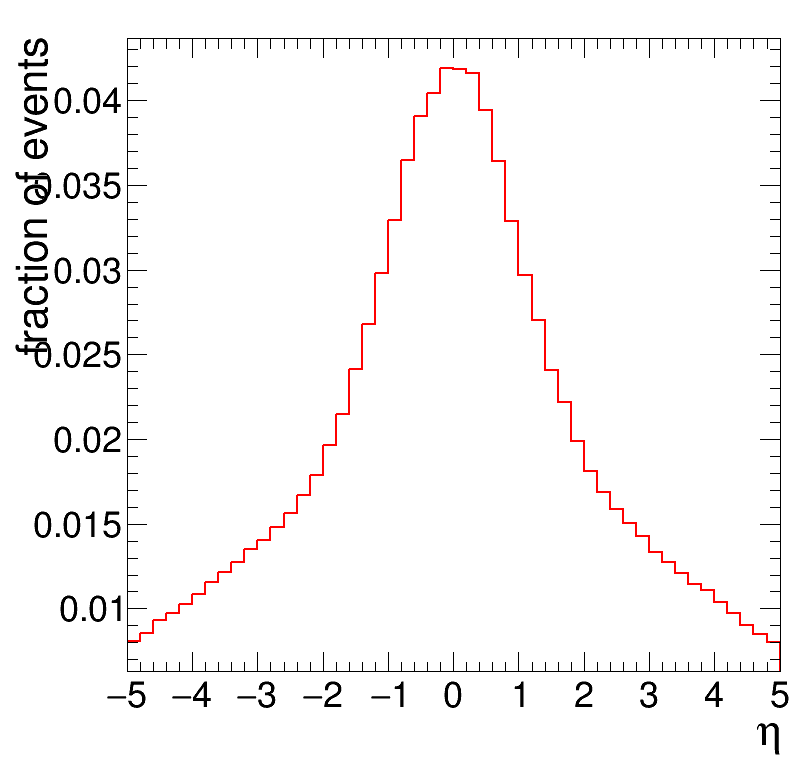

In [3]:
c = rt.TCanvas('c','c', 800, 800)
leg = rt.TLegend(0.18,0.76,0.53,0.94)
leg.SetTextSize(0.022)
leg.SetEntrySeparation(0.01)
gr_1j = {}
gr_2j = {}

i = 0

print('i,j,n,s,m,a')

for k,v in tree.items(): 
    print(k,v)
    
    pho_eta = v['gParticleEta'].array()
    pho_id = v['gParticleId'].array()
    pho_mo_id = v['gParticleMotherId'].array()
    
    pho_eta = pho_eta[pho_id==22, pho_mo_id==111]
    
#     eta = pho_eta[:,0]
    eta = pho_eta.flatten()
    
    ht0 = create_TH1D( eta, axis_title=['#eta', 'fraction of events'], name="", binning=[50,-5,5])
    ht0.SetLineColor(std_color_list[i+1])
    ht0.SetMarkerColor(std_color_list[i+1])
    
    ht0.DrawNormalized('')
 
    i += 1

# leg.Draw()

# c.SetLogy()
c.Update()
c.Draw()
c.SaveAs(out_dir+'pho_eta.png')


i,j,n,s,m,a
analyzer-dyll-4FEVT-cluster1000.root <TTree b'ecalTPTree' at 0x7f4e7770c240>


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190807/pho_phi.png has been created


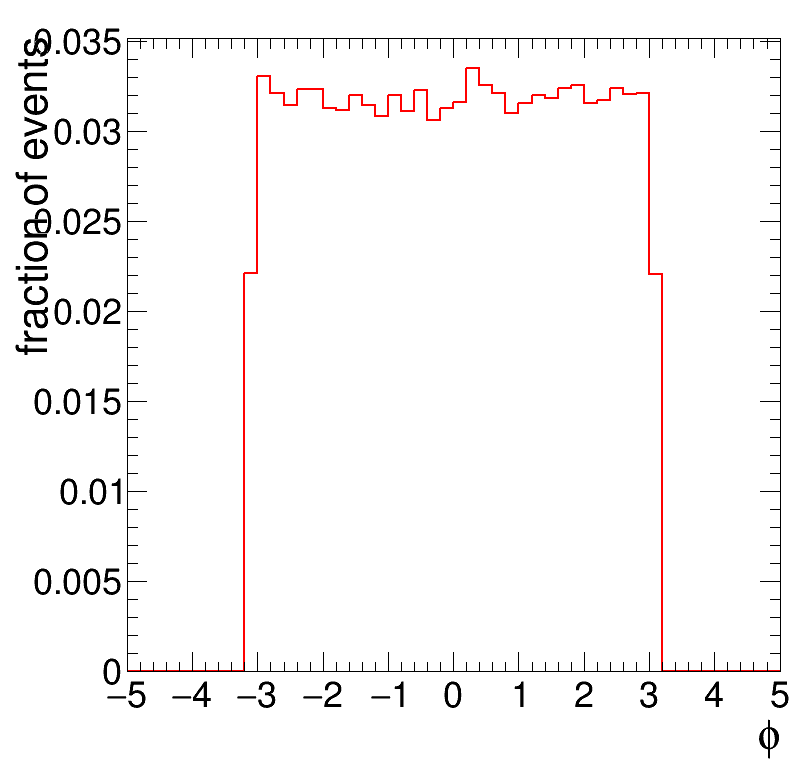

In [197]:
c = rt.TCanvas('c','c', 800, 800)
leg = rt.TLegend(0.18,0.76,0.53,0.94)
leg.SetTextSize(0.022)
leg.SetEntrySeparation(0.01)
gr_1j = {}
gr_2j = {}

i = 0

print('i,j,n,s,m,a')

for k,v in tree.items(): 
    print(k,v)
    
    pho_phi = v['gParticlePhi'].array()
    pho_id = v['gParticleId'].array()
    pho_mo_id = v['gParticleMotherId'].array()
    
    pho_phi = pho_phi[pho_id==22, pho_mo_id==111]
    
#     phi = pho_phi[:,0]
    phi = pho_phi.flatten()
    
    ht0 = create_TH1D( phi, axis_title=['#phi', 'fraction of events'], name="", binning=[50,-5,5])
    ht0.SetLineColor(std_color_list[i+1])
    ht0.SetMarkerColor(std_color_list[i+1])
    
    ht0.DrawNormalized('')
 
    i += 1

# leg.Draw()

# c.SetLogy()
c.Update()
c.Draw()
c.SaveAs(out_dir+'pho_phi.png')


i,j,n,s,m,a
analyzer-dyll-4FEVT-cluster1000.root <TTree b'ecalTPTree' at 0x7f4e7770c240>


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190807/pho_e.png has been created


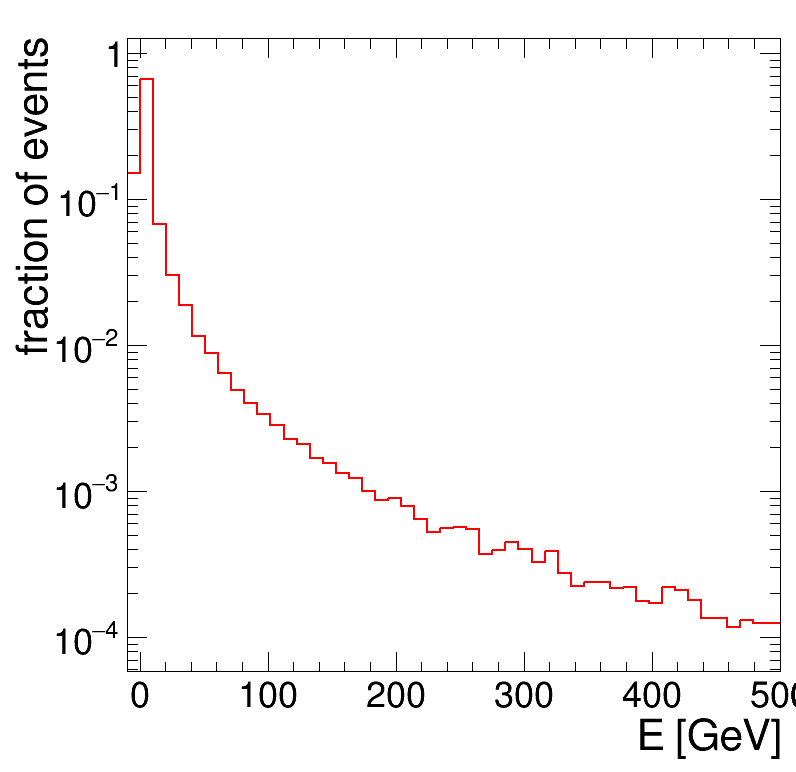

In [198]:
c = rt.TCanvas('c','c', 800, 800)
leg = rt.TLegend(0.18,0.76,0.53,0.94)
leg.SetTextSize(0.022)
leg.SetEntrySeparation(0.01)
gr_1j = {}
gr_2j = {}

i = 0

print('i,j,n,s,m,a')

for k,v in tree.items(): 
    print(k,v)
    
    pho_e = v['gParticleE'].array()
    pho_id = v['gParticleId'].array()
    pho_mo_id = v['gParticleMotherId'].array()
    
    pho_e = pho_e[pho_id==22, pho_mo_id==111]
    
#     e = pho_e[:,0]
    e = pho_e.flatten()
    
    ht0 = create_TH1D( e, axis_title=['E [GeV]', 'fraction of events'], name="", binning=[50,-10,500])
    ht0.SetLineColor(std_color_list[i+1])
    ht0.SetMarkerColor(std_color_list[i+1])
    
    ht0.DrawNormalized('')
 
    i += 1

# leg.Draw()

c.SetLogy()
c.Update()
c.Draw()
c.SaveAs(out_dir+'pho_e.png')


i,j,n,s,m,a
analyzer-dyll-4FEVT-cluster1000.root <TTree b'ecalTPTree' at 0x7f4e7770c240>


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190807/pho_pt.png has been created


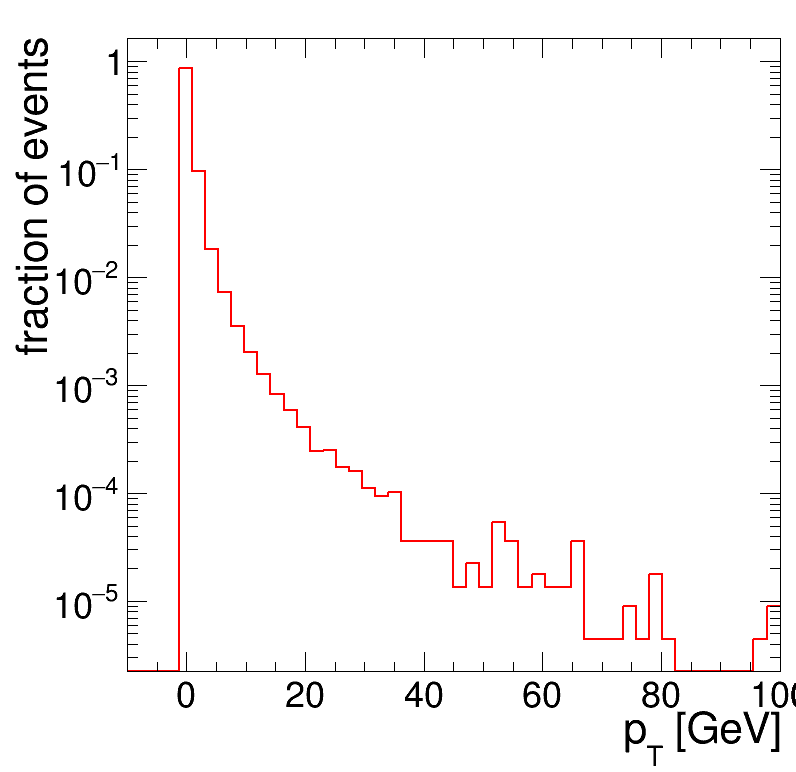

In [199]:
c = rt.TCanvas('c','c', 800, 800)
leg = rt.TLegend(0.18,0.76,0.53,0.94)
leg.SetTextSize(0.022)
leg.SetEntrySeparation(0.01)
gr_1j = {}
gr_2j = {}

i = 0

print('i,j,n,s,m,a')

for k,v in tree.items(): 
    print(k,v)
    
    pho_pt = v['gParticlePt'].array()
    pho_id = v['gParticleId'].array()
    pho_mo_id = v['gParticleMotherId'].array()
    
    pho_pt = pho_pt[pho_id==22, pho_mo_id==111]
    
#     e = pho_e[:,0]
    pt = pho_pt.flatten()
    
    ht0 = create_TH1D( pt, axis_title=['p_{T} [GeV]', 'fraction of events'], name="", binning=[50,-10,100])
    ht0.SetLineColor(std_color_list[i+1])
    ht0.SetMarkerColor(std_color_list[i+1])
    
    ht0.DrawNormalized('')
    
    i += 1

# leg.Draw()

c.SetLogy()
c.Update()
c.Draw()
c.SaveAs(out_dir+'pho_pt.png')


i,j,n,s,m,a
analyzer-dyll-4FEVT-cluster1000.root <TTree b'ecalTPTree' at 0x7f4e7770c240>


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190807/pho_px.png has been created


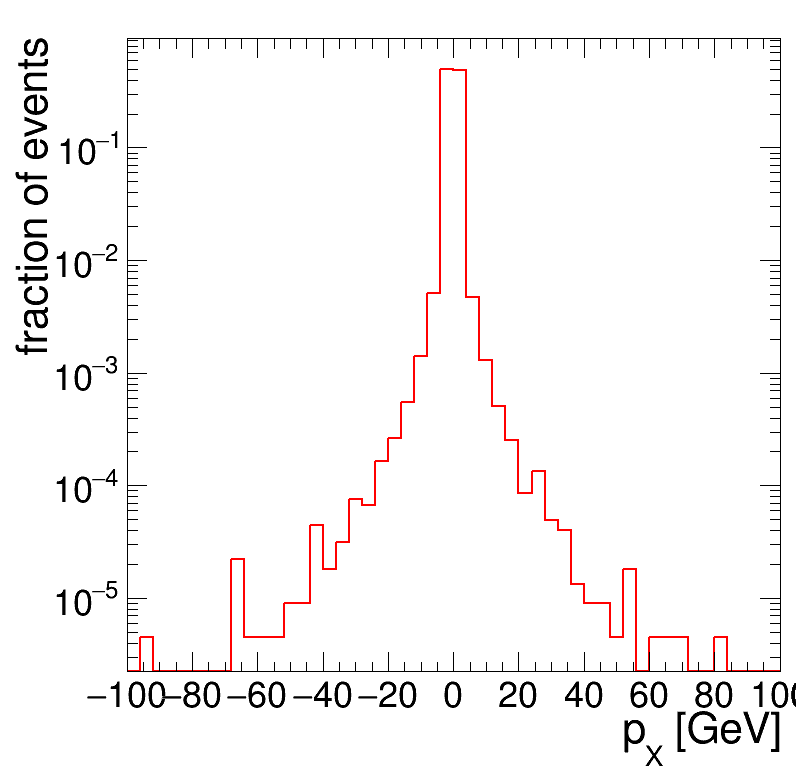

In [200]:
c = rt.TCanvas('c','c', 800, 800)
leg = rt.TLegend(0.18,0.76,0.53,0.94)
leg.SetTextSize(0.022)
leg.SetEntrySeparation(0.01)
gr_1j = {}
gr_2j = {}

i = 0

print('i,j,n,s,m,a')

for k,v in tree.items(): 
    print(k,v)
    
    pho_px = v['gParticlePx'].array()
    pho_id = v['gParticleId'].array()
    pho_mo_id = v['gParticleMotherId'].array()
    
    pho_px = pho_px[pho_id==22, pho_mo_id==111]
    
#     e = pho_e[:,0]
    px = pho_px.flatten()
    
    ht0 = create_TH1D( px, axis_title=['p_{X} [GeV]', 'fraction of events'], name="", binning=[50,-100,100])
    ht0.SetLineColor(std_color_list[i+1])
    ht0.SetMarkerColor(std_color_list[i+1])
    
    ht0.DrawNormalized('')
 
    i += 1

# leg.Draw()

c.SetLogy()
c.Update()
c.Draw()
c.SaveAs(out_dir+'pho_px.png')


i,j,n,s,m,a
analyzer-dyll-4FEVT-cluster1000.root <TTree b'ecalTPTree' at 0x7f4e7770c240>


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190807/pho_py.png has been created


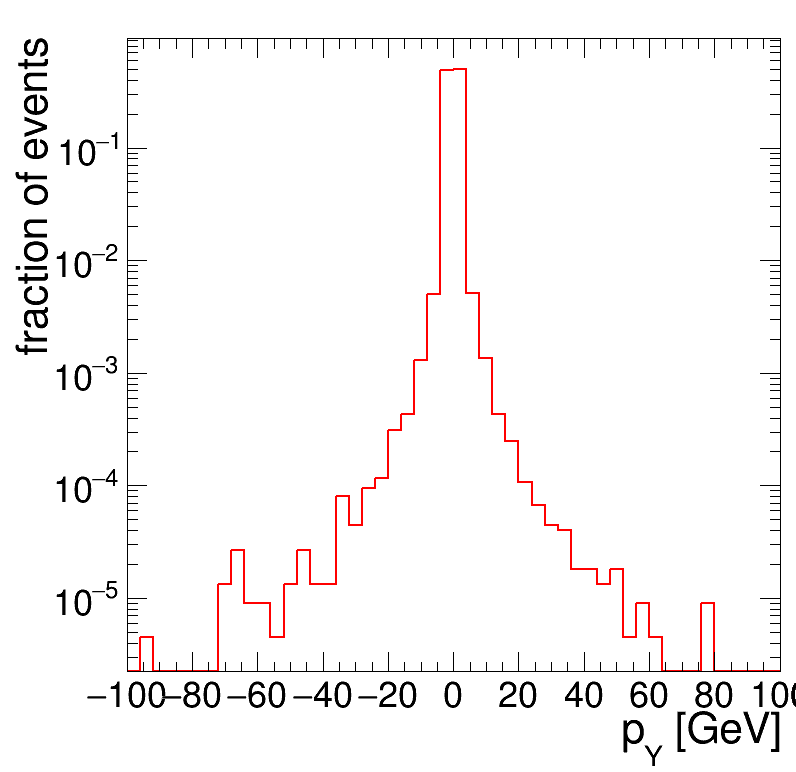

In [201]:
c = rt.TCanvas('c','c', 800, 800)
leg = rt.TLegend(0.18,0.76,0.53,0.94)
leg.SetTextSize(0.022)
leg.SetEntrySeparation(0.01)
gr_1j = {}
gr_2j = {}

i = 0

print('i,j,n,s,m,a')

for k,v in tree.items(): 
    print(k,v)
    
    pho_py = v['gParticlePy'].array()
    pho_id = v['gParticleId'].array()
    pho_mo_id = v['gParticleMotherId'].array()
    
    pho_py = pho_py[pho_id==22, pho_mo_id==111]
    
#     e = pho_e[:,0]
    py = pho_py.flatten()
    
    ht0 = create_TH1D( py, axis_title=['p_{Y} [GeV]', 'fraction of events'], name="", binning=[50,-100,100])
    ht0.SetLineColor(std_color_list[i+1])
    ht0.SetMarkerColor(std_color_list[i+1])
    
    ht0.DrawNormalized('')
 
    i += 1

# leg.Draw()

c.SetLogy()
c.Update()
c.Draw()
c.SaveAs(out_dir+'pho_py.png')


i,j,n,s,m,a
analyzer-dyll-4FEVT-cluster1000.root <TTree b'ecalTPTree' at 0x7f4e7770c240>


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190807/pho_pz.png has been created


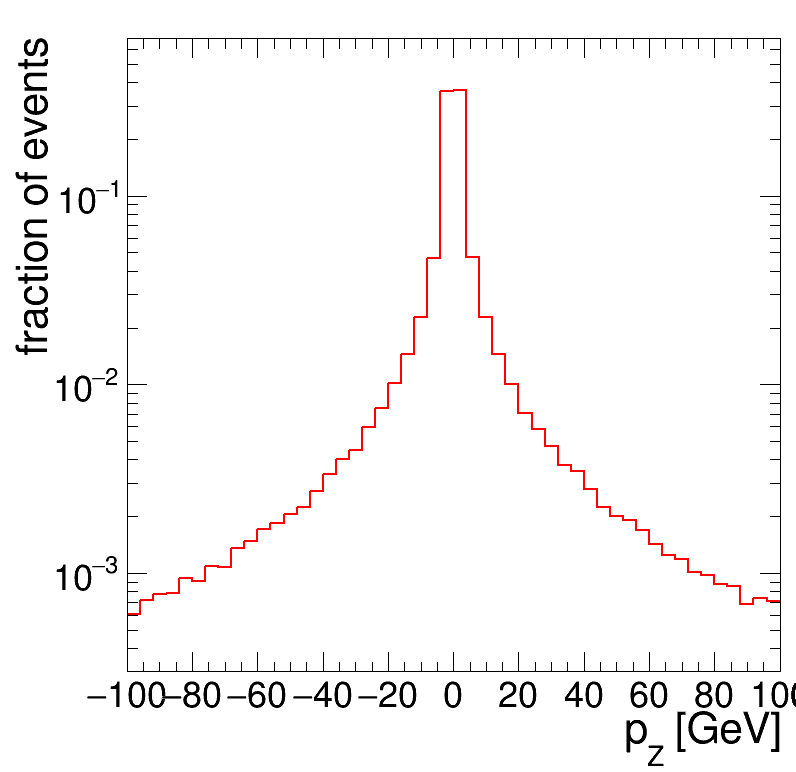

In [202]:
c = rt.TCanvas('c','c', 800, 800)
leg = rt.TLegend(0.18,0.76,0.53,0.94)
leg.SetTextSize(0.022)
leg.SetEntrySeparation(0.01)
gr_1j = {}
gr_2j = {}

i = 0

print('i,j,n,s,m,a')

for k,v in tree.items(): 
    print(k,v)
    
    pho_pz = v['gParticlePz'].array()
    pho_id = v['gParticleId'].array()
    pho_mo_id = v['gParticleMotherId'].array()
    
    pho_pz = pho_pz[pho_id==22, pho_mo_id==111]
    
#     e = pho_e[:,0]
    pz = pho_pz.flatten()
    
    ht0 = create_TH1D( pz, axis_title=['p_{Z} [GeV]', 'fraction of events'], name="", binning=[50,-100,100])
    ht0.SetLineColor(std_color_list[i+1])
    ht0.SetMarkerColor(std_color_list[i+1])
    
    ht0.DrawNormalized('')
 
    i += 1

# leg.Draw()

c.SetLogy()
c.Update()
c.Draw()
c.SaveAs(out_dir+'pho_pz.png')


i,j,n,s,m,a
analyzer-dyll-4FEVT-cluster1000.root <TTree b'ecalTPTree' at 0x7f4e7770c240>


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190807/pho_pz.png has been created


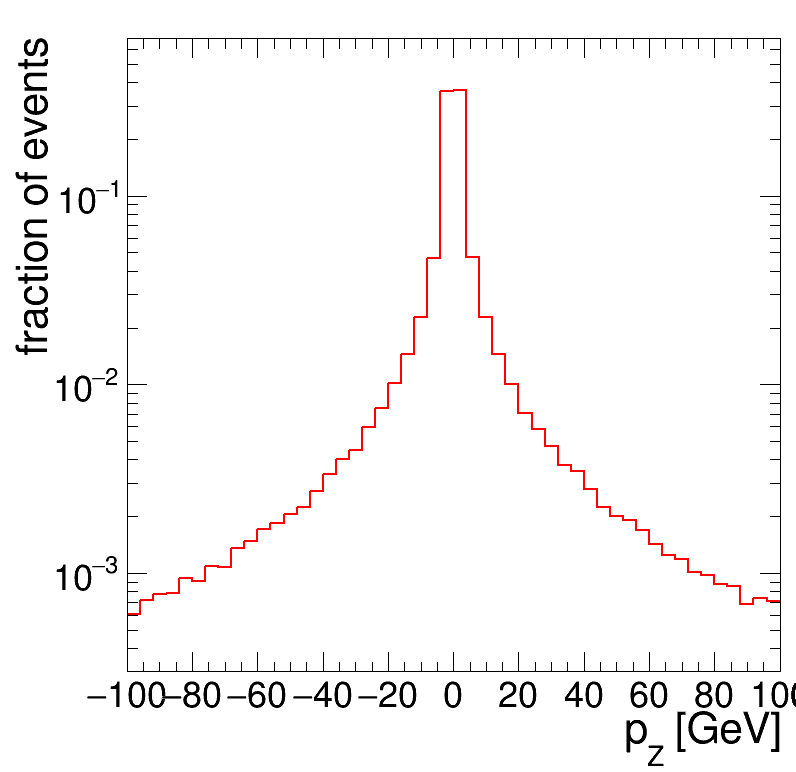

In [203]:
c = rt.TCanvas('c','c', 800, 800)
leg = rt.TLegend(0.18,0.76,0.53,0.94)
leg.SetTextSize(0.022)
leg.SetEntrySeparation(0.01)
gr_1j = {}
gr_2j = {}

i = 0

print('i,j,n,s,m,a')

for k,v in tree.items(): 
    print(k,v)
    
    pho_pz = v['gParticlePz'].array()
    pho_id = v['gParticleId'].array()
    pho_mo_id = v['gParticleMotherId'].array()
    
    pho_pz = pho_pz[pho_id==22, pho_mo_id==111]
    
#     e = pho_e[:,0]
    pz = pho_pz.flatten()
    
    ht0 = create_TH1D( pz, axis_title=['p_{Z} [GeV]', 'fraction of events'], name="", binning=[50,-100,100])
    ht0.SetLineColor(std_color_list[i+1])
    ht0.SetMarkerColor(std_color_list[i+1])
    
    ht0.DrawNormalized('')
 
    i += 1

# leg.Draw()

c.SetLogy()
c.Update()
c.Draw()
c.SaveAs(out_dir+'pho_pz.png')


# Photon Sibling Variables

i,j,n,s,m,a
analyzer-dyll-4FEVT-cluster1000.root <TTree b'ecalTPTree' at 0x7f4e7770c240>


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190807/pho_bro_eta.png has been created


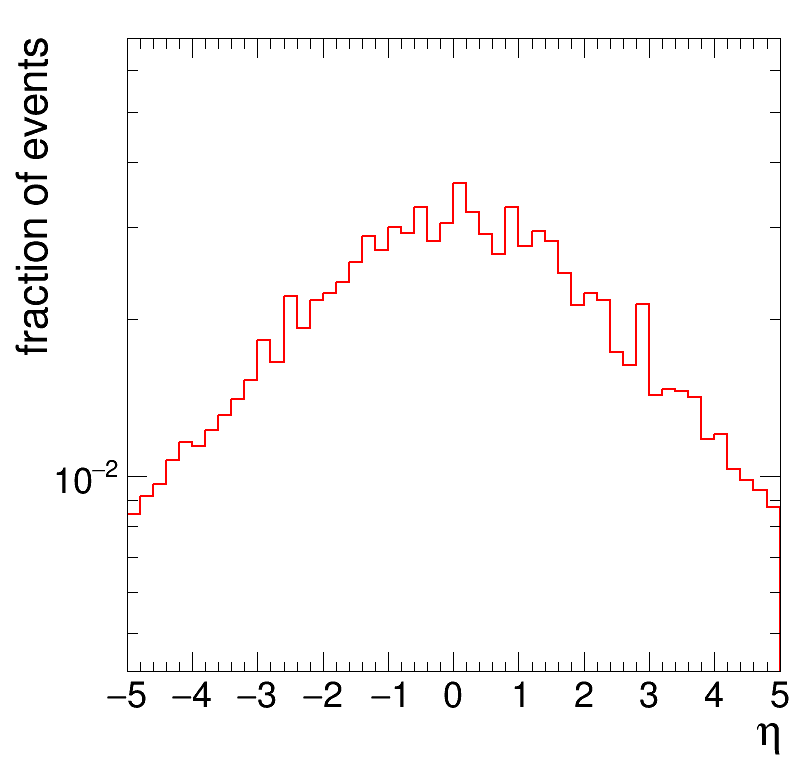

In [204]:
c = rt.TCanvas('c','c', 800, 800)
leg = rt.TLegend(0.18,0.76,0.53,0.94)
leg.SetTextSize(0.022)
leg.SetEntrySeparation(0.01)
gr_1j = {}
gr_2j = {}

i = 0

print('i,j,n,s,m,a')

for k,v in tree.items(): 
    print(k,v)
    
    pho_eta = v['gParticleSiblingEta'].array()
    pho_id = v['gParticleSiblingId'].array()
    pho_mo_id = v['gParticleMotherId'].array()
    
    pho_eta = pho_eta[pho_id==22, pho_mo_id==111]
    
#     eta = pho_eta[:,0]
    eta = pho_eta.flatten()
    
    ht0 = create_TH1D( eta, axis_title=['#eta', 'fraction of events'], name="", binning=[50,-5,5])
    ht0.SetLineColor(std_color_list[i+1])
    ht0.SetMarkerColor(std_color_list[i+1])
    
    ht0.DrawNormalized('')
 
    i += 1

# leg.Draw()

c.SetLogy()
c.Update()
c.Draw()
c.SaveAs(out_dir+'pho_bro_eta.png')


i,j,n,s,m,a
analyzer-dyll-4FEVT-cluster1000.root <TTree b'ecalTPTree' at 0x7f4e7770c240>


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190807/pho_bro_phi.png has been created


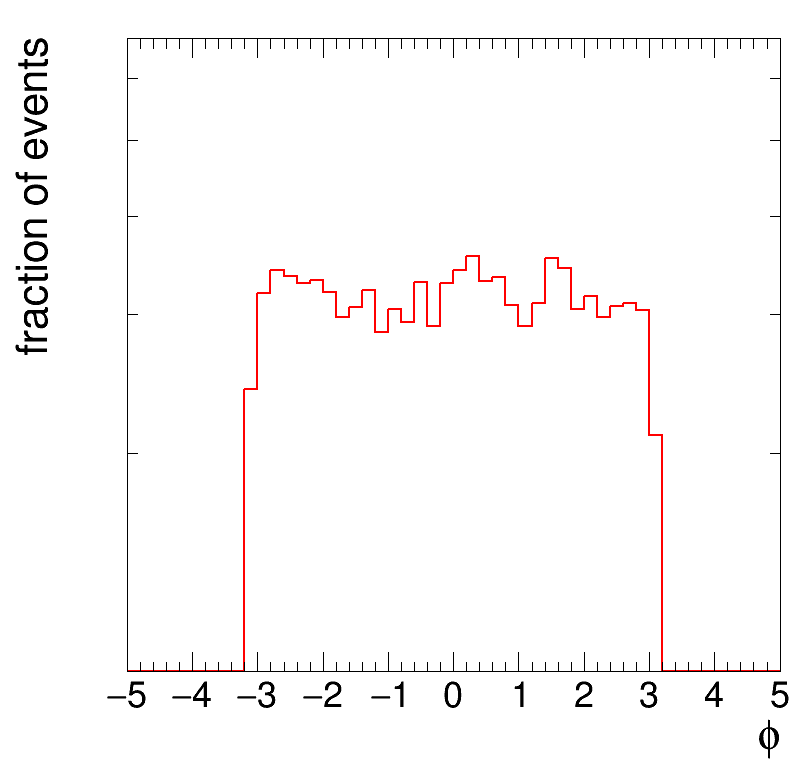

In [205]:
c = rt.TCanvas('c','c', 800, 800)
leg = rt.TLegend(0.18,0.76,0.53,0.94)
leg.SetTextSize(0.022)
leg.SetEntrySeparation(0.01)
gr_1j = {}
gr_2j = {}

i = 0

print('i,j,n,s,m,a')

for k,v in tree.items(): 
    print(k,v)
    
    pho_phi = v['gParticleSiblingPhi'].array()
    pho_id = v['gParticleSiblingId'].array()
    pho_mo_id = v['gParticleMotherId'].array()
    
    pho_phi = pho_phi[pho_id==22, pho_mo_id==111]
    
#     phi = pho_phi[:,0]
    phi = pho_phi.flatten()
    
    ht0 = create_TH1D( phi, axis_title=['#phi', 'fraction of events'], name="", binning=[50,-5,5])
    ht0.SetLineColor(std_color_list[i+1])
    ht0.SetMarkerColor(std_color_list[i+1])
    
    ht0.DrawNormalized('')
 
    i += 1

# leg.Draw()

c.SetLogy()
c.Update()
c.Draw()
c.SaveAs(out_dir+'pho_bro_phi.png')


i,j,n,s,m,a
analyzer-dyll-4FEVT-cluster1000.root <TTree b'ecalTPTree' at 0x7f4e7770c240>


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190807/pho_bro_e.png has been created


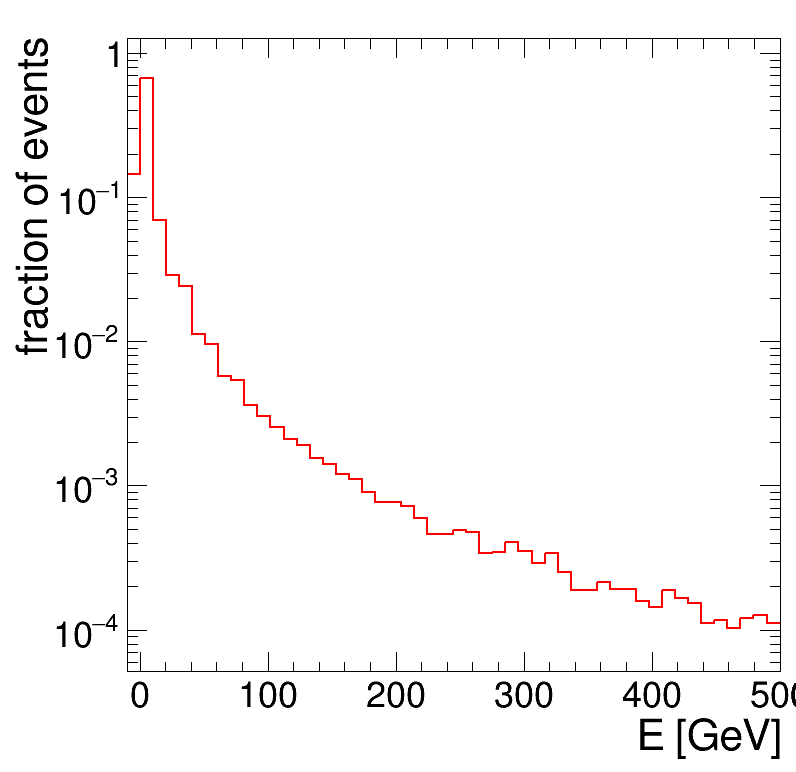

In [206]:
c = rt.TCanvas('c','c', 800, 800)
leg = rt.TLegend(0.18,0.76,0.53,0.94)
leg.SetTextSize(0.022)
leg.SetEntrySeparation(0.01)
gr_1j = {}
gr_2j = {}

i = 0

print('i,j,n,s,m,a')

for k,v in tree.items(): 
    print(k,v)
    
    pho_e = v['gParticleSiblingE'].array()
    pho_id = v['gParticleSiblingId'].array()
    pho_mo_id = v['gParticleMotherId'].array()
    
    pho_e = pho_e[pho_id==22, pho_mo_id==111]
    
#     e = pho_e[:,0]
    e = pho_e.flatten()
    
    ht0 = create_TH1D( e, axis_title=['E [GeV]', 'fraction of events'], name="", binning=[50,-10,500])
    ht0.SetLineColor(std_color_list[i+1])
    ht0.SetMarkerColor(std_color_list[i+1])
    
    ht0.DrawNormalized('')
 
    i += 1

# leg.Draw()

c.SetLogy()
c.Update()
c.Draw()
c.SaveAs(out_dir+'pho_bro_e.png')


i,j,n,s,m,a
analyzer-dyll-4FEVT-cluster1000.root <TTree b'ecalTPTree' at 0x7f4e7770c240>


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190807/pho_bro_pt.png has been created


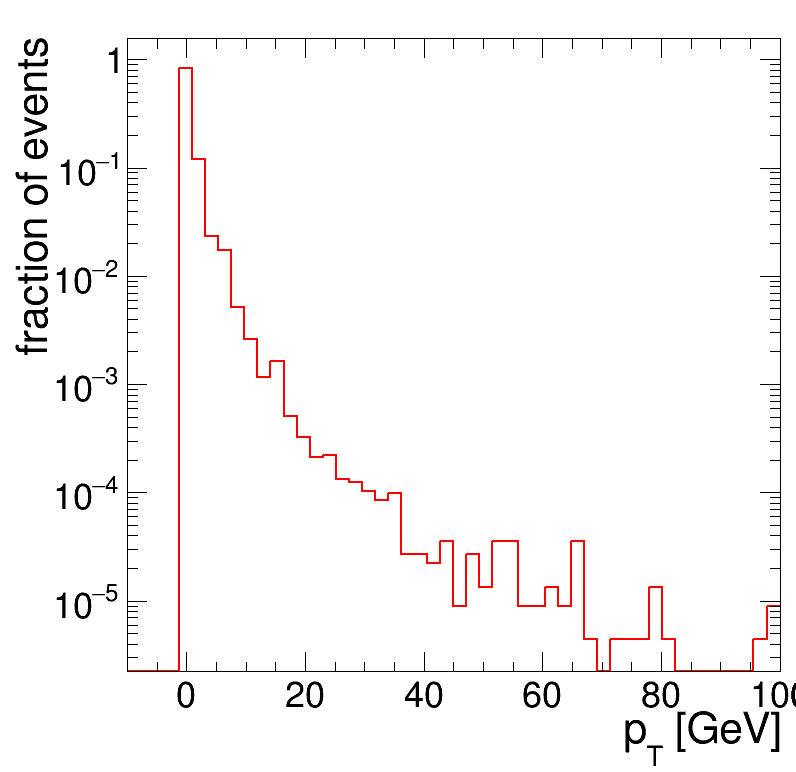

In [207]:
c = rt.TCanvas('c','c', 800, 800)
leg = rt.TLegend(0.18,0.76,0.53,0.94)
leg.SetTextSize(0.022)
leg.SetEntrySeparation(0.01)
gr_1j = {}
gr_2j = {}

i = 0

print('i,j,n,s,m,a')

for k,v in tree.items(): 
    print(k,v)
    
    pho_pt = v['gParticleSiblingPt'].array()
    pho_id = v['gParticleSiblingId'].array()
    pho_mo_id = v['gParticleMotherId'].array()
    
    pho_pt = pho_pt[pho_id==22, pho_mo_id==111]
    
#     e = pho_e[:,0]
    pt = pho_pt.flatten()
    
    ht0 = create_TH1D( pt, axis_title=['p_{T} [GeV]', 'fraction of events'], name="", binning=[50,-10,100])
    ht0.SetLineColor(std_color_list[i+1])
    ht0.SetMarkerColor(std_color_list[i+1])
    
    ht0.DrawNormalized('')
 
    i += 1

# leg.Draw()

c.SetLogy()
c.Update()
c.Draw()
c.SaveAs(out_dir+'pho_bro_pt.png')


i,j,n,s,m,a
analyzer-dyll-4FEVT-cluster1000.root <TTree b'ecalTPTree' at 0x7f4e7770c240>


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190807/pho_bro_px.png has been created


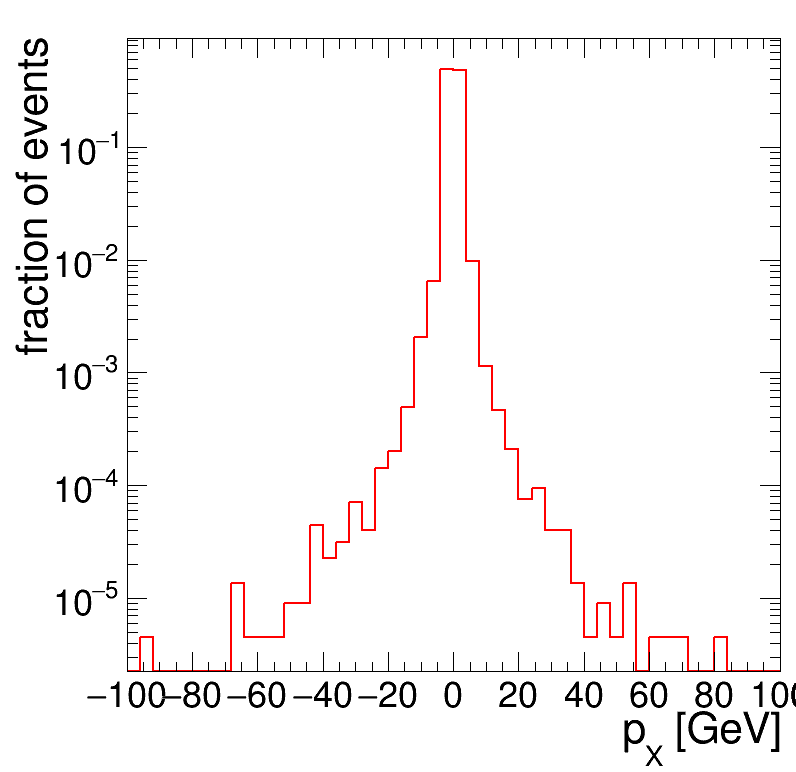

In [208]:
c = rt.TCanvas('c','c', 800, 800)
leg = rt.TLegend(0.18,0.76,0.53,0.94)
leg.SetTextSize(0.022)
leg.SetEntrySeparation(0.01)
gr_1j = {}
gr_2j = {}

i = 0

print('i,j,n,s,m,a')

for k,v in tree.items(): 
    print(k,v)
    
    pho_px = v['gParticleSiblingPx'].array()
    pho_id = v['gParticleSiblingId'].array()
    pho_mo_id = v['gParticleMotherId'].array()
    
    pho_px = pho_px[pho_id==22, pho_mo_id==111]
    
#     e = pho_e[:,0]
    px = pho_px.flatten()
    
    ht0 = create_TH1D( px, axis_title=['p_{X} [GeV]', 'fraction of events'], name="", binning=[50,-100,100])
    ht0.SetLineColor(std_color_list[i+1])
    ht0.SetMarkerColor(std_color_list[i+1])
    
    ht0.DrawNormalized('')
 
    i += 1

# leg.Draw()

c.SetLogy()
c.Update()
c.Draw()
c.SaveAs(out_dir+'pho_bro_px.png')


i,j,n,s,m,a
analyzer-dyll-4FEVT-cluster1000.root <TTree b'ecalTPTree' at 0x7f4e7770c240>


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190807/pho_bro_py.png has been created


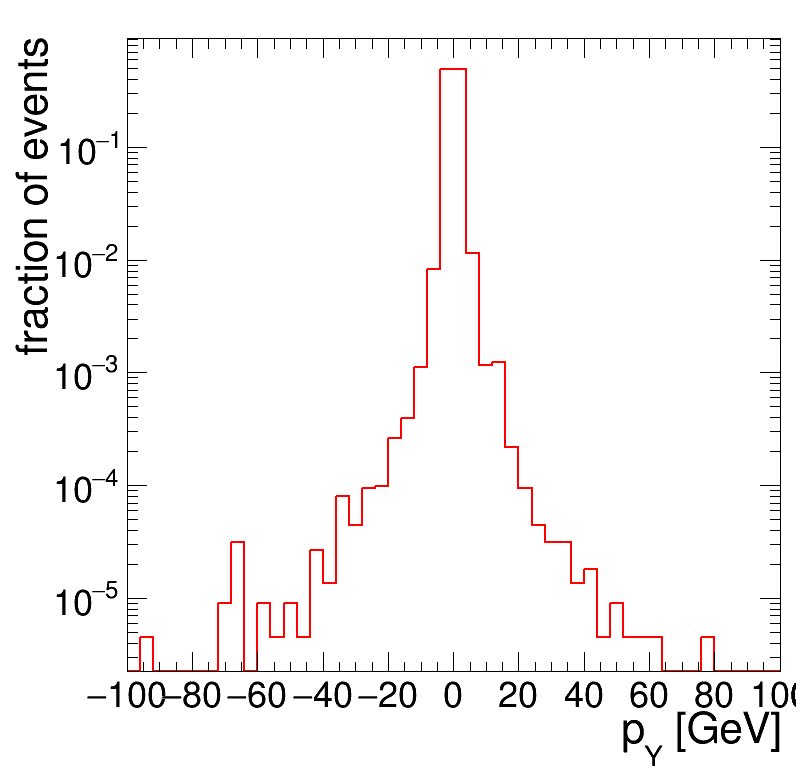

In [209]:
c = rt.TCanvas('c','c', 800, 800)
leg = rt.TLegend(0.18,0.76,0.53,0.94)
leg.SetTextSize(0.022)
leg.SetEntrySeparation(0.01)
gr_1j = {}
gr_2j = {}

i = 0

print('i,j,n,s,m,a')

for k,v in tree.items(): 
    print(k,v)
    
    pho_py = v['gParticleSiblingPy'].array()
    pho_id = v['gParticleSiblingId'].array()
    pho_mo_id = v['gParticleMotherId'].array()
    
    pho_py = pho_py[pho_id==22, pho_mo_id==111]
    
#     e = pho_e[:,0]
    py = pho_py.flatten()
    
    ht0 = create_TH1D( py, axis_title=['p_{Y} [GeV]', 'fraction of events'], name="", binning=[50,-100,100])
    ht0.SetLineColor(std_color_list[i+1])
    ht0.SetMarkerColor(std_color_list[i+1])
    
    ht0.DrawNormalized('')
 
    i += 1

# leg.Draw()

c.SetLogy()
c.Update()
c.Draw()
c.SaveAs(out_dir+'pho_bro_py.png')


i,j,n,s,m,a
analyzer-dyll-4FEVT-cluster1000.root <TTree b'ecalTPTree' at 0x7f4e7770c240>


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190807/pho_bro_pz.png has been created


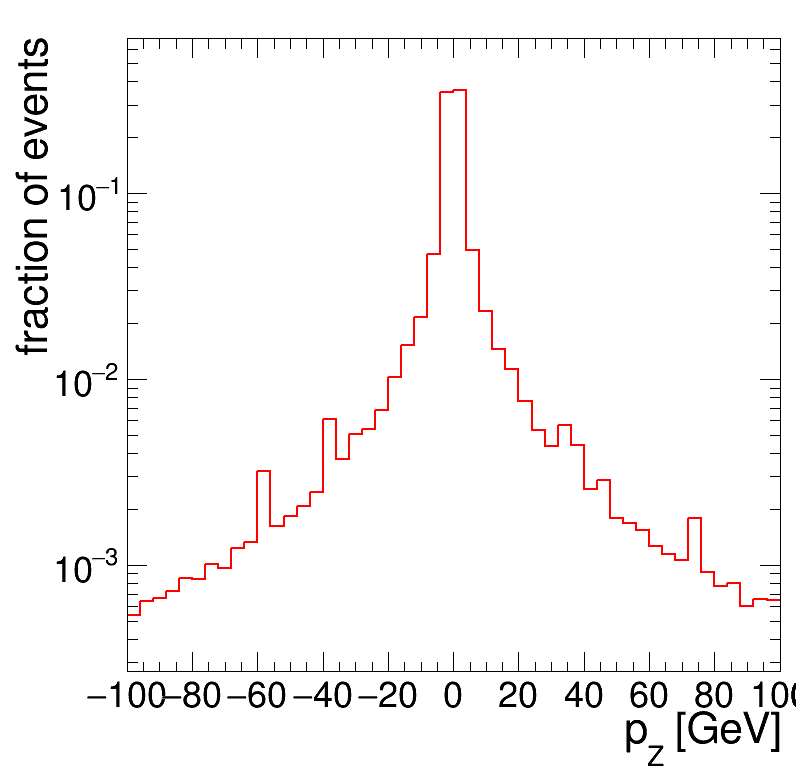

In [210]:
c = rt.TCanvas('c','c', 800, 800)
leg = rt.TLegend(0.18,0.76,0.53,0.94)
leg.SetTextSize(0.022)
leg.SetEntrySeparation(0.01)
gr_1j = {}
gr_2j = {}

i = 0

print('i,j,n,s,m,a')

for k,v in tree.items(): 
    print(k,v)
    
    pho_pz = v['gParticleSiblingPz'].array()
    pho_id = v['gParticleSiblingId'].array()
    pho_mo_id = v['gParticleMotherId'].array()
    
    pho_pz = pho_pz[pho_id==22, pho_mo_id==111]
    
#     e = pho_e[:,0]
    pz = pho_pz.flatten()
    
    ht0 = create_TH1D( pz, axis_title=['p_{Z} [GeV]', 'fraction of events'], name="", binning=[50,-100,100])
    ht0.SetLineColor(std_color_list[i+1])
    ht0.SetMarkerColor(std_color_list[i+1])
    
    ht0.DrawNormalized('')
    
    i += 1

# leg.Draw()

c.SetLogy()
c.Update()
c.Draw()
c.SaveAs(out_dir+'pho_bro_pz.png')


i,j,n,s,m,a
analyzer-dyll-4FEVT-cluster1000.root <TTree b'ecalTPTree' at 0x7f4e7770c240>


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190807/pho_bro_pz.png has been created


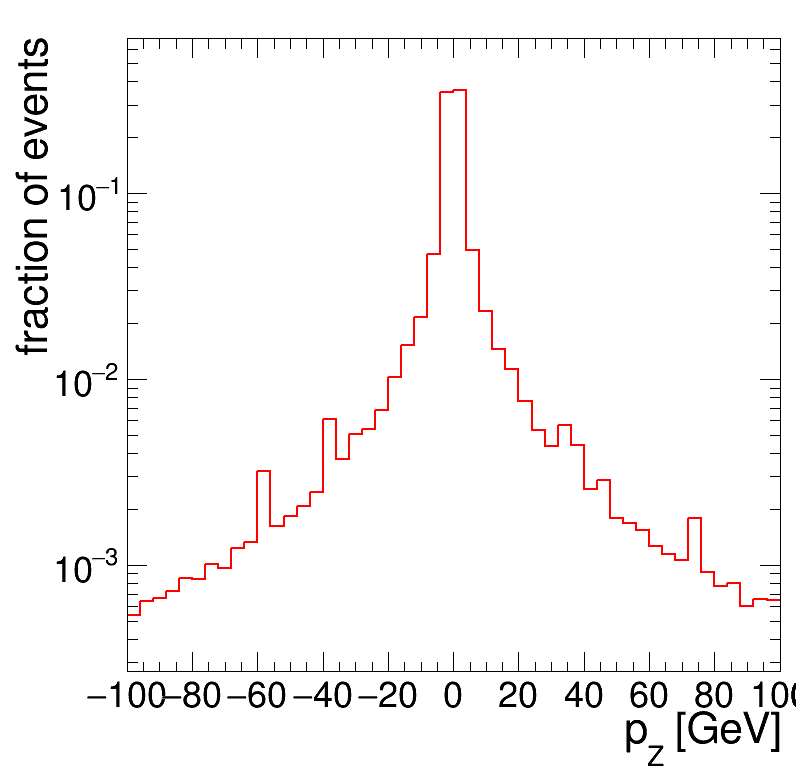

In [211]:
c = rt.TCanvas('c','c', 800, 800)
leg = rt.TLegend(0.18,0.76,0.53,0.94)
leg.SetTextSize(0.022)
leg.SetEntrySeparation(0.01)
gr_1j = {}
gr_2j = {}

i = 0

print('i,j,n,s,m,a')

for k,v in tree.items(): 
    print(k,v)
    
    pho_pz = v['gParticleSiblingPz'].array()
    pho_id = v['gParticleSiblingId'].array()
    pho_mo_id = v['gParticleMotherId'].array()
    
    pho_pz = pho_pz[pho_id==22, pho_mo_id==111]
    
#     e = pho_e[:,0]
    pz = pho_pz.flatten()
    
    ht0 = create_TH1D( pz, axis_title=['p_{Z} [GeV]', 'fraction of events'], name="", binning=[50,-100,100])
    ht0.SetLineColor(std_color_list[i+1])
    ht0.SetMarkerColor(std_color_list[i+1])
    
    ht0.DrawNormalized('')
 
    i += 1

# leg.Draw()

c.SetLogy()
c.Update()
c.Draw()
c.SaveAs(out_dir+'pho_bro_pz.png')


# Photon Sibling Relation

i,j,n,s,m,a
analyzer-dyll-4FEVT-cluster1000.root <TTree b'ecalTPTree' at 0x7f4e7770c240>


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TROOT::Append>: Replacing existing TH1: analyzer-dyll-4FEVT-cluster1000.root (Potential memory leak).
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190807/pho_bro_eta_2d.png has been created


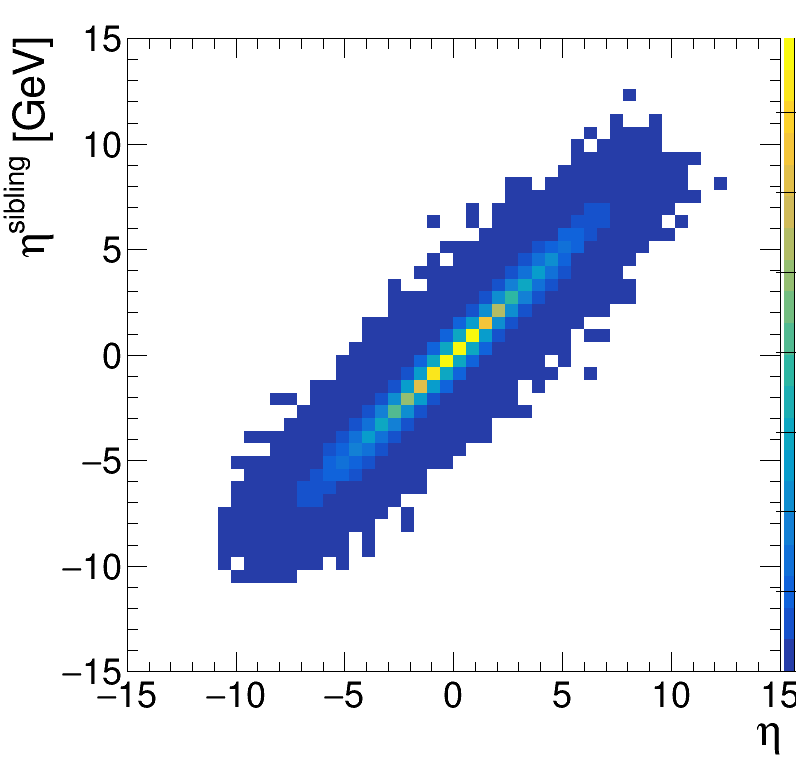

In [212]:
c = rt.TCanvas('c','c', 800, 800)
leg = rt.TLegend(0.18,0.76,0.53,0.94)
leg.SetTextSize(0.022)
leg.SetEntrySeparation(0.01)
gr_1j = {}
gr_2j = {}

i = 0

print('i,j,n,s,m,a')

for k,v in tree.items(): 
    print(k,v)
    
    pho_pz = v['gParticleEta'].array()
    pho_id = v['gParticleId'].array()
    
    pho_bro_pz = v['gParticleSiblingEta'].array()
    pho_bro_id = v['gParticleSiblingId'].array()
  
    pho_mo_id = v['gParticleMotherId'].array()
    
    pho_string = np.logical_and(pho_id==22, pho_mo_id==111)
    pho_bro_string = np.logical_and(pho_bro_id==22, pho_mo_id==111)
    
    pho_pz1 = pho_pz[np.logical_and(pho_string, pho_bro_string)]
    pho_bro_pz1 = pho_bro_pz[np.logical_and(pho_string, pho_bro_string)]
    
#     e = pho_e[:,0]
#     bro_pz = pho_bro_pz1[:,0]
#     pz = pho_pz1[:,0]
    pz = pho_pz1.flatten()
    bro_pz = pho_bro_pz1.flatten()
    sample = [pz,bro_pz]
    
#     ht0 = create_TH2D((sample, name='', title=None, binning=[50,-100,100,50,-100,100] )
# #                       #axis_title = ['p_{Z} [GeV]','p_{Z}^{sibling} [GeV]','']
    ht0.SetLineColor(std_color_list[i+1])
    ht0.SetMarkerColor(std_color_list[i+1])
                      
    hz = rt.TH2D(k,k,50,-15,15,50,-15,15)
    hz.GetXaxis().SetTitle('#eta')
    hz.GetYaxis().SetTitle('#eta^{sibling} [GeV]')
#     hz.GetYaxis().SetRangeUser(0,1e+6)
#     hz[k].SetMarkerColor(std_color_list[i])
        

    for evt,(pz1,pz2) in enumerate(zip(pz,bro_pz)):
        hz.Fill(pz1,pz2)
    
    hz.Draw('colz')
 
    i += 1

# leg.Draw()

# c.SetLogy()
c.Update()
c.Draw()
c.SaveAs(out_dir+'pho_bro_eta_2d.png')


i,j,n,s,m,a
analyzer-dyll-4FEVT-cluster1000.root <TTree b'ecalTPTree' at 0x7f4e7770c240>


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TROOT::Append>: Replacing existing TH1: analyzer-dyll-4FEVT-cluster1000.root (Potential memory leak).
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190807/pho_bro_phi_2d.png has been created


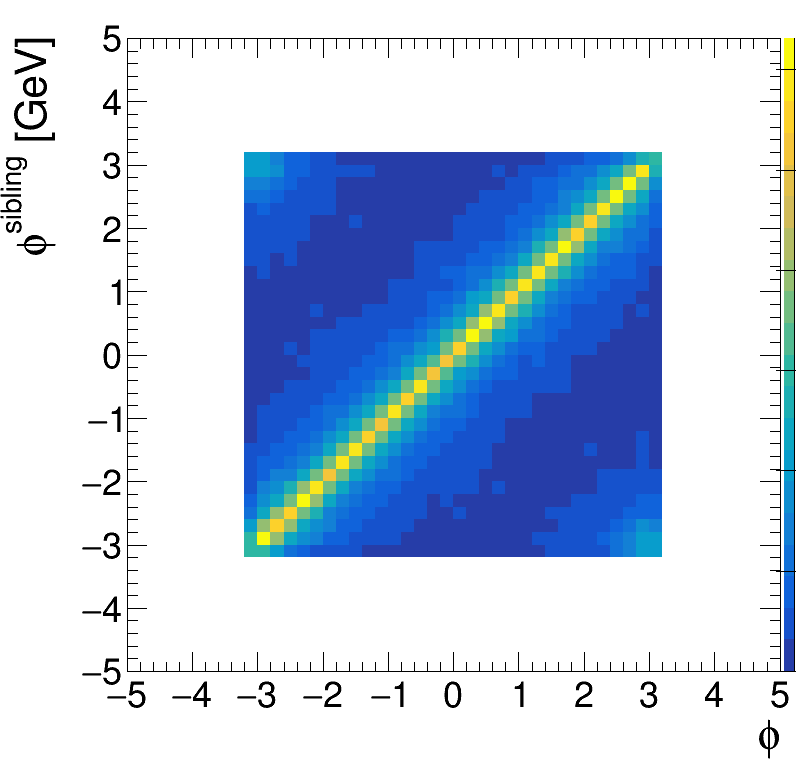

In [213]:
c = rt.TCanvas('c','c', 800, 800)
leg = rt.TLegend(0.18,0.76,0.53,0.94)
leg.SetTextSize(0.022)
leg.SetEntrySeparation(0.01)
gr_1j = {}
gr_2j = {}

i = 0

print('i,j,n,s,m,a')

for k,v in tree.items(): 
    print(k,v)
    
    pho_pz = v['gParticlePhi'].array()
    pho_id = v['gParticleId'].array()
    
    pho_bro_pz = v['gParticleSiblingPhi'].array()
    pho_bro_id = v['gParticleSiblingId'].array()
  
    pho_mo_id = v['gParticleMotherId'].array()
    
    pho_string = np.logical_and(pho_id==22, pho_mo_id==111)
    pho_bro_string = np.logical_and(pho_bro_id==22, pho_mo_id==111)
    
    pho_pz1 = pho_pz[np.logical_and(pho_string, pho_bro_string)]
    pho_bro_pz1 = pho_bro_pz[np.logical_and(pho_string, pho_bro_string)]
    
#     e = pho_e[:,0]
#     bro_pz = pho_bro_pz1[:,0]
#     pz = pho_pz1[:,0]
    pz = pho_pz1.flatten()
    bro_pz = pho_bro_pz1.flatten()
    sample = [pz,bro_pz]
    
#     ht0 = create_TH2D((sample, name='', title=None, binning=[50,-100,100,50,-100,100] )
# #                       #axis_title = ['p_{Z} [GeV]','p_{Z}^{sibling} [GeV]','']
    ht0.SetLineColor(std_color_list[i+1])
    ht0.SetMarkerColor(std_color_list[i+1])
                      
    hz = rt.TH2D(k,k,50,-5,5,50,-5,5)
    hz.GetXaxis().SetTitle('#phi')
    hz.GetYaxis().SetTitle('#phi^{sibling} [GeV]')
#     hz.GetYaxis().SetRangeUser(0,1e+6)
#     hz[k].SetMarkerColor(std_color_list[i])
        

    for evt,(pz1,pz2) in enumerate(zip(pz,bro_pz)):
        hz.Fill(pz1,pz2)
    
    hz.Draw('colz')
 
    i += 1

# leg.Draw()

# c.SetLogy()
c.Update()
c.Draw()
c.SaveAs(out_dir+'pho_bro_phi_2d.png')


i,j,n,s,m,a
analyzer-dyll-4FEVT-cluster1000.root <TTree b'ecalTPTree' at 0x7f4e7770c240>


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190807/pho_br.png has been created


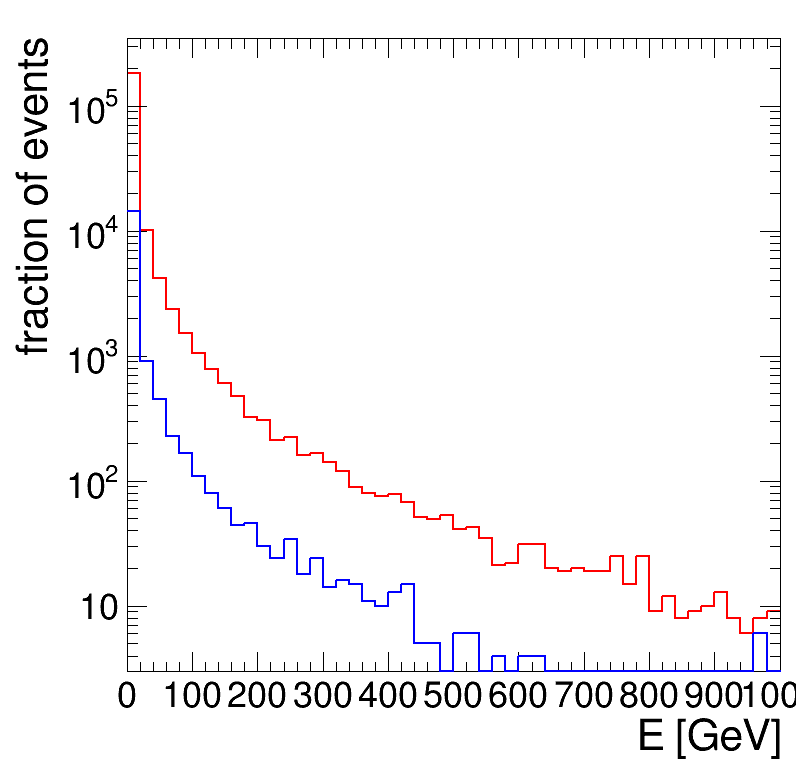

In [401]:
c = rt.TCanvas('c','c', 800, 800)
leg = rt.TLegend(0.18,0.76,0.53,0.94)
leg.SetTextSize(0.022)
leg.SetEntrySeparation(0.01)
gr_1j = {}
gr_2j = {}

i = 0

print('i,j,n,s,m,a')

for k,v in tree.items(): 
    print(k,v)
    
    pho_pz = v['gParticleE'].array()
    pho_id = v['gParticleId'].array()
    pho_mo_id = v['gParticleMotherId'].array()
    
    pho_string = np.logical_and(pho_id==22, pho_mo_id==111)
    pho1_string = np.logical_and(pho_id==22, pho_mo_id!=111)
    
    pho_pz1 = pho_pz[pho_string]
    pho_b_pz = pho_pz[pho1_string]
    
#     e = pho_e[:,0]
    pz = pho_pz1.flatten()
    bz = pho_b_pz.flatten()
    
    ht0 = create_TH1D( pz, axis_title=['E [GeV]', 'fraction of events'], name="", binning=[50,-0,1000])
    ht0.SetLineColor(std_color_list[i+1])
    ht0.SetMarkerColor(std_color_list[i+1])
    
    ht0.Draw('')
#     ht0.DrawNormalized('')
    
    ht1 = create_TH1D( bz, axis_title=['E', 'fraction of events'], name="", binning=[50,-0,1000])
    ht1.SetLineColor(std_color_list[i+2])
    ht1.SetMarkerColor(std_color_list[i+2])
    ht1.Draw('same')
    
#     ht1.DrawNormalized('same')
 
    i += 1

# leg.Draw()

c.SetLogy()
c.Update()
c.Draw()
c.SaveAs(out_dir+'pho_br.png')


i,j,n,s,m,a
analyzer-dyll-4FEVT-cluster1000.root <TTree b'ecalTPTree' at 0x7f4e7770c240>


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190807/pho_ee.png has been created


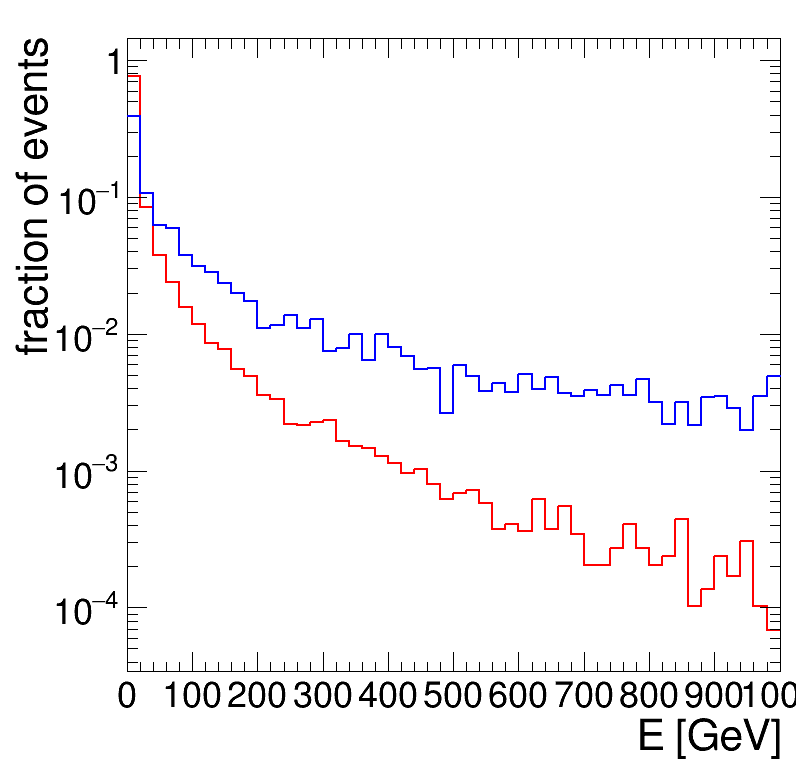

In [446]:
c = rt.TCanvas('c','c', 800, 800)
leg = rt.TLegend(0.18,0.76,0.53,0.94)
leg.SetTextSize(0.022)
leg.SetEntrySeparation(0.01)
gr_1j = {}
gr_2j = {}

i = 0

print('i,j,n,s,m,a')

for k,v in tree.items(): 
    print(k,v)
    
    pho_pz = v['gParticleMotherE'].array()
    gm_pz = v['gParticleGrandMotherE'].array()
    pho_id = v['gParticleId'].array()
    pho_mo_id = v['gParticleMotherId'].array()
    pho_gm_id = v['gParticleGrandMotherId'].array()
    
    pho_string = np.logical_and(pho_id==22, pho_mo_id==111)
    
    pho1_string = np.logical_and(abs(pho_gm_id)>=1, abs(pho_gm_id)<=6)
    pho2_string = np.logical_and(abs(pho_gm_id)==21, pho_mo_id==111)
    pho3_string = np.logical_or(pho2_string,pho1_string)
    
    pho4_string = np.logical_and(pho_string,pho3_string)
    
    
    pho_pz1 = pho_pz[pho4_string]
    pho_b_pz = gm_pz[pho4_string]
    
#     e = pho_e[:,0]
    pz = pho_pz1.flatten()
    bz = pho_b_pz.flatten()
    
    ht0 = create_TH1D( pz, axis_title=['E [GeV]', 'fraction of events'], name="", binning=[50,-0,1000])
    ht0.SetLineColor(std_color_list[i+1])
    ht0.SetMarkerColor(std_color_list[i+1])
    
#     ht0.Draw('')
    ht0.DrawNormalized('')
    
    ht1 = create_TH1D( bz, axis_title=['E [GeV]', 'fraction of events'], name="", binning=[50,-0,1000])
    ht1.SetLineColor(std_color_list[i+2])
    ht1.SetMarkerColor(std_color_list[i+2])
#     ht1.Draw('same')
    
    ht1.DrawNormalized('same')
 
    i += 1

# leg.Draw()

c.SetLogy()
c.Update()
c.Draw()
c.SaveAs(out_dir+'pho_ee.png')


i,j,n,s,m,a
analyzer-dyll-4FEVT-pi0cluster1000.root <TTree b'ecalTPTree' at 0x7fbf55849ef0>


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190807/pho_ee2.png has been created


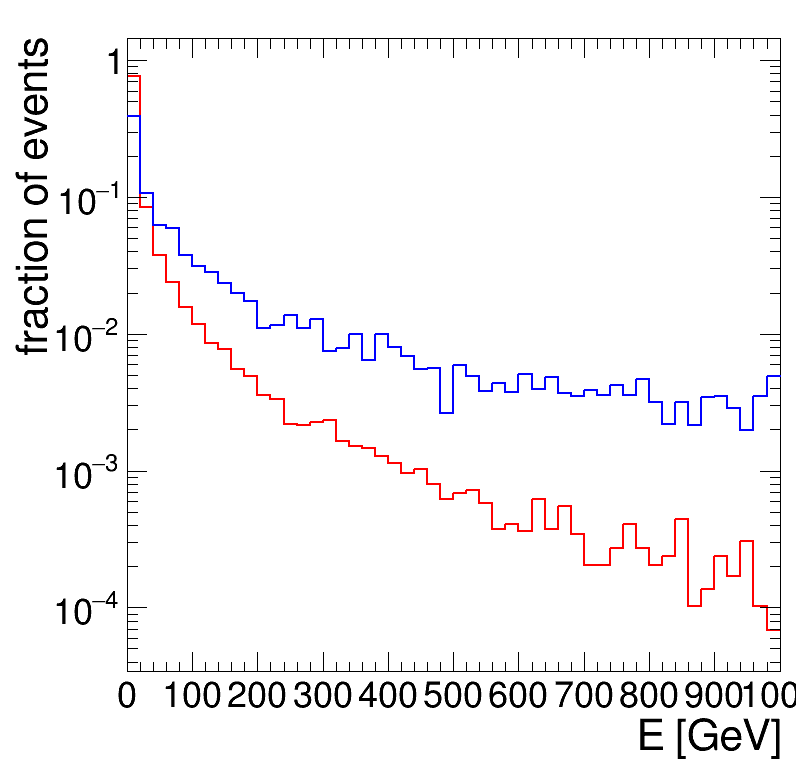

In [8]:
c = rt.TCanvas('c','c', 800, 800)
leg = rt.TLegend(0.18,0.76,0.53,0.94)
leg.SetTextSize(0.022)
leg.SetEntrySeparation(0.01)
gr_1j = {}
gr_2j = {}

i = 0

print('i,j,n,s,m,a')

for k,v in tree.items(): 
    print(k,v)
    
    pho_pz = v['gParticleMotherE'].array()
    gm_pz = v['gParticleGrandMotherE'].array()
    pho_id = v['gParticleId'].array()
    pho_mo_id = v['gParticleMotherId'].array()
    pho_gm_id = v['gParticleGrandMotherId'].array()
    
    pho_string = np.logical_and(pho_id==22, pho_mo_id==111)
    pho1_string = np.logical_and(abs(pho_gm_id)>=1, abs(pho_gm_id)<=6)
    pho2_string = np.logical_and(abs(pho_gm_id)==21, pho_mo_id==111)
    pho3_string = np.logical_or(pho2_string,pho1_string)
    pho4_string = np.logical_and(pho_string,pho3_string)
    
    
    pho_pz1 = pho_pz[pho4_string]
    pho_b_pz = gm_pz[pho4_string]
    
#     e = pho_e[:,0]
    pz = pho_pz1.flatten()
    bz = pho_b_pz.flatten()
    
    ht0 = create_TH1D( pz, axis_title=['E [GeV]', 'fraction of events'], name="", binning=[50,-0,1000])
    ht0.SetLineColor(std_color_list[i+1])
    ht0.SetMarkerColor(std_color_list[i+1])
    
#     ht0.Draw('')
    ht0.DrawNormalized('')
    
    ht1 = create_TH1D( bz, axis_title=['E [GeV]', 'fraction of events'], name="", binning=[50,-0,1000])
    ht1.SetLineColor(std_color_list[i+2])
    ht1.SetMarkerColor(std_color_list[i+2])
#     ht1.Draw('same')
    
    ht1.DrawNormalized('same')
 
    i += 1

# leg.Draw()

c.SetLogy()
c.Update()
c.Draw()
c.SaveAs(out_dir+'pho_ee2.png')


In [512]:
import numpy as np

i,j,n,s,m,a
analyzer-dyll-4FEVT-pi0cluster1000.root <TTree b'ecalTPTree' at 0x7fbf55849ef0>
[1.3814552e+00 2.2842855e+00 6.7488235e-01 6.1161309e-01 6.1293988e+00
 2.8715530e-01 2.1761578e+02 1.4702294e+00 1.4743598e+00 1.4350598e-01
 1.4913172e+01 2.3004441e+00 1.3805717e+00 5.5907812e+00 9.3098373e+00
 3.6047634e+01 4.4664673e+01 2.8064177e+00 2.0165205e+00]
[  14.713926    14.713926    14.713926    14.713926    26.567259
   26.567259   362.17184    362.17184    108.69628      2.7461002
  782.2427     782.2427     782.2427      82.567024    82.567024
 1803.2548    1803.2548    1803.2548    2627.675    ]
[4.952236175537109, 6.416554, 219.08601, 1.4743598, 0.14350598, 18.594187, 14.900619, 83.51873, 2.0165205] [14.713926, 26.567259, 362.17184, 108.69628, 2.7461002, 782.2427, 82.567024, 1803.2548, 2627.675]
1 type <class 'list'>
list [4.952236175537109, 6.416554, 219.08601, 1.4743598, 0.14350598, 18.594187, 14.900619, 83.51873, 2.0165205] [14.713926, 26.567259, 362.17184, 108.69628, 2.7

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190807/pho_ee1.png has been created


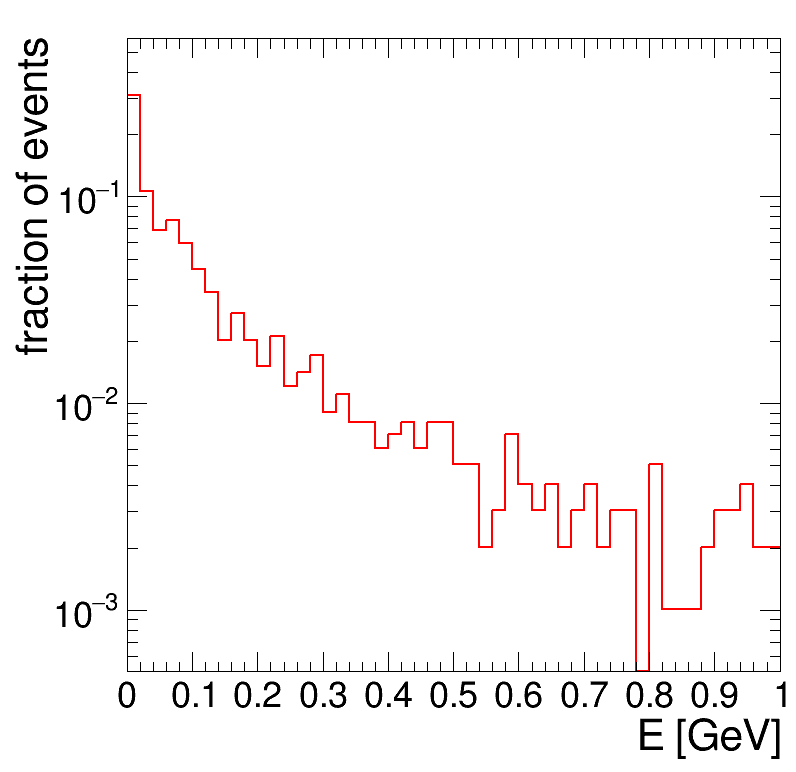

In [5]:
c = rt.TCanvas('c','c', 800, 800)
leg = rt.TLegend(0.18,0.76,0.53,0.94)
leg.SetTextSize(0.022)
leg.SetEntrySeparation(0.01)
gr_1j = {}
gr_2j = {}

# i = 0

print('i,j,n,s,m,a')

for k,v in tree.items(): 
    print(k,v)
    
    pho_pz = v['gParticleE'].array()
    gm_pz = v['gParticleMotherE'].array()
    pho_id = v['gParticleId'].array()
    pho_mo_dr = v['gParticleMotherDR'].array()
    pho_mo_id = v['gParticleMotherId'].array()
    pho_gm_id = v['gParticleGrandMotherId'].array()
    
    
    pho_string = np.logical_and(pho_id==111, pho_pz>0)
    
    pho1_string = np.logical_and(abs(pho_mo_id)==1, abs(pho_mo_id)==1)
#     pho1_string = np.logical_and(abs(pho_mo_id)>=1, abs(pho_mo_id)<=6)
    pho2_string = np.logical_and(abs(pho_mo_id)==21, pho_id==111)
    pho3_string = np.logical_or(pho2_string,pho_string)
    pho5_string = np.logical_and(pho_pz<gm_pz,gm_pz>0)
    
    pho4_string = np.logical_and(pho_string,pho3_string)
    pho6_string = np.logical_and(pho4_string,pho5_string)
    
#     pho5_string = np.logical_and(abs(pho_id)>=1, abs(pho_id)<=6)
#     pho6_string = np.logical_and(abs(pho_id)==21, pho_id)
#     pho7_string = np.logical_or(pho5_string,pho6_string)
    
    
    pho_pz1 = pho_pz[pho6_string] # pi0 energy, with pi0 from jet
    pho_pz2 = gm_pz[pho6_string] # jet energy
        
    print(pho_pz1[1])
    print(pho_pz2[1])  
   
    O1 = []
    O2 = []
#     O1 = np.empty(shape=(1000,800))
#     O2 = np.empty(shape=(1000,800))
    for i, (x,y) in enumerate(zip(pho_pz1, pho_pz2)):
#         if(i==1):
#             print('i',x,y)
        holder_m = y[0]
        holder_d = 0.
        o1 = []
        o2 = []
        for j, (x1,y1) in enumerate(zip(x,y)):
#             if(i==1 and j==1):
#                 print('j',x1,y1)
            if(y1==holder_m):
                holder_d += x1
            else:
                o1.append(holder_d)
                o2.append(holder_m)
                holder_m = y1
                holder_d = x1
                
            if(x1==x[-1]):
                o1.append(holder_d)
                o2.append(holder_m)
#             if(i==1):
#                 print(j,x1,y1)
#                 print(j,holder_d,holder_m)

#         o1 = np.array(o1)
#         o2 = np.array(o2)
        if(i==1):
            print(o1,o2)
            print(i,'type',type(o1))
#             print(i,'shape',o1.shape)
        O1.append(o1)
        O2.append(o2)
        
    print('list',O1[1],O2[1])
    
    O1 = np.asarray(O1)
    O2 = np.asarray(O2)
#     print('array',O1[1],O2[1])
#     print('array type',type(O1))
#     print('array shape',O1.shape,O2.shape)
#     print('array shape',O1.shape[0],O2.shape[0])
#     print('array dim',O1.ndim,O2.ndim)


    
    KO1 = O1.flatten()
    KO2 = O2.flatten()
    
    r=[]
    for i, (x,y) in enumerate(zip(KO1, KO2)):
        for j, (x1,y1) in enumerate(zip(x,y)):
            if(y1==max(y)):
                temp = x1/y1
                r.append(temp)
    r = np.array(r)
    
#     KO1 = O1.ravel()
#     KO2 = O2.ravel()
#     print('flat',KO1[1],KO2[1])
#     print('flat type',type(KO1))
                

#     s1 = [np.sum(np.unique(x)) for i, x in enumerate(pho_pz1)]
#     s2 = [np.sum(np.unique(x)) for i, x in enumerate(pho_pz2)]
#     l2 = [len(np.unique(x)) for i, x in enumerate(pho_pz2)]
    
#     s1 = [np.max(x) for i, x in enumerate(pho_pz1)]
#     s2 = [np.max(x) for i, x in enumerate(pho_pz2)]
    
#     s1 = [np.sum(x) for i, x in enumerate(pho_pz1)]
#     s2 = [np.sum(x) for i, x in enumerate(pho_pz2)]
    
#     l1 = [len(x) for i, x in enumerate(pho_pz1)]
#     l2 = [len(x) for i, x in enumerate(pho_pz2)]
    
#     print(s1[1])
#     print(s2[1])
    
#     print(l1[1])
#     print(l2[1])
    
#     a1 = [x/y for i, (x,y) in enumerate(zip(s1,l2))]
#     a2 = [x/y for i, (x,y) in enumerate(zip(s2,l2))]
#     r = [x/y for i, (x,y) in enumerate(zip(a1,a2))]
#     r = [x/y for i, (x,y) in enumerate(zip(s1,s2))]
#     r = [x/y for i, (x,y) in enumerate(zip(O1,O2))]
#     r = [x/y for i, (x,y) in enumerate(zip(KO1,KO2))]
    
    print(r[10])
    
#     r=np.array(r)
#     r=r.flatten()
#     print(r[1])
 
    
#     pz = pho_pz.flatten()
    
#     ht0 = create_TH1D( pz, axis_title=['E [GeV]', 'fraction of events'], name="", binning=[50,-0,1000])
    ht0 = create_TH1D( r, axis_title=['E [GeV]', 'fraction of events'], name="", binning=[50,-0,1])
    ht0.SetLineColor(std_color_list[1])
    ht0.SetMarkerColor(std_color_list[1])
    
#     ht0.Draw('')
    ht0.DrawNormalized('')
    
  
 
#     i += 1

# leg.Draw()

c.SetLogy()
c.Update()
c.Draw()
c.SaveAs(out_dir+'pho_ee1.png')


i,j,n,s,m,a
analyzer-dyll-4FEVT-pi0cluster1000.root <TTree b'ecalTPTree' at 0x7fbf55849ef0>
[1.3814552e+00 2.2842855e+00 6.7488235e-01 6.1161309e-01 6.1293988e+00
 2.8715530e-01 2.1761578e+02 1.4702294e+00 1.4743598e+00 1.4350598e-01
 4.9322038e+00 3.5200386e+01 1.4913172e+01 2.3004441e+00 1.3805717e+00
 5.5907812e+00 9.3098373e+00 3.6047634e+01 4.4664673e+01 2.8064177e+00
 2.0165205e+00]
[1.0713264e+00 1.5252723e+01 3.5258995e+01 1.0275338e+00 9.8195601e-01
 4.7074722e+01 2.2446457e+01 4.0533333e+01 3.6217184e+02 1.3514842e+01
 7.6220276e+01 5.0862106e+01 8.2674551e+00 7.0266241e+02 1.5894318e+01
 8.0932533e+01 2.0620697e+02 1.8032548e+03 8.5452251e+00 2.6276750e+03]
[71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71 71]
391.2353
6119.8545


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190807/pho_ee1.png has been created


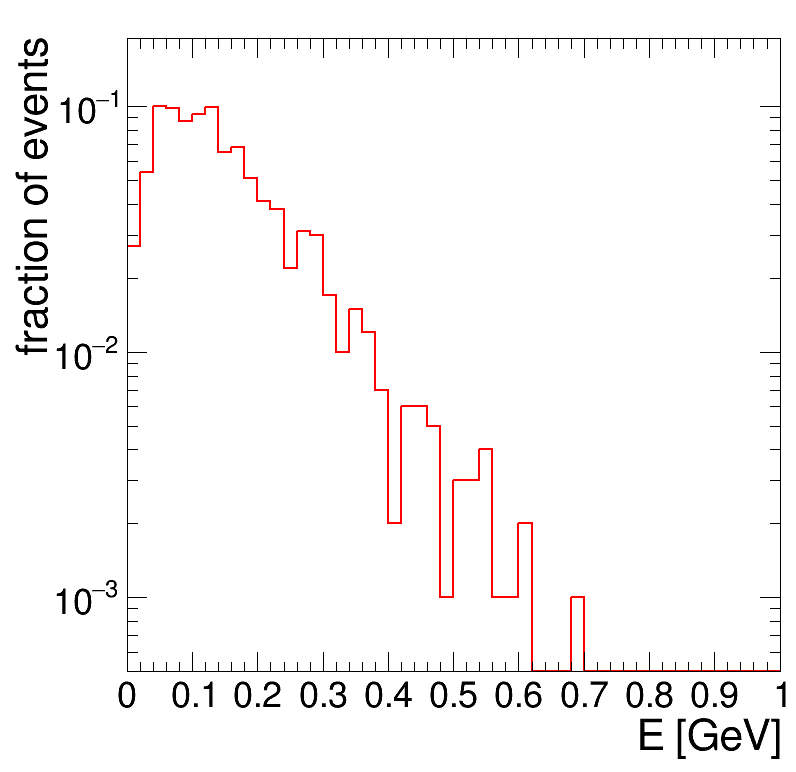

In [34]:
c = rt.TCanvas('c','c', 800, 800)
leg = rt.TLegend(0.18,0.76,0.53,0.94)
leg.SetTextSize(0.022)
leg.SetEntrySeparation(0.01)
gr_1j = {}
gr_2j = {}

# i = 0

print('i,j,n,s,m,a')

for k,v in tree.items(): 
    print(k,v)
    
    pho_pz = v['gParticleE'].array()
    pho_s = v['gParticleStatus'].array()
    gm_pz = v['gParticleMotherE'].array()
    pho_id = v['gParticleId'].array()
    pho_mo_dr = v['gParticleMotherDR'].array()
    pho_mo_id = v['gParticleMotherId'].array()
#     pho_mo_id = v['gParticleGrandMotherId'].array()
#     pho_gm_id = v['gParticleGrandMotherId'].array()
    
    
#     pho_string = np.logical_and(pho_id==22, pho_pz>0)
    pho_string = np.logical_and(pho_id==111, pho_pz>0)
#     pho00_string = np.logical_and(pho_id==111, pho_pz>0)
#     pho01_string = np.logical_and(pho_id==130, pho_pz>0)
#     pho02_string = np.logical_and(pho_id==310, pho_pz>0)
#     pho03_string = np.logical_and(pho_id==311, pho_pz>0)

#     pho04_string = np.logical_or(pho00_string,pho01_string)
#     pho05_string = np.logical_or(pho02_string,pho03_string)
#     pho_string = np.logical_or(pho04_string,pho05_string)

#     pho1_string = np.logical_and(abs(pho_mo_id)==1, abs(pho_mo_id)==1)
    pho1_string = np.logical_and(abs(pho_mo_id)>=1, abs(pho_mo_id)<=6)
    pho2_string = np.logical_and(abs(pho_mo_id)==1, pho_id==111)
    pho3_string = np.logical_or(pho2_string,pho1_string)
    
    pho4_string = np.logical_and(pho_string,pho3_string)

    pho5_string = np.logical_and(pho_pz<gm_pz,gm_pz>0)
    
    pho6_string = np.logical_and(pho4_string,pho5_string)
    
    pho7_string = np.logical_and(abs(pho_id)>=1, abs(pho_id)<=6)
    pho8_string = np.logical_and(abs(pho_id)==1, pho_id==111)
    pho9_string = np.logical_or(pho7_string,pho8_string)
    pho10_string = np.logical_and(abs(pho_mo_id)==2212, pho_id)
    pho11_string = np.logical_or(pho9_string,pho10_string)
    
    
    pho_pz1 = pho_pz[pho4_string] # pi0 energy
    pho_pz2 = pho_pz[np.logical_and(pho11_string,pho_s==71)] # jet energy
    pho_pz3 = pho_s[np.logical_and(pho11_string,pho_s==71)] # jet energy
        
    print(pho_pz1[1])
    print(pho_pz2[1])  
    print(pho_pz3[1])  
    
    s1 = [np.sum(np.unique(x)) for i, x in enumerate(pho_pz1)]
    s2 = [np.sum(np.unique(x)) for i, x in enumerate(pho_pz2)]
    
    print(s1[1])
    print(s2[1])  
    
    r = [(x/7000)  for i, (x,y) in enumerate(zip(s1,s2))]
#     r = [(x/y)/(1/6) for i, (x,y) in enumerate(zip(s1,s2))]
    
    
 
    ht0 = create_TH1D( r, axis_title=['E [GeV]', 'fraction of events'], name="", binning=[50,-0,1])
    ht0.SetLineColor(std_color_list[1])
    ht0.SetMarkerColor(std_color_list[1])
    
#     ht0.Draw('')
    ht0.DrawNormalized('')
    
  
 
#     i += 1

# leg.Draw()

c.SetLogy()
c.Update()
c.Draw()
c.SaveAs(out_dir+'pho_ee1.png')


i,j,n,s,m,a
analyzer-dyll-4FEVT-cluster1000.root <TTree b'ecalTPTree' at 0x7f4e7770c240>
191
10
191
10
0.9502487562189055


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190807/pho_br1.png has been created


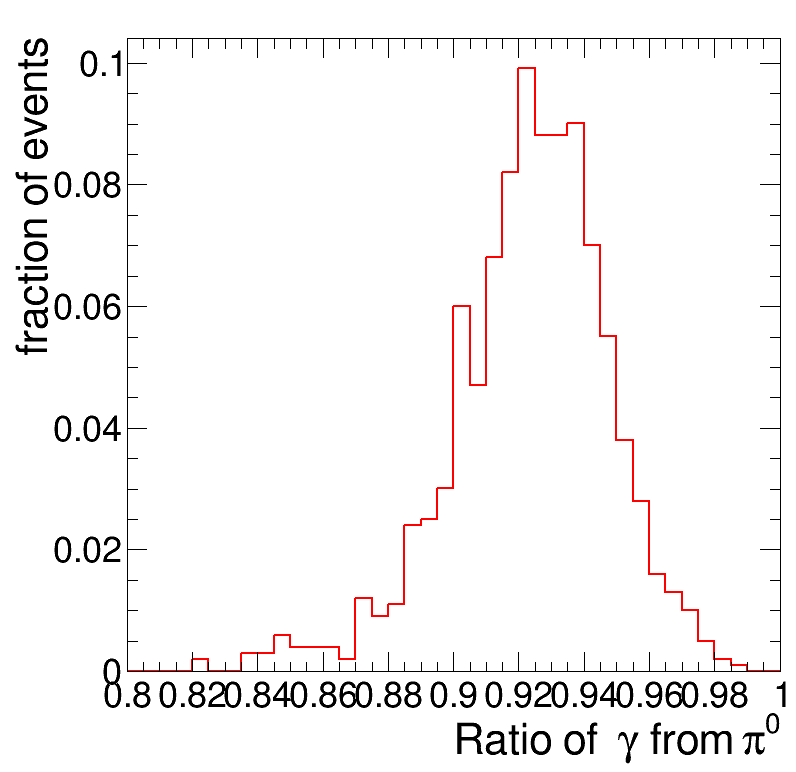

In [441]:
c = rt.TCanvas('c','c', 800, 800)
leg = rt.TLegend(0.18,0.76,0.53,0.94)
leg.SetTextSize(0.022)
leg.SetEntrySeparation(0.01)
gr_1j = {}
gr_2j = {}

i = 0

print('i,j,n,s,m,a')

for k,v in tree.items(): 
    print(k,v)
    
    pho_pz = v['gParticleE'].array()
    pho_id = v['gParticleId'].array()
    pho_mo_id = v['gParticleMotherId'].array()
    
    pho_string = np.logical_and(pho_id==22, pho_mo_id==111)
    pho1_string = np.logical_and(pho_id==22, pho_mo_id!=111)
    
    pho_pz1 = pho_pz[pho_string]
    pho_b_pz = pho_pz[pho1_string]
    
    print(len(pho_pz1[1]))
    print(len(pho_b_pz[1]))
    
    l1 = [len(x) for i, x in enumerate(pho_pz1)]
    l2 = [len(x) for i, x in enumerate(pho_b_pz)]
    
    print(l1[1])
    print(l2[1])
    
    r = [x/(x+y) for i, (x,y) in enumerate(zip(l1,l2))]
    
    print(r[1])
    
#     e = pho_e[:,0]
    pz = pho_pz1.flatten()
    bz = pho_b_pz.flatten()
    
    ht0 = create_TH1D( r, axis_title=['Ratio of  #gamma from #pi^{0}', 'fraction of events'], name="", binning=[40,0.8,1])
    ht0.SetLineColor(std_color_list[i+1])
    ht0.SetMarkerColor(std_color_list[i+1])
    
#     ht0.Draw('')
    ht0.DrawNormalized('')
    
    ht1 = create_TH1D( bz, axis_title=['E', 'fraction of events'], name="", binning=[50,-0,1000])
    ht1.SetLineColor(std_color_list[i+2])
    ht1.SetMarkerColor(std_color_list[i+2])
#     ht1.Draw('same')
    
#     ht1.DrawNormalized('same')
 
    i += 1

# leg.Draw()

# c.SetLogy()
c.Update()
c.Draw()
c.SaveAs(out_dir+'pho_br1.png')


i,j,n,s,m,a
analyzer-dyll-4FEVT-pi0cluster1000.root <TTree b'ecalTPTree' at 0x7efd1de58f60>
171
6
171
6
0.9661016949152542


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
python ERROR: cannot open image file "/nfshome/jmao/cms-llp/plots/20190800/pho_br2.png" for writing. Please check permissions.
Error in <TASImage::WriteImage>: error writing file /nfshome/jmao/cms-llp/plots/20190800/pho_br2.png


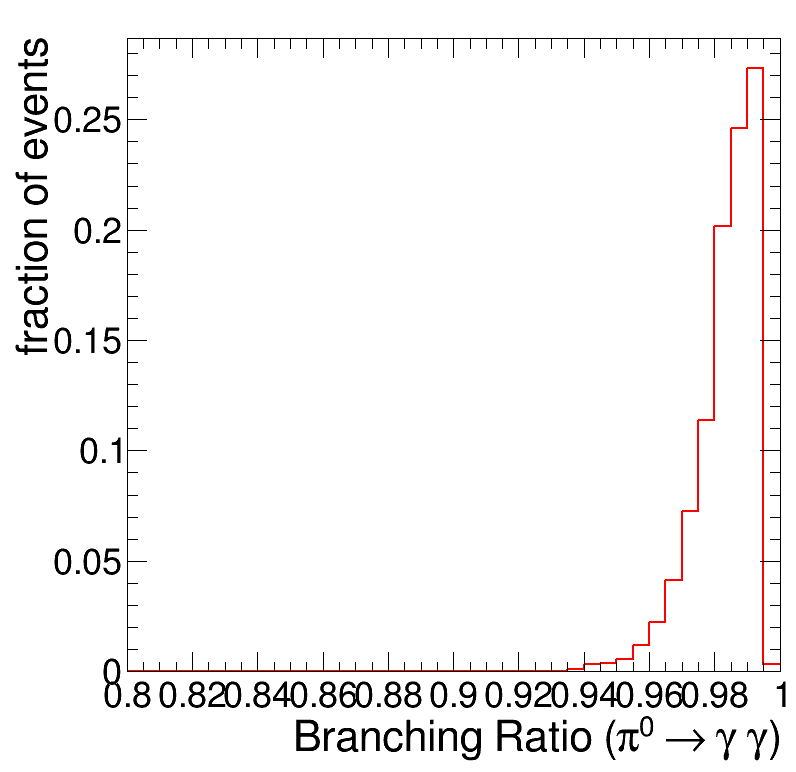

In [4]:
c = rt.TCanvas('c','c', 800, 800)
leg = rt.TLegend(0.18,0.76,0.53,0.94)
leg.SetTextSize(0.022)
leg.SetEntrySeparation(0.01)
gr_1j = {}
gr_2j = {}

i = 0

print('i,j,n,s,m,a')

for k,v in tree.items(): 
    print(k,v)
    
    pho_pz = v['gParticleE'].array()
    pho_id = v['gParticleId'].array()
    pho_mo_id = v['gParticleMotherId'].array()
    
    pho_string = np.logical_and(pho_id==22, pho_mo_id==111)
    pho1_string = np.logical_and(pho_id!=22, pho_mo_id==111)
    
    pho_pz1 = pho_pz[pho_string]
    pho_b_pz = pho_pz[pho1_string]
    
    print(len(pho_pz1[1]))
    print(len(pho_b_pz[1]))
    
    l1 = [len(x) for i, x in enumerate(pho_pz1)]
    l2 = [len(x) for i, x in enumerate(pho_b_pz)]
    
    print(l1[1])
    print(l2[1])
    
    r = [x/(x+y) for i, (x,y) in enumerate(zip(l1,l2))]
    
    print(r[1])
    
#     e = pho_e[:,0]
    pz = pho_pz1.flatten()
    bz = pho_b_pz.flatten()
    
    ht0 = create_TH1D( r, axis_title=['Branching Ratio (#pi^{0} #rightarrow #gamma #gamma)', 'fraction of events'], name="", binning=[40,0.8,1])
    ht0.SetLineColor(std_color_list[i+1])
    ht0.SetMarkerColor(std_color_list[i+1])
    
#     ht0.Draw('')
    ht0.DrawNormalized('')
    
    ht1 = create_TH1D( bz, axis_title=['E', 'fraction of events'], name="", binning=[50,-0,1000])
    ht1.SetLineColor(std_color_list[i+2])
    ht1.SetMarkerColor(std_color_list[i+2])
#     ht1.Draw('same')
    
#     ht1.DrawNormalized('same')
 
    i += 1

# leg.Draw()

# c.SetLogy()
c.Update()
c.Draw()
c.SaveAs(out_dir+'pho_br2.png')


i,j,n,s,m,a
analyzer-dyll-4FEVT-cluster1000.root <TTree b'ecalTPTree' at 0x7f4e7770c240>


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190807/pho_bro_dr.png has been created


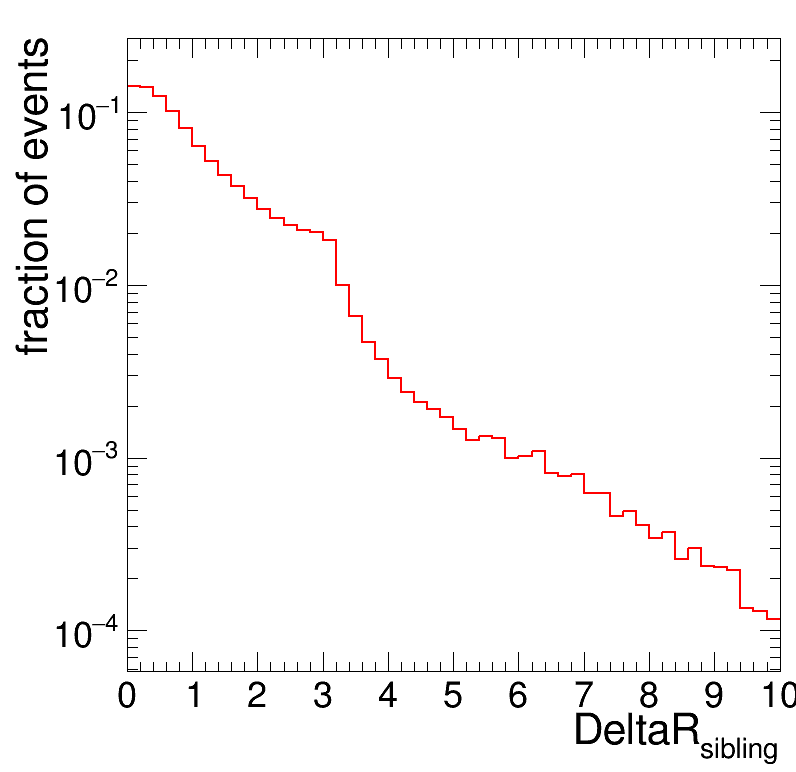

In [215]:
c = rt.TCanvas('c','c', 800, 800)
leg = rt.TLegend(0.18,0.76,0.53,0.94)
leg.SetTextSize(0.022)
leg.SetEntrySeparation(0.01)
gr_1j = {}
gr_2j = {}

i = 0

print('i,j,n,s,m,a')

for k,v in tree.items(): 
    print(k,v)
    
    pho_pz = v['gParticleSiblingDR'].array()
    pho_id = v['gParticleSiblingId'].array()
    pho_mo_id = v['gParticleMotherId'].array()
    
    pho_pz = pho_pz[pho_id==22, pho_mo_id==111]
    
#     e = pho_e[:,0]
    pz = pho_pz.flatten()
    
    ht0 = create_TH1D( pz, axis_title=['DeltaR_{sibling}', 'fraction of events'], name="", binning=[50,-0,10])
    ht0.SetLineColor(std_color_list[i+1])
    ht0.SetMarkerColor(std_color_list[i+1])
    
    ht0.DrawNormalized('')
 
    i += 1

# leg.Draw()

c.SetLogy()
c.Update()
c.Draw()
c.SaveAs(out_dir+'pho_bro_dr.png')


i,j,n,s,m,a
analyzer-dyll-4FEVT-cluster1000.root <TTree b'ecalTPTree' at 0x7f4e7770c240>


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190807/pho_mo_bro_dr.png has been created


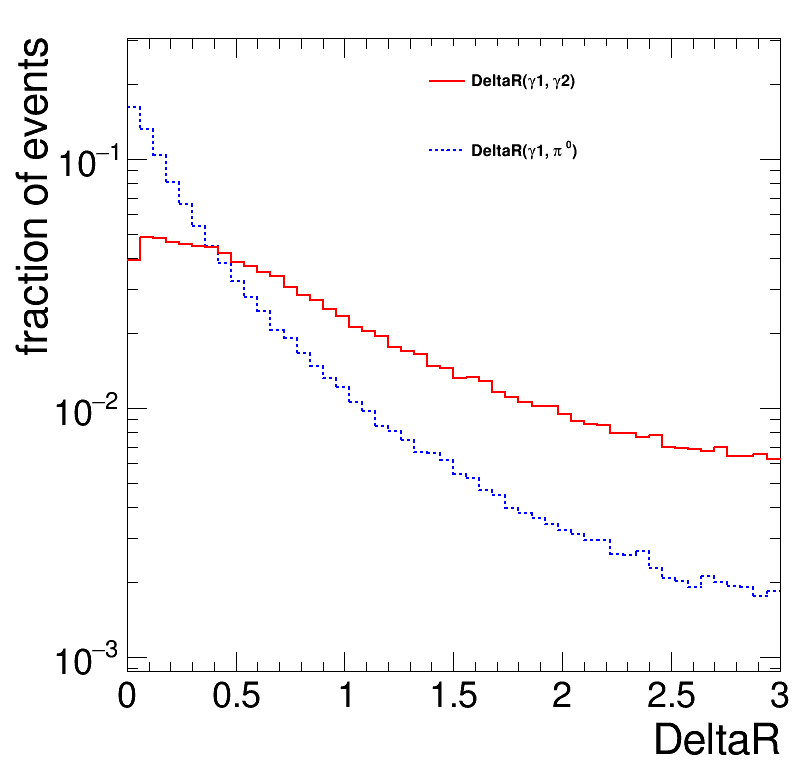

In [374]:
c = rt.TCanvas('c','c', 800, 800)
leg = rt.TLegend(0.78,0.76,0.53,0.94)
leg.SetTextSize(0.022)
leg.SetBorderSize(0)
leg.SetEntrySeparation(0.01)
gr_1j = {}
gr_2j = {}

i = 0

print('i,j,n,s,m,a')

for k,v in tree.items(): 
    print(k,v)
    
    pho_pz = v['gParticleSiblingDR'].array()
    pho_mo_pz = v['gParticleMotherDR'].array()
    pho_id = v['gParticleSiblingId'].array()
    pho_mo_id = v['gParticleMotherId'].array()
    
    pho_pz = pho_pz[pho_id==22, pho_mo_id==111]
    pho_mo_pz = pho_mo_pz[pho_id==22, pho_mo_id==111]
    
#     e = pho_e[:,0]
    pz = pho_pz.flatten()
    mo_pz = pho_mo_pz.flatten()
    
    ht0 = create_TH1D( pz, axis_title=['DeltaR', 'fraction of events'], name="", binning=[50,-0,3])
    ht0.SetLineColor(std_color_list[i+1])
    ht0.SetMarkerColor(std_color_list[i+1])
    
    
    ht1 = create_TH1D( mo_pz, axis_title=['DeltaR', 'fraction of events'], name="", binning=[50,-0,3])
    ht1.SetLineStyle(2)
    ht1.SetLineColor(std_color_list[i+2])
    ht1.SetMarkerColor(std_color_list[i+2])
    
    ht1.DrawNormalized('same')
    ht0.DrawNormalized('same')
    
    leg.AddEntry(ht0, 'DeltaR(#gamma1, #gamma2)')
    leg.AddEntry(ht1, 'DeltaR(#gamma1, #pi ^{0})')
 
    i += 1

leg.Draw()

c.SetLogy()
c.Update()
c.Draw()
c.SaveAs(out_dir+'pho_mo_bro_dr.png')


i,j,n,s,m,a
analyzer-dyll-4FEVT-pi0cluster1000.root <TTree b'ecalTPTree' at 0x7efd1de58f60>


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
python ERROR: cannot open image file "/nfshome/jmao/cms-llp/plots/20190800/pho_min_mo_bro_dr.png" for writing. Please check permissions.
Error in <TASImage::WriteImage>: error writing file /nfshome/jmao/cms-llp/plots/20190800/pho_min_mo_bro_dr.png


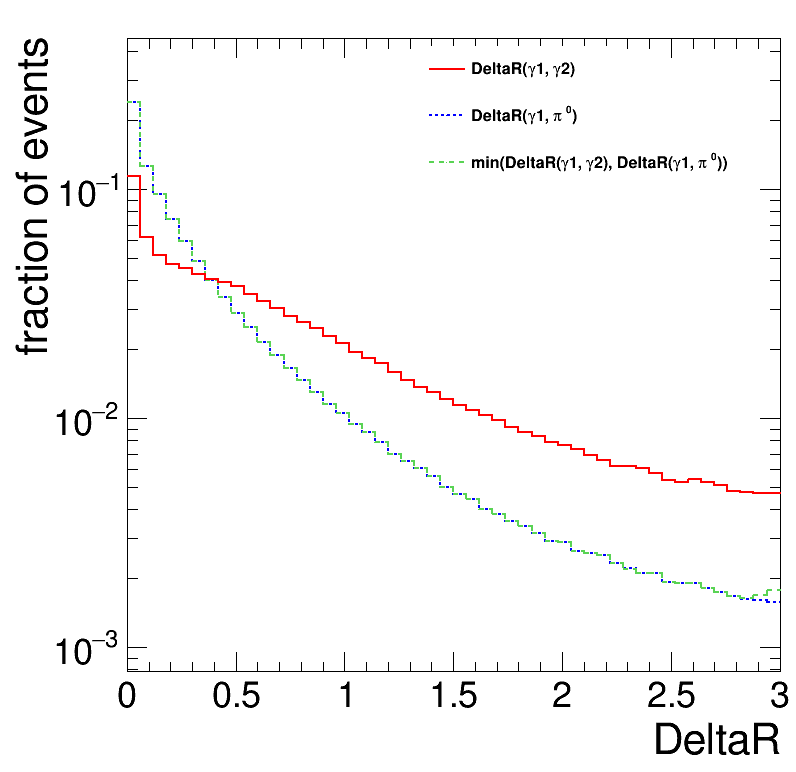

In [5]:
c = rt.TCanvas('c','c', 800, 800)
leg = rt.TLegend(0.78,0.76,0.53,0.94)
leg.SetTextSize(0.022)
leg.SetBorderSize(0)
leg.SetEntrySeparation(0.01)
gr_1j = {}
gr_2j = {}

i = 0

print('i,j,n,s,m,a')

for k,v in tree.items(): 
    print(k,v)
    
    pho_pz = v['gParticleSiblingDR'].array()
    pho_mo_pz = v['gParticleMotherDR'].array()
    pho_id = v['gParticleSiblingId'].array()
    pho_mo_id = v['gParticleMotherId'].array()
    
    pho_pz = pho_pz[np.logical_and(pho_id==22, pho_mo_id==111)]
    pho_mo_pz = pho_mo_pz[np.logical_and(pho_id==22, pho_mo_id==111)]
    
#     e = pho_e[:,0]
    pz = pho_pz.flatten()
    mo_pz = pho_mo_pz.flatten()
    min_pz = [min(x,y) for i, (x,y) in enumerate(zip(pz, mo_pz))]
#     min_pz = min(pz, mo_pz)
#     min_pz = pho_min_pz.flatten()
    
    ht0 = create_TH1D( pz, axis_title=['DeltaR', 'fraction of events'], name="", binning=[50,-0,3])
    ht0.SetLineColor(std_color_list[i+1])
    ht0.SetMarkerColor(std_color_list[i+1])
    
    
    ht1 = create_TH1D( mo_pz, axis_title=['DeltaR', 'fraction of events'], name="", binning=[50,-0,3])
    ht1.SetLineStyle(2)
    ht1.SetLineColor(std_color_list[i+2])
    ht1.SetMarkerColor(std_color_list[i+2])
    
    ht2 = create_TH1D( min_pz, axis_title=['DeltaR', 'fraction of events'], name="", binning=[50,-0,3])
    ht2.SetLineStyle(7)
    ht2.SetLineColor(std_color_list[i+3])
    ht2.SetMarkerColor(std_color_list[i+3])
    
    ht1.DrawNormalized('same')
    ht2.DrawNormalized('same')
    ht0.DrawNormalized('same')
    
    leg.AddEntry(ht0, 'DeltaR(#gamma1, #gamma2)')
    leg.AddEntry(ht1, 'DeltaR(#gamma1, #pi ^{0})')
    leg.AddEntry(ht2, 'min(DeltaR(#gamma1, #gamma2), DeltaR(#gamma1, #pi ^{0}))')
 
    i += 1

leg.Draw()

c.SetLogy()
c.Update()
c.Draw()
c.SaveAs(out_dir+'pho_min_mo_bro_dr.png')


i,j,n,s,m,a
analyzer-dyll-4FEVT-pi0cluster1000.root <TTree b'ecalTPTree' at 0x7efd1de58f60>


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
python ERROR: cannot open image file "/nfshome/jmao/cms-llp/plots/20190800/pho_min_mo_bro_dr_small.png" for writing. Please check permissions.
Error in <TASImage::WriteImage>: error writing file /nfshome/jmao/cms-llp/plots/20190800/pho_min_mo_bro_dr_small.png


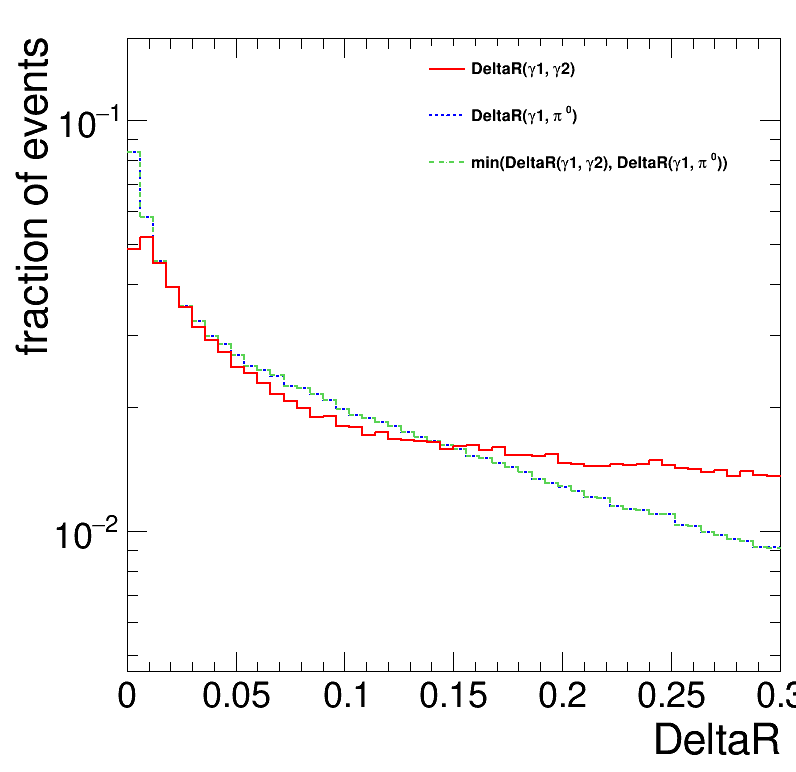

In [6]:
c = rt.TCanvas('c','c', 800, 800)
leg = rt.TLegend(0.78,0.76,0.53,0.94)
leg.SetTextSize(0.022)
leg.SetBorderSize(0)
leg.SetEntrySeparation(0.01)
gr_1j = {}
gr_2j = {}

i = 0

print('i,j,n,s,m,a')

for k,v in tree.items(): 
    print(k,v)
    
    pho_pz = v['gParticleSiblingDR'].array()
    pho_mo_pz = v['gParticleMotherDR'].array()
    pho_id = v['gParticleSiblingId'].array()
    pho_mo_id = v['gParticleMotherId'].array()
    
    pho_pz = pho_pz[np.logical_and(pho_id==22, pho_mo_id==111)]
    pho_mo_pz = pho_mo_pz[np.logical_and(pho_id==22, pho_mo_id==111)]
    
#     e = pho_e[:,0]
    pz = pho_pz.flatten()
    mo_pz = pho_mo_pz.flatten()
    min_pz = [min(x,y) for i, (x,y) in enumerate(zip(pz, mo_pz))]
#     min_pz = min(pz, mo_pz)
#     min_pz = pho_min_pz.flatten()
    
    ht0 = create_TH1D( pz, axis_title=['DeltaR', 'fraction of events'], name="", binning=[50,-0,0.3])
    ht0.SetLineColor(std_color_list[i+1])
    ht0.SetMarkerColor(std_color_list[i+1])
    
    
    ht1 = create_TH1D( mo_pz, axis_title=['DeltaR', 'fraction of events'], name="", binning=[50,-0,0.3])
    ht1.SetLineStyle(2)
    ht1.SetLineColor(std_color_list[i+2])
    ht1.SetMarkerColor(std_color_list[i+2])
    
    ht2 = create_TH1D( min_pz, axis_title=['DeltaR', 'fraction of events'], name="", binning=[50,-0,0.3])
    ht2.SetLineStyle(7)
    ht2.SetLineColor(std_color_list[i+3])
    ht2.SetMarkerColor(std_color_list[i+3])
    
    ht1.DrawNormalized('same')
    ht2.DrawNormalized('same')
    ht0.DrawNormalized('same')
    
    leg.AddEntry(ht0, 'DeltaR(#gamma1, #gamma2)')
    leg.AddEntry(ht1, 'DeltaR(#gamma1, #pi ^{0})')
    leg.AddEntry(ht2, 'min(DeltaR(#gamma1, #gamma2), DeltaR(#gamma1, #pi ^{0}))')
 
    i += 1

leg.Draw()

c.SetLogy()
c.Update()
c.Draw()
c.SaveAs(out_dir+'pho_min_mo_bro_dr_small.png')


i,j,n,s,m,a
analyzer-dyll-4FEVT-cluster1000.root <TTree b'ecalTPTree' at 0x7f4e7770c240>


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TROOT::Append>: Replacing existing TH1: analyzer-dyll-4FEVT-cluster1000.root (Potential memory leak).
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190807/pho_mo_bro_dr_2d.png has been created


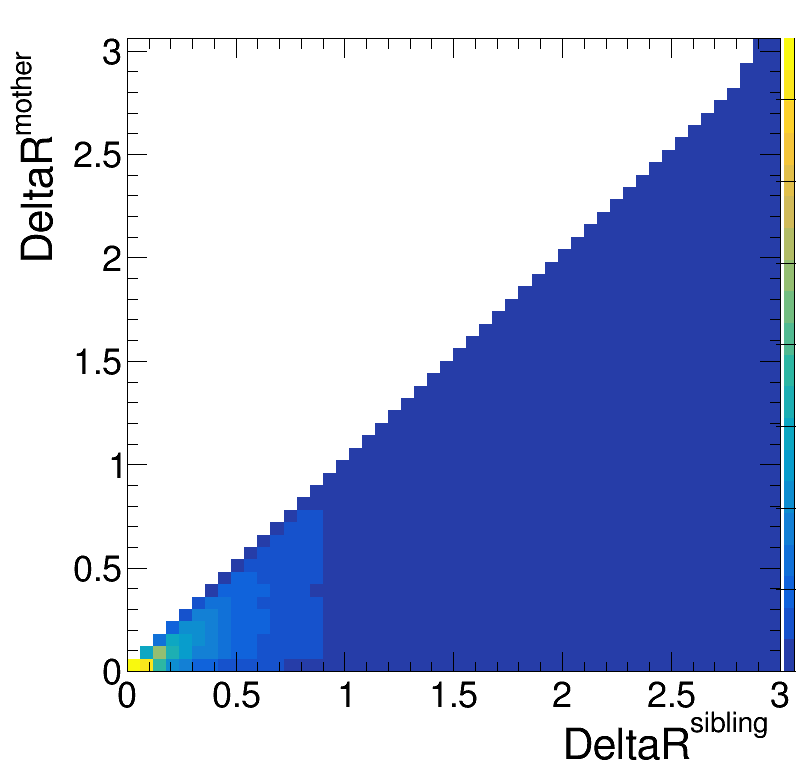

In [375]:
c = rt.TCanvas('c','c', 800, 800)
leg = rt.TLegend(0.18,0.76,0.53,0.94)
leg.SetTextSize(0.022)
leg.SetEntrySeparation(0.01)
gr_1j = {}
gr_2j = {}

i = 0

print('i,j,n,s,m,a')

for k,v in tree.items(): 
    print(k,v)
    
    pho_bro_pz = v['gParticleMotherDR'].array()
    pho_id = v['gParticleId'].array()
    
    pho_pz = v['gParticleSiblingDR'].array()
    pho_bro_id = v['gParticleSiblingId'].array()
  
    pho_mo_id = v['gParticleMotherId'].array()
    
    pho_string = np.logical_and(pho_id==22, pho_mo_id==111)
    pho_bro_string = np.logical_and(pho_bro_id==22, pho_mo_id==111)
    
    pho_pz1 = pho_pz[np.logical_and(pho_string, pho_bro_string)]
    pho_bro_pz1 = pho_bro_pz[np.logical_and(pho_string, pho_bro_string)]
    
#     e = pho_e[:,0]
#     bro_pz = pho_bro_pz1[:,0]
#     pz = pho_pz1[:,0]
    pz = pho_pz1.flatten()
    bro_pz = pho_bro_pz1.flatten()
    sample = [pz,bro_pz]
    
#     ht0 = create_TH2D((sample, name='', title=None, binning=[50,-100,100,50,-100,100] )
# #                       #axis_title = ['p_{Z} [GeV]','p_{Z}^{sibling} [GeV]','']
    ht0.SetLineColor(std_color_list[i+1])
    ht0.SetMarkerColor(std_color_list[i+1])
                      
    hz = rt.TH2D(k,k,50,0,3,50,-0,3)
    hz.GetYaxis().SetTitle('DeltaR^{mother} ')
    hz.GetXaxis().SetTitle('DeltaR^{sibling} ')
    hz.GetYaxis().SetRangeUser(0,1e+6)
#     hz[k].SetMarkerColor(std_color_list[i])
        

    for evt,(pz1,pz2) in enumerate(zip(pz,bro_pz)):
        hz.Fill(pz1,pz2)
    
    hz.Draw('colz')
 
    i += 1

# leg.Draw()

# c.SetLogy()
c.Update()
c.Draw()
c.SaveAs(out_dir+'pho_mo_bro_dr_2d.png')


i,j,n,s,m,a
analyzer-dyll-4FEVT-cluster1000.root <TTree b'ecalTPTree' at 0x7f4e7770c240>


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TROOT::Append>: Replacing existing TH1: analyzer-dyll-4FEVT-cluster1000.root (Potential memory leak).
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190807/pho_bro_e_2d.png has been created


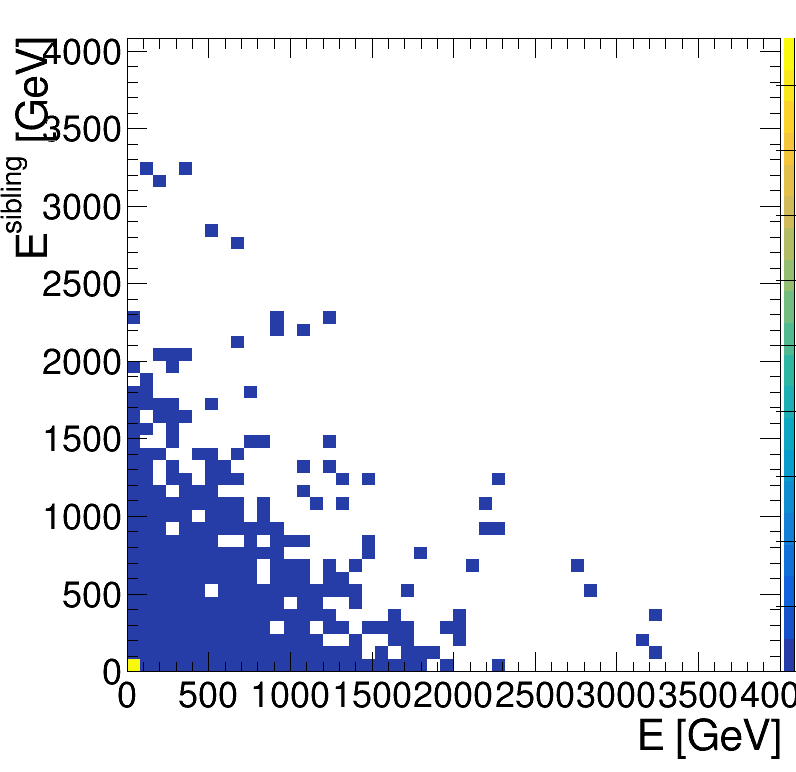

In [216]:
c = rt.TCanvas('c','c', 800, 800)
leg = rt.TLegend(0.18,0.76,0.53,0.94)
leg.SetTextSize(0.022)
leg.SetEntrySeparation(0.01)
gr_1j = {}
gr_2j = {}

i = 0

print('i,j,n,s,m,a')

for k,v in tree.items(): 
    print(k,v)
    
    pho_pz = v['gParticleE'].array()
    pho_id = v['gParticleId'].array()
    
    pho_bro_pz = v['gParticleSiblingE'].array()
    pho_bro_id = v['gParticleSiblingId'].array()
  
    pho_mo_id = v['gParticleMotherId'].array()
    
    pho_string = np.logical_and(pho_id==22, pho_mo_id==111)
    pho_bro_string = np.logical_and(pho_bro_id==22, pho_mo_id==111)
    
    pho_pz1 = pho_pz[np.logical_and(pho_string, pho_bro_string)]
    pho_bro_pz1 = pho_bro_pz[np.logical_and(pho_string, pho_bro_string)]
    
#     e = pho_e[:,0]
#     bro_pz = pho_bro_pz1[:,0]
#     pz = pho_pz1[:,0]
    pz = pho_pz1.flatten()
    bro_pz = pho_bro_pz1.flatten()
    sample = [pz,bro_pz]
    
#     ht0 = create_TH2D((sample, name='', title=None, binning=[50,-100,100,50,-100,100] )
# #                       #axis_title = ['p_{Z} [GeV]','p_{Z}^{sibling} [GeV]','']
    ht0.SetLineColor(std_color_list[i+1])
    ht0.SetMarkerColor(std_color_list[i+1])
                      
    hz = rt.TH2D(k,k,50,0,4000,50,-0,4000)
    hz.GetXaxis().SetTitle('E [GeV]')
    hz.GetYaxis().SetTitle('E^{sibling} [GeV]')
    hz.GetYaxis().SetRangeUser(0,1e+6)
#     hz[k].SetMarkerColor(std_color_list[i])
        

    for evt,(pz1,pz2) in enumerate(zip(pz,bro_pz)):
        hz.Fill(pz1,pz2)
    
    hz.Draw('colz')
 
    i += 1

# leg.Draw()

# c.SetLogy()
c.Update()
c.Draw()
c.SaveAs(out_dir+'pho_bro_e_2d.png')


i,j,n,s,m,a
analyzer-dyll-4FEVT-cluster1000.root <TTree b'ecalTPTree' at 0x7f4e7770c240>


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TROOT::Append>: Replacing existing TH1: analyzer-dyll-4FEVT-cluster1000.root (Potential memory leak).
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190807/pho_bro_pt_2d.png has been created


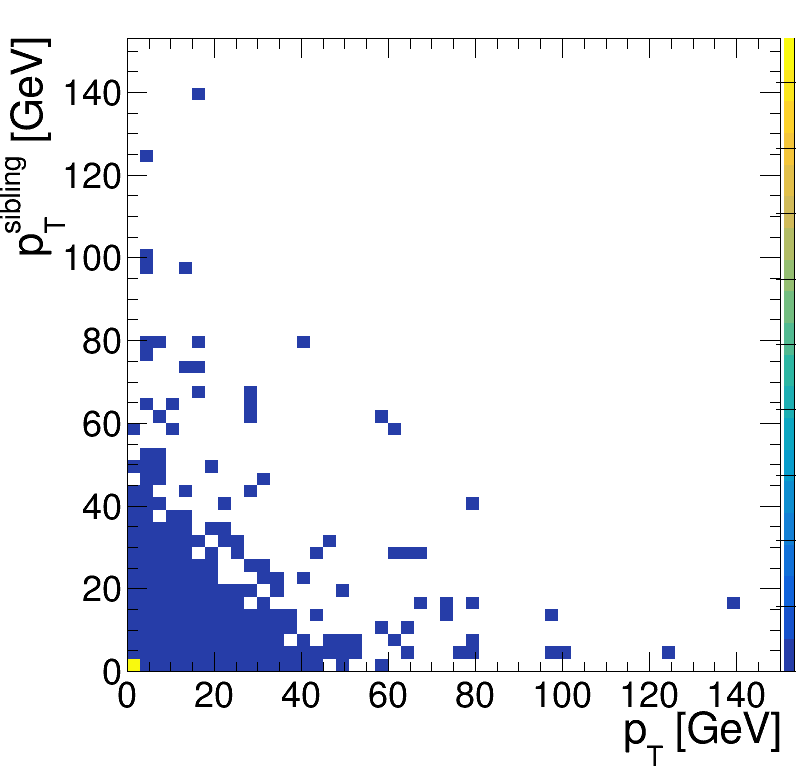

In [217]:
c = rt.TCanvas('c','c', 800, 800)
leg = rt.TLegend(0.18,0.76,0.53,0.94)
leg.SetTextSize(0.022)
leg.SetEntrySeparation(0.01)
gr_1j = {}
gr_2j = {}

i = 0

print('i,j,n,s,m,a')

for k,v in tree.items(): 
    print(k,v)
    
    pho_pz = v['gParticlePt'].array()
    pho_id = v['gParticleId'].array()
    
    pho_bro_pz = v['gParticleSiblingPt'].array()
    pho_bro_id = v['gParticleSiblingId'].array()
  
    pho_mo_id = v['gParticleMotherId'].array()
    
    pho_string = np.logical_and(pho_id==22, pho_mo_id==111)
    pho_bro_string = np.logical_and(pho_bro_id==22, pho_mo_id==111)
    
    pho_pz1 = pho_pz[np.logical_and(pho_string, pho_bro_string)]
    pho_bro_pz1 = pho_bro_pz[np.logical_and(pho_string, pho_bro_string)]
    
#     e = pho_e[:,0]
#     bro_pz = pho_bro_pz1[:,0]
#     pz = pho_pz1[:,0]
    pz = pho_pz1.flatten()
    bro_pz = pho_bro_pz1.flatten()
    sample = [pz,bro_pz]
    
#     ht0 = create_TH2D((sample, name='', title=None, binning=[50,-100,100,50,-100,100] )
# #                       #axis_title = ['p_{Z} [GeV]','p_{Z}^{sibling} [GeV]','']
    ht0.SetLineColor(std_color_list[i+1])
    ht0.SetMarkerColor(std_color_list[i+1])
                      
    hz = rt.TH2D(k,k,50,0,150,50,-0,150)
    hz.GetXaxis().SetTitle('p_{T} [GeV]')
    hz.GetYaxis().SetTitle('p_{T}^{sibling} [GeV]')
    hz.GetYaxis().SetRangeUser(0,1e+6)
#     hz[k].SetMarkerColor(std_color_list[i])
        

    for evt,(pz1,pz2) in enumerate(zip(pz,bro_pz)):
        hz.Fill(pz1,pz2)
    
    hz.Draw('colz')
 
    i += 1

# leg.Draw()

# c.SetLogy()
c.Update()
c.Draw()
c.SaveAs(out_dir+'pho_bro_pt_2d.png')


i,j,n,s,m,a
analyzer-dyll-4FEVT-cluster1000.root <TTree b'ecalTPTree' at 0x7f4e7770c240>


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TROOT::Append>: Replacing existing TH1: analyzer-dyll-4FEVT-cluster1000.root (Potential memory leak).
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190807/pho_bro_px_2d.png has been created


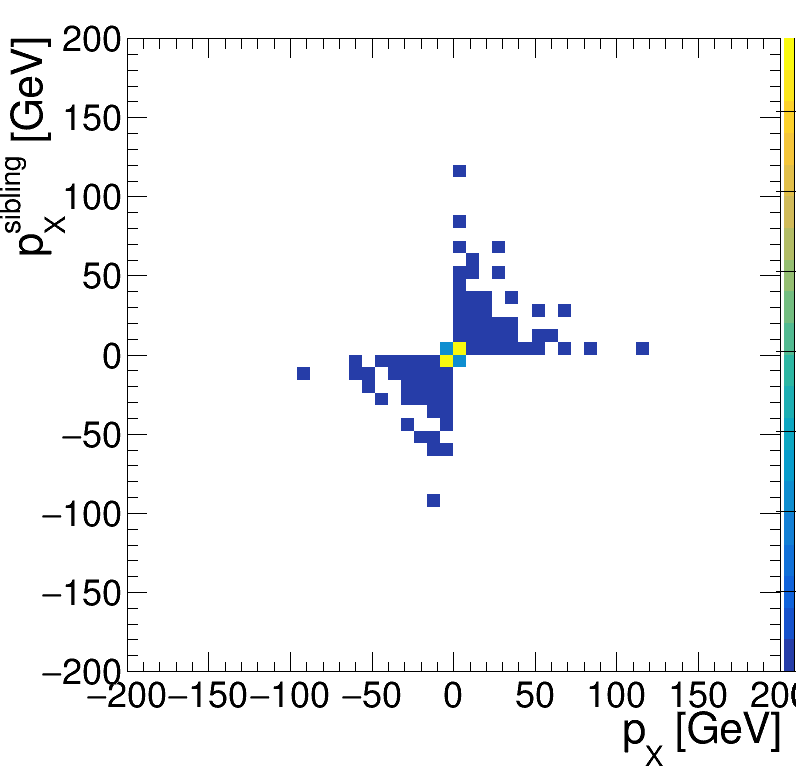

In [218]:
c = rt.TCanvas('c','c', 800, 800)
leg = rt.TLegend(0.18,0.76,0.53,0.94)
leg.SetTextSize(0.022)
leg.SetEntrySeparation(0.01)
gr_1j = {}
gr_2j = {}

i = 0

print('i,j,n,s,m,a')

for k,v in tree.items(): 
    print(k,v)
    
    pho_pz = v['gParticlePx'].array()
    pho_id = v['gParticleId'].array()
    
    pho_bro_pz = v['gParticleSiblingPx'].array()
    pho_bro_id = v['gParticleSiblingId'].array()
  
    pho_mo_id = v['gParticleMotherId'].array()
    
    pho_string = np.logical_and(pho_id==22, pho_mo_id==111)
    pho_bro_string = np.logical_and(pho_bro_id==22, pho_mo_id==111)
    
    pho_pz1 = pho_pz[np.logical_and(pho_string, pho_bro_string)]
    pho_bro_pz1 = pho_bro_pz[np.logical_and(pho_string, pho_bro_string)]
    
    
    
    
#     pho_pz1 = pho_pz[pho_id==22, pho_bro_id==22, pho_mo_id==111]
#     pho_bro_pz1 = pho_pz[pho_id==22, pho_bro_id==22, pho_mo_id==111]
    
#     e = pho_e[:,0]
    pz = pho_pz1.flatten()
    bro_pz = pho_bro_pz1.flatten()
    sample = [pz,bro_pz]
    
#     ht0 = create_TH2D((sample, name='', title=None, binning=[50,-100,100,50,-100,100] )
# #                       #axis_title = ['p_{Z} [GeV]','p_{Z}^{sibling} [GeV]','']
    ht0.SetLineColor(std_color_list[i+1])
    ht0.SetMarkerColor(std_color_list[i+1])
                      
    hz = rt.TH2D(k,k,50,-200,200,50,-200,200)
    hz.GetXaxis().SetTitle('p_{X} [GeV]')
    hz.GetYaxis().SetTitle('p_{X}^{sibling} [GeV]')
#     hz[k].SetMarkerColor(std_color_list[i])
        

    for evt,(pz1,pz2) in enumerate(zip(pz,bro_pz)):
        hz.Fill(pz1,pz2)
    
    hz.Draw('colz')
 
    i += 1

# leg.Draw()

# c.SetLogy()
c.Update()
c.Draw()
c.SaveAs(out_dir+'pho_bro_px_2d.png')


i,j,n,s,m,a
analyzer-dyll-4FEVT-cluster1000.root <TTree b'ecalTPTree' at 0x7f4e7770c240>


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TROOT::Append>: Replacing existing TH1: analyzer-dyll-4FEVT-cluster1000.root (Potential memory leak).
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190807/pho_bro_py_2d.png has been created


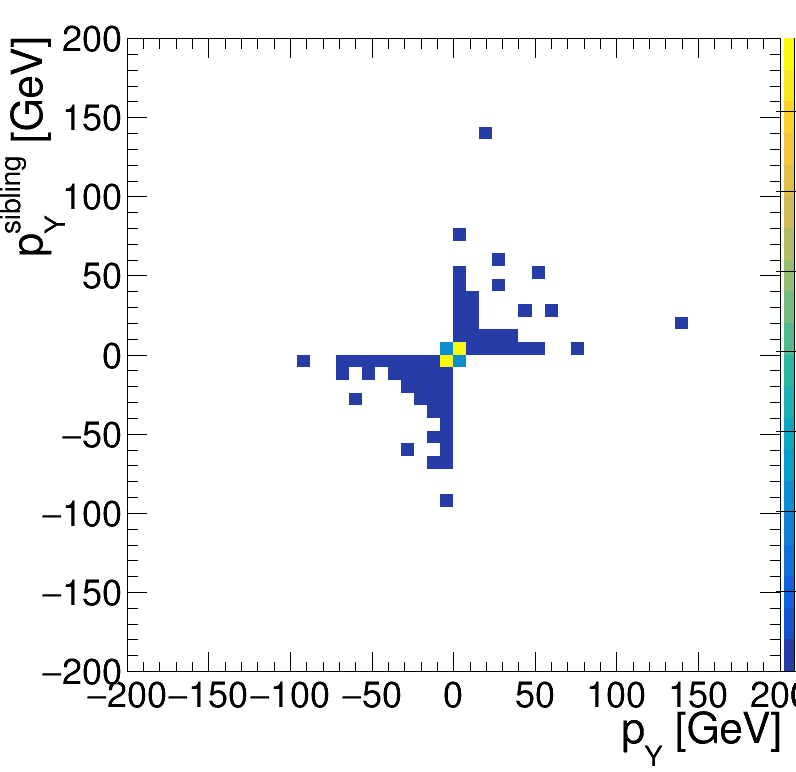

In [219]:
c = rt.TCanvas('c','c', 800, 800)
leg = rt.TLegend(0.18,0.76,0.53,0.94)
leg.SetTextSize(0.022)
leg.SetEntrySeparation(0.01)
gr_1j = {}
gr_2j = {}

i = 0

print('i,j,n,s,m,a')

for k,v in tree.items(): 
    print(k,v)
    
    pho_pz = v['gParticlePy'].array()
    pho_id = v['gParticleId'].array()
    
    pho_bro_pz = v['gParticleSiblingPy'].array()
    pho_bro_id = v['gParticleSiblingId'].array()
  
    pho_mo_id = v['gParticleMotherId'].array()
    
    pho_string = np.logical_and(pho_id==22, pho_mo_id==111)
    pho_bro_string = np.logical_and(pho_bro_id==22, pho_mo_id==111)
    
    pho_pz1 = pho_pz[np.logical_and(pho_string, pho_bro_string)]
    pho_bro_pz1 = pho_bro_pz[np.logical_and(pho_string, pho_bro_string)]
    
    
    
    
#     pho_pz1 = pho_pz[pho_id==22, pho_bro_id==22, pho_mo_id==111]
#     pho_bro_pz1 = pho_pz[pho_id==22, pho_bro_id==22, pho_mo_id==111]
    
#     e = pho_e[:,0]
    pz = pho_pz1.flatten()
    bro_pz = pho_bro_pz1.flatten()
    sample = [pz,bro_pz]
    
#     ht0 = create_TH2D((sample, name='', title=None, binning=[50,-100,100,50,-100,100] )
# #                       #axis_title = ['p_{Z} [GeV]','p_{Z}^{sibling} [GeV]','']
    ht0.SetLineColor(std_color_list[i+1])
    ht0.SetMarkerColor(std_color_list[i+1])
                      
    hz = rt.TH2D(k,k,50,-200,200,50,-200,200)
    hz.GetXaxis().SetTitle('p_{Y} [GeV]')
    hz.GetYaxis().SetTitle('p_{Y}^{sibling} [GeV]')
#     hz[k].SetMarkerColor(std_color_list[i])
        

    for evt,(pz1,pz2) in enumerate(zip(pz,bro_pz)):
        hz.Fill(pz1,pz2)
    
    hz.Draw('colz')
 
    i += 1

# leg.Draw()

# c.SetLogy()
c.Update()
c.Draw()
c.SaveAs(out_dir+'pho_bro_py_2d.png')


i,j,n,s,m,a
analyzer-dyll-4FEVT-cluster1000.root <TTree b'ecalTPTree' at 0x7f4e7770c240>


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TROOT::Append>: Replacing existing TH1: analyzer-dyll-4FEVT-cluster1000.root (Potential memory leak).
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190807/pho_bro_pz_2d.png has been created


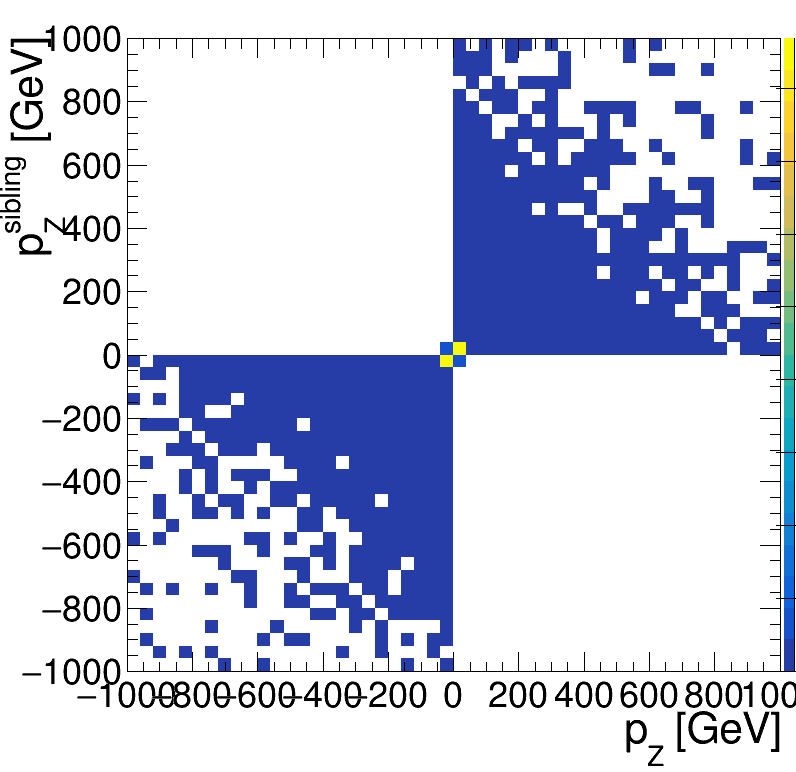

In [220]:
c = rt.TCanvas('c','c', 800, 800)
leg = rt.TLegend(0.18,0.76,0.53,0.94)
leg.SetTextSize(0.022)
leg.SetEntrySeparation(0.01)
gr_1j = {}
gr_2j = {}

i = 0

print('i,j,n,s,m,a')

for k,v in tree.items(): 
    print(k,v)
    
    pho_pz = v['gParticlePz'].array()
    pho_id = v['gParticleId'].array()
    
    pho_bro_pz = v['gParticleSiblingPz'].array()
    pho_bro_id = v['gParticleSiblingId'].array()
  
    pho_mo_id = v['gParticleMotherId'].array()
    
    pho_string = np.logical_and(pho_id==22, pho_mo_id==111)
    pho_bro_string = np.logical_and(pho_bro_id==22, pho_mo_id==111)
    
    pho_pz1 = pho_pz[np.logical_and(pho_string, pho_bro_string)]
    pho_bro_pz1 = pho_bro_pz[np.logical_and(pho_string, pho_bro_string)]
    
    
    
    
#     pho_pz1 = pho_pz[pho_id==22, pho_bro_id==22, pho_mo_id==111]
#     pho_bro_pz1 = pho_pz[pho_id==22, pho_bro_id==22, pho_mo_id==111]
    
#     e = pho_e[:,0]
    pz = pho_pz1.flatten()
    bro_pz = pho_bro_pz1.flatten()
    sample = [pz,bro_pz]
    
#     ht0 = create_TH2D((sample, name='', title=None, binning=[50,-100,100,50,-100,100] )
# #                       #axis_title = ['p_{Z} [GeV]','p_{Z}^{sibling} [GeV]','']
    ht0.SetLineColor(std_color_list[i+1])
    ht0.SetMarkerColor(std_color_list[i+1])
                      
    hz = rt.TH2D(k,k,50,-1000,1000,50,-1000,1000)
    hz.GetXaxis().SetTitle('p_{Z} [GeV]')
    hz.GetYaxis().SetTitle('p_{Z}^{sibling} [GeV]')
#     hz[k].SetMarkerColor(std_color_list[i])
        

    for evt,(pz1,pz2) in enumerate(zip(pz,bro_pz)):
        hz.Fill(pz1,pz2)
    
    hz.Draw('colz')
 
    i += 1

# leg.Draw()

# c.SetLogy()
c.Update()
c.Draw()
c.SaveAs(out_dir+'pho_bro_pz_2d.png')


# Photon Mother Variables

i,j,n,s,m,a
analyzer-dyll-4FEVT-cluster1000.root <TTree b'ecalTPTree' at 0x7f4e7770c240>


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190807/pho_mo_eta.png has been created


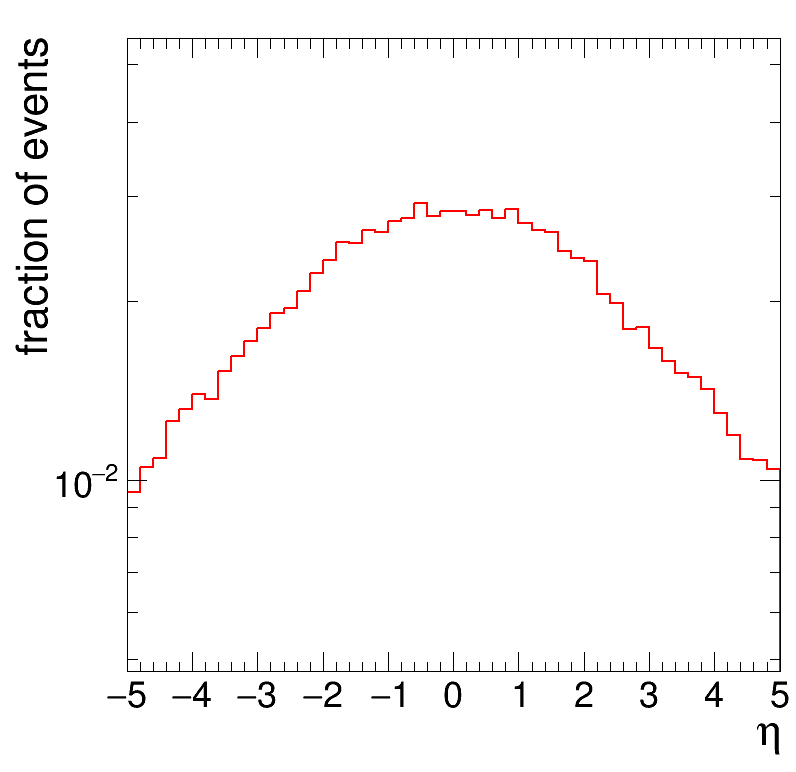

In [221]:
c = rt.TCanvas('c','c', 800, 800)
leg = rt.TLegend(0.18,0.76,0.53,0.94)
leg.SetTextSize(0.022)
leg.SetEntrySeparation(0.01)
gr_1j = {}
gr_2j = {}

i = 0

print('i,j,n,s,m,a')

for k,v in tree.items(): 
    print(k,v)
    
    pho_eta = v['gParticleMotherEta'].array()
    pho_id = v['gParticleId'].array()
    pho_mo_id = v['gParticleMotherId'].array()
    
    pho_eta = pho_eta[pho_id==22, pho_mo_id==111]
    
#     eta = pho_eta[:,0]
    eta = pho_eta.flatten()
    
    ht0 = create_TH1D( eta, axis_title=['#eta', 'fraction of events'], name="", binning=[50,-5,5])
    ht0.SetLineColor(std_color_list[i+1])
    ht0.SetMarkerColor(std_color_list[i+1])
    
    ht0.DrawNormalized('')
 
    i += 1

# leg.Draw()

c.SetLogy()
c.Update()
c.Draw()
c.SaveAs(out_dir+'pho_mo_eta.png')


i,j,n,s,m,a
analyzer-dyll-4FEVT-cluster1000.root <TTree b'ecalTPTree' at 0x7f4e7770c240>


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190807/pho_mo_phi.png has been created


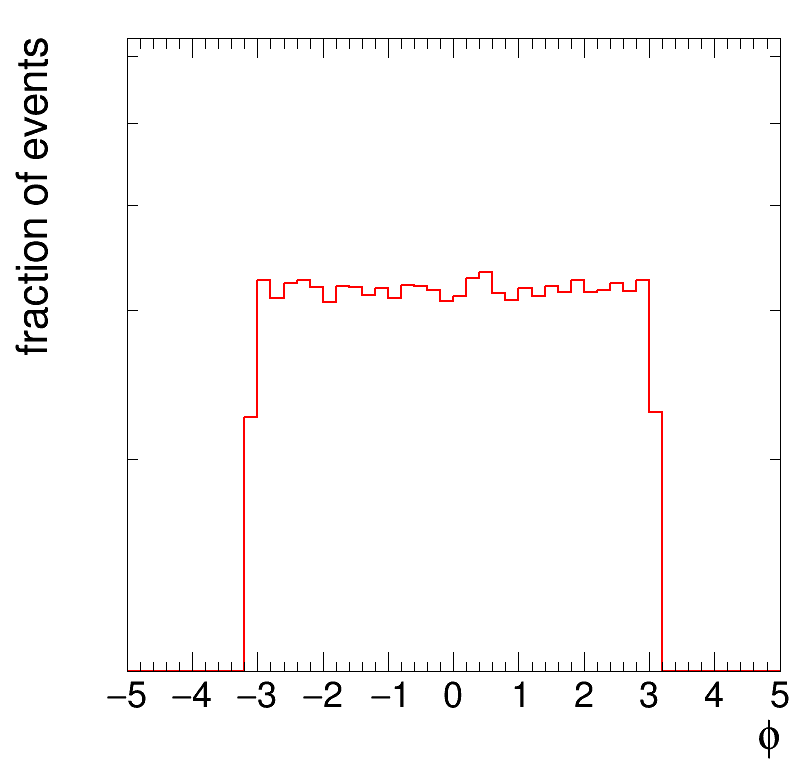

In [222]:
c = rt.TCanvas('c','c', 800, 800)
leg = rt.TLegend(0.18,0.76,0.53,0.94)
leg.SetTextSize(0.022)
leg.SetEntrySeparation(0.01)
gr_1j = {}
gr_2j = {}

i = 0

print('i,j,n,s,m,a')

for k,v in tree.items(): 
    print(k,v)
    
    pho_phi = v['gParticleMotherPhi'].array()
    pho_id = v['gParticleId'].array()
    pho_mo_id = v['gParticleMotherId'].array()
    
    pho_phi = pho_phi[pho_id==22, pho_mo_id==111]
    
#     phi = pho_phi[:,0]
    phi = pho_phi.flatten()
    
    ht0 = create_TH1D( phi, axis_title=['#phi', 'fraction of events'], name="", binning=[50,-5,5])
    ht0.SetLineColor(std_color_list[i+1])
    ht0.SetMarkerColor(std_color_list[i+1])
    
    ht0.DrawNormalized('')
 
    i += 1

# leg.Draw()

c.SetLogy()
c.Update()
c.Draw()
c.SaveAs(out_dir+'pho_mo_phi.png')


i,j,n,s,m,a
analyzer-dyll-4FEVT-cluster1000.root <TTree b'ecalTPTree' at 0x7f4e7770c240>


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190807/pho_mo_e.png has been created


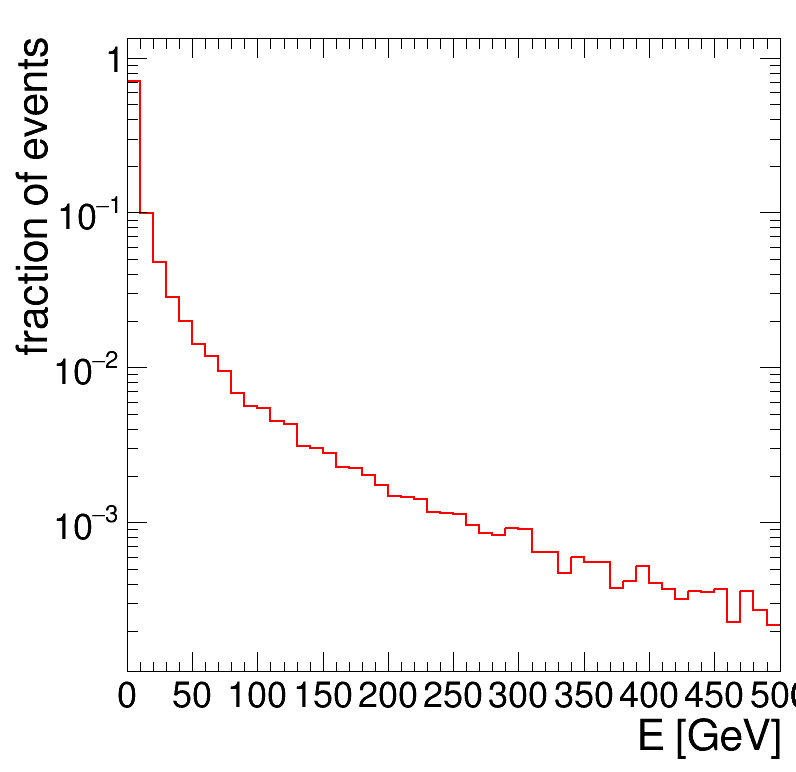

In [223]:
c = rt.TCanvas('c','c', 800, 800)
leg = rt.TLegend(0.18,0.76,0.53,0.94)
leg.SetTextSize(0.022)
leg.SetEntrySeparation(0.01)
gr_1j = {}
gr_2j = {}

i = 0

print('i,j,n,s,m,a')

for k,v in tree.items(): 
    print(k,v)
    
    pho_e = v['gParticleMotherE'].array()
    pho_id = v['gParticleId'].array()
    pho_mo_id = v['gParticleMotherId'].array()
    
    pho_e = pho_e[pho_id==22, pho_mo_id==111]
    
#     e = pho_e[:,0]
    e = pho_e.flatten()
    
    ht0 = create_TH1D( e, axis_title=['E [GeV]', 'fraction of events'], name="", binning=[50,-0,500])
    ht0.SetLineColor(std_color_list[i+1])
    ht0.SetMarkerColor(std_color_list[i+1])
    
    ht0.DrawNormalized('')
 
    i += 1

# leg.Draw()

c.SetLogy()
c.Update()
c.Draw()
c.SaveAs(out_dir+'pho_mo_e.png')


i,j,n,s,m,a
analyzer-dyll-4FEVT-cluster1000.root <TTree b'ecalTPTree' at 0x7f4e7770c240>


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190807/pho_mo_pt.png has been created


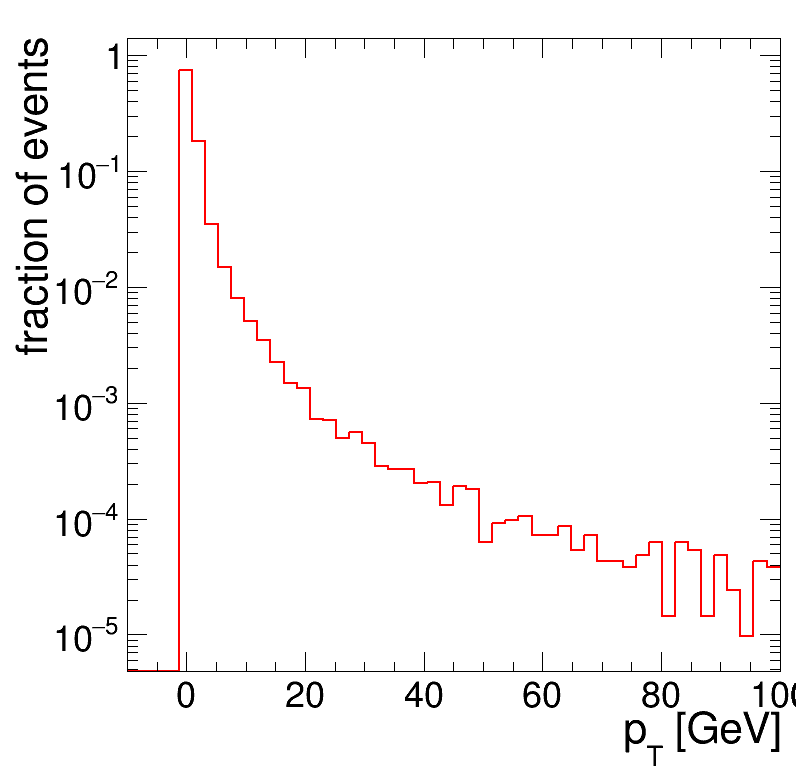

In [224]:
c = rt.TCanvas('c','c', 800, 800)
leg = rt.TLegend(0.18,0.76,0.53,0.94)
leg.SetTextSize(0.022)
leg.SetEntrySeparation(0.01)
gr_1j = {}
gr_2j = {}

i = 0

print('i,j,n,s,m,a')

for k,v in tree.items(): 
    print(k,v)
    
    pho_pt = v['gParticleMotherPt'].array()
    pho_id = v['gParticleId'].array()
    pho_mo_id = v['gParticleMotherId'].array()
    
    pho_pt = pho_pt[pho_id==22, pho_mo_id==111]
    
#     e = pho_e[:,0]
    pt = pho_pt.flatten()
    
    ht0 = create_TH1D( pt, axis_title=['p_{T} [GeV]', 'fraction of events'], name="", binning=[50,-10,100])
    ht0.SetLineColor(std_color_list[i+1])
    ht0.SetMarkerColor(std_color_list[i+1])
    
    ht0.DrawNormalized('')
 
    i += 1

# leg.Draw()

c.SetLogy()
c.Update()
c.Draw()
c.SaveAs(out_dir+'pho_mo_pt.png')


i,j,n,s,m,a
analyzer-dyll-4FEVT-cluster1000.root <TTree b'ecalTPTree' at 0x7f4e7770c240>


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190807/pho_mo_px.png has been created


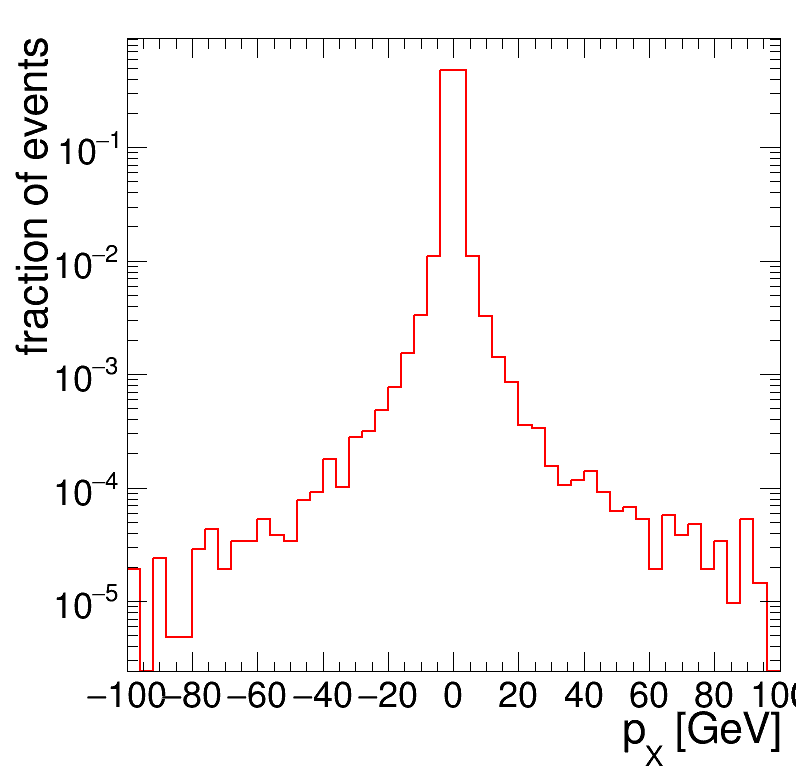

In [225]:
c = rt.TCanvas('c','c', 800, 800)
leg = rt.TLegend(0.18,0.76,0.53,0.94)
leg.SetTextSize(0.022)
leg.SetEntrySeparation(0.01)
gr_1j = {}
gr_2j = {}

i = 0

print('i,j,n,s,m,a')

for k,v in tree.items(): 
    print(k,v)
    
    pho_px = v['gParticleMotherPx'].array()
    pho_id = v['gParticleId'].array()
    pho_mo_id = v['gParticleMotherId'].array()
    
    pho_px = pho_px[pho_id==22, pho_mo_id==111]
    
#     e = pho_e[:,0]
    px = pho_px.flatten()
    
    ht0 = create_TH1D( px, axis_title=['p_{X} [GeV]', 'fraction of events'], name="", binning=[50,-100,100])
    ht0.SetLineColor(std_color_list[i+1])
    ht0.SetMarkerColor(std_color_list[i+1])
    
    ht0.DrawNormalized('')
 
    i += 1

# leg.Draw()

c.SetLogy()
c.Update()
c.Draw()
c.SaveAs(out_dir+'pho_mo_px.png')


i,j,n,s,m,a
analyzer-dyll-4FEVT-cluster1000.root <TTree b'ecalTPTree' at 0x7f4e7770c240>


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190807/pho_mo_py.png has been created


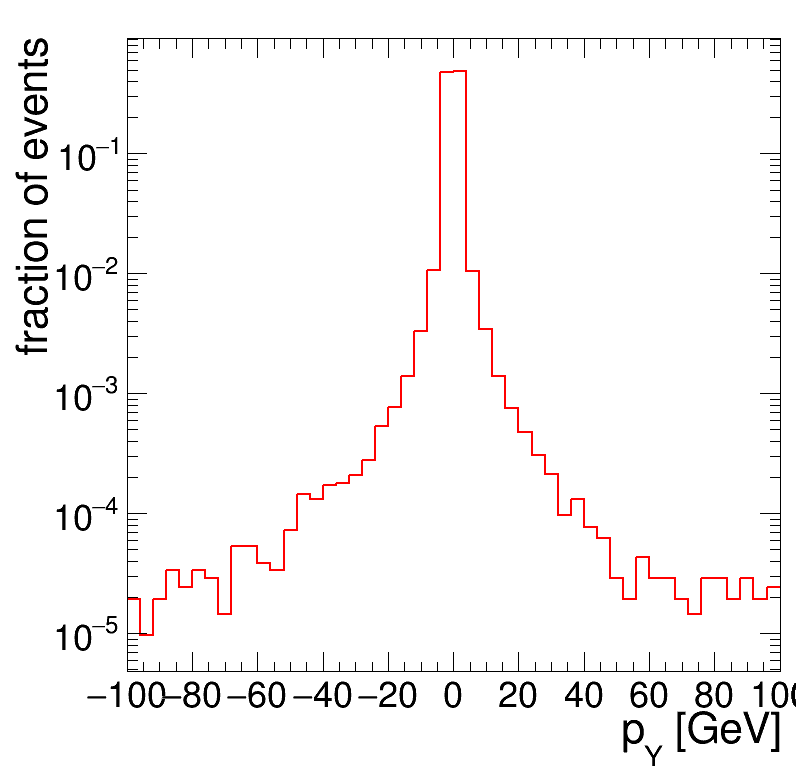

In [226]:
c = rt.TCanvas('c','c', 800, 800)
leg = rt.TLegend(0.18,0.76,0.53,0.94)
leg.SetTextSize(0.022)
leg.SetEntrySeparation(0.01)
gr_1j = {}
gr_2j = {}

i = 0

print('i,j,n,s,m,a')

for k,v in tree.items(): 
    print(k,v)
    
    pho_py = v['gParticleMotherPy'].array()
    pho_id = v['gParticleId'].array()
    pho_mo_id = v['gParticleMotherId'].array()
    
    pho_py = pho_py[pho_id==22, pho_mo_id==111]
    
#     e = pho_e[:,0]
    py = pho_py.flatten()
    
    ht0 = create_TH1D( py, axis_title=['p_{Y} [GeV]', 'fraction of events'], name="", binning=[50,-100,100])
    ht0.SetLineColor(std_color_list[i+1])
    ht0.SetMarkerColor(std_color_list[i+1])
    
    ht0.DrawNormalized('')
 
    i += 1

# leg.Draw()

c.SetLogy()
c.Update()
c.Draw()
c.SaveAs(out_dir+'pho_mo_py.png')


i,j,n,s,m,a
analyzer-dyll-4FEVT-cluster1000.root <TTree b'ecalTPTree' at 0x7f4e7770c240>


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190807/pho_mo_pz.png has been created


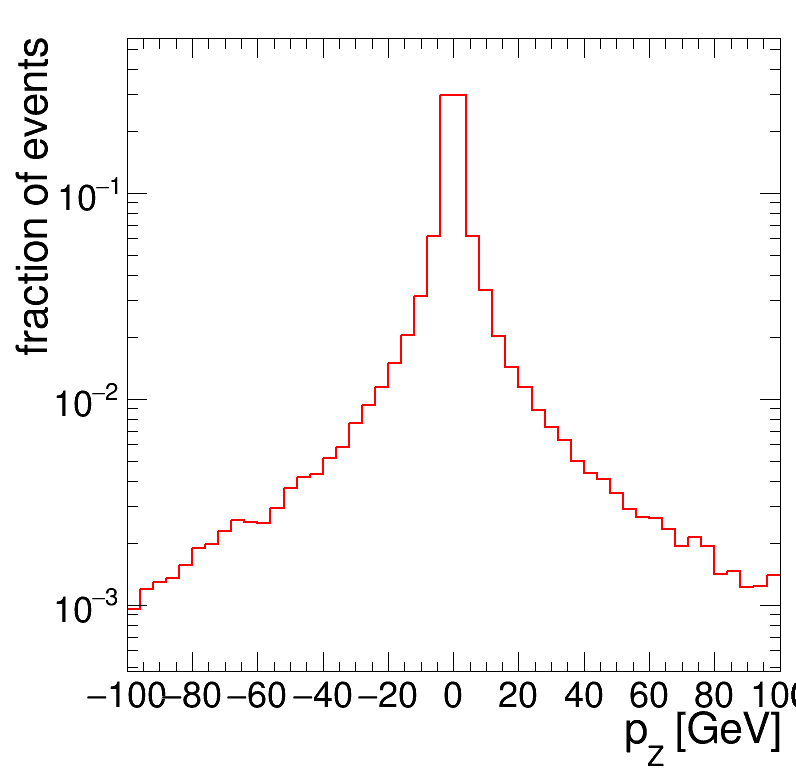

In [227]:
c = rt.TCanvas('c','c', 800, 800)
leg = rt.TLegend(0.18,0.76,0.53,0.94)
leg.SetTextSize(0.022)
leg.SetEntrySeparation(0.01)
gr_1j = {}
gr_2j = {}

i = 0

print('i,j,n,s,m,a')

for k,v in tree.items(): 
    print(k,v)
    
    pho_pz = v['gParticleMotherPz'].array()
    pho_id = v['gParticleId'].array()
    pho_mo_id = v['gParticleMotherId'].array()
    
    pho_pz = pho_pz[pho_id==22, pho_mo_id==111]
    
#     e = pho_e[:,0]
    pz = pho_pz.flatten()
    
    ht0 = create_TH1D( pz, axis_title=['p_{Z} [GeV]', 'fraction of events'], name="", binning=[50,-100,100])
    ht0.SetLineColor(std_color_list[i+1])
    ht0.SetMarkerColor(std_color_list[i+1])
    
    ht0.DrawNormalized('')
    
    i += 1

# leg.Draw()

c.SetLogy()
c.Update()
c.Draw()
c.SaveAs(out_dir+'pho_mo_pz.png')


i,j,n,s,m,a
analyzer-dyll-4FEVT-cluster1000.root <TTree b'ecalTPTree' at 0x7f4e7770c240>


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190807/pho_mo_pz.png has been created


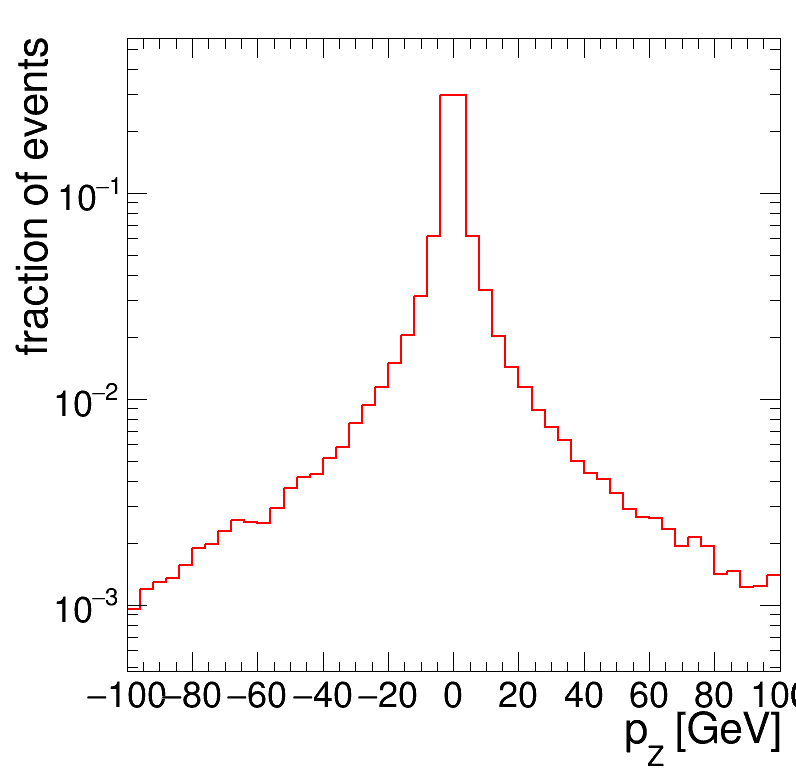

In [228]:
c = rt.TCanvas('c','c', 800, 800)
leg = rt.TLegend(0.18,0.76,0.53,0.94)
leg.SetTextSize(0.022)
leg.SetEntrySeparation(0.01)
gr_1j = {}
gr_2j = {}

i = 0

print('i,j,n,s,m,a')

for k,v in tree.items(): 
    print(k,v)
    
    pho_pz = v['gParticleMotherPz'].array()
    pho_id = v['gParticleId'].array()
    pho_mo_id = v['gParticleMotherId'].array()
    
    pho_pz = pho_pz[pho_id==22, pho_mo_id==111]
    
#     e = pho_e[:,0]
    pz = pho_pz.flatten()
    
    ht0 = create_TH1D( pz, axis_title=['p_{Z} [GeV]', 'fraction of events'], name="", binning=[50,-100,100])
    ht0.SetLineColor(std_color_list[i+1])
    ht0.SetMarkerColor(std_color_list[i+1])
    
    ht0.DrawNormalized('')
 
    i += 1

# leg.Draw()

c.SetLogy()
c.Update()
c.Draw()
c.SaveAs(out_dir+'pho_mo_pz.png')


# Photon Mother Relation

i,j,n,s,m,a
analyzer-dyll-4FEVT-cluster1000.root <TTree b'ecalTPTree' at 0x7f4e7770c240>


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TROOT::Append>: Replacing existing TH1: analyzer-dyll-4FEVT-cluster1000.root (Potential memory leak).
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190807/pho_mo_eta_2d.png has been created


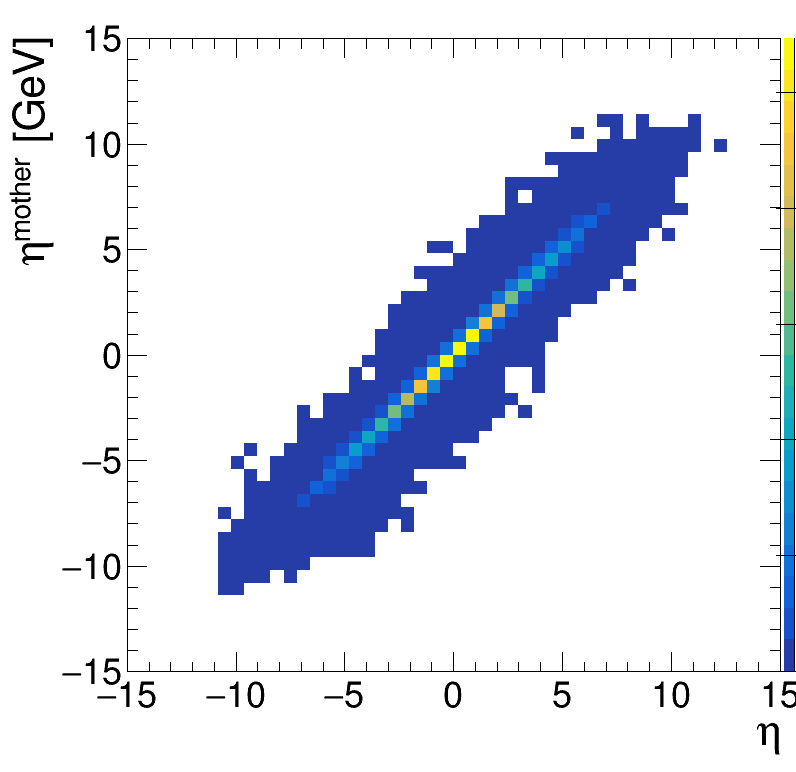

In [229]:
c = rt.TCanvas('c','c', 800, 800)
leg = rt.TLegend(0.18,0.76,0.53,0.94)
leg.SetTextSize(0.022)
leg.SetEntrySeparation(0.01)
gr_1j = {}
gr_2j = {}

i = 0

print('i,j,n,s,m,a')

for k,v in tree.items(): 
    print(k,v)
    
    pho_pz = v['gParticleEta'].array()
    pho_id = v['gParticleId'].array()
    
    pho_bro_pz = v['gParticleMotherEta'].array()  
    pho_mo_id = v['gParticleMotherId'].array()
    
    pho_string = np.logical_and(pho_id==22, pho_mo_id==111)
#     pho_bro_string = np.logical_and(pho_bro_id==22, pho_mo_id==111)
    
    pho_pz1 = pho_pz[pho_string]
    pho_bro_pz1 = pho_bro_pz[pho_string]
    
#     e = pho_e[:,0]
#     bro_pz = pho_bro_pz1[:,0]
#     pz = pho_pz1[:,0]
    pz = pho_pz1.flatten()
    bro_pz = pho_bro_pz1.flatten()
    sample = [pz,bro_pz]
    
#     ht0 = create_TH2D((sample, name='', title=None, binning=[50,-100,100,50,-100,100] )
# #                       #axis_title = ['p_{Z} [GeV]','p_{Z}^{sibling} [GeV]','']
    ht0.SetLineColor(std_color_list[i+1])
    ht0.SetMarkerColor(std_color_list[i+1])
                      
    hz = rt.TH2D(k,k,50,-15,15,50,-15,15)
    hz.GetXaxis().SetTitle('#eta')
    hz.GetYaxis().SetTitle('#eta^{mother} [GeV]')
#     hz.GetYaxis().SetRangeUser(0,1e+6)
#     hz[k].SetMarkerColor(std_color_list[i])
        

    for evt,(pz1,pz2) in enumerate(zip(pz,bro_pz)):
        hz.Fill(pz1,pz2)
    
    hz.Draw('colz')
 
    i += 1

# leg.Draw()

# c.SetLogy()
c.Update()
c.Draw()
c.SaveAs(out_dir+'pho_mo_eta_2d.png')


i,j,n,s,m,a
analyzer-dyll-4FEVT-cluster1000.root <TTree b'ecalTPTree' at 0x7f4e7770c240>


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TROOT::Append>: Replacing existing TH1: analyzer-dyll-4FEVT-cluster1000.root (Potential memory leak).
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190807/pho_mo_phi_2d.png has been created


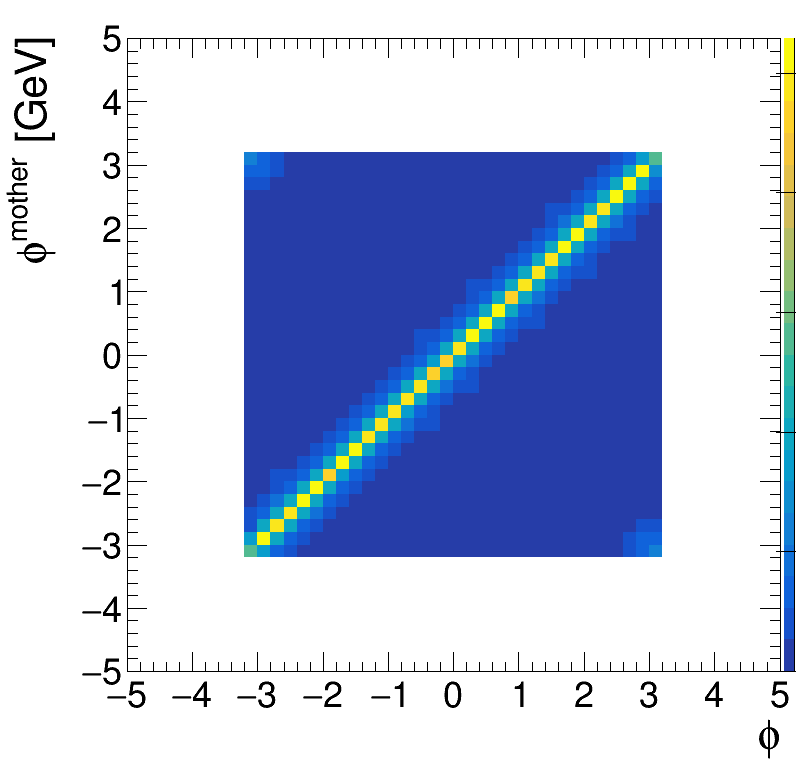

In [230]:
c = rt.TCanvas('c','c', 800, 800)
leg = rt.TLegend(0.18,0.76,0.53,0.94)
leg.SetTextSize(0.022)
leg.SetEntrySeparation(0.01)
gr_1j = {}
gr_2j = {}

i = 0

print('i,j,n,s,m,a')

for k,v in tree.items(): 
    print(k,v)
    
    pho_pz = v['gParticlePhi'].array()
    pho_id = v['gParticleId'].array()
    
    pho_bro_pz = v['gParticleMotherPhi'].array()
    pho_bro_id = v['gParticleSiblingId'].array()
  
    pho_mo_id = v['gParticleMotherId'].array()
    
    pho_string = np.logical_and(pho_id==22, pho_mo_id==111)
    pho_bro_string = np.logical_and(pho_bro_id==22, pho_mo_id==111)
    
    pho_pz1 = pho_pz[np.logical_and(pho_string, pho_bro_string)]
    pho_bro_pz1 = pho_bro_pz[np.logical_and(pho_string, pho_bro_string)]
    
#     e = pho_e[:,0]
#     bro_pz = pho_bro_pz1[:,0]
#     pz = pho_pz1[:,0]
    pz = pho_pz1.flatten()
    bro_pz = pho_bro_pz1.flatten()
    sample = [pz,bro_pz]
    
#     ht0 = create_TH2D((sample, name='', title=None, binning=[50,-100,100,50,-100,100] )
# #                       #axis_title = ['p_{Z} [GeV]','p_{Z}^{sibling} [GeV]','']
    ht0.SetLineColor(std_color_list[i+1])
    ht0.SetMarkerColor(std_color_list[i+1])
                      
    hz = rt.TH2D(k,k,50,-5,5,50,-5,5)
    hz.GetXaxis().SetTitle('#phi')
    hz.GetYaxis().SetTitle('#phi^{mother} [GeV]')
#     hz.GetYaxis().SetRangeUser(0,1e+6)
#     hz[k].SetMarkerColor(std_color_list[i])
        

    for evt,(pz1,pz2) in enumerate(zip(pz,bro_pz)):
        hz.Fill(pz1,pz2)
    
    hz.Draw('colz')
 
    i += 1

# leg.Draw()

# c.SetLogy()
c.Update()
c.Draw()
c.SaveAs(out_dir+'pho_mo_phi_2d.png')


i,j,n,s,m,a
analyzer-dyll-4FEVT-cluster1000.root <TTree b'ecalTPTree' at 0x7f4e7770c240>


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190807/pho_mo_dr.png has been created


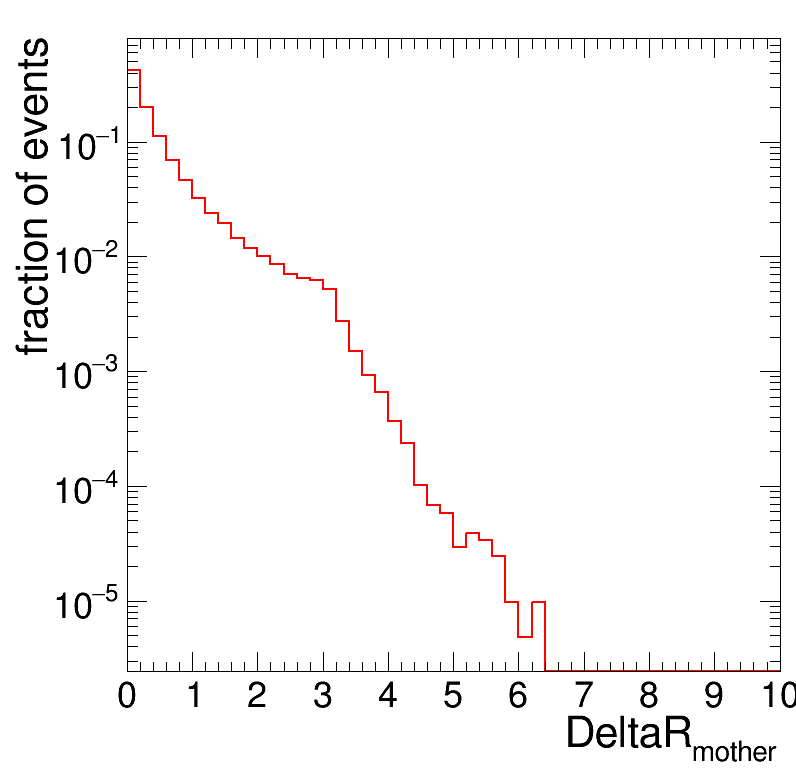

In [231]:
c = rt.TCanvas('c','c', 800, 800)
leg = rt.TLegend(0.18,0.76,0.53,0.94)
leg.SetTextSize(0.022)
leg.SetEntrySeparation(0.01)
gr_1j = {}
gr_2j = {}

i = 0

print('i,j,n,s,m,a')

for k,v in tree.items(): 
    print(k,v)
    
    pho_pz = v['gParticleMotherDR'].array()
    pho_id = v['gParticleSiblingId'].array()
    pho_mo_id = v['gParticleMotherId'].array()
    
    pho_pz = pho_pz[pho_id==22, pho_mo_id==111]
    
#     e = pho_e[:,0]
    pz = pho_pz.flatten()
    
    ht0 = create_TH1D( pz, axis_title=['DeltaR_{mother}', 'fraction of events'], name="", binning=[50,-0,10])
    ht0.SetLineColor(std_color_list[i+1])
    ht0.SetMarkerColor(std_color_list[i+1])
    
    ht0.DrawNormalized('')
 
    i += 1

# leg.Draw()

c.SetLogy()
c.Update()
c.Draw()
c.SaveAs(out_dir+'pho_mo_dr.png')


i,j,n,s,m,a
analyzer-dyll-4FEVT-cluster1000.root <TTree b'ecalTPTree' at 0x7f4e7770c240>


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TROOT::Append>: Replacing existing TH1: analyzer-dyll-4FEVT-cluster1000.root (Potential memory leak).
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190807/pho_mo_e_2d.png has been created


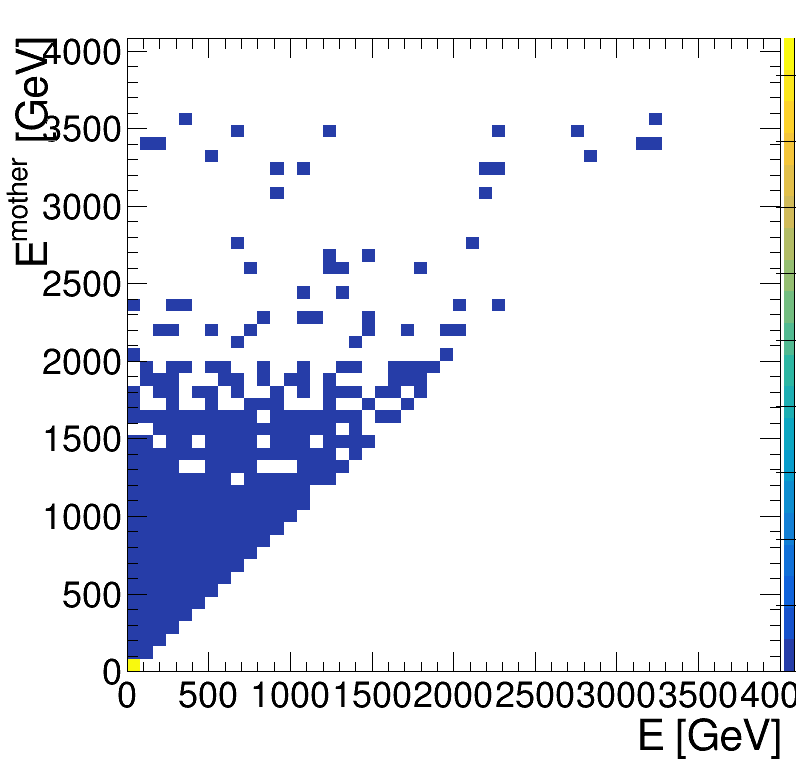

In [232]:
c = rt.TCanvas('c','c', 800, 800)
leg = rt.TLegend(0.18,0.76,0.53,0.94)
leg.SetTextSize(0.022)
leg.SetEntrySeparation(0.01)
gr_1j = {}
gr_2j = {}

i = 0

print('i,j,n,s,m,a')

for k,v in tree.items(): 
    print(k,v)
    
    pho_pz = v['gParticleE'].array()
    pho_id = v['gParticleId'].array()
    
    pho_bro_pz = v['gParticleMotherE'].array()
    pho_bro_id = v['gParticleSiblingId'].array()
  
    pho_mo_id = v['gParticleMotherId'].array()
    
    pho_string = np.logical_and(pho_id==22, pho_mo_id==111)
    pho_bro_string = np.logical_and(pho_bro_id==22, pho_mo_id==111)
    
    pho_pz1 = pho_pz[np.logical_and(pho_string, pho_bro_string)]
    pho_bro_pz1 = pho_bro_pz[np.logical_and(pho_string, pho_bro_string)]
    
#     e = pho_e[:,0]
#     bro_pz = pho_bro_pz1[:,0]
#     pz = pho_pz1[:,0]
    pz = pho_pz1.flatten()
    bro_pz = pho_bro_pz1.flatten()
    sample = [pz,bro_pz]
    
#     ht0 = create_TH2D((sample, name='', title=None, binning=[50,-100,100,50,-100,100] )
# #                       #axis_title = ['p_{Z} [GeV]','p_{Z}^{sibling} [GeV]','']
    ht0.SetLineColor(std_color_list[i+1])
    ht0.SetMarkerColor(std_color_list[i+1])
                      
    hz = rt.TH2D(k,k,50,0,4000,50,-0,4000)
    hz.GetXaxis().SetTitle('E [GeV]')
    hz.GetYaxis().SetTitle('E^{mother} [GeV]')
    hz.GetYaxis().SetRangeUser(0,1e+6)
#     hz[k].SetMarkerColor(std_color_list[i])
        

    for evt,(pz1,pz2) in enumerate(zip(pz,bro_pz)):
        hz.Fill(pz1,pz2)
    
    hz.Draw('colz')
 
    i += 1

# leg.Draw()

# c.SetLogy()
c.Update()
c.Draw()
c.SaveAs(out_dir+'pho_mo_e_2d.png')


i,j,n,s,m,a
analyzer-dyll-4FEVT-cluster1000.root <TTree b'ecalTPTree' at 0x7f4e7770c240>


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TROOT::Append>: Replacing existing TH1: analyzer-dyll-4FEVT-cluster1000.root (Potential memory leak).
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190807/pho_mo_pt_2d.png has been created


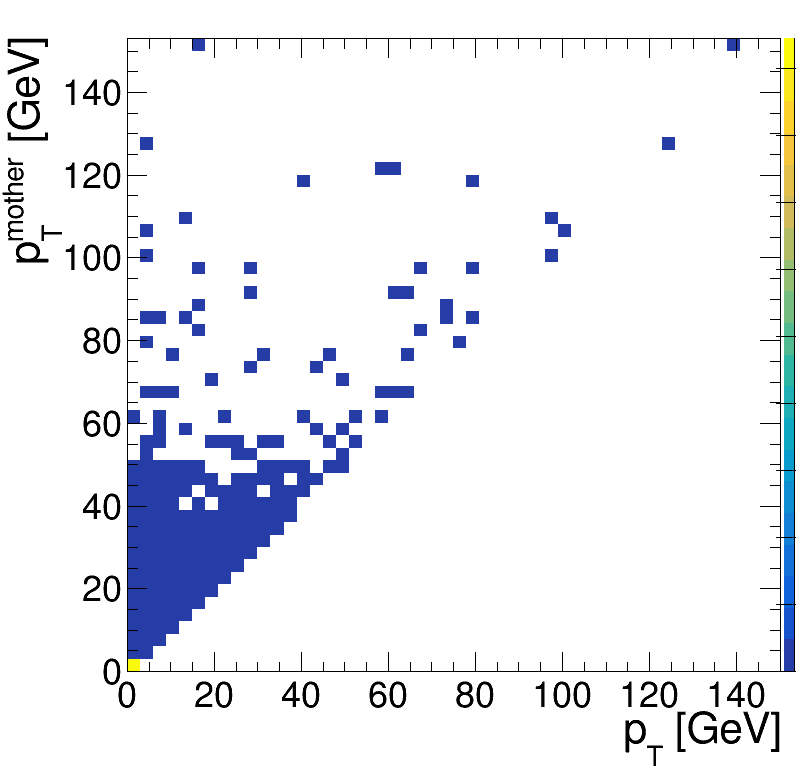

In [233]:
c = rt.TCanvas('c','c', 800, 800)
leg = rt.TLegend(0.18,0.76,0.53,0.94)
leg.SetTextSize(0.022)
leg.SetEntrySeparation(0.01)
gr_1j = {}
gr_2j = {}

i = 0

print('i,j,n,s,m,a')

for k,v in tree.items(): 
    print(k,v)
    
    pho_pz = v['gParticlePt'].array()
    pho_id = v['gParticleId'].array()
    
    pho_bro_pz = v['gParticleMotherPt'].array()
    pho_bro_id = v['gParticleSiblingId'].array()
  
    pho_mo_id = v['gParticleMotherId'].array()
    
    pho_string = np.logical_and(pho_id==22, pho_mo_id==111)
    pho_bro_string = np.logical_and(pho_bro_id==22, pho_mo_id==111)
    
    pho_pz1 = pho_pz[np.logical_and(pho_string, pho_bro_string)]
    pho_bro_pz1 = pho_bro_pz[np.logical_and(pho_string, pho_bro_string)]
    
#     e = pho_e[:,0]
#     bro_pz = pho_bro_pz1[:,0]
#     pz = pho_pz1[:,0]
    pz = pho_pz1.flatten()
    bro_pz = pho_bro_pz1.flatten()
    sample = [pz,bro_pz]
    
#     ht0 = create_TH2D((sample, name='', title=None, binning=[50,-100,100,50,-100,100] )
# #                       #axis_title = ['p_{Z} [GeV]','p_{Z}^{sibling} [GeV]','']
    ht0.SetLineColor(std_color_list[i+1])
    ht0.SetMarkerColor(std_color_list[i+1])
                      
    hz = rt.TH2D(k,k,50,0,150,50,-0,150)
    hz.GetXaxis().SetTitle('p_{T} [GeV]')
    hz.GetYaxis().SetTitle('p_{T}^{mother} [GeV]')
    hz.GetYaxis().SetRangeUser(0,1e+6)
#     hz[k].SetMarkerColor(std_color_list[i])
        

    for evt,(pz1,pz2) in enumerate(zip(pz,bro_pz)):
        hz.Fill(pz1,pz2)
    
    hz.Draw('colz')
 
    i += 1

# leg.Draw()

# c.SetLogy()
c.Update()
c.Draw()
c.SaveAs(out_dir+'pho_mo_pt_2d.png')


i,j,n,s,m,a
analyzer-dyll-4FEVT-cluster1000.root <TTree b'ecalTPTree' at 0x7f4e7770c240>


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TROOT::Append>: Replacing existing TH1: analyzer-dyll-4FEVT-cluster1000.root (Potential memory leak).
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190807/pho_mo_px_2d.png has been created


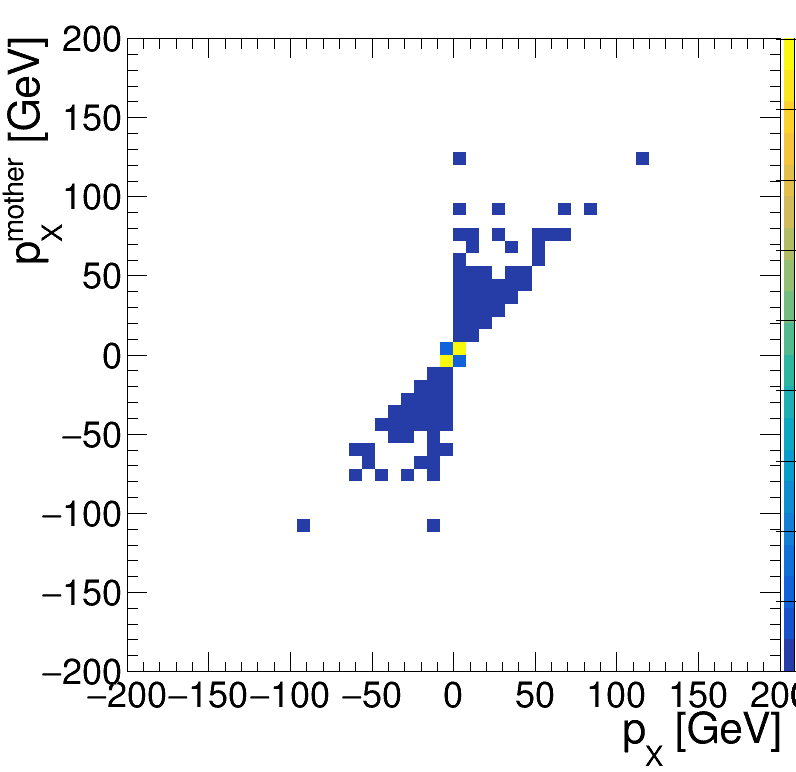

In [234]:
c = rt.TCanvas('c','c', 800, 800)
leg = rt.TLegend(0.18,0.76,0.53,0.94)
leg.SetTextSize(0.022)
leg.SetEntrySeparation(0.01)
gr_1j = {}
gr_2j = {}

i = 0

print('i,j,n,s,m,a')

for k,v in tree.items(): 
    print(k,v)
    
    pho_pz = v['gParticlePx'].array()
    pho_id = v['gParticleId'].array()
    
    pho_bro_pz = v['gParticleMotherPx'].array()
    pho_bro_id = v['gParticleSiblingId'].array()
  
    pho_mo_id = v['gParticleMotherId'].array()
    
    pho_string = np.logical_and(pho_id==22, pho_mo_id==111)
    pho_bro_string = np.logical_and(pho_bro_id==22, pho_mo_id==111)
    
    pho_pz1 = pho_pz[np.logical_and(pho_string, pho_bro_string)]
    pho_bro_pz1 = pho_bro_pz[np.logical_and(pho_string, pho_bro_string)]
    
    
    
    
#     pho_pz1 = pho_pz[pho_id==22, pho_bro_id==22, pho_mo_id==111]
#     pho_bro_pz1 = pho_pz[pho_id==22, pho_bro_id==22, pho_mo_id==111]
    
#     e = pho_e[:,0]
    pz = pho_pz1.flatten()
    bro_pz = pho_bro_pz1.flatten()
    sample = [pz,bro_pz]
    
#     ht0 = create_TH2D((sample, name='', title=None, binning=[50,-100,100,50,-100,100] )
# #                       #axis_title = ['p_{Z} [GeV]','p_{Z}^{sibling} [GeV]','']
    ht0.SetLineColor(std_color_list[i+1])
    ht0.SetMarkerColor(std_color_list[i+1])
                      
    hz = rt.TH2D(k,k,50,-200,200,50,-200,200)
    hz.GetXaxis().SetTitle('p_{X} [GeV]')
    hz.GetYaxis().SetTitle('p_{X}^{mother} [GeV]')
#     hz[k].SetMarkerColor(std_color_list[i])
        

    for evt,(pz1,pz2) in enumerate(zip(pz,bro_pz)):
        hz.Fill(pz1,pz2)
    
    hz.Draw('colz')
 
    i += 1

# leg.Draw()

# c.SetLogy()
c.Update()
c.Draw()
c.SaveAs(out_dir+'pho_mo_px_2d.png')


i,j,n,s,m,a
analyzer-dyll-4FEVT-cluster1000.root <TTree b'ecalTPTree' at 0x7f4e7770c240>


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TROOT::Append>: Replacing existing TH1: analyzer-dyll-4FEVT-cluster1000.root (Potential memory leak).
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190807/pho_mo_py_2d.png has been created


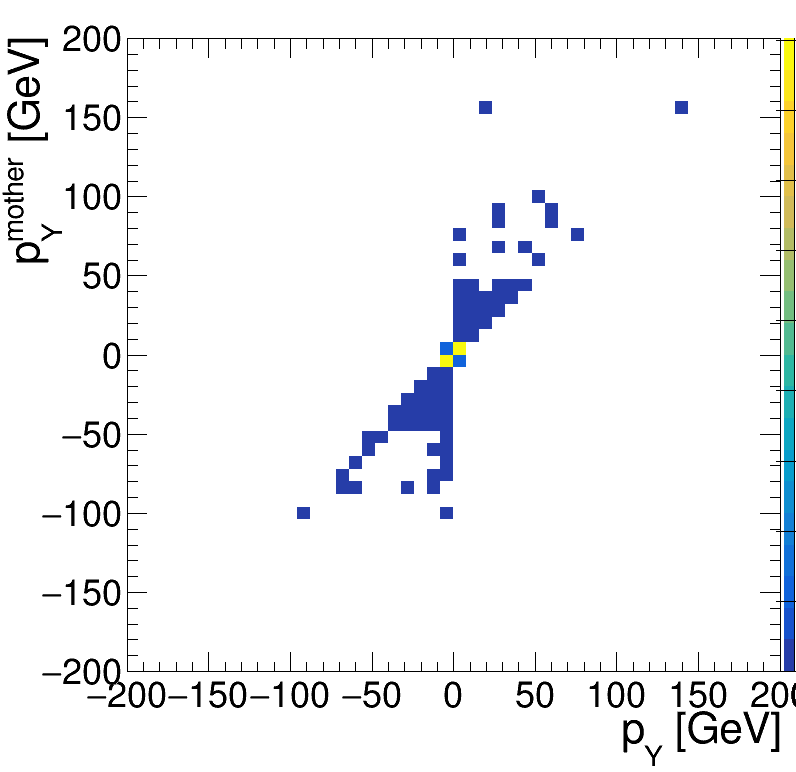

In [235]:
c = rt.TCanvas('c','c', 800, 800)
leg = rt.TLegend(0.18,0.76,0.53,0.94)
leg.SetTextSize(0.022)
leg.SetEntrySeparation(0.01)
gr_1j = {}
gr_2j = {}

i = 0

print('i,j,n,s,m,a')

for k,v in tree.items(): 
    print(k,v)
    
    pho_pz = v['gParticlePy'].array()
    pho_id = v['gParticleId'].array()
    
    pho_bro_pz = v['gParticleMotherPy'].array()
    pho_bro_id = v['gParticleSiblingId'].array()
  
    pho_mo_id = v['gParticleMotherId'].array()
    
    pho_string = np.logical_and(pho_id==22, pho_mo_id==111)
    pho_bro_string = np.logical_and(pho_bro_id==22, pho_mo_id==111)
    
    pho_pz1 = pho_pz[np.logical_and(pho_string, pho_bro_string)]
    pho_bro_pz1 = pho_bro_pz[np.logical_and(pho_string, pho_bro_string)]
    
    
    
    
#     pho_pz1 = pho_pz[pho_id==22, pho_bro_id==22, pho_mo_id==111]
#     pho_bro_pz1 = pho_pz[pho_id==22, pho_bro_id==22, pho_mo_id==111]
    
#     e = pho_e[:,0]
    pz = pho_pz1.flatten()
    bro_pz = pho_bro_pz1.flatten()
    sample = [pz,bro_pz]
    
#     ht0 = create_TH2D((sample, name='', title=None, binning=[50,-100,100,50,-100,100] )
# #                       #axis_title = ['p_{Z} [GeV]','p_{Z}^{sibling} [GeV]','']
    ht0.SetLineColor(std_color_list[i+1])
    ht0.SetMarkerColor(std_color_list[i+1])
                      
    hz = rt.TH2D(k,k,50,-200,200,50,-200,200)
    hz.GetXaxis().SetTitle('p_{Y} [GeV]')
    hz.GetYaxis().SetTitle('p_{Y}^{mother} [GeV]')
#     hz[k].SetMarkerColor(std_color_list[i])
        

    for evt,(pz1,pz2) in enumerate(zip(pz,bro_pz)):
        hz.Fill(pz1,pz2)
    
    hz.Draw('colz')
 
    i += 1

# leg.Draw()

# c.SetLogy()
c.Update()
c.Draw()
c.SaveAs(out_dir+'pho_mo_py_2d.png')


i,j,n,s,m,a
analyzer-dyll-4FEVT-cluster1000.root <TTree b'ecalTPTree' at 0x7f4e7770c240>


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TROOT::Append>: Replacing existing TH1: analyzer-dyll-4FEVT-cluster1000.root (Potential memory leak).
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190807/pho_mo_pz_2d.png has been created


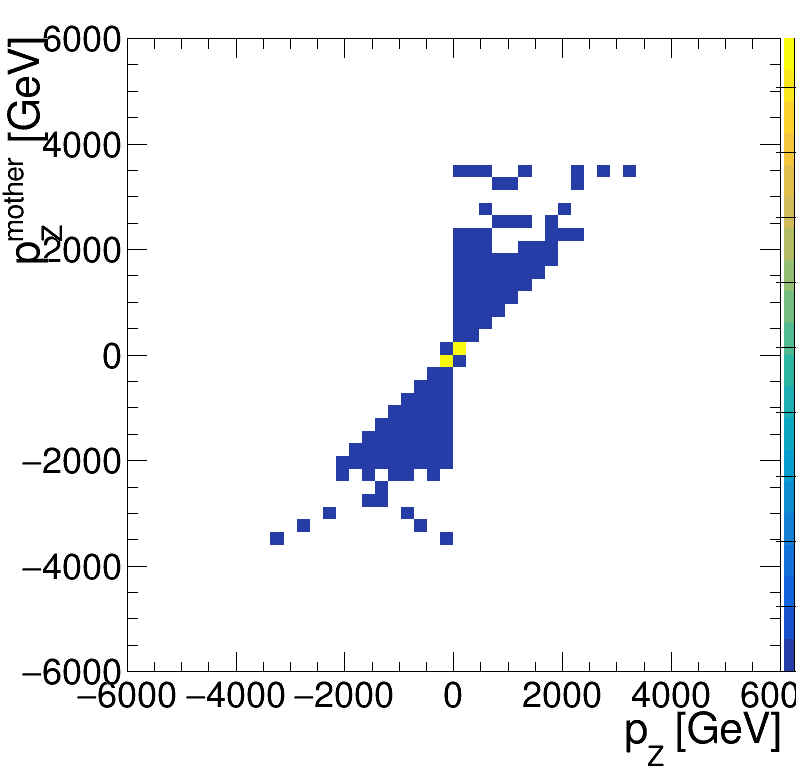

In [236]:
c = rt.TCanvas('c','c', 800, 800)
leg = rt.TLegend(0.18,0.76,0.53,0.94)
leg.SetTextSize(0.022)
leg.SetEntrySeparation(0.01)
gr_1j = {}
gr_2j = {}

i = 0

print('i,j,n,s,m,a')

for k,v in tree.items(): 
    print(k,v)
    
    pho_pz = v['gParticlePz'].array()
    pho_id = v['gParticleId'].array()
    
    pho_bro_pz = v['gParticleMotherPz'].array()
    pho_bro_id = v['gParticleSiblingId'].array()
  
    pho_mo_id = v['gParticleMotherId'].array()
    
    pho_string = np.logical_and(pho_id==22, pho_mo_id==111)
    pho_bro_string = np.logical_and(pho_bro_id==22, pho_mo_id==111)
    
    pho_pz1 = pho_pz[np.logical_and(pho_string, pho_bro_string)]
    pho_bro_pz1 = pho_bro_pz[np.logical_and(pho_string, pho_bro_string)]
    
    
    
    
#     pho_pz1 = pho_pz[pho_id==22, pho_bro_id==22, pho_mo_id==111]
#     pho_bro_pz1 = pho_pz[pho_id==22, pho_bro_id==22, pho_mo_id==111]
    
#     e = pho_e[:,0]
    pz = pho_pz1.flatten()
    bro_pz = pho_bro_pz1.flatten()
    sample = [pz,bro_pz]
    
#     ht0 = create_TH2D((sample, name='', title=None, binning=[50,-100,100,50,-100,100] )
# #                       #axis_title = ['p_{Z} [GeV]','p_{Z}^{sibling} [GeV]','']
    ht0.SetLineColor(std_color_list[i+1])
    ht0.SetMarkerColor(std_color_list[i+1])
                      
    hz = rt.TH2D(k,k,50,-6000,6000,50,-6000,6000)
    hz.GetXaxis().SetTitle('p_{Z} [GeV]')
    hz.GetYaxis().SetTitle('p_{Z}^{mother} [GeV]')
#     hz[k].SetMarkerColor(std_color_list[i])
        

    for evt,(pz1,pz2) in enumerate(zip(pz,bro_pz)):
        hz.Fill(pz1,pz2)
    
    hz.Draw('colz')
 
    i += 1

# leg.Draw()

# c.SetLogy()
c.Update()
c.Draw()
c.SaveAs(out_dir+'pho_mo_pz_2d.png')


# Photon Grand Mother Variables

i,j,n,s,m,a
analyzer-dyll-4FEVT-cluster1000.root <TTree b'ecalTPTree' at 0x7f4e7770c240>


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190807/pho_grandmo_eta.png has been created


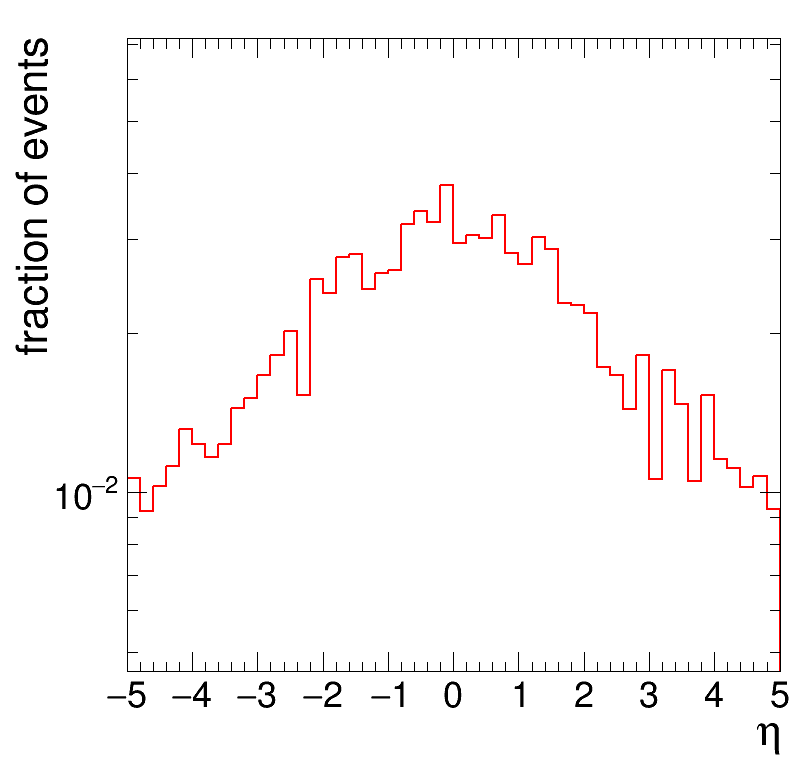

In [237]:
c = rt.TCanvas('c','c', 800, 800)
leg = rt.TLegend(0.18,0.76,0.53,0.94)
leg.SetTextSize(0.022)
leg.SetEntrySeparation(0.01)
gr_1j = {}
gr_2j = {}

i = 0

print('i,j,n,s,m,a')

for k,v in tree.items(): 
    print(k,v)
    
    pho_eta = v['gParticleGrandMotherEta'].array()
    pho_id = v['gParticleId'].array()
    pho_mo_id = v['gParticleMotherId'].array()
    
    pho_eta = pho_eta[pho_id==22, pho_mo_id==111]
    
#     eta = pho_eta[:,0]
    eta = pho_eta.flatten()
    
    ht0 = create_TH1D( eta, axis_title=['#eta', 'fraction of events'], name="", binning=[50,-5,5])
    ht0.SetLineColor(std_color_list[i+1])
    ht0.SetMarkerColor(std_color_list[i+1])
    
    ht0.DrawNormalized('')
 
    i += 1

# leg.Draw()

c.SetLogy()
c.Update()
c.Draw()
c.SaveAs(out_dir+'pho_grandmo_eta.png')


i,j,n,s,m,a
analyzer-dyll-4FEVT-cluster1000.root <TTree b'ecalTPTree' at 0x7f4e7770c240>


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190807/pho_grandmo_phi.png has been created


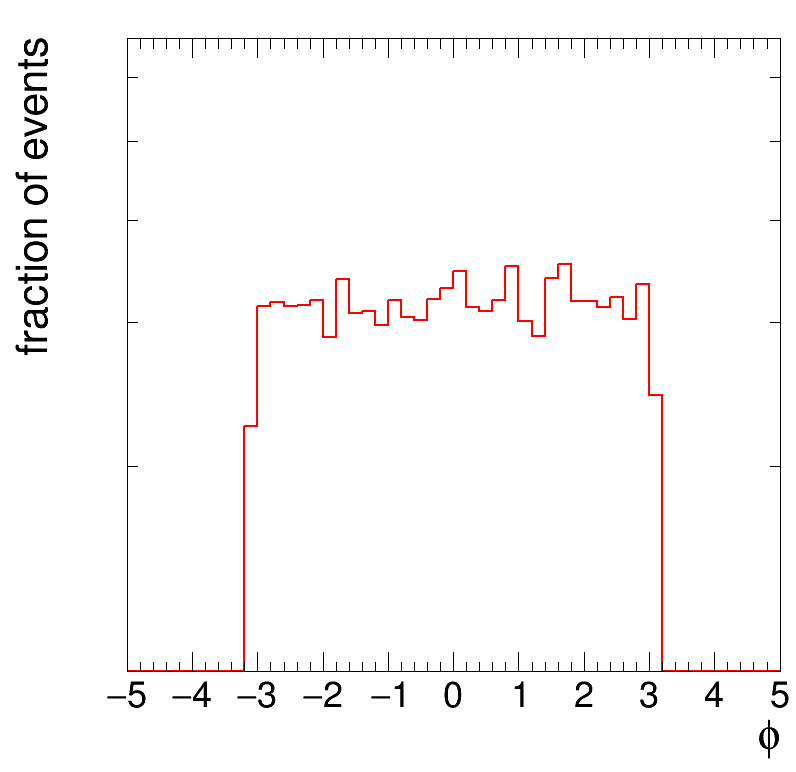

In [238]:
c = rt.TCanvas('c','c', 800, 800)
leg = rt.TLegend(0.18,0.76,0.53,0.94)
leg.SetTextSize(0.022)
leg.SetEntrySeparation(0.01)
gr_1j = {}
gr_2j = {}

i = 0

print('i,j,n,s,m,a')

for k,v in tree.items(): 
    print(k,v)
    
    pho_phi = v['gParticleGrandMotherPhi'].array()
    pho_id = v['gParticleId'].array()
    pho_mo_id = v['gParticleMotherId'].array()
    
    pho_phi = pho_phi[pho_id==22, pho_mo_id==111]
    
#     phi = pho_phi[:,0]
    phi = pho_phi.flatten()
    
    ht0 = create_TH1D( phi, axis_title=['#phi', 'fraction of events'], name="", binning=[50,-5,5])
    ht0.SetLineColor(std_color_list[i+1])
    ht0.SetMarkerColor(std_color_list[i+1])
    
    ht0.DrawNormalized('')
 
    i += 1

# leg.Draw()

c.SetLogy()
c.Update()
c.Draw()
c.SaveAs(out_dir+'pho_grandmo_phi.png')


i,j,n,s,m,a
analyzer-dyll-4FEVT-cluster1000.root <TTree b'ecalTPTree' at 0x7f4e7770c240>


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190807/pho_grandmo_e.png has been created


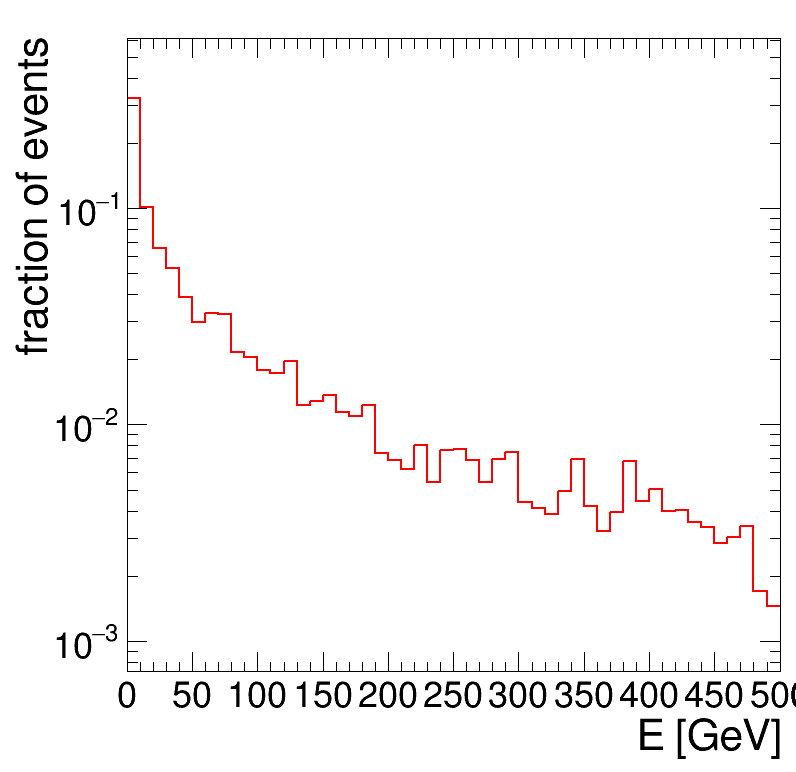

In [239]:
c = rt.TCanvas('c','c', 800, 800)
leg = rt.TLegend(0.18,0.76,0.53,0.94)
leg.SetTextSize(0.022)
leg.SetEntrySeparation(0.01)
gr_1j = {}
gr_2j = {}

i = 0

print('i,j,n,s,m,a')

for k,v in tree.items(): 
    print(k,v)
    
    pho_e = v['gParticleGrandMotherE'].array()
    pho_id = v['gParticleId'].array()
    pho_mo_id = v['gParticleMotherId'].array()
    
    pho_e = pho_e[pho_id==22, pho_mo_id==111]
    
#     e = pho_e[:,0]
    e = pho_e.flatten()
    
    ht0 = create_TH1D( e, axis_title=['E [GeV]', 'fraction of events'], name="", binning=[50,-0,500])
    ht0.SetLineColor(std_color_list[i+1])
    ht0.SetMarkerColor(std_color_list[i+1])
    
    ht0.DrawNormalized('')
 
    i += 1

# leg.Draw()

c.SetLogy()
c.Update()
c.Draw()
c.SaveAs(out_dir+'pho_grandmo_e.png')


i,j,n,s,m,a
analyzer-dyll-4FEVT-cluster1000.root <TTree b'ecalTPTree' at 0x7f4e7770c240>


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190807/pho_grandmo_pt.png has been created


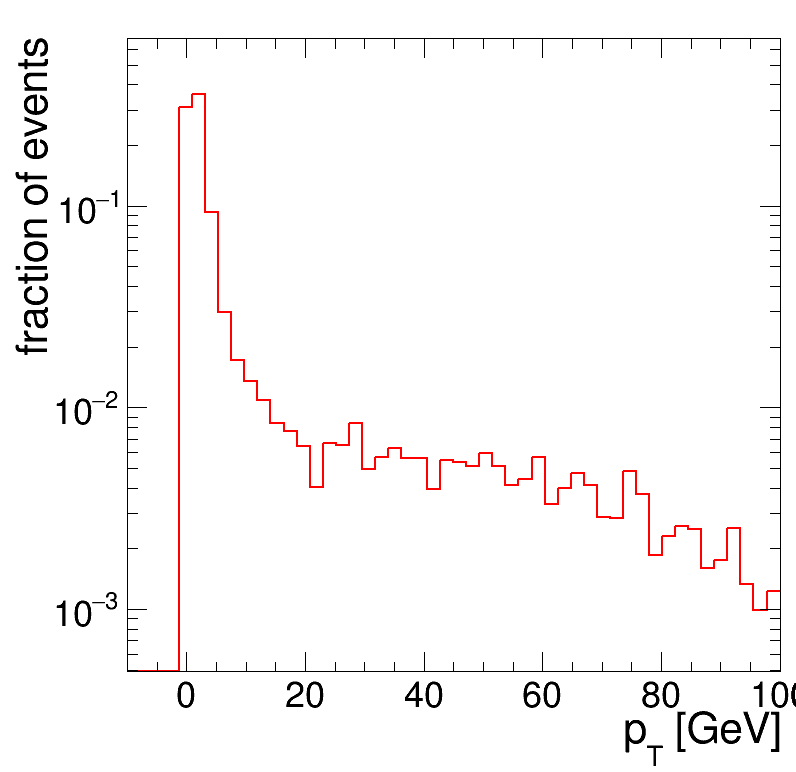

In [240]:
c = rt.TCanvas('c','c', 800, 800)
leg = rt.TLegend(0.18,0.76,0.53,0.94)
leg.SetTextSize(0.022)
leg.SetEntrySeparation(0.01)
gr_1j = {}
gr_2j = {}

i = 0

print('i,j,n,s,m,a')

for k,v in tree.items(): 
    print(k,v)
    
    pho_pt = v['gParticleGrandMotherPt'].array()
    pho_id = v['gParticleId'].array()
    pho_mo_id = v['gParticleMotherId'].array()
    
    pho_pt = pho_pt[pho_id==22, pho_mo_id==111]
    
#     e = pho_e[:,0]
    pt = pho_pt.flatten()
    
    ht0 = create_TH1D( pt, axis_title=['p_{T} [GeV]', 'fraction of events'], name="", binning=[50,-10,100])
    ht0.SetLineColor(std_color_list[i+1])
    ht0.SetMarkerColor(std_color_list[i+1])
    
    ht0.DrawNormalized('')
 
    i += 1

# leg.Draw()

c.SetLogy()
c.Update()
c.Draw()
c.SaveAs(out_dir+'pho_grandmo_pt.png')


i,j,n,s,m,a
analyzer-dyll-4FEVT-cluster1000.root <TTree b'ecalTPTree' at 0x7f4e7770c240>


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190807/pho_grandmo_px.png has been created


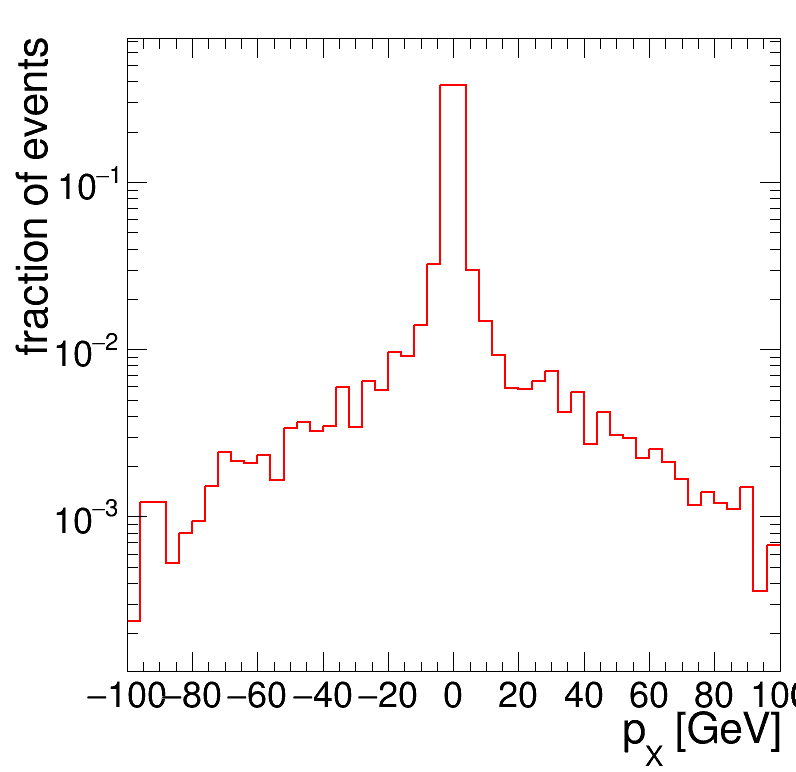

In [241]:
c = rt.TCanvas('c','c', 800, 800)
leg = rt.TLegend(0.18,0.76,0.53,0.94)
leg.SetTextSize(0.022)
leg.SetEntrySeparation(0.01)
gr_1j = {}
gr_2j = {}

i = 0

print('i,j,n,s,m,a')

for k,v in tree.items(): 
    print(k,v)
    
    pho_px = v['gParticleGrandMotherPx'].array()
    pho_id = v['gParticleId'].array()
    pho_mo_id = v['gParticleMotherId'].array()
    
    pho_px = pho_px[pho_id==22, pho_mo_id==111]
    
#     e = pho_e[:,0]
    px = pho_px.flatten()
    
    ht0 = create_TH1D( px, axis_title=['p_{X} [GeV]', 'fraction of events'], name="", binning=[50,-100,100])
    ht0.SetLineColor(std_color_list[i+1])
    ht0.SetMarkerColor(std_color_list[i+1])
    
    ht0.DrawNormalized('')
 
    i += 1

# leg.Draw()

c.SetLogy()
c.Update()
c.Draw()
c.SaveAs(out_dir+'pho_grandmo_px.png')


i,j,n,s,m,a
analyzer-dyll-4FEVT-cluster1000.root <TTree b'ecalTPTree' at 0x7f4e7770c240>


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190807/pho_grandmo_py.png has been created


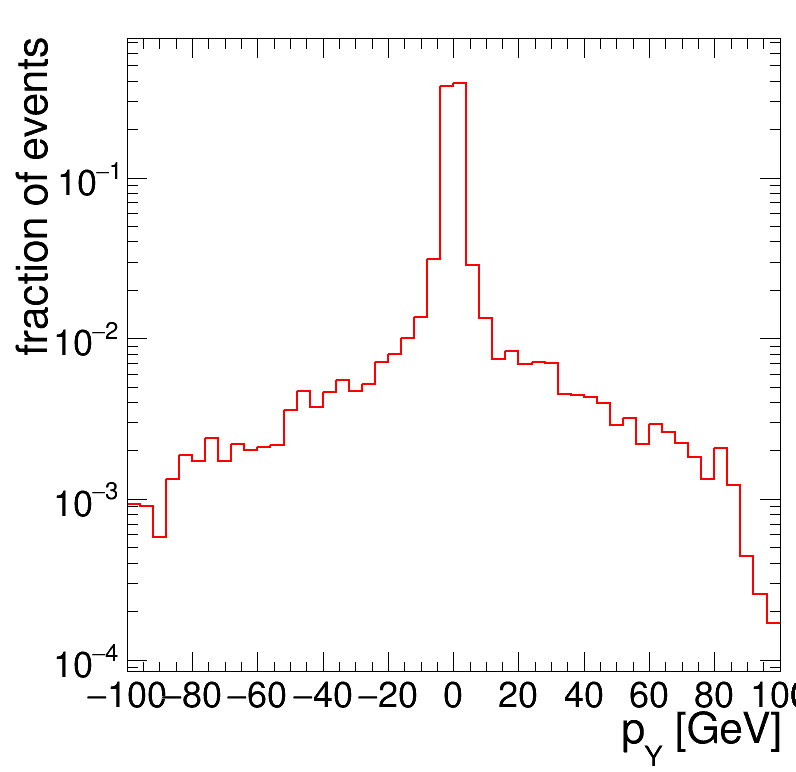

In [242]:
c = rt.TCanvas('c','c', 800, 800)
leg = rt.TLegend(0.18,0.76,0.53,0.94)
leg.SetTextSize(0.022)
leg.SetEntrySeparation(0.01)
gr_1j = {}
gr_2j = {}

i = 0

print('i,j,n,s,m,a')

for k,v in tree.items(): 
    print(k,v)
    
    pho_py = v['gParticleGrandMotherPy'].array()
    pho_id = v['gParticleId'].array()
    pho_mo_id = v['gParticleMotherId'].array()
    
    pho_py = pho_py[pho_id==22, pho_mo_id==111]
    
#     e = pho_e[:,0]
    py = pho_py.flatten()
    
    ht0 = create_TH1D( py, axis_title=['p_{Y} [GeV]', 'fraction of events'], name="", binning=[50,-100,100])
    ht0.SetLineColor(std_color_list[i+1])
    ht0.SetMarkerColor(std_color_list[i+1])
    
    ht0.DrawNormalized('')
 
    i += 1

# leg.Draw()

c.SetLogy()
c.Update()
c.Draw()
c.SaveAs(out_dir+'pho_grandmo_py.png')


i,j,n,s,m,a
analyzer-dyll-4FEVT-cluster1000.root <TTree b'ecalTPTree' at 0x7f4e7770c240>


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190807/pho_grandmo_pz.png has been created


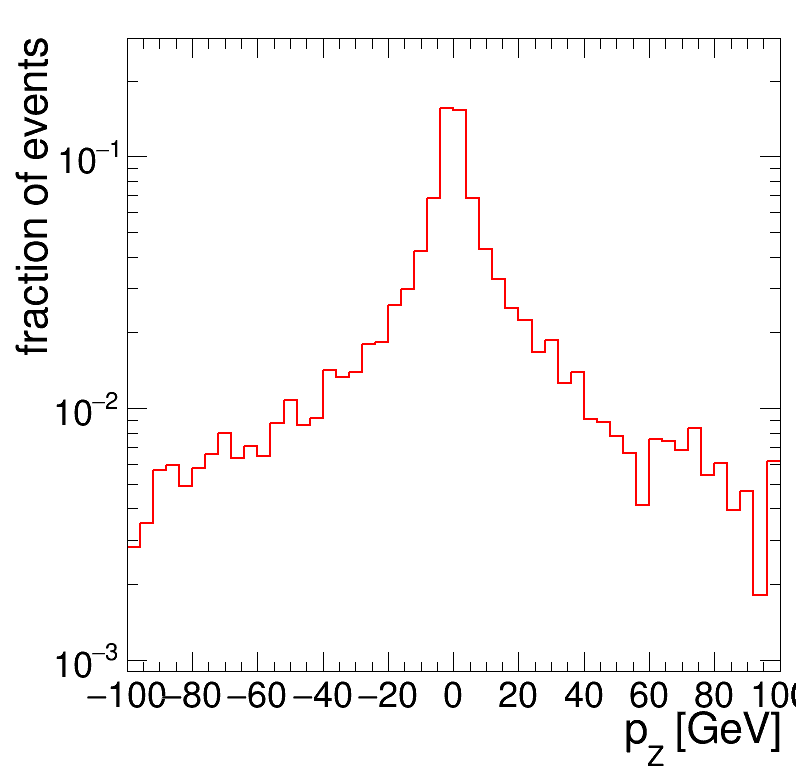

In [243]:
c = rt.TCanvas('c','c', 800, 800)
leg = rt.TLegend(0.18,0.76,0.53,0.94)
leg.SetTextSize(0.022)
leg.SetEntrySeparation(0.01)
gr_1j = {}
gr_2j = {}

i = 0

print('i,j,n,s,m,a')

for k,v in tree.items(): 
    print(k,v)
    
    pho_pz = v['gParticleGrandMotherPz'].array()
    pho_id = v['gParticleId'].array()
    pho_mo_id = v['gParticleMotherId'].array()
    
    pho_pz = pho_pz[pho_id==22, pho_mo_id==111]
    
#     e = pho_e[:,0]
    pz = pho_pz.flatten()
    
    ht0 = create_TH1D( pz, axis_title=['p_{Z} [GeV]', 'fraction of events'], name="", binning=[50,-100,100])
    ht0.SetLineColor(std_color_list[i+1])
    ht0.SetMarkerColor(std_color_list[i+1])
    
    ht0.DrawNormalized('')
    
    i += 1

# leg.Draw()

c.SetLogy()
c.Update()
c.Draw()
c.SaveAs(out_dir+'pho_grandmo_pz.png')


i,j,n,s,m,a
analyzer-dyll-4FEVT-cluster1000.root <TTree b'ecalTPTree' at 0x7f4e7770c240>


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190807/pho_grandmo_pz.png has been created


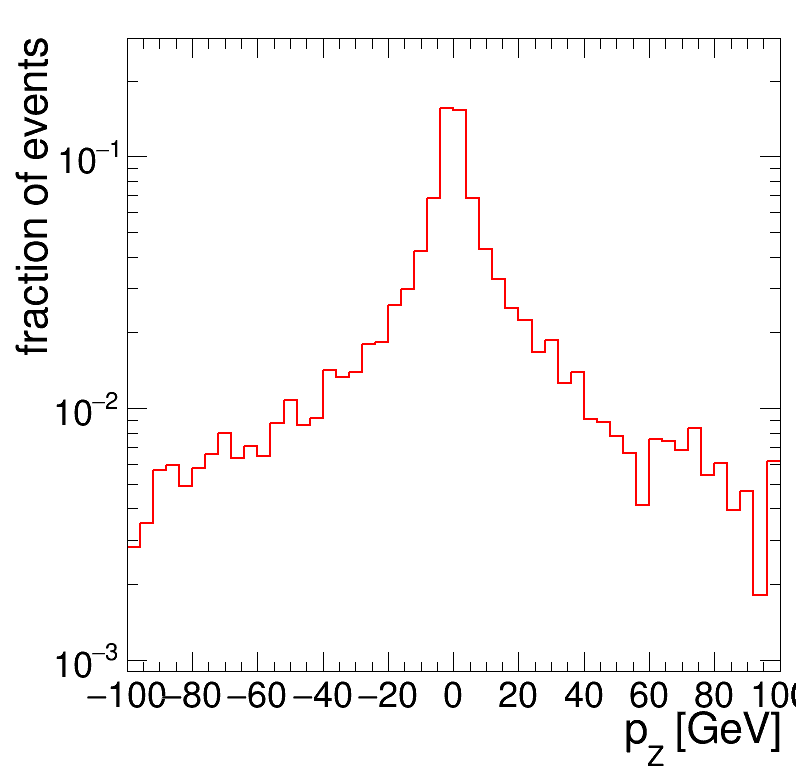

In [244]:
c = rt.TCanvas('c','c', 800, 800)
leg = rt.TLegend(0.18,0.76,0.53,0.94)
leg.SetTextSize(0.022)
leg.SetEntrySeparation(0.01)
gr_1j = {}
gr_2j = {}

i = 0

print('i,j,n,s,m,a')

for k,v in tree.items(): 
    print(k,v)
    
    pho_pz = v['gParticleGrandMotherPz'].array()
    pho_id = v['gParticleId'].array()
    pho_mo_id = v['gParticleMotherId'].array()
    
    pho_pz = pho_pz[pho_id==22, pho_mo_id==111]
    
#     e = pho_e[:,0]
    pz = pho_pz.flatten()
    
    ht0 = create_TH1D( pz, axis_title=['p_{Z} [GeV]', 'fraction of events'], name="", binning=[50,-100,100])
    ht0.SetLineColor(std_color_list[i+1])
    ht0.SetMarkerColor(std_color_list[i+1])
    
    ht0.DrawNormalized('')
 
    i += 1

# leg.Draw()

c.SetLogy()
c.Update()
c.Draw()
c.SaveAs(out_dir+'pho_grandmo_pz.png')


# Photon Grand Mother Relation

i,j,n,s,m,a
analyzer-dyll-4FEVT-cluster1000.root <TTree b'ecalTPTree' at 0x7f4e7770c240>


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TROOT::Append>: Replacing existing TH1: analyzer-dyll-4FEVT-cluster1000.root (Potential memory leak).
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190807/pho_grandmo_eta_2d.png has been created


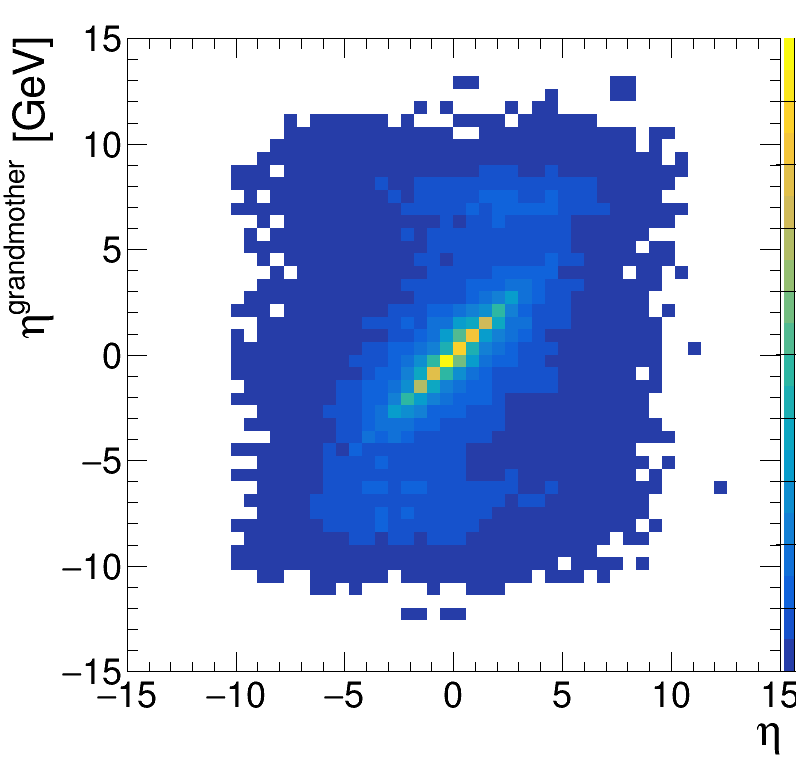

In [247]:
c = rt.TCanvas('c','c', 800, 800)
leg = rt.TLegend(0.18,0.76,0.53,0.94)
leg.SetTextSize(0.022)
leg.SetEntrySeparation(0.01)
gr_1j = {}
gr_2j = {}

i = 0

print('i,j,n,s,m,a')

for k,v in tree.items(): 
    print(k,v)
    
    pho_pz = v['gParticleEta'].array()
    pho_id = v['gParticleId'].array()
    
    pho_bro_pz = v['gParticleGrandMotherEta'].array()  
    pho_mo_id = v['gParticleMotherId'].array()
    
    pho_string = np.logical_and(pho_id==22, pho_mo_id==111)
#     pho_bro_string = np.logical_and(pho_bro_id==22, pho_mo_id==111)
    
    pho_pz1 = pho_pz[pho_string]
    pho_bro_pz1 = pho_bro_pz[pho_string]
    
#     e = pho_e[:,0]
#     bro_pz = pho_bro_pz1[:,0]
#     pz = pho_pz1[:,0]
    pz = pho_pz1.flatten()
    bro_pz = pho_bro_pz1.flatten()
    sample = [pz,bro_pz]
    
#     ht0 = create_TH2D((sample, name='', title=None, binning=[50,-100,100,50,-100,100] )
# #                       #axis_title = ['p_{Z} [GeV]','p_{Z}^{sibling} [GeV]','']
    ht0.SetLineColor(std_color_list[i+1])
    ht0.SetMarkerColor(std_color_list[i+1])
                      
    hz = rt.TH2D(k,k,50,-15,15,50,-15,15)
    hz.GetXaxis().SetTitle('#eta')
    hz.GetYaxis().SetTitle('#eta^{grandmother} [GeV]')
#     hz.GetYaxis().SetRangeUser(0,1e+6)
#     hz[k].SetMarkerColor(std_color_list[i])
        

    for evt,(pz1,pz2) in enumerate(zip(pz,bro_pz)):
        hz.Fill(pz1,pz2)
    
    hz.Draw('colz')
 
    i += 1

# leg.Draw()

# c.SetLogy()
c.Update()
c.Draw()
c.SaveAs(out_dir+'pho_grandmo_eta_2d.png')


i,j,n,s,m,a
analyzer-dyll-4FEVT-cluster1000.root <TTree b'ecalTPTree' at 0x7f4e7770c240>


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TROOT::Append>: Replacing existing TH1: analyzer-dyll-4FEVT-cluster1000.root (Potential memory leak).
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190807/pho_grandmo_phi_2d.png has been created


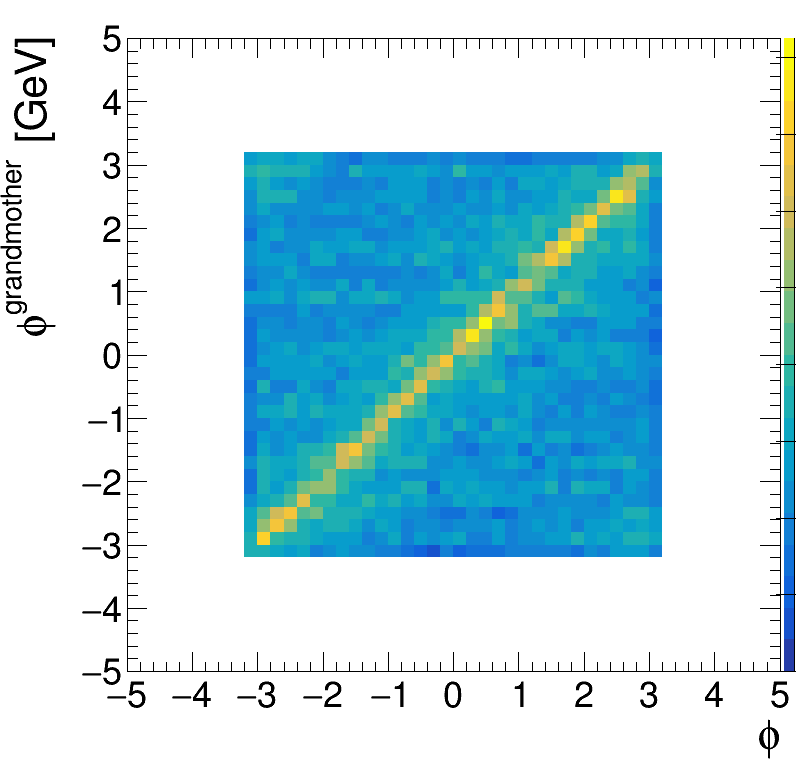

In [248]:
c = rt.TCanvas('c','c', 800, 800)
leg = rt.TLegend(0.18,0.76,0.53,0.94)
leg.SetTextSize(0.022)
leg.SetEntrySeparation(0.01)
gr_1j = {}
gr_2j = {}

i = 0

print('i,j,n,s,m,a')

for k,v in tree.items(): 
    print(k,v)
    
    pho_pz = v['gParticlePhi'].array()
    pho_id = v['gParticleId'].array()
    
    pho_bro_pz = v['gParticleGrandMotherPhi'].array()
    pho_bro_id = v['gParticleSiblingId'].array()
  
    pho_mo_id = v['gParticleMotherId'].array()
    
    pho_string = np.logical_and(pho_id==22, pho_mo_id==111)
    pho_bro_string = np.logical_and(pho_bro_id==22, pho_mo_id==111)
    
    pho_pz1 = pho_pz[np.logical_and(pho_string, pho_bro_string)]
    pho_bro_pz1 = pho_bro_pz[np.logical_and(pho_string, pho_bro_string)]
    
#     e = pho_e[:,0]
#     bro_pz = pho_bro_pz1[:,0]
#     pz = pho_pz1[:,0]
    pz = pho_pz1.flatten()
    bro_pz = pho_bro_pz1.flatten()
    sample = [pz,bro_pz]
    
#     ht0 = create_TH2D((sample, name='', title=None, binning=[50,-100,100,50,-100,100] )
# #                       #axis_title = ['p_{Z} [GeV]','p_{Z}^{sibling} [GeV]','']
    ht0.SetLineColor(std_color_list[i+1])
    ht0.SetMarkerColor(std_color_list[i+1])
                      
    hz = rt.TH2D(k,k,50,-5,5,50,-5,5)
    hz.GetXaxis().SetTitle('#phi')
    hz.GetYaxis().SetTitle('#phi^{grandmother} [GeV]')
#     hz.GetYaxis().SetRangeUser(0,1e+6)
#     hz[k].SetMarkerColor(std_color_list[i])
        

    for evt,(pz1,pz2) in enumerate(zip(pz,bro_pz)):
        hz.Fill(pz1,pz2)
    
    hz.Draw('colz')
 
    i += 1

# leg.Draw()

# c.SetLogy()
c.Update()
c.Draw()
c.SaveAs(out_dir+'pho_grandmo_phi_2d.png')


i,j,n,s,m,a
analyzer-dyll-4FEVT-cluster1000.root <TTree b'ecalTPTree' at 0x7f4e7770c240>


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190807/pho_grandmo_dr.png has been created


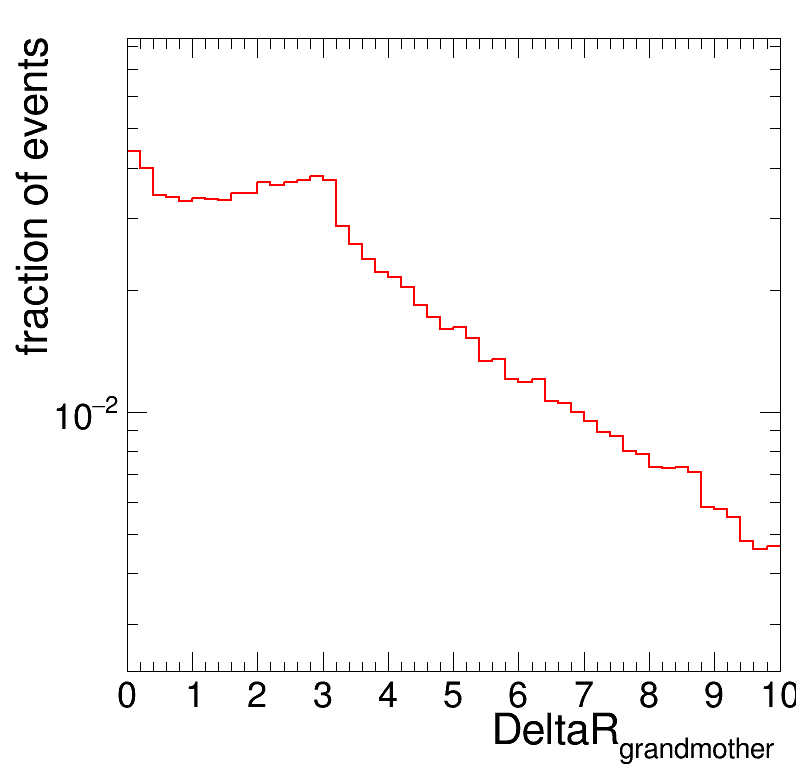

In [249]:
c = rt.TCanvas('c','c', 800, 800)
leg = rt.TLegend(0.18,0.76,0.53,0.94)
leg.SetTextSize(0.022)
leg.SetEntrySeparation(0.01)
gr_1j = {}
gr_2j = {}

i = 0

print('i,j,n,s,m,a')

for k,v in tree.items(): 
    print(k,v)
    
    pho_pz = v['gParticleGrandMotherDR'].array()
    pho_id = v['gParticleSiblingId'].array()
    pho_mo_id = v['gParticleMotherId'].array()
    
    pho_pz = pho_pz[pho_id==22, pho_mo_id==111]
    
#     e = pho_e[:,0]
    pz = pho_pz.flatten()
    
    ht0 = create_TH1D( pz, axis_title=['DeltaR_{grandmother}', 'fraction of events'], name="", binning=[50,-0,10])
    ht0.SetLineColor(std_color_list[i+1])
    ht0.SetMarkerColor(std_color_list[i+1])
    
    ht0.DrawNormalized('')
 
    i += 1

# leg.Draw()

c.SetLogy()
c.Update()
c.Draw()
c.SaveAs(out_dir+'pho_grandmo_dr.png')


i,j,n,s,m,a
analyzer-dyll-4FEVT-cluster1000.root <TTree b'ecalTPTree' at 0x7f4e7770c240>


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TROOT::Append>: Replacing existing TH1: analyzer-dyll-4FEVT-cluster1000.root (Potential memory leak).
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190807/pho_grandmo_e_2d.png has been created


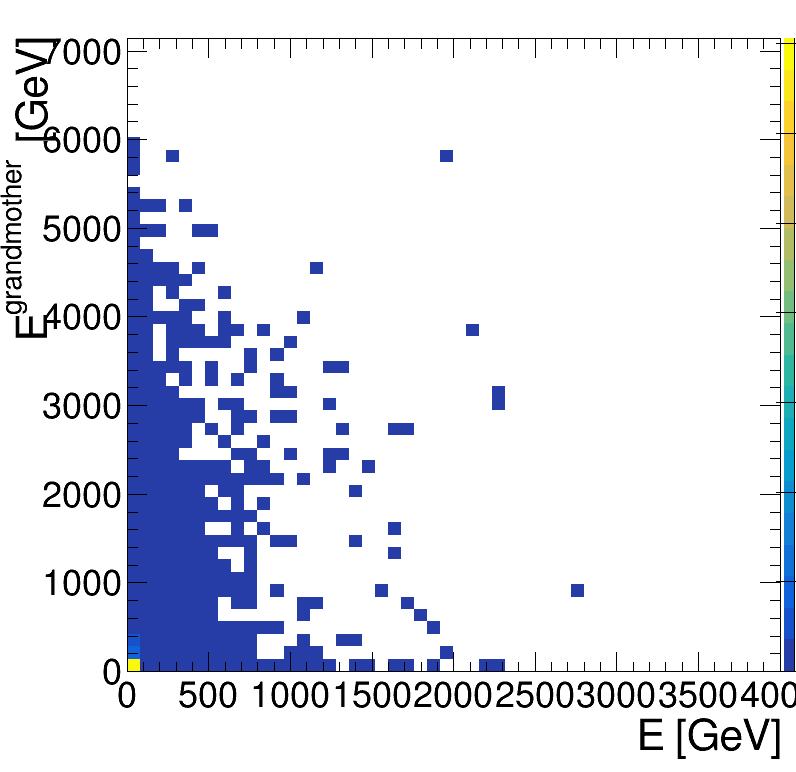

In [253]:
c = rt.TCanvas('c','c', 800, 800)
leg = rt.TLegend(0.18,0.76,0.53,0.94)
leg.SetTextSize(0.022)
leg.SetEntrySeparation(0.01)
gr_1j = {}
gr_2j = {}

i = 0

print('i,j,n,s,m,a')

for k,v in tree.items(): 
    print(k,v)
    
    pho_pz = v['gParticleE'].array()
    pho_id = v['gParticleId'].array()
    
    pho_bro_pz = v['gParticleGrandMotherE'].array()
    pho_bro_id = v['gParticleSiblingId'].array()
  
    pho_mo_id = v['gParticleMotherId'].array()
    
    pho_string = np.logical_and(pho_id==22, pho_mo_id==111)
    pho_bro_string = np.logical_and(pho_bro_id==22, pho_mo_id==111)
    
    pho_pz1 = pho_pz[np.logical_and(pho_string, pho_bro_string)]
    pho_bro_pz1 = pho_bro_pz[np.logical_and(pho_string, pho_bro_string)]
    
#     e = pho_e[:,0]
#     bro_pz = pho_bro_pz1[:,0]
#     pz = pho_pz1[:,0]
    pz = pho_pz1.flatten()
    bro_pz = pho_bro_pz1.flatten()
    sample = [pz,bro_pz]
    
#     ht0 = create_TH2D((sample, name='', title=None, binning=[50,-100,100,50,-100,100] )
# #                       #axis_title = ['p_{Z} [GeV]','p_{Z}^{sibling} [GeV]','']
    ht0.SetLineColor(std_color_list[i+1])
    ht0.SetMarkerColor(std_color_list[i+1])
                      
    hz = rt.TH2D(k,k,50,0,4000,50,-0,7000)
    hz.GetXaxis().SetTitle('E [GeV]')
    hz.GetYaxis().SetTitle('E^{grandmother} [GeV]')
    hz.GetYaxis().SetRangeUser(0,1e+6)
#     hz[k].SetMarkerColor(std_color_list[i])
        

    for evt,(pz1,pz2) in enumerate(zip(pz,bro_pz)):
        hz.Fill(pz1,pz2)
    
    hz.Draw('colz')
 
    i += 1

# leg.Draw()

# c.SetLogy()
c.Update()
c.Draw()
c.SaveAs(out_dir+'pho_grandmo_e_2d.png')


i,j,n,s,m,a
analyzer-dyll-4FEVT-cluster1000.root <TTree b'ecalTPTree' at 0x7f4e7770c240>


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TROOT::Append>: Replacing existing TH1: analyzer-dyll-4FEVT-cluster1000.root (Potential memory leak).
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190807/pho_grandmo_pt_2d.png has been created


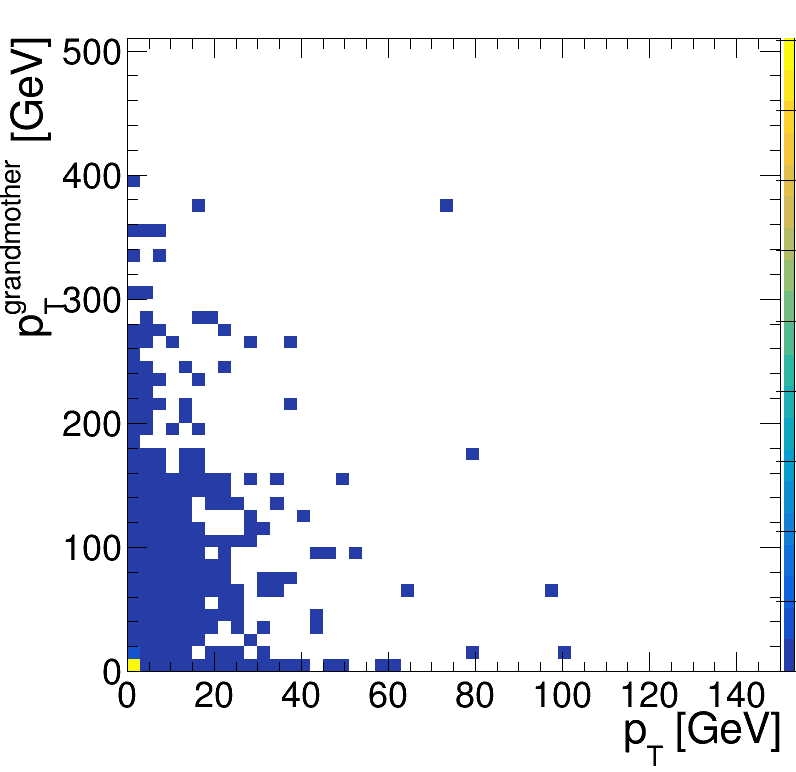

In [254]:
c = rt.TCanvas('c','c', 800, 800)
leg = rt.TLegend(0.18,0.76,0.53,0.94)
leg.SetTextSize(0.022)
leg.SetEntrySeparation(0.01)
gr_1j = {}
gr_2j = {}

i = 0

print('i,j,n,s,m,a')

for k,v in tree.items(): 
    print(k,v)
    
    pho_pz = v['gParticlePt'].array()
    pho_id = v['gParticleId'].array()
    
    pho_bro_pz = v['gParticleGrandMotherPt'].array()
    pho_bro_id = v['gParticleSiblingId'].array()
  
    pho_mo_id = v['gParticleMotherId'].array()
    
    pho_string = np.logical_and(pho_id==22, pho_mo_id==111)
    pho_bro_string = np.logical_and(pho_bro_id==22, pho_mo_id==111)
    
    pho_pz1 = pho_pz[np.logical_and(pho_string, pho_bro_string)]
    pho_bro_pz1 = pho_bro_pz[np.logical_and(pho_string, pho_bro_string)]
    
#     e = pho_e[:,0]
#     bro_pz = pho_bro_pz1[:,0]
#     pz = pho_pz1[:,0]
    pz = pho_pz1.flatten()
    bro_pz = pho_bro_pz1.flatten()
    sample = [pz,bro_pz]
    
#     ht0 = create_TH2D((sample, name='', title=None, binning=[50,-100,100,50,-100,100] )
# #                       #axis_title = ['p_{Z} [GeV]','p_{Z}^{sibling} [GeV]','']
    ht0.SetLineColor(std_color_list[i+1])
    ht0.SetMarkerColor(std_color_list[i+1])
                      
    hz = rt.TH2D(k,k,50,0,150,50,-0,500)
    hz.GetXaxis().SetTitle('p_{T} [GeV]')
    hz.GetYaxis().SetTitle('p_{T}^{grandmother} [GeV]')
    hz.GetYaxis().SetRangeUser(0,1e+6)
#     hz[k].SetMarkerColor(std_color_list[i])
        

    for evt,(pz1,pz2) in enumerate(zip(pz,bro_pz)):
        hz.Fill(pz1,pz2)
    
    hz.Draw('colz')
 
    i += 1

# leg.Draw()

# c.SetLogy()
c.Update()
c.Draw()
c.SaveAs(out_dir+'pho_grandmo_pt_2d.png')


i,j,n,s,m,a
analyzer-dyll-4FEVT-cluster1000.root <TTree b'ecalTPTree' at 0x7f4e7770c240>


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TROOT::Append>: Replacing existing TH1: analyzer-dyll-4FEVT-cluster1000.root (Potential memory leak).
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190807/pho_grandmo_px_2d.png has been created


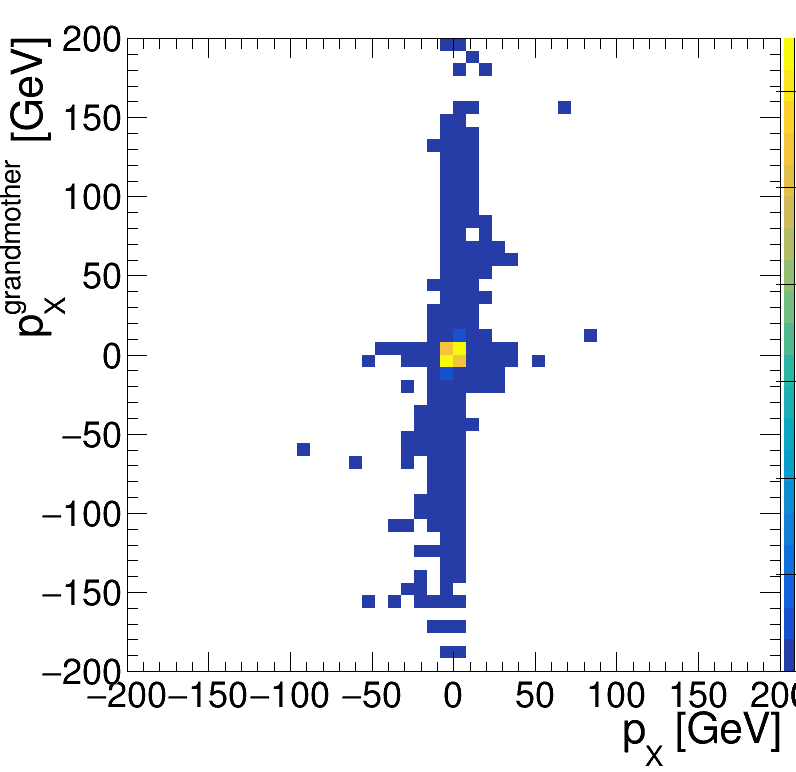

In [255]:
c = rt.TCanvas('c','c', 800, 800)
leg = rt.TLegend(0.18,0.76,0.53,0.94)
leg.SetTextSize(0.022)
leg.SetEntrySeparation(0.01)
gr_1j = {}
gr_2j = {}

i = 0

print('i,j,n,s,m,a')

for k,v in tree.items(): 
    print(k,v)
    
    pho_pz = v['gParticlePx'].array()
    pho_id = v['gParticleId'].array()
    
    pho_bro_pz = v['gParticleGrandMotherPx'].array()
    pho_bro_id = v['gParticleSiblingId'].array()
  
    pho_mo_id = v['gParticleMotherId'].array()
    
    pho_string = np.logical_and(pho_id==22, pho_mo_id==111)
    pho_bro_string = np.logical_and(pho_bro_id==22, pho_mo_id==111)
    
    pho_pz1 = pho_pz[np.logical_and(pho_string, pho_bro_string)]
    pho_bro_pz1 = pho_bro_pz[np.logical_and(pho_string, pho_bro_string)]
    
    
    
    
#     pho_pz1 = pho_pz[pho_id==22, pho_bro_id==22, pho_mo_id==111]
#     pho_bro_pz1 = pho_pz[pho_id==22, pho_bro_id==22, pho_mo_id==111]
    
#     e = pho_e[:,0]
    pz = pho_pz1.flatten()
    bro_pz = pho_bro_pz1.flatten()
    sample = [pz,bro_pz]
    
#     ht0 = create_TH2D((sample, name='', title=None, binning=[50,-100,100,50,-100,100] )
# #                       #axis_title = ['p_{Z} [GeV]','p_{Z}^{sibling} [GeV]','']
    ht0.SetLineColor(std_color_list[i+1])
    ht0.SetMarkerColor(std_color_list[i+1])
                      
    hz = rt.TH2D(k,k,50,-200,200,50,-200,200)
    hz.GetXaxis().SetTitle('p_{X} [GeV]')
    hz.GetYaxis().SetTitle('p_{X}^{grandmother} [GeV]')
#     hz[k].SetMarkerColor(std_color_list[i])
        

    for evt,(pz1,pz2) in enumerate(zip(pz,bro_pz)):
        hz.Fill(pz1,pz2)
    
    hz.Draw('colz')
 
    i += 1

# leg.Draw()

# c.SetLogy()
c.Update()
c.Draw()
c.SaveAs(out_dir+'pho_grandmo_px_2d.png')


i,j,n,s,m,a
analyzer-dyll-4FEVT-cluster1000.root <TTree b'ecalTPTree' at 0x7f4e7770c240>


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TROOT::Append>: Replacing existing TH1: analyzer-dyll-4FEVT-cluster1000.root (Potential memory leak).
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190807/pho_grandmo_py_2d.png has been created


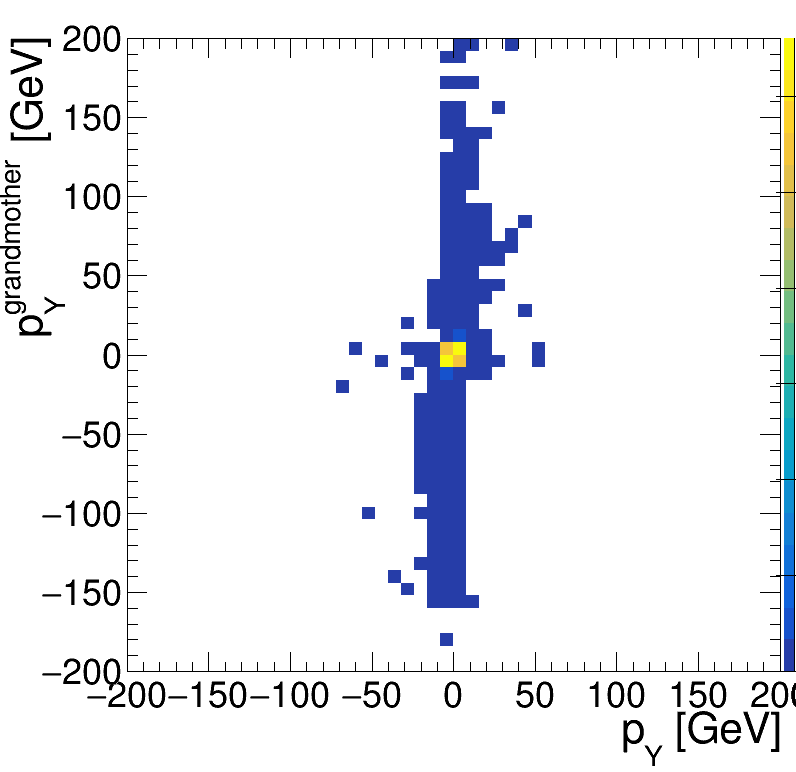

In [256]:
c = rt.TCanvas('c','c', 800, 800)
leg = rt.TLegend(0.18,0.76,0.53,0.94)
leg.SetTextSize(0.022)
leg.SetEntrySeparation(0.01)
gr_1j = {}
gr_2j = {}

i = 0

print('i,j,n,s,m,a')

for k,v in tree.items(): 
    print(k,v)
    
    pho_pz = v['gParticlePy'].array()
    pho_id = v['gParticleId'].array()
    
    pho_bro_pz = v['gParticleGrandMotherPy'].array()
    pho_bro_id = v['gParticleSiblingId'].array()
  
    pho_mo_id = v['gParticleMotherId'].array()
    
    pho_string = np.logical_and(pho_id==22, pho_mo_id==111)
    pho_bro_string = np.logical_and(pho_bro_id==22, pho_mo_id==111)
    
    pho_pz1 = pho_pz[np.logical_and(pho_string, pho_bro_string)]
    pho_bro_pz1 = pho_bro_pz[np.logical_and(pho_string, pho_bro_string)]
    
    
    
    
#     pho_pz1 = pho_pz[pho_id==22, pho_bro_id==22, pho_mo_id==111]
#     pho_bro_pz1 = pho_pz[pho_id==22, pho_bro_id==22, pho_mo_id==111]
    
#     e = pho_e[:,0]
    pz = pho_pz1.flatten()
    bro_pz = pho_bro_pz1.flatten()
    sample = [pz,bro_pz]
    
#     ht0 = create_TH2D((sample, name='', title=None, binning=[50,-100,100,50,-100,100] )
# #                       #axis_title = ['p_{Z} [GeV]','p_{Z}^{sibling} [GeV]','']
    ht0.SetLineColor(std_color_list[i+1])
    ht0.SetMarkerColor(std_color_list[i+1])
                      
    hz = rt.TH2D(k,k,50,-200,200,50,-200,200)
    hz.GetXaxis().SetTitle('p_{Y} [GeV]')
    hz.GetYaxis().SetTitle('p_{Y}^{grandmother} [GeV]')
#     hz[k].SetMarkerColor(std_color_list[i])
        

    for evt,(pz1,pz2) in enumerate(zip(pz,bro_pz)):
        hz.Fill(pz1,pz2)
    
    hz.Draw('colz')
 
    i += 1

# leg.Draw()

# c.SetLogy()
c.Update()
c.Draw()
c.SaveAs(out_dir+'pho_grandmo_py_2d.png')


i,j,n,s,m,a
analyzer-dyll-4FEVT-cluster1000.root <TTree b'ecalTPTree' at 0x7f4e7770c240>


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TROOT::Append>: Replacing existing TH1: analyzer-dyll-4FEVT-cluster1000.root (Potential memory leak).
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190807/pho_grandmo_pz_2d.png has been created


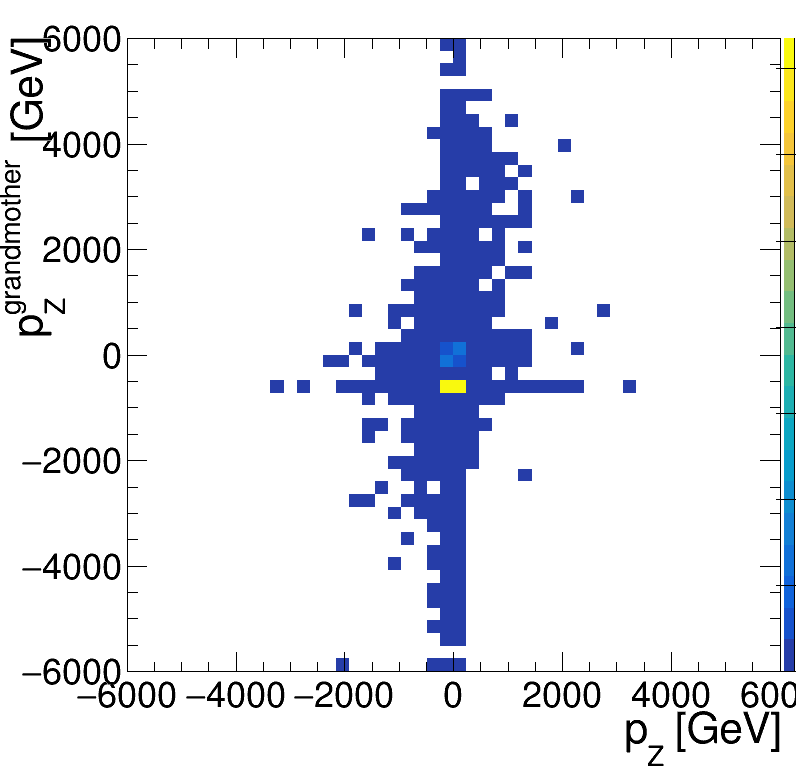

In [257]:
c = rt.TCanvas('c','c', 800, 800)
leg = rt.TLegend(0.18,0.76,0.53,0.94)
leg.SetTextSize(0.022)
leg.SetEntrySeparation(0.01)
gr_1j = {}
gr_2j = {}

i = 0

print('i,j,n,s,m,a')

for k,v in tree.items(): 
    print(k,v)
    
    pho_pz = v['gParticlePz'].array()
    pho_id = v['gParticleId'].array()
    
    pho_bro_pz = v['gParticleGrandMotherPz'].array()
    pho_bro_id = v['gParticleSiblingId'].array()
  
    pho_mo_id = v['gParticleMotherId'].array()
    
    pho_string = np.logical_and(pho_id==22, pho_mo_id==111)
    pho_bro_string = np.logical_and(pho_bro_id==22, pho_mo_id==111)
    
    pho_pz1 = pho_pz[np.logical_and(pho_string, pho_bro_string)]
    pho_bro_pz1 = pho_bro_pz[np.logical_and(pho_string, pho_bro_string)]
    
    
    
    
#     pho_pz1 = pho_pz[pho_id==22, pho_bro_id==22, pho_mo_id==111]
#     pho_bro_pz1 = pho_pz[pho_id==22, pho_bro_id==22, pho_mo_id==111]
    
#     e = pho_e[:,0]
    pz = pho_pz1.flatten()
    bro_pz = pho_bro_pz1.flatten()
    sample = [pz,bro_pz]
    
#     ht0 = create_TH2D((sample, name='', title=None, binning=[50,-100,100,50,-100,100] )
# #                       #axis_title = ['p_{Z} [GeV]','p_{Z}^{sibling} [GeV]','']
    ht0.SetLineColor(std_color_list[i+1])
    ht0.SetMarkerColor(std_color_list[i+1])
                      
    hz = rt.TH2D(k,k,50,-6000,6000,50,-6000,6000)
    hz.GetXaxis().SetTitle('p_{Z} [GeV]')
    hz.GetYaxis().SetTitle('p_{Z}^{grandmother} [GeV]')
#     hz[k].SetMarkerColor(std_color_list[i])
        

    for evt,(pz1,pz2) in enumerate(zip(pz,bro_pz)):
        hz.Fill(pz1,pz2)
    
    hz.Draw('colz')
 
    i += 1

# leg.Draw()

# c.SetLogy()
c.Update()
c.Draw()
c.SaveAs(out_dir+'pho_grandmo_pz_2d.png')


# Cone 0.2

i,j,n,s,m,a
analyzer-dyll-4FEVT-cluster1000.root <TTree b'ecalTPTree' at 0x7f4e7770c240>


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190807/pho_emax_02.png has been created


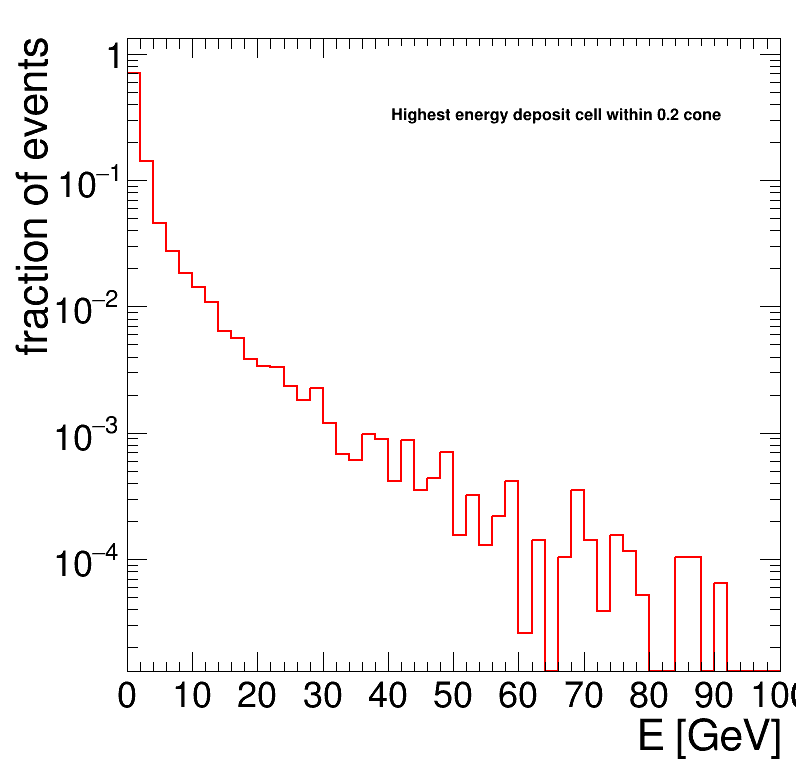

In [288]:
c = rt.TCanvas('c','c', 800, 800)
leg = rt.TLegend(0.48,0.76,0.93,0.94)
leg.SetTextSize(0.022)
leg.SetBorderSize(0)
leg.SetEntrySeparation(0.01)
gr_1j = {}
gr_2j = {}

i = 0

print('i,j,n,s,m,a')

for k,v in tree.items(): 
    print(k,v)
    
    pho_eta = v['gEmax_02'].array()
    pho_id = v['gParticleId'].array()
    pho_mo_id = v['gParticleMotherId'].array()
    
    pho_eta = pho_eta[pho_id==22, pho_mo_id==111]
    
#     eta = pho_eta[:,0]
    eta = pho_eta.flatten()
    
    ht0 = create_TH1D( eta, axis_title=['E [GeV]', 'fraction of events'], name="", binning=[50,-0,100])
    ht0.SetLineColor(std_color_list[i+1])
    ht0.SetMarkerColor(std_color_list[i+1])
    
    ht0.DrawNormalized('')
    
    leg.SetHeader('Highest energy deposit cell within 0.2 cone')

 
    i += 1

leg.Draw()

c.SetLogy()
c.Update()
c.Draw()
c.SaveAs(out_dir+'pho_emax_02.png')


i,j,n,s,m,a
analyzer-dyll-4FEVT-cluster1000.root <TTree b'ecalTPTree' at 0x7f4e7770c240>


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TROOT::Append>: Replacing existing TH1: analyzer-dyll-4FEVT-cluster1000.root (Potential memory leak).
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190807/pho_e_emax_2d_02.png has been created


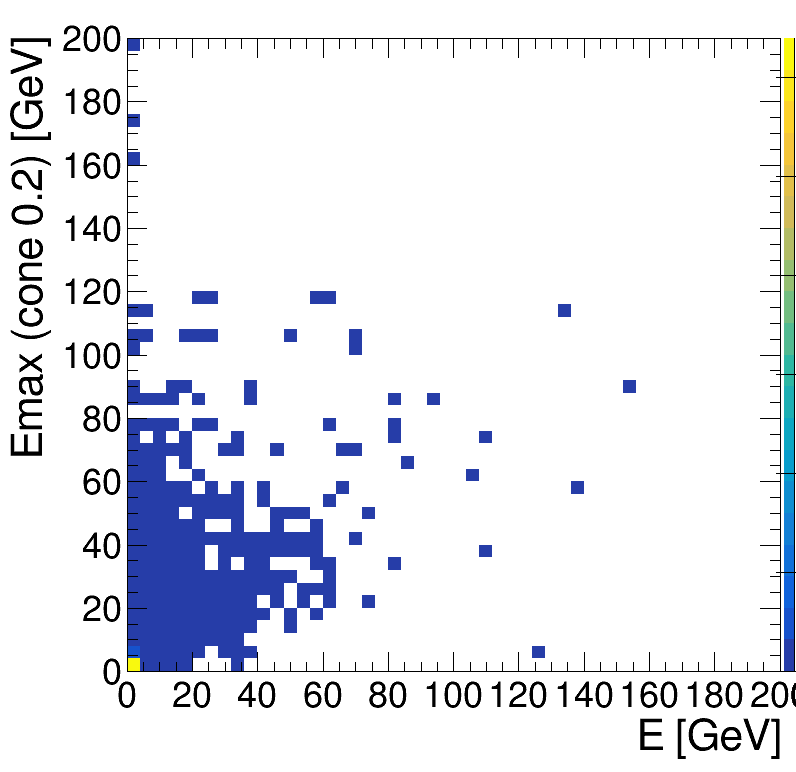

In [303]:
c = rt.TCanvas('c','c', 800, 800)
leg = rt.TLegend(0.18,0.76,0.53,0.94)
leg.SetTextSize(0.022)
leg.SetEntrySeparation(0.01)
gr_1j = {}
gr_2j = {}

i = 0

print('i,j,n,s,m,a')

for k,v in tree.items(): 
    print(k,v)
    
    pho_pz = v['gParticleE'].array()
    pho_id = v['gParticleId'].array()
    
    pho_bro_pz = v['gEmax_02'].array()
    pho_bro_id = v['gParticleSiblingId'].array()
  
    pho_mo_id = v['gParticleMotherId'].array()
    
    pho_string = np.logical_and(pho_id==22, pho_mo_id==111)
    pho_bro_string = np.logical_and(pho_bro_id==22, pho_mo_id==111)
    
    pho_pz1 = pho_pz[np.logical_and(pho_string, pho_bro_string)]
    pho_bro_pz1 = pho_bro_pz[np.logical_and(pho_string, pho_bro_string)]
    
    
    
    
#     pho_pz1 = pho_pz[pho_id==22, pho_bro_id==22, pho_mo_id==111]
#     pho_bro_pz1 = pho_pz[pho_id==22, pho_bro_id==22, pho_mo_id==111]
    
#     e = pho_e[:,0]
    pz = pho_pz1.flatten()
    bro_pz = pho_bro_pz1.flatten()
    sample = [pz,bro_pz]
    
#     ht0 = create_TH2D((sample, name='', title=None, binning=[50,-100,100,50,-100,100] )
# #                       #axis_title = ['p_{Z} [GeV]','p_{Z}^{sibling} [GeV]','']
    ht0.SetLineColor(std_color_list[i+1])
    ht0.SetMarkerColor(std_color_list[i+1])
                      
    hz = rt.TH2D(k,k,50,-0,200,50,-0,200)
    hz.GetXaxis().SetTitle('E [GeV]')
    hz.GetYaxis().SetTitle('Emax (cone 0.2) [GeV]')
#     hz[k].SetMarkerColor(std_color_list[i])
        

    for evt,(pz1,pz2) in enumerate(zip(pz,bro_pz)):
        hz.Fill(pz1,pz2)
    
    hz.Draw('colz')
 
    i += 1

# leg.Draw()

# c.SetLogy()
c.Update()
c.Draw()
c.SaveAs(out_dir+'pho_e_emax_2d_02.png')


i,j,n,s,m,a
analyzer-dyll-4FEVT-cluster1000.root <TTree b'ecalTPTree' at 0x7f4e7770c240>


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190807/pho_e9x9_02.png has been created


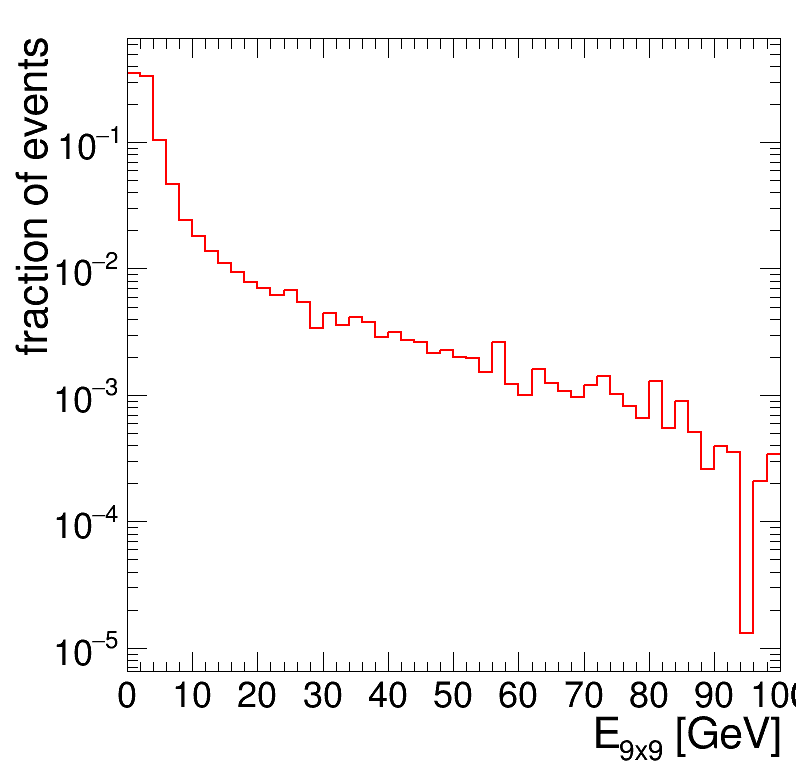

In [265]:
c = rt.TCanvas('c','c', 800, 800)
leg = rt.TLegend(0.18,0.76,0.53,0.94)
leg.SetTextSize(0.022)
leg.SetEntrySeparation(0.01)
gr_1j = {}
gr_2j = {}

i = 0

print('i,j,n,s,m,a')

for k,v in tree.items(): 
    print(k,v)
    
    pho_eta = v['gE9x9_02'].array()
    pho_id = v['gParticleId'].array()
    pho_mo_id = v['gParticleMotherId'].array()
    
    pho_eta = pho_eta[pho_id==22, pho_mo_id==111]
    
#     eta = pho_eta[:,0]
    eta = pho_eta.flatten()
    
    ht0 = create_TH1D( eta, axis_title=['E_{9x9} [GeV]', 'fraction of events'], name="", binning=[50,-0,100])
    ht0.SetLineColor(std_color_list[i+1])
    ht0.SetMarkerColor(std_color_list[i+1])
    
    ht0.DrawNormalized('')
 
    i += 1

# leg.Draw()

c.SetLogy()
c.Update()
c.Draw()
c.SaveAs(out_dir+'pho_e9x9_02.png')


i,j,n,s,m,a
analyzer-dyll-4FEVT-cluster1000.root <TTree b'ecalTPTree' at 0x7f4e7770c240>


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190807/pho_e5x5_02.png has been created


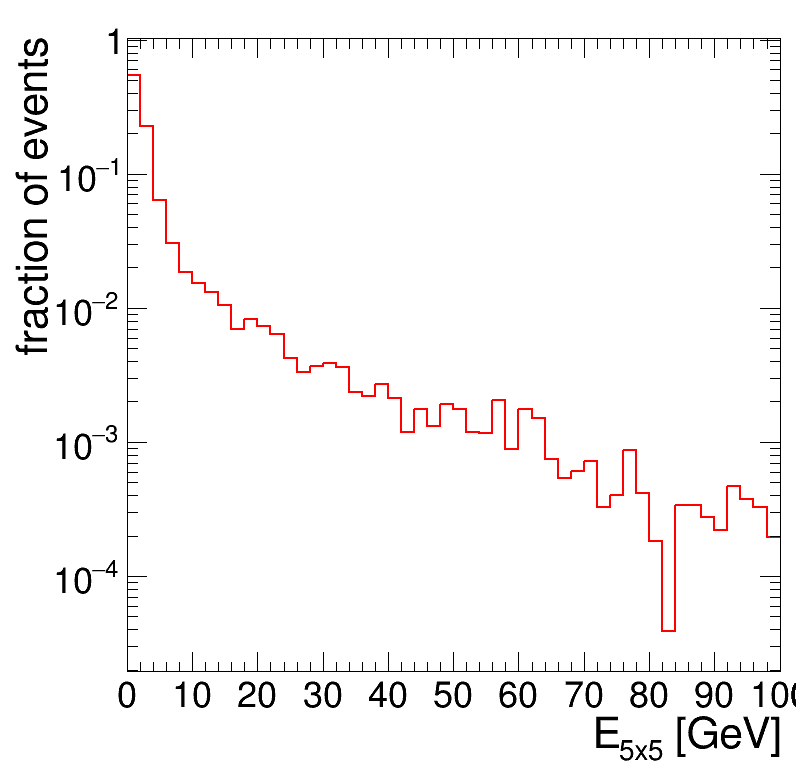

In [268]:
c = rt.TCanvas('c','c', 800, 800)
leg = rt.TLegend(0.18,0.76,0.53,0.94)
leg.SetTextSize(0.022)
leg.SetEntrySeparation(0.01)
gr_1j = {}
gr_2j = {}

i = 0

print('i,j,n,s,m,a')

for k,v in tree.items(): 
    print(k,v)
    
    pho_eta = v['gE5x5_02'].array()
    pho_id = v['gParticleId'].array()
    pho_mo_id = v['gParticleMotherId'].array()
    
    pho_eta = pho_eta[pho_id==22, pho_mo_id==111]
    
#     eta = pho_eta[:,0]
    eta = pho_eta.flatten()
    
    ht0 = create_TH1D( eta, axis_title=['E_{5x5} [GeV]', 'fraction of events'], name="", binning=[50,-0,100])
    ht0.SetLineColor(std_color_list[i+1])
    ht0.SetMarkerColor(std_color_list[i+1])
    
    ht0.DrawNormalized('')
 
    i += 1

# leg.Draw()

c.SetLogy()
c.Update()
c.Draw()
c.SaveAs(out_dir+'pho_e5x5_02.png')


i,j,n,s,m,a
analyzer-dyll-4FEVT-cluster1000.root <TTree b'ecalTPTree' at 0x7f4e7770c240>


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190807/pho_e3x3_02.png has been created


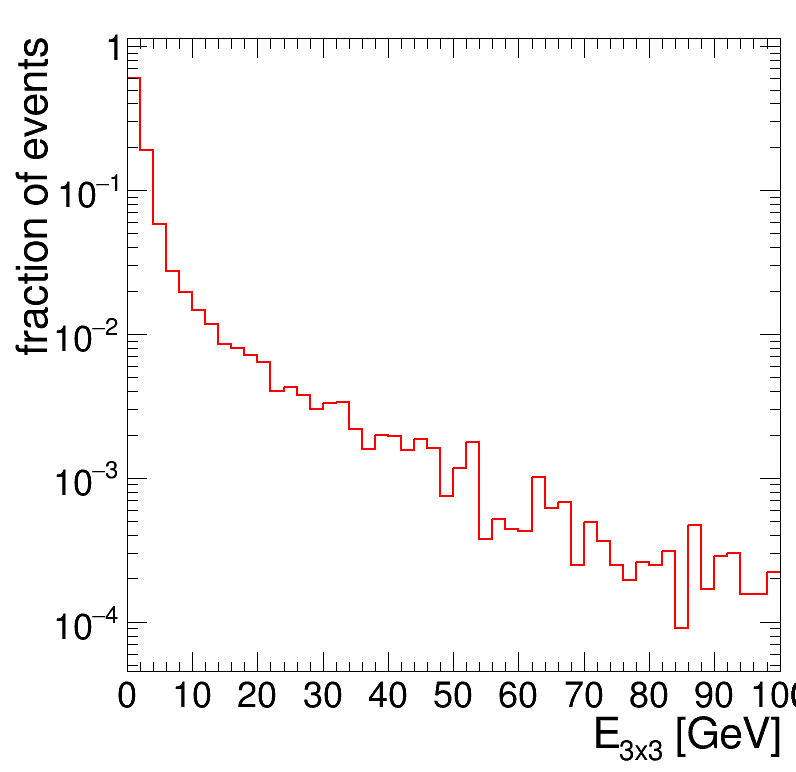

In [269]:
c = rt.TCanvas('c','c', 800, 800)
leg = rt.TLegend(0.18,0.76,0.53,0.94)
leg.SetTextSize(0.022)
leg.SetEntrySeparation(0.01)
gr_1j = {}
gr_2j = {}

i = 0

print('i,j,n,s,m,a')

for k,v in tree.items(): 
    print(k,v)
    
    pho_eta = v['gE3x3_02'].array()
    pho_id = v['gParticleId'].array()
    pho_mo_id = v['gParticleMotherId'].array()
    
    pho_eta = pho_eta[pho_id==22, pho_mo_id==111]
    
#     eta = pho_eta[:,0]
    eta = pho_eta.flatten()
    
    ht0 = create_TH1D( eta, axis_title=['E_{3x3} [GeV]', 'fraction of events'], name="", binning=[50,-0,100])
    ht0.SetLineColor(std_color_list[i+1])
    ht0.SetMarkerColor(std_color_list[i+1])
    
    ht0.DrawNormalized('')
 
    i += 1

# leg.Draw()

c.SetLogy()
c.Update()
c.Draw()
c.SaveAs(out_dir+'pho_e3x3_02.png')


i,j,n,s,m,a
analyzer-dyll-4FEVT-pi0cluster1000.root <TTree b'ecalTPTree' at 0x7efd1de58f60>


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
python ERROR: cannot open image file "/nfshome/jmao/cms-llp/plots/20190800/pho_02.png" for writing. Please check permissions.
Error in <TASImage::WriteImage>: error writing file /nfshome/jmao/cms-llp/plots/20190800/pho_02.png


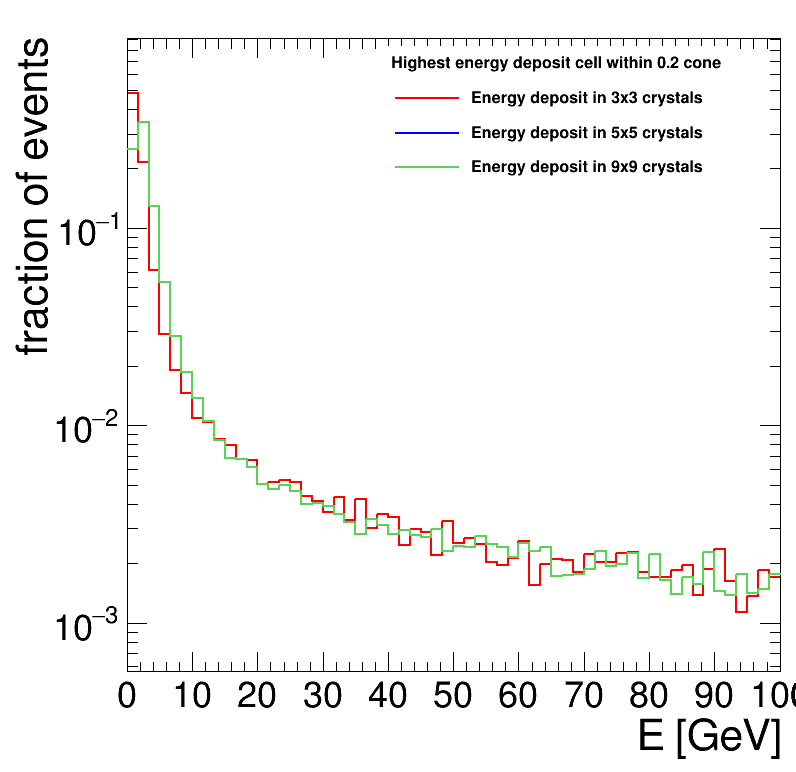

In [7]:
c = rt.TCanvas('c','c', 800, 800)
leg = rt.TLegend(0.48,0.76,0.93,0.94)
leg.SetTextSize(0.022)
leg.SetBorderSize(0)
leg.SetEntrySeparation(0.01)
gr_1j = {}
gr_2j = {}

i = 0

print('i,j,n,s,m,a')

for k,v in tree.items(): 
    print(k,v)
    
    pho_eta1 = v['gE3x3_02'].array()
    pho_eta2 = v['gE5x5_02'].array()
    pho_eta3 = v['gE9x9_02'].array()
    pho_id = v['gParticleId'].array()
    pho_mo_id = v['gParticleMotherId'].array()
    
    pho_eta1 = pho_eta1[pho_id==22, pho_mo_id==111]
    pho_eta2 = pho_eta3[pho_id==22, pho_mo_id==111]
    pho_eta3 = pho_eta3[pho_id==22, pho_mo_id==111]
    
#     eta = pho_eta[:,0]
    eta1 = pho_eta1.flatten()
    eta2 = pho_eta2.flatten()
    eta3 = pho_eta3.flatten()
    
    ht1 = create_TH1D( eta1, axis_title=['E [GeV]', 'fraction of events'], name="", binning=[60,-0,100])
    ht2 = create_TH1D( eta2, axis_title=['E [GeV]', 'fraction of events'], name="", binning=[60,-0,100])
    ht3 = create_TH1D( eta3, axis_title=['E [GeV]', 'fraction of events'], name="", binning=[60,-0,100])
    ht1.SetLineColor(std_color_list[i+1])
    ht2.SetLineColor(std_color_list[i+2])
    ht3.SetLineColor(std_color_list[i+3])
    ht1.SetMarkerColor(std_color_list[i+1])
    ht2.SetMarkerColor(std_color_list[i+2])
    ht3.SetMarkerColor(std_color_list[i+3])
    
    ht1.DrawNormalized('same')
    ht2.DrawNormalized('same')
    ht3.DrawNormalized('same')
    
    leg.SetHeader('Highest energy deposit cell within 0.2 cone')
    leg.AddEntry(ht1,'Energy deposit in 3x3 crystals')
    leg.AddEntry(ht2,'Energy deposit in 5x5 crystals')
    leg.AddEntry(ht3,'Energy deposit in 9x9 crystals')
 
    i += 1

leg.Draw()

c.SetLogy()
c.Update()
c.Draw()
c.SaveAs(out_dir+'pho_02.png')


i,j,n,s,m,a
analyzer-dyll-4FEVT-cluster1000.root <TTree b'ecalTPTree' at 0x7f4e7770c240>


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TROOT::Append>: Replacing existing TH1: analyzer-dyll-4FEVT-cluster1000.root (Potential memory leak).
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190807/pho_e9x9_emax_2d_02.png has been created


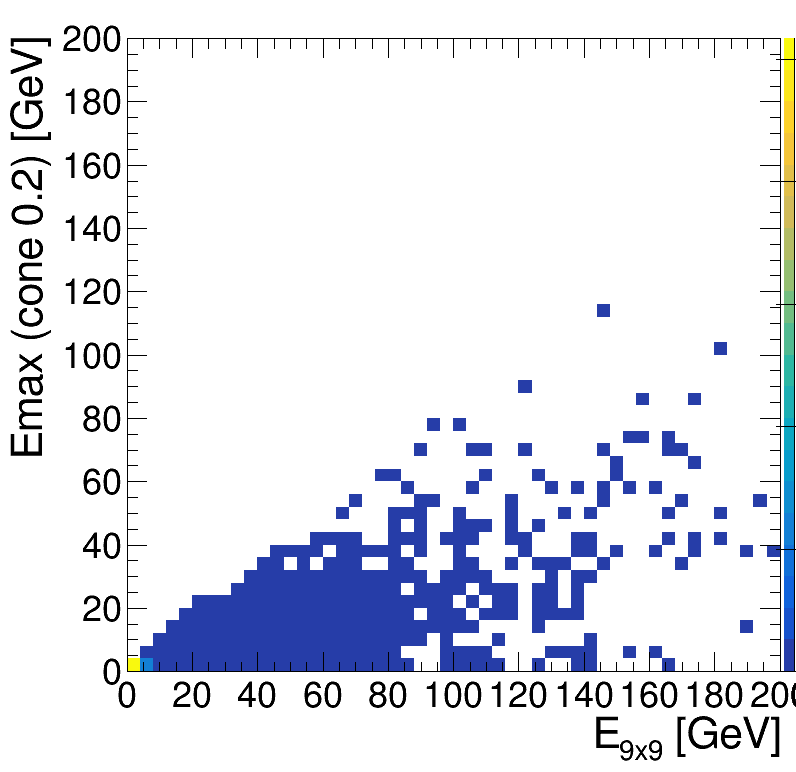

In [306]:
c = rt.TCanvas('c','c', 800, 800)
leg = rt.TLegend(0.18,0.76,0.53,0.94)
leg.SetTextSize(0.022)
leg.SetEntrySeparation(0.01)
gr_1j = {}
gr_2j = {}

i = 0

print('i,j,n,s,m,a')

for k,v in tree.items(): 
    print(k,v)
    
    pho_pz = v['gE9x9_02'].array()
    pho_id = v['gParticleId'].array()
    
    pho_bro_pz = v['gEmax_02'].array()
    pho_bro_id = v['gParticleSiblingId'].array()
  
    pho_mo_id = v['gParticleMotherId'].array()
    
    pho_string = np.logical_and(pho_id==22, pho_mo_id==111)
    pho_bro_string = np.logical_and(pho_bro_id==22, pho_mo_id==111)
    
    pho_pz1 = pho_pz[np.logical_and(pho_string, pho_bro_string)]
    pho_bro_pz1 = pho_bro_pz[np.logical_and(pho_string, pho_bro_string)]
    
    
    
    
#     pho_pz1 = pho_pz[pho_id==22, pho_bro_id==22, pho_mo_id==111]
#     pho_bro_pz1 = pho_pz[pho_id==22, pho_bro_id==22, pho_mo_id==111]
    
#     e = pho_e[:,0]
    pz = pho_pz1.flatten()
    bro_pz = pho_bro_pz1.flatten()
    sample = [pz,bro_pz]
    
#     ht0 = create_TH2D((sample, name='', title=None, binning=[50,-100,100,50,-100,100] )
# #                       #axis_title = ['p_{Z} [GeV]','p_{Z}^{sibling} [GeV]','']
    ht0.SetLineColor(std_color_list[i+1])
    ht0.SetMarkerColor(std_color_list[i+1])
                      
    hz = rt.TH2D(k,k,50,-0,200,50,-0,200)
    hz.GetXaxis().SetTitle('E_{9x9} [GeV]')
    hz.GetYaxis().SetTitle('Emax (cone 0.2) [GeV]')
#     hz[k].SetMarkerColor(std_color_list[i])
        

    for evt,(pz1,pz2) in enumerate(zip(pz,bro_pz)):
        hz.Fill(pz1,pz2)
    
    hz.Draw('colz')
 
    i += 1

# leg.Draw()

# c.SetLogy()
c.Update()
c.Draw()
c.SaveAs(out_dir+'pho_e9x9_emax_2d_02.png')


i,j,n,s,m,a
analyzer-dyll-4FEVT-cluster1000.root <TTree b'ecalTPTree' at 0x7f4e7770c240>


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TROOT::Append>: Replacing existing TH1: analyzer-dyll-4FEVT-cluster1000.root (Potential memory leak).
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190807/pho_e5x5_emax_2d_02.png has been created


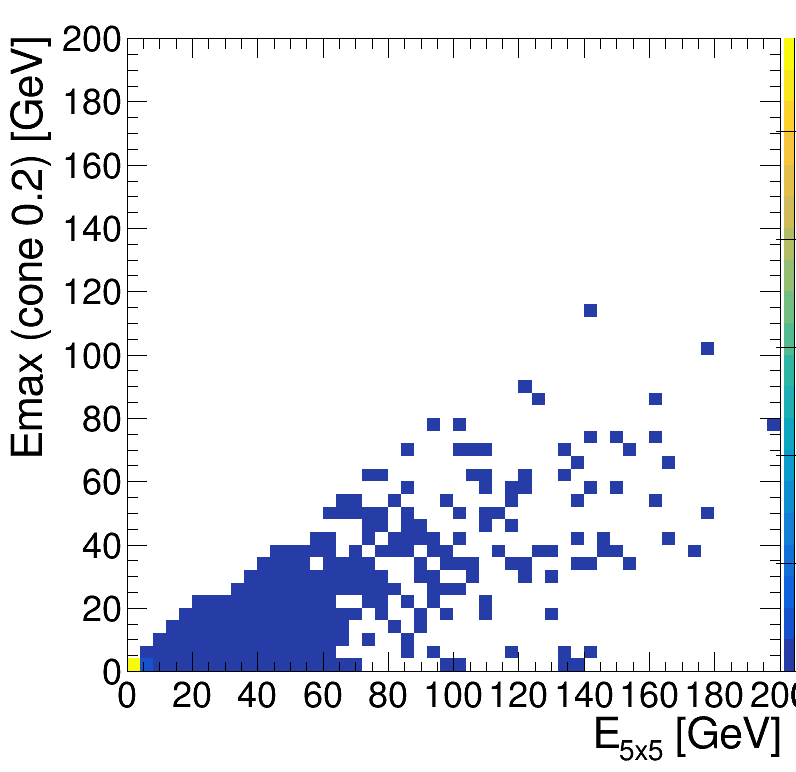

In [307]:
c = rt.TCanvas('c','c', 800, 800)
leg = rt.TLegend(0.18,0.76,0.53,0.94)
leg.SetTextSize(0.022)
leg.SetEntrySeparation(0.01)
gr_1j = {}
gr_2j = {}

i = 0

print('i,j,n,s,m,a')

for k,v in tree.items(): 
    print(k,v)
    
    pho_pz = v['gE5x5_02'].array()
    pho_id = v['gParticleId'].array()
    
    pho_bro_pz = v['gEmax_02'].array()
    pho_bro_id = v['gParticleSiblingId'].array()
  
    pho_mo_id = v['gParticleMotherId'].array()
    
    pho_string = np.logical_and(pho_id==22, pho_mo_id==111)
    pho_bro_string = np.logical_and(pho_bro_id==22, pho_mo_id==111)
    
    pho_pz1 = pho_pz[np.logical_and(pho_string, pho_bro_string)]
    pho_bro_pz1 = pho_bro_pz[np.logical_and(pho_string, pho_bro_string)]
    
    
    
    
#     pho_pz1 = pho_pz[pho_id==22, pho_bro_id==22, pho_mo_id==111]
#     pho_bro_pz1 = pho_pz[pho_id==22, pho_bro_id==22, pho_mo_id==111]
    
#     e = pho_e[:,0]
    pz = pho_pz1.flatten()
    bro_pz = pho_bro_pz1.flatten()
    sample = [pz,bro_pz]
    
#     ht0 = create_TH2D((sample, name='', title=None, binning=[50,-100,100,50,-100,100] )
# #                       #axis_title = ['p_{Z} [GeV]','p_{Z}^{sibling} [GeV]','']
    ht0.SetLineColor(std_color_list[i+1])
    ht0.SetMarkerColor(std_color_list[i+1])
                      
    hz = rt.TH2D(k,k,50,-0,200,50,-0,200)
    hz.GetXaxis().SetTitle('E_{5x5} [GeV]')
    hz.GetYaxis().SetTitle('Emax (cone 0.2) [GeV]')
#     hz[k].SetMarkerColor(std_color_list[i])
        

    for evt,(pz1,pz2) in enumerate(zip(pz,bro_pz)):
        hz.Fill(pz1,pz2)
    
    hz.Draw('colz')
 
    i += 1

# leg.Draw()

# c.SetLogy()
c.Update()
c.Draw()
c.SaveAs(out_dir+'pho_e5x5_emax_2d_02.png')


i,j,n,s,m,a
analyzer-dyll-4FEVT-cluster1000.root <TTree b'ecalTPTree' at 0x7f4e7770c240>


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TROOT::Append>: Replacing existing TH1: analyzer-dyll-4FEVT-cluster1000.root (Potential memory leak).
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190807/pho_e3x3_emax_2d_02.png has been created


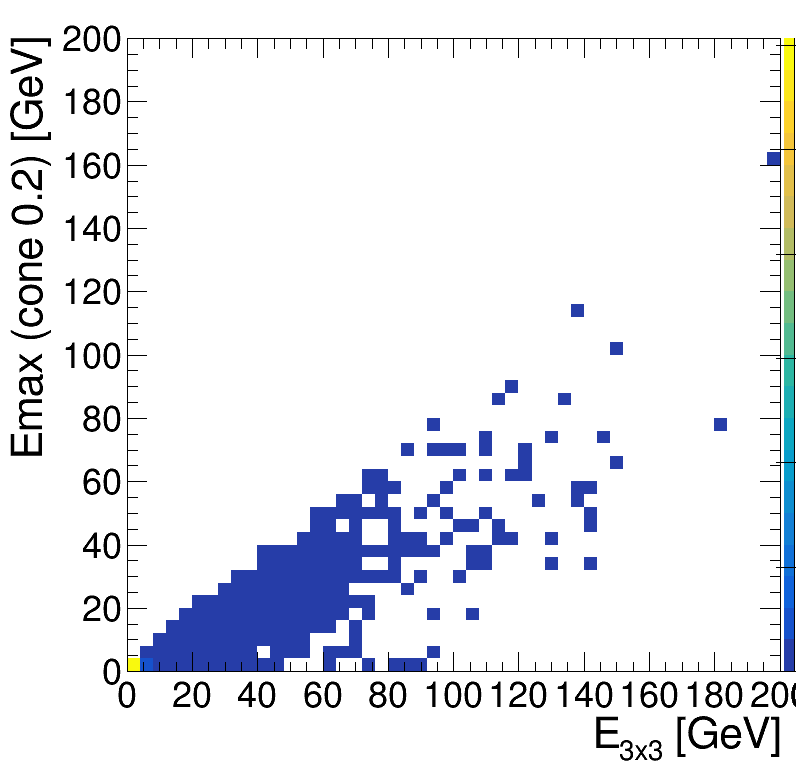

In [308]:
c = rt.TCanvas('c','c', 800, 800)
leg = rt.TLegend(0.18,0.76,0.53,0.94)
leg.SetTextSize(0.022)
leg.SetEntrySeparation(0.01)
gr_1j = {}
gr_2j = {}

i = 0

print('i,j,n,s,m,a')

for k,v in tree.items(): 
    print(k,v)
    
    pho_pz = v['gE3x3_02'].array()
    pho_id = v['gParticleId'].array()
    
    pho_bro_pz = v['gEmax_02'].array()
    pho_bro_id = v['gParticleSiblingId'].array()
  
    pho_mo_id = v['gParticleMotherId'].array()
    
    pho_string = np.logical_and(pho_id==22, pho_mo_id==111)
    pho_bro_string = np.logical_and(pho_bro_id==22, pho_mo_id==111)
    
    pho_pz1 = pho_pz[np.logical_and(pho_string, pho_bro_string)]
    pho_bro_pz1 = pho_bro_pz[np.logical_and(pho_string, pho_bro_string)]
    
    
    
    
#     pho_pz1 = pho_pz[pho_id==22, pho_bro_id==22, pho_mo_id==111]
#     pho_bro_pz1 = pho_pz[pho_id==22, pho_bro_id==22, pho_mo_id==111]
    
#     e = pho_e[:,0]
    pz = pho_pz1.flatten()
    bro_pz = pho_bro_pz1.flatten()
    sample = [pz,bro_pz]
    
#     ht0 = create_TH2D((sample, name='', title=None, binning=[50,-100,100,50,-100,100] )
# #                       #axis_title = ['p_{Z} [GeV]','p_{Z}^{sibling} [GeV]','']
    ht0.SetLineColor(std_color_list[i+1])
    ht0.SetMarkerColor(std_color_list[i+1])
                      
    hz = rt.TH2D(k,k,50,-0,200,50,-0,200)
    hz.GetXaxis().SetTitle('E_{3x3} [GeV]')
    hz.GetYaxis().SetTitle('Emax (cone 0.2) [GeV]')
#     hz[k].SetMarkerColor(std_color_list[i])
        

    for evt,(pz1,pz2) in enumerate(zip(pz,bro_pz)):
        hz.Fill(pz1,pz2)
    
    hz.Draw('colz')
 
    i += 1

# leg.Draw()

# c.SetLogy()
c.Update()
c.Draw()
c.SaveAs(out_dir+'pho_e3x3_emax_2d_02.png')


i,j,n,s,m,a
analyzer-dyll-4FEVT-cluster1000.root <TTree b'ecalTPTree' at 0x7f4e7770c240>


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TROOT::Append>: Replacing existing TH1: analyzer-dyll-4FEVT-cluster1000.root (Potential memory leak).
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190807/pho_e9x9_e5x5_2d_02.png has been created


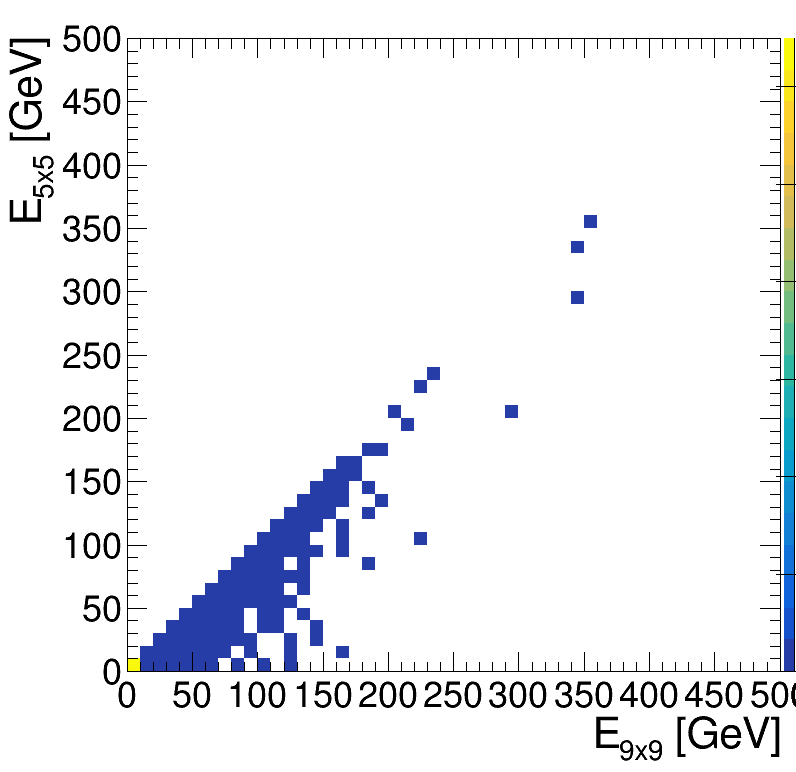

In [310]:
c = rt.TCanvas('c','c', 800, 800)
leg = rt.TLegend(0.18,0.76,0.53,0.94)
leg.SetTextSize(0.022)
leg.SetEntrySeparation(0.01)
gr_1j = {}
gr_2j = {}

i = 0

print('i,j,n,s,m,a')

for k,v in tree.items(): 
    print(k,v)
    
    pho_pz = v['gE9x9_02'].array()
    pho_id = v['gParticleId'].array()
    
    pho_bro_pz = v['gE5x5_02'].array()
    pho_bro_id = v['gParticleSiblingId'].array()
  
    pho_mo_id = v['gParticleMotherId'].array()
    
    pho_string = np.logical_and(pho_id==22, pho_mo_id==111)
    pho_bro_string = np.logical_and(pho_bro_id==22, pho_mo_id==111)
    
    pho_pz1 = pho_pz[np.logical_and(pho_string, pho_bro_string)]
    pho_bro_pz1 = pho_bro_pz[np.logical_and(pho_string, pho_bro_string)]
    
    
    
    
#     pho_pz1 = pho_pz[pho_id==22, pho_bro_id==22, pho_mo_id==111]
#     pho_bro_pz1 = pho_pz[pho_id==22, pho_bro_id==22, pho_mo_id==111]
    
#     e = pho_e[:,0]
    pz = pho_pz1.flatten()
    bro_pz = pho_bro_pz1.flatten()
    sample = [pz,bro_pz]
    
#     ht0 = create_TH2D((sample, name='', title=None, binning=[50,-100,100,50,-100,100] )
# #                       #axis_title = ['p_{Z} [GeV]','p_{Z}^{sibling} [GeV]','']
    ht0.SetLineColor(std_color_list[i+1])
    ht0.SetMarkerColor(std_color_list[i+1])
                      
    hz = rt.TH2D(k,k,50,-0,500,50,-0,500)
    hz.GetXaxis().SetTitle('E_{9x9} [GeV]')
    hz.GetYaxis().SetTitle('E_{5x5} [GeV]')
#     hz[k].SetMarkerColor(std_color_list[i])
        

    for evt,(pz1,pz2) in enumerate(zip(pz,bro_pz)):
        hz.Fill(pz1,pz2)
    
    hz.Draw('colz')
 
    i += 1

# leg.Draw()

# c.SetLogy()
c.Update()
c.Draw()
c.SaveAs(out_dir+'pho_e9x9_e5x5_2d_02.png')


i,j,n,s,m,a
analyzer-dyll-4FEVT-cluster1000.root <TTree b'ecalTPTree' at 0x7f4e7770c240>


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TROOT::Append>: Replacing existing TH1: analyzer-dyll-4FEVT-cluster1000.root (Potential memory leak).
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190807/pho_e9x9_e3x3_2d_02.png has been created


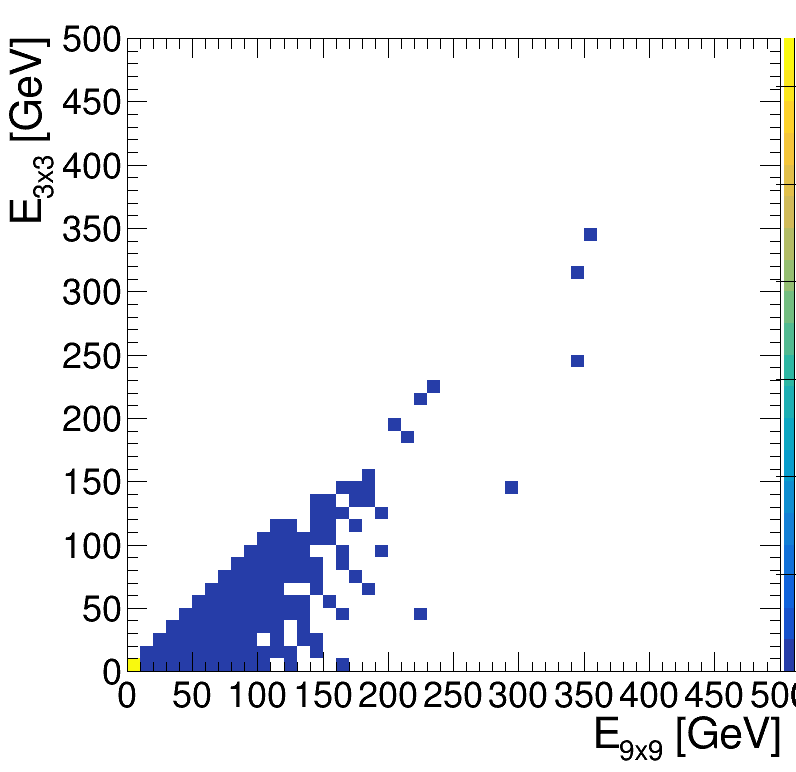

In [311]:
c = rt.TCanvas('c','c', 800, 800)
leg = rt.TLegend(0.18,0.76,0.53,0.94)
leg.SetTextSize(0.022)
leg.SetEntrySeparation(0.01)
gr_1j = {}
gr_2j = {}

i = 0

print('i,j,n,s,m,a')

for k,v in tree.items(): 
    print(k,v)
    
    pho_pz = v['gE9x9_02'].array()
    pho_id = v['gParticleId'].array()
    
    pho_bro_pz = v['gE3x3_02'].array()
    pho_bro_id = v['gParticleSiblingId'].array()
  
    pho_mo_id = v['gParticleMotherId'].array()
    
    pho_string = np.logical_and(pho_id==22, pho_mo_id==111)
    pho_bro_string = np.logical_and(pho_bro_id==22, pho_mo_id==111)
    
    pho_pz1 = pho_pz[np.logical_and(pho_string, pho_bro_string)]
    pho_bro_pz1 = pho_bro_pz[np.logical_and(pho_string, pho_bro_string)]
    
    
    
    
#     pho_pz1 = pho_pz[pho_id==22, pho_bro_id==22, pho_mo_id==111]
#     pho_bro_pz1 = pho_pz[pho_id==22, pho_bro_id==22, pho_mo_id==111]
    
#     e = pho_e[:,0]
    pz = pho_pz1.flatten()
    bro_pz = pho_bro_pz1.flatten()
    sample = [pz,bro_pz]
    
#     ht0 = create_TH2D((sample, name='', title=None, binning=[50,-100,100,50,-100,100] )
# #                       #axis_title = ['p_{Z} [GeV]','p_{Z}^{sibling} [GeV]','']
    ht0.SetLineColor(std_color_list[i+1])
    ht0.SetMarkerColor(std_color_list[i+1])
                      
    hz = rt.TH2D(k,k,50,-0,500,50,-0,500)
    hz.GetXaxis().SetTitle('E_{9x9} [GeV]')
    hz.GetYaxis().SetTitle('E_{3x3} [GeV]')
#     hz[k].SetMarkerColor(std_color_list[i])
        

    for evt,(pz1,pz2) in enumerate(zip(pz,bro_pz)):
        hz.Fill(pz1,pz2)
    
    hz.Draw('colz')
 
    i += 1

# leg.Draw()

# c.SetLogy()
c.Update()
c.Draw()
c.SaveAs(out_dir+'pho_e9x9_e3x3_2d_02.png')


i,j,n,s,m,a
analyzer-dyll-4FEVT-cluster1000.root <TTree b'ecalTPTree' at 0x7f4e7770c240>


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TROOT::Append>: Replacing existing TH1: analyzer-dyll-4FEVT-cluster1000.root (Potential memory leak).
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190807/pho_e5x5_e3x3_2d_02.png has been created


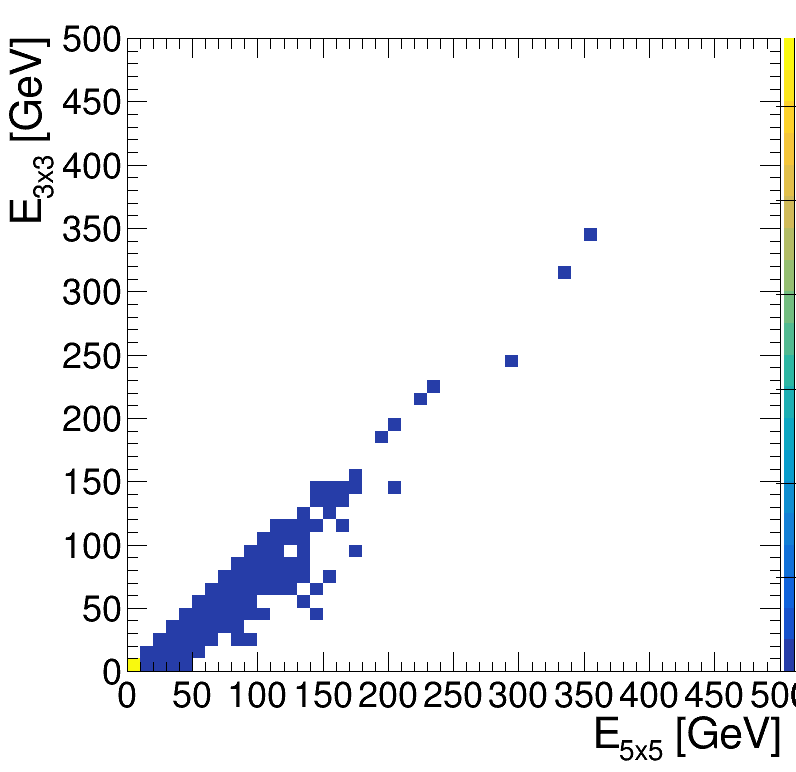

In [312]:
c = rt.TCanvas('c','c', 800, 800)
leg = rt.TLegend(0.18,0.76,0.53,0.94)
leg.SetTextSize(0.022)
leg.SetEntrySeparation(0.01)
gr_1j = {}
gr_2j = {}

i = 0

print('i,j,n,s,m,a')

for k,v in tree.items(): 
    print(k,v)
    
    pho_pz = v['gE5x5_02'].array()
    pho_id = v['gParticleId'].array()
    
    pho_bro_pz = v['gE3x3_02'].array()
    pho_bro_id = v['gParticleSiblingId'].array()
  
    pho_mo_id = v['gParticleMotherId'].array()
    
    pho_string = np.logical_and(pho_id==22, pho_mo_id==111)
    pho_bro_string = np.logical_and(pho_bro_id==22, pho_mo_id==111)
    
    pho_pz1 = pho_pz[np.logical_and(pho_string, pho_bro_string)]
    pho_bro_pz1 = pho_bro_pz[np.logical_and(pho_string, pho_bro_string)]
    
    
    
    
#     pho_pz1 = pho_pz[pho_id==22, pho_bro_id==22, pho_mo_id==111]
#     pho_bro_pz1 = pho_pz[pho_id==22, pho_bro_id==22, pho_mo_id==111]
    
#     e = pho_e[:,0]
    pz = pho_pz1.flatten()
    bro_pz = pho_bro_pz1.flatten()
    sample = [pz,bro_pz]
    
#     ht0 = create_TH2D((sample, name='', title=None, binning=[50,-100,100,50,-100,100] )
# #                       #axis_title = ['p_{Z} [GeV]','p_{Z}^{sibling} [GeV]','']
    ht0.SetLineColor(std_color_list[i+1])
    ht0.SetMarkerColor(std_color_list[i+1])
                      
    hz = rt.TH2D(k,k,50,-0,500,50,-0,500)
    hz.GetXaxis().SetTitle('E_{5x5} [GeV]')
    hz.GetYaxis().SetTitle('E_{3x3} [GeV]')
#     hz[k].SetMarkerColor(std_color_list[i])
        

    for evt,(pz1,pz2) in enumerate(zip(pz,bro_pz)):
        hz.Fill(pz1,pz2)
    
    hz.Draw('colz')
 
    i += 1

# leg.Draw()

# c.SetLogy()
c.Update()
c.Draw()
c.SaveAs(out_dir+'pho_e5x5_e3x3_2d_02.png')


# Cone 0.1

i,j,n,s,m,a
analyzer-dyll-4FEVT-cluster1000.root <TTree b'ecalTPTree' at 0x7f4e7770c240>


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190807/pho_emax_01.png has been created


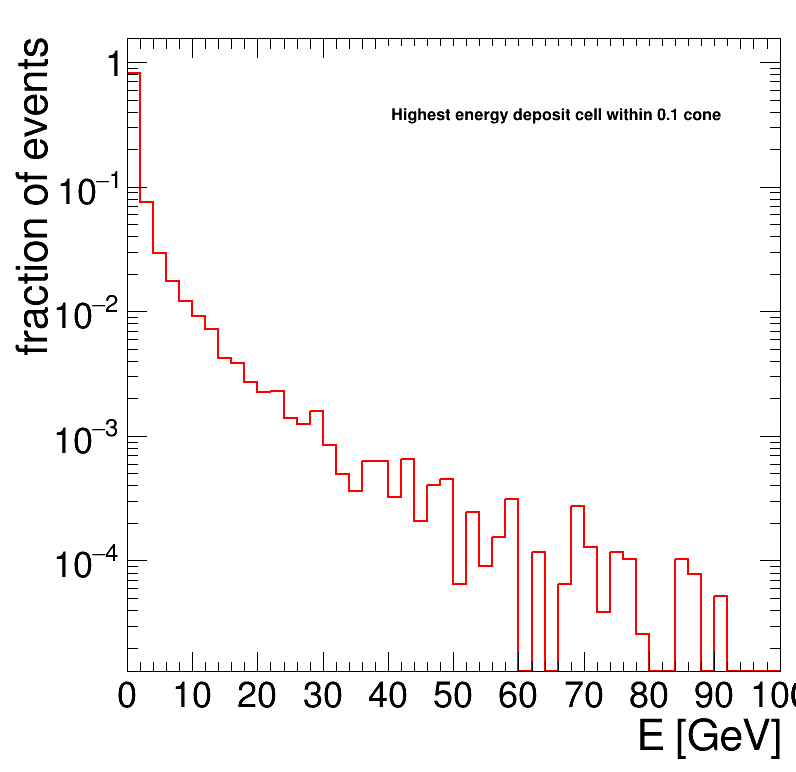

In [292]:
c = rt.TCanvas('c','c', 800, 800)
leg = rt.TLegend(0.48,0.76,0.93,0.94)
leg.SetTextSize(0.022)
leg.SetBorderSize(0)
leg.SetEntrySeparation(0.01)
gr_1j = {}
gr_2j = {}

i = 0

print('i,j,n,s,m,a')

for k,v in tree.items(): 
    print(k,v)
    
    pho_eta = v['gEmax_01'].array()
    pho_id = v['gParticleId'].array()
    pho_mo_id = v['gParticleMotherId'].array()
    
    pho_eta = pho_eta[pho_id==22, pho_mo_id==111]
    
#     eta = pho_eta[:,0]
    eta = pho_eta.flatten()
    
    ht0 = create_TH1D( eta, axis_title=['E [GeV]', 'fraction of events'], name="", binning=[50,-0,100])
    ht0.SetLineColor(std_color_list[i+1])
    ht0.SetMarkerColor(std_color_list[i+1])
    
    ht0.DrawNormalized('')
    
    leg.SetHeader('Highest energy deposit cell within 0.1 cone')

 
    i += 1

leg.Draw()

c.SetLogy()
c.Update()
c.Draw()
c.SaveAs(out_dir+'pho_emax_01.png')


i,j,n,s,m,a
analyzer-dyll-4FEVT-cluster1000.root <TTree b'ecalTPTree' at 0x7f4e7770c240>


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TROOT::Append>: Replacing existing TH1: analyzer-dyll-4FEVT-cluster1000.root (Potential memory leak).
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190807/pho_e_emax_2d_01.png has been created


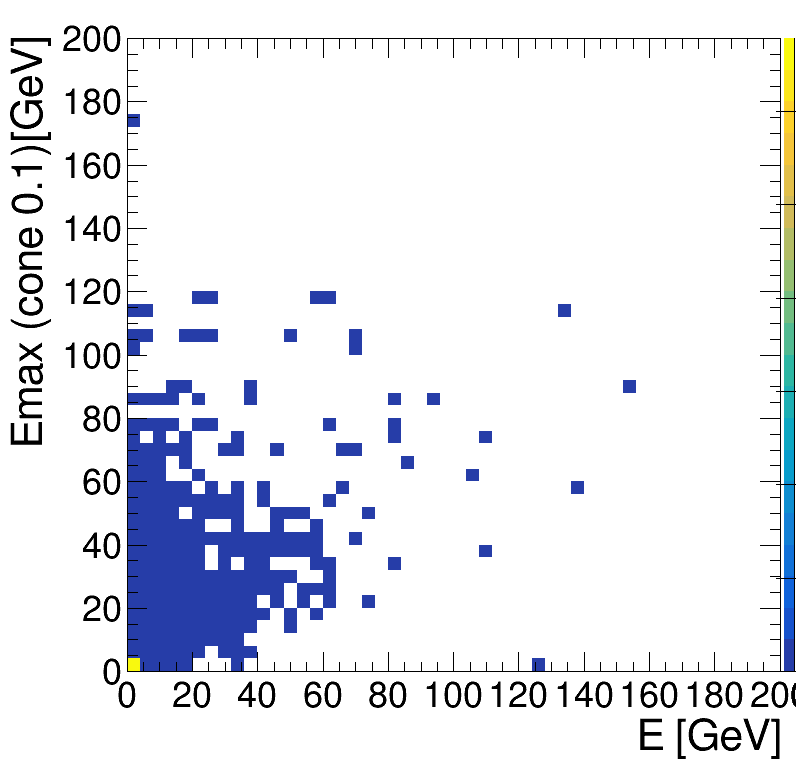

In [302]:
c = rt.TCanvas('c','c', 800, 800)
leg = rt.TLegend(0.18,0.76,0.53,0.94)
leg.SetTextSize(0.022)
leg.SetEntrySeparation(0.01)
gr_1j = {}
gr_2j = {}

i = 0

print('i,j,n,s,m,a')

for k,v in tree.items(): 
    print(k,v)
    
    pho_pz = v['gParticleE'].array()
    pho_id = v['gParticleId'].array()
    
    pho_bro_pz = v['gEmax_01'].array()
    pho_bro_id = v['gParticleSiblingId'].array()
  
    pho_mo_id = v['gParticleMotherId'].array()
    
    pho_string = np.logical_and(pho_id==22, pho_mo_id==111)
    pho_bro_string = np.logical_and(pho_bro_id==22, pho_mo_id==111)
    
    pho_pz1 = pho_pz[np.logical_and(pho_string, pho_bro_string)]
    pho_bro_pz1 = pho_bro_pz[np.logical_and(pho_string, pho_bro_string)]
    
    
    
    
#     pho_pz1 = pho_pz[pho_id==22, pho_bro_id==22, pho_mo_id==111]
#     pho_bro_pz1 = pho_pz[pho_id==22, pho_bro_id==22, pho_mo_id==111]
    
#     e = pho_e[:,0]
    pz = pho_pz1.flatten()
    bro_pz = pho_bro_pz1.flatten()
    sample = [pz,bro_pz]
    
#     ht0 = create_TH2D((sample, name='', title=None, binning=[50,-100,100,50,-100,100] )
# #                       #axis_title = ['p_{Z} [GeV]','p_{Z}^{sibling} [GeV]','']
    ht0.SetLineColor(std_color_list[i+1])
    ht0.SetMarkerColor(std_color_list[i+1])
                      
    hz = rt.TH2D(k,k,50,-0,200,50,-0,200)
    hz.GetXaxis().SetTitle('E [GeV]')
    hz.GetYaxis().SetTitle('Emax (cone 0.1)[GeV]')
#     hz[k].SetMarkerColor(std_color_list[i])
        

    for evt,(pz1,pz2) in enumerate(zip(pz,bro_pz)):
        hz.Fill(pz1,pz2)
    
    hz.Draw('colz')
 
    i += 1

# leg.Draw()

# c.SetLogy()
c.Update()
c.Draw()
c.SaveAs(out_dir+'pho_e_emax_2d_01.png')


i,j,n,s,m,a
analyzer-dyll-4FEVT-pi0cluster1000.root <TTree b'ecalTPTree' at 0x7efd1de58f60>


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
python ERROR: cannot open image file "/nfshome/jmao/cms-llp/plots/20190800/pho_emax_0102.png" for writing. Please check permissions.
Error in <TASImage::WriteImage>: error writing file /nfshome/jmao/cms-llp/plots/20190800/pho_emax_0102.png


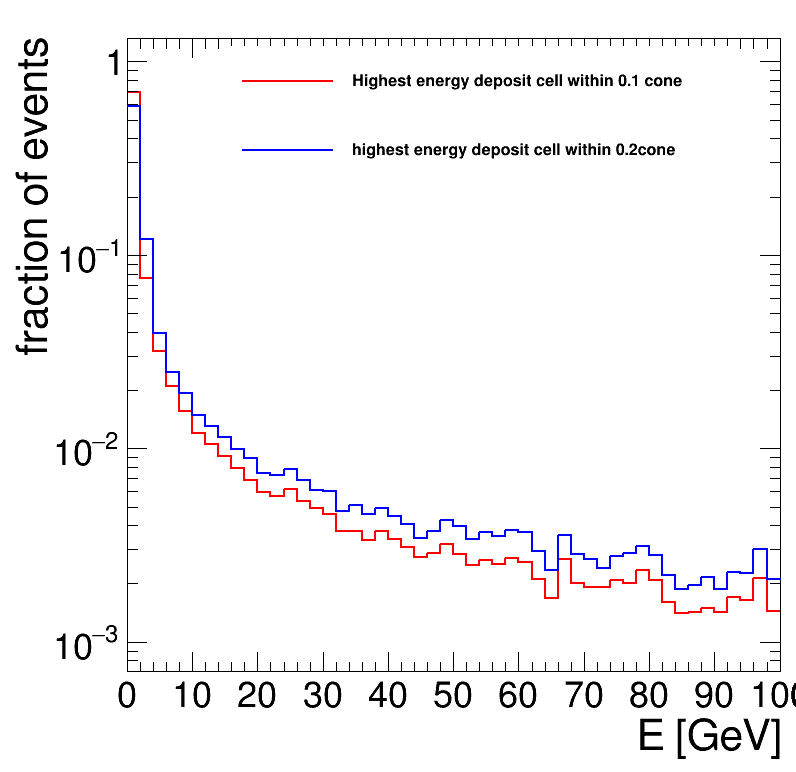

In [8]:
c = rt.TCanvas('c','c', 800, 800)
leg = rt.TLegend(0.28,0.76,0.93,0.94)
leg.SetTextSize(0.022)
leg.SetBorderSize(0)
leg.SetEntrySeparation(0.01)
gr_1j = {}
gr_2j = {}

i = 0

print('i,j,n,s,m,a')

for k,v in tree.items(): 
    print(k,v)
    
    pho_eta1 = v['gEmax_01'].array()
    pho_eta2 = v['gEmax_02'].array()
    pho_id = v['gParticleId'].array()
    pho_mo_id = v['gParticleMotherId'].array()
    
    pho_eta1 = pho_eta1[pho_id==22, pho_mo_id==111]
    pho_eta2 = pho_eta2[pho_id==22, pho_mo_id==111]
    
#     eta = pho_eta[:,0]
    eta1 = pho_eta1.flatten()
    eta2 = pho_eta2.flatten()
    
    ht0 = create_TH1D( eta1, axis_title=['E [GeV]', 'fraction of events'], name="", binning=[50,-0,100])
    ht0.SetLineColor(std_color_list[i+1])
    ht0.SetMarkerColor(std_color_list[i+1])
    
    ht0.DrawNormalized('')
    
    leg.AddEntry(ht0,'Highest energy deposit cell within 0.1 cone')
    
    ht1 = create_TH1D( eta2, axis_title=['E [GeV]', 'fraction of events'], name="", binning=[50,-0,100])
    ht1.SetLineColor(std_color_list[i+2])
    ht1.SetMarkerColor(std_color_list[i+2])
    
    ht1.DrawNormalized('same')
    
    leg.AddEntry(ht1,'highest energy deposit cell within 0.2cone')

 
    i += 1

leg.Draw()

c.SetLogy()
c.Update()
c.Draw()
c.SaveAs(out_dir+'pho_emax_0102.png')


i,j,n,s,m,a
analyzer-dyll-4FEVT-pi0cluster1000.root <TTree b'ecalTPTree' at 0x7efd1de58f60>


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
python ERROR: cannot open image file "/nfshome/jmao/cms-llp/plots/20190800/pho_01.png" for writing. Please check permissions.
Error in <TASImage::WriteImage>: error writing file /nfshome/jmao/cms-llp/plots/20190800/pho_01.png


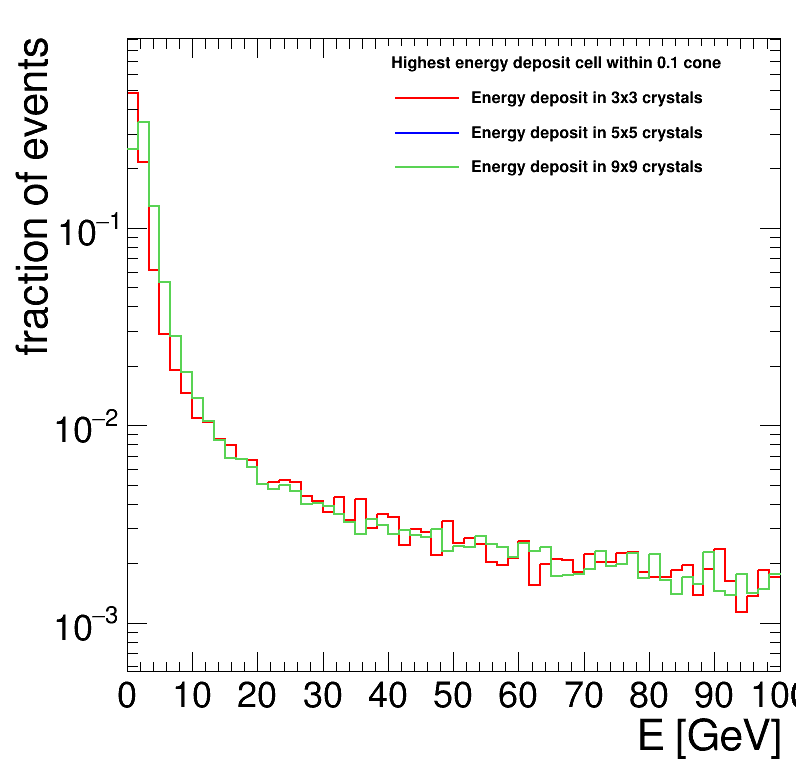

In [9]:
c = rt.TCanvas('c','c', 800, 800)
leg = rt.TLegend(0.48,0.76,0.93,0.94)
leg.SetTextSize(0.022)
leg.SetBorderSize(0)
leg.SetEntrySeparation(0.01)
gr_1j = {}
gr_2j = {}

i = 0

print('i,j,n,s,m,a')

for k,v in tree.items(): 
    print(k,v)
    
    pho_eta1 = v['gE3x3_01'].array()
    pho_eta2 = v['gE5x5_01'].array()
    pho_eta3 = v['gE9x9_01'].array()
    pho_id = v['gParticleId'].array()
    pho_mo_id = v['gParticleMotherId'].array()
    
    pho_eta1 = pho_eta1[pho_id==22, pho_mo_id==111]
    pho_eta2 = pho_eta3[pho_id==22, pho_mo_id==111]
    pho_eta3 = pho_eta3[pho_id==22, pho_mo_id==111]
    
#     eta = pho_eta[:,0]
    eta1 = pho_eta1.flatten()
    eta2 = pho_eta2.flatten()
    eta3 = pho_eta3.flatten()
    
    ht1 = create_TH1D( eta1, axis_title=['E [GeV]', 'fraction of events'], name="", binning=[60,-0,100])
    ht2 = create_TH1D( eta2, axis_title=['E [GeV]', 'fraction of events'], name="", binning=[60,-0,100])
    ht3 = create_TH1D( eta3, axis_title=['E [GeV]', 'fraction of events'], name="", binning=[60,-0,100])
    ht1.SetLineColor(std_color_list[i+1])
    ht2.SetLineColor(std_color_list[i+2])
    ht3.SetLineColor(std_color_list[i+3])
    ht1.SetMarkerColor(std_color_list[i+1])
    ht2.SetMarkerColor(std_color_list[i+2])
    ht3.SetMarkerColor(std_color_list[i+3])
    
    ht1.DrawNormalized('same')
    ht2.DrawNormalized('same')
    ht3.DrawNormalized('same')
    
    leg.SetHeader('Highest energy deposit cell within 0.1 cone')
    leg.AddEntry(ht1,'Energy deposit in 3x3 crystals')
    leg.AddEntry(ht2,'Energy deposit in 5x5 crystals')
    leg.AddEntry(ht3,'Energy deposit in 9x9 crystals')
 
    i += 1

leg.Draw()

c.SetLogy()
c.Update()
c.Draw()
c.SaveAs(out_dir+'pho_01.png')


i,j,n,s,m,a
analyzer-dyll-4FEVT-cluster1000.root <TTree b'ecalTPTree' at 0x7f4e7770c240>


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TROOT::Append>: Replacing existing TH1: analyzer-dyll-4FEVT-cluster1000.root (Potential memory leak).
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190807/pho_e9x9_e_2d_01.png has been created


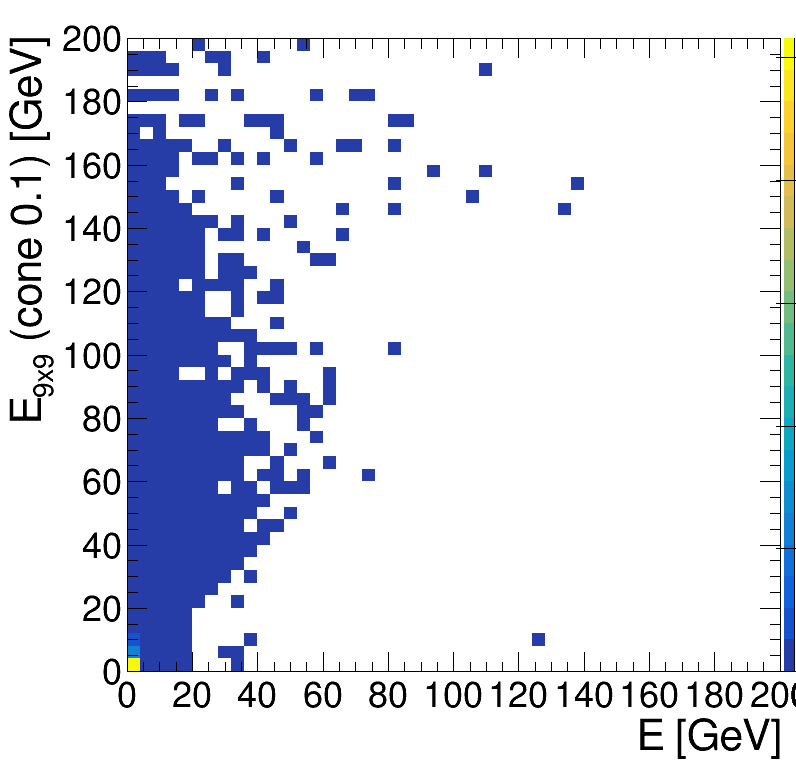

In [342]:
c = rt.TCanvas('c','c', 800, 800)
leg = rt.TLegend(0.18,0.76,0.53,0.94)
leg.SetTextSize(0.022)
leg.SetEntrySeparation(0.01)
gr_1j = {}
gr_2j = {}

i = 0

print('i,j,n,s,m,a')

for k,v in tree.items(): 
    print(k,v)
    
    pho_bro_pz = v['gE9x9_01'].array()
    pho_id = v['gParticleId'].array()
    
    pho_pz = v['gParticleE'].array()
    pho_bro_id = v['gParticleSiblingId'].array()
  
    pho_mo_id = v['gParticleMotherId'].array()
    
    pho_string = np.logical_and(pho_id==22, pho_mo_id==111)
    pho_bro_string = np.logical_and(pho_bro_id==22, pho_mo_id==111)
    
    pho_pz1 = pho_pz[np.logical_and(pho_string, pho_bro_string)]
    pho_bro_pz1 = pho_bro_pz[np.logical_and(pho_string, pho_bro_string)]
    
    
    
    
#     pho_pz1 = pho_pz[pho_id==22, pho_bro_id==22, pho_mo_id==111]
#     pho_bro_pz1 = pho_pz[pho_id==22, pho_bro_id==22, pho_mo_id==111]
    
#     e = pho_e[:,0]
    pz = pho_pz1.flatten()
    bro_pz = pho_bro_pz1.flatten()
    sample = [pz,bro_pz]
    
#     ht0 = create_TH2D((sample, name='', title=None, binning=[50,-100,100,50,-100,100] )
# #                       #axis_title = ['p_{Z} [GeV]','p_{Z}^{sibling} [GeV]','']
    ht0.SetLineColor(std_color_list[i+1])
    ht0.SetMarkerColor(std_color_list[i+1])
                      
    hz = rt.TH2D(k,k,50,-0,200,50,-0,200)
    hz.GetYaxis().SetTitle('E_{9x9} (cone 0.1) [GeV]')
    hz.GetXaxis().SetTitle('E [GeV]')
#     hz[k].SetMarkerColor(std_color_list[i])
        

    for evt,(pz1,pz2) in enumerate(zip(pz,bro_pz)):
        hz.Fill(pz1,pz2)
    
    hz.Draw('colz')
 
    i += 1

# leg.Draw()

# c.SetLogy()
c.Update()
c.Draw()
c.SaveAs(out_dir+'pho_e9x9_e_2d_01.png')


i,j,n,s,m,a
analyzer-dyll-4FEVT-cluster1000.root <TTree b'ecalTPTree' at 0x7f4e7770c240>


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TROOT::Append>: Replacing existing TH1: analyzer-dyll-4FEVT-cluster1000.root (Potential memory leak).
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190807/pho_e5x5_e_2d_01.png has been created


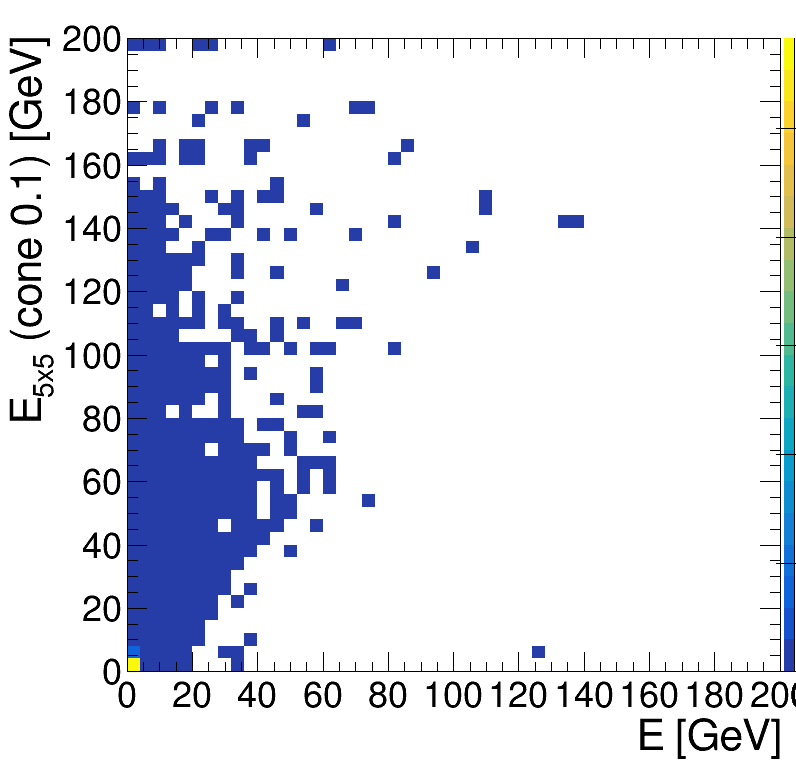

In [341]:
c = rt.TCanvas('c','c', 800, 800)
leg = rt.TLegend(0.18,0.76,0.53,0.94)
leg.SetTextSize(0.022)
leg.SetEntrySeparation(0.01)
gr_1j = {}
gr_2j = {}

i = 0

print('i,j,n,s,m,a')

for k,v in tree.items(): 
    print(k,v)
    
    pho_bro_pz = v['gE5x5_01'].array()
    pho_id = v['gParticleId'].array()
    
    pho_pz = v['gParticleE'].array()
    pho_bro_id = v['gParticleSiblingId'].array()
  
    pho_mo_id = v['gParticleMotherId'].array()
    
    pho_string = np.logical_and(pho_id==22, pho_mo_id==111)
    pho_bro_string = np.logical_and(pho_bro_id==22, pho_mo_id==111)
    
    pho_pz1 = pho_pz[np.logical_and(pho_string, pho_bro_string)]
    pho_bro_pz1 = pho_bro_pz[np.logical_and(pho_string, pho_bro_string)]
    
    
    
    
#     pho_pz1 = pho_pz[pho_id==22, pho_bro_id==22, pho_mo_id==111]
#     pho_bro_pz1 = pho_pz[pho_id==22, pho_bro_id==22, pho_mo_id==111]
    
#     e = pho_e[:,0]
    pz = pho_pz1.flatten()
    bro_pz = pho_bro_pz1.flatten()
    sample = [pz,bro_pz]
    
#     ht0 = create_TH2D((sample, name='', title=None, binning=[50,-100,100,50,-100,100] )
# #                       #axis_title = ['p_{Z} [GeV]','p_{Z}^{sibling} [GeV]','']
    ht0.SetLineColor(std_color_list[i+1])
    ht0.SetMarkerColor(std_color_list[i+1])
                      
    hz = rt.TH2D(k,k,50,-0,200,50,-0,200)
    hz.GetYaxis().SetTitle('E_{5x5} (cone 0.1) [GeV]')
    hz.GetXaxis().SetTitle('E [GeV]')
#     hz[k].SetMarkerColor(std_color_list[i])
        

    for evt,(pz1,pz2) in enumerate(zip(pz,bro_pz)):
        hz.Fill(pz1,pz2)
    
    hz.Draw('colz')
 
    i += 1

# leg.Draw()

# c.SetLogy()
c.Update()
c.Draw()
c.SaveAs(out_dir+'pho_e5x5_e_2d_01.png')


i,j,n,s,m,a
analyzer-dyll-4FEVT-cluster1000.root <TTree b'ecalTPTree' at 0x7f4e7770c240>


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TROOT::Append>: Replacing existing TH1: analyzer-dyll-4FEVT-cluster1000.root (Potential memory leak).
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190807/pho_e5x5_emax_2d_01.png has been created


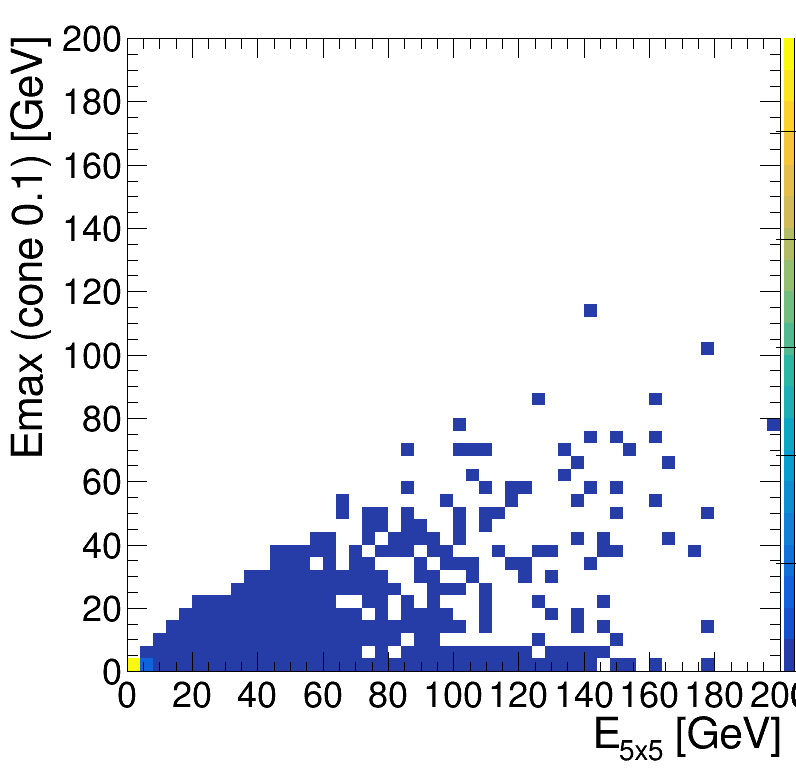

In [314]:
c = rt.TCanvas('c','c', 800, 800)
leg = rt.TLegend(0.18,0.76,0.53,0.94)
leg.SetTextSize(0.022)
leg.SetEntrySeparation(0.01)
gr_1j = {}
gr_2j = {}

i = 0

print('i,j,n,s,m,a')

for k,v in tree.items(): 
    print(k,v)
    
    pho_pz = v['gE5x5_01'].array()
    pho_id = v['gParticleId'].array()
    
    pho_bro_pz = v['gE5x5_01'].array()
    pho_bro_id = v['gParticleSiblingId'].array()
  
    pho_mo_id = v['gParticleMotherId'].array()
    
    pho_string = np.logical_and(pho_id==22, pho_mo_id==111)
    pho_bro_string = np.logical_and(pho_bro_id==22, pho_mo_id==111)
    
    pho_pz1 = pho_pz[np.logical_and(pho_string, pho_bro_string)]
    pho_bro_pz1 = pho_bro_pz[np.logical_and(pho_string, pho_bro_string)]
    
    
    
    
#     pho_pz1 = pho_pz[pho_id==22, pho_bro_id==22, pho_mo_id==111]
#     pho_bro_pz1 = pho_pz[pho_id==22, pho_bro_id==22, pho_mo_id==111]
    
#     e = pho_e[:,0]
    pz = pho_pz1.flatten()
    bro_pz = pho_bro_pz1.flatten()
    sample = [pz,bro_pz]
    
#     ht0 = create_TH2D((sample, name='', title=None, binning=[50,-100,100,50,-100,100] )
# #                       #axis_title = ['p_{Z} [GeV]','p_{Z}^{sibling} [GeV]','']
    ht0.SetLineColor(std_color_list[i+1])
    ht0.SetMarkerColor(std_color_list[i+1])
                      
    hz = rt.TH2D(k,k,50,-0,200,50,-0,200)
    hz.GetXaxis().SetTitle('E_{5x5} [GeV]')
    hz.GetYaxis().SetTitle('Emax (cone 0.1) [GeV]')
#     hz[k].SetMarkerColor(std_color_list[i])
        

    for evt,(pz1,pz2) in enumerate(zip(pz,bro_pz)):
        hz.Fill(pz1,pz2)
    
    hz.Draw('colz')
 
    i += 1

# leg.Draw()

# c.SetLogy()
c.Update()
c.Draw()
c.SaveAs(out_dir+'pho_e5x5_emax_2d_01.png')


i,j,n,s,m,a
analyzer-dyll-4FEVT-cluster1000.root <TTree b'ecalTPTree' at 0x7f4e7770c240>


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TROOT::Append>: Replacing existing TH1: analyzer-dyll-4FEVT-cluster1000.root (Potential memory leak).
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190807/pho_e3x3_emax_2d_01.png has been created


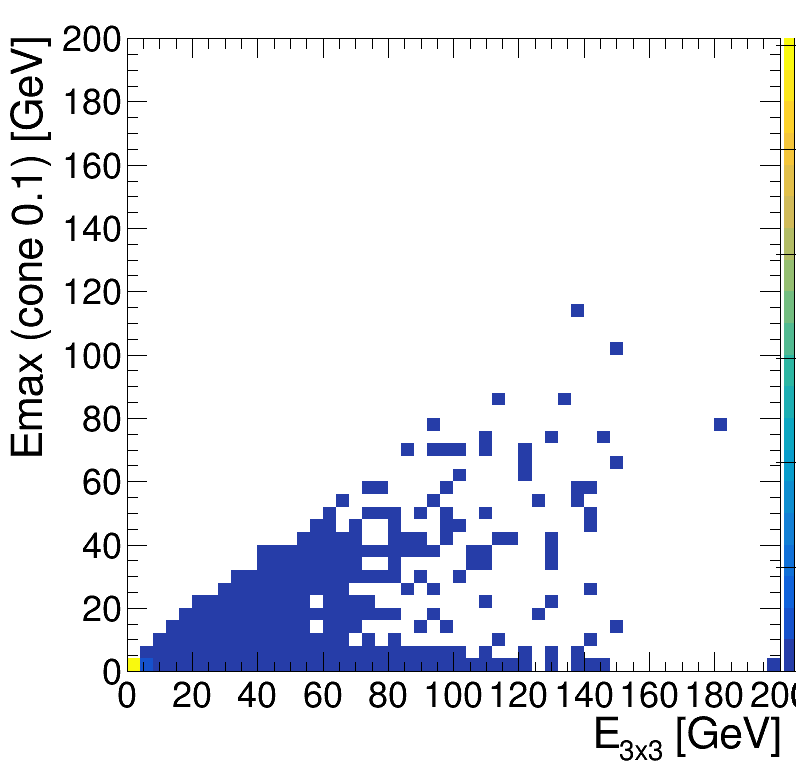

In [315]:
c = rt.TCanvas('c','c', 800, 800)
leg = rt.TLegend(0.18,0.76,0.53,0.94)
leg.SetTextSize(0.022)
leg.SetEntrySeparation(0.01)
gr_1j = {}
gr_2j = {}

i = 0

print('i,j,n,s,m,a')

for k,v in tree.items(): 
    print(k,v)
    
    pho_pz = v['gE3x3_01'].array()
    pho_id = v['gParticleId'].array()
    
    pho_bro_pz = v['gEmax_01'].array()
    pho_bro_id = v['gParticleSiblingId'].array()
  
    pho_mo_id = v['gParticleMotherId'].array()
    
    pho_string = np.logical_and(pho_id==22, pho_mo_id==111)
    pho_bro_string = np.logical_and(pho_bro_id==22, pho_mo_id==111)
    
    pho_pz1 = pho_pz[np.logical_and(pho_string, pho_bro_string)]
    pho_bro_pz1 = pho_bro_pz[np.logical_and(pho_string, pho_bro_string)]
    
    
    
    
#     pho_pz1 = pho_pz[pho_id==22, pho_bro_id==22, pho_mo_id==111]
#     pho_bro_pz1 = pho_pz[pho_id==22, pho_bro_id==22, pho_mo_id==111]
    
#     e = pho_e[:,0]
    pz = pho_pz1.flatten()
    bro_pz = pho_bro_pz1.flatten()
    sample = [pz,bro_pz]
    
#     ht0 = create_TH2D((sample, name='', title=None, binning=[50,-100,100,50,-100,100] )
# #                       #axis_title = ['p_{Z} [GeV]','p_{Z}^{sibling} [GeV]','']
    ht0.SetLineColor(std_color_list[i+1])
    ht0.SetMarkerColor(std_color_list[i+1])
                      
    hz = rt.TH2D(k,k,50,-0,200,50,-0,200)
    hz.GetXaxis().SetTitle('E_{3x3} [GeV]')
    hz.GetYaxis().SetTitle('Emax (cone 0.1) [GeV]')
#     hz[k].SetMarkerColor(std_color_list[i])
        

    for evt,(pz1,pz2) in enumerate(zip(pz,bro_pz)):
        hz.Fill(pz1,pz2)
    
    hz.Draw('colz')
 
    i += 1

# leg.Draw()

# c.SetLogy()
c.Update()
c.Draw()
c.SaveAs(out_dir+'pho_e3x3_emax_2d_01.png')


i,j,n,s,m,a
analyzer-dyll-4FEVT-cluster1000.root <TTree b'ecalTPTree' at 0x7f4e7770c240>


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TROOT::Append>: Replacing existing TH1: analyzer-dyll-4FEVT-cluster1000.root (Potential memory leak).
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190807/pho_e3x3_e_2d_01.png has been created


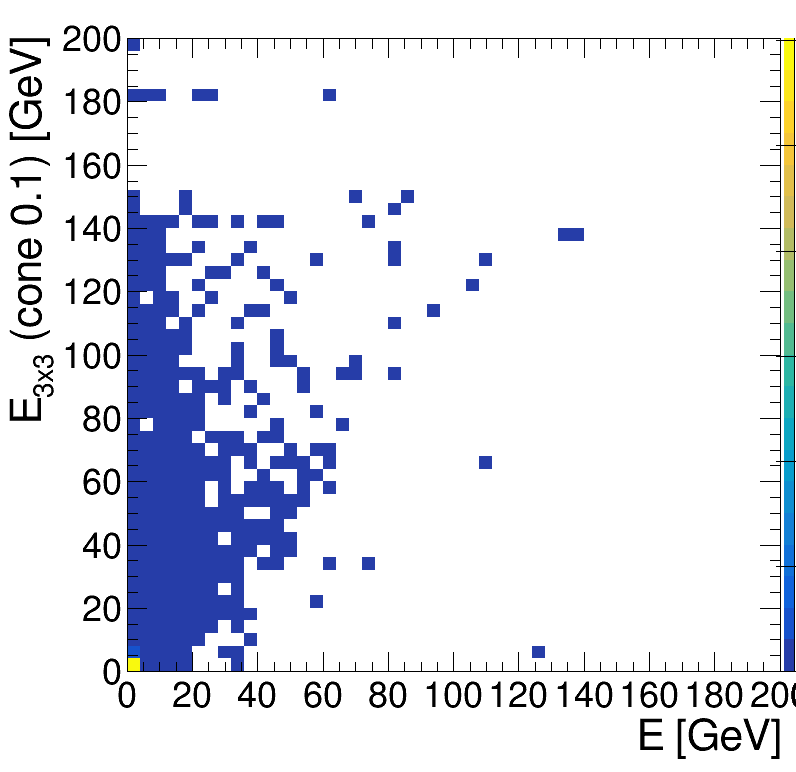

In [340]:
c = rt.TCanvas('c','c', 800, 800)
leg = rt.TLegend(0.18,0.76,0.53,0.94)
leg.SetTextSize(0.022)
leg.SetEntrySeparation(0.01)
gr_1j = {}
gr_2j = {}

i = 0

print('i,j,n,s,m,a')

for k,v in tree.items(): 
    print(k,v)
    
    pho_bro_pz = v['gE3x3_01'].array()
    pho_id = v['gParticleId'].array()
    
    pho_pz = v['gParticleE'].array()
    pho_bro_id = v['gParticleSiblingId'].array()
  
    pho_mo_id = v['gParticleMotherId'].array()
    
    pho_string = np.logical_and(pho_id==22, pho_mo_id==111)
    pho_bro_string = np.logical_and(pho_bro_id==22, pho_mo_id==111)
    
    pho_pz1 = pho_pz[np.logical_and(pho_string, pho_bro_string)]
    pho_bro_pz1 = pho_bro_pz[np.logical_and(pho_string, pho_bro_string)]
    
    
    
    
#     pho_pz1 = pho_pz[pho_id==22, pho_bro_id==22, pho_mo_id==111]
#     pho_bro_pz1 = pho_pz[pho_id==22, pho_bro_id==22, pho_mo_id==111]
    
#     e = pho_e[:,0]
    pz = pho_pz1.flatten()
    bro_pz = pho_bro_pz1.flatten()
    sample = [pz,bro_pz]
    
#     ht0 = create_TH2D((sample, name='', title=None, binning=[50,-100,100,50,-100,100] )
# #                       #axis_title = ['p_{Z} [GeV]','p_{Z}^{sibling} [GeV]','']
    ht0.SetLineColor(std_color_list[i+1])
    ht0.SetMarkerColor(std_color_list[i+1])
                      
    hz = rt.TH2D(k,k,50,-0,200,50,-0,200)
    hz.GetYaxis().SetTitle('E_{3x3} (cone 0.1) [GeV]')
    hz.GetXaxis().SetTitle('E [GeV]')
#     hz[k].SetMarkerColor(std_color_list[i])
        

    for evt,(pz1,pz2) in enumerate(zip(pz,bro_pz)):
        hz.Fill(pz1,pz2)
    
    hz.Draw('colz')
 
    i += 1

# leg.Draw()

# c.SetLogy()
c.Update()
c.Draw()
c.SaveAs(out_dir+'pho_e3x3_e_2d_01.png')


i,j,n,s,m,a
analyzer-dyll-4FEVT-cluster1000.root <TTree b'ecalTPTree' at 0x7f4e7770c240>


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TROOT::Append>: Replacing existing TH1: analyzer-dyll-4FEVT-cluster1000.root (Potential memory leak).
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190807/pho_e9x9_emax_2d_01.png has been created


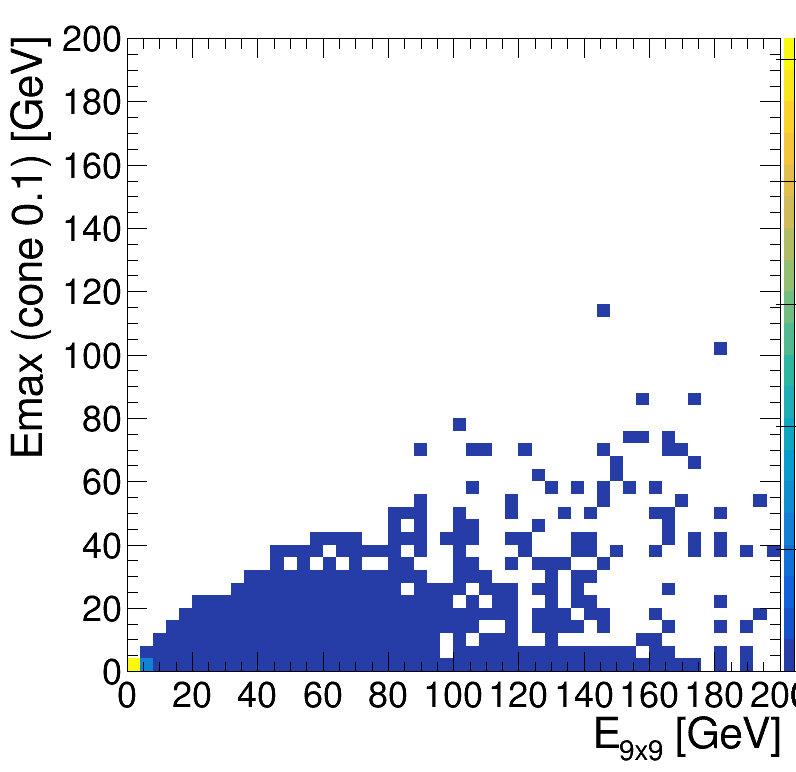

In [313]:
c = rt.TCanvas('c','c', 800, 800)
leg = rt.TLegend(0.18,0.76,0.53,0.94)
leg.SetTextSize(0.022)
leg.SetEntrySeparation(0.01)
gr_1j = {}
gr_2j = {}

i = 0

print('i,j,n,s,m,a')

for k,v in tree.items(): 
    print(k,v)
    
    pho_pz = v['gE9x9_01'].array()
    pho_id = v['gParticleId'].array()
    
    pho_bro_pz = v['gEmax_01'].array()
    pho_bro_id = v['gParticleSiblingId'].array()
  
    pho_mo_id = v['gParticleMotherId'].array()
    
    pho_string = np.logical_and(pho_id==22, pho_mo_id==111)
    pho_bro_string = np.logical_and(pho_bro_id==22, pho_mo_id==111)
    
    pho_pz1 = pho_pz[np.logical_and(pho_string, pho_bro_string)]
    pho_bro_pz1 = pho_bro_pz[np.logical_and(pho_string, pho_bro_string)]
    
    
    
    
#     pho_pz1 = pho_pz[pho_id==22, pho_bro_id==22, pho_mo_id==111]
#     pho_bro_pz1 = pho_pz[pho_id==22, pho_bro_id==22, pho_mo_id==111]
    
#     e = pho_e[:,0]
    pz = pho_pz1.flatten()
    bro_pz = pho_bro_pz1.flatten()
    sample = [pz,bro_pz]
    
#     ht0 = create_TH2D((sample, name='', title=None, binning=[50,-100,100,50,-100,100] )
# #                       #axis_title = ['p_{Z} [GeV]','p_{Z}^{sibling} [GeV]','']
    ht0.SetLineColor(std_color_list[i+1])
    ht0.SetMarkerColor(std_color_list[i+1])
                      
    hz = rt.TH2D(k,k,50,-0,200,50,-0,200)
    hz.GetXaxis().SetTitle('E_{9x9} [GeV]')
    hz.GetYaxis().SetTitle('Emax (cone 0.1) [GeV]')
#     hz[k].SetMarkerColor(std_color_list[i])
        

    for evt,(pz1,pz2) in enumerate(zip(pz,bro_pz)):
        hz.Fill(pz1,pz2)
    
    hz.Draw('colz')
 
    i += 1

# leg.Draw()

# c.SetLogy()
c.Update()
c.Draw()
c.SaveAs(out_dir+'pho_e9x9_emax_2d_01.png')


i,j,n,s,m,a
analyzer-dyll-4FEVT-cluster1000.root <TTree b'ecalTPTree' at 0x7f4e7770c240>


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TROOT::Append>: Replacing existing TH1: analyzer-dyll-4FEVT-cluster1000.root (Potential memory leak).
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190807/pho_e5x5_emax_2d_01.png has been created


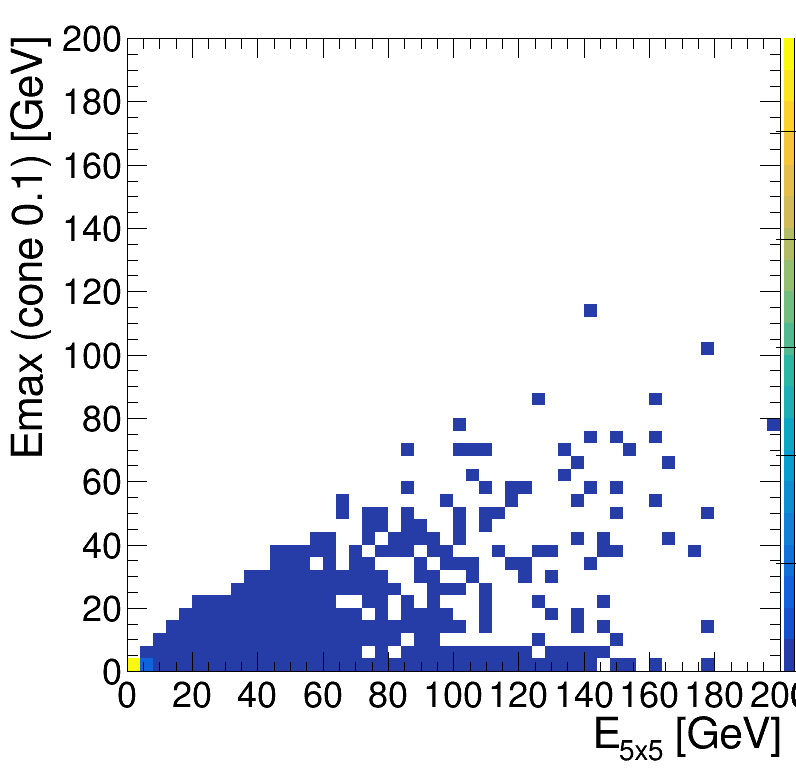

In [314]:
c = rt.TCanvas('c','c', 800, 800)
leg = rt.TLegend(0.18,0.76,0.53,0.94)
leg.SetTextSize(0.022)
leg.SetEntrySeparation(0.01)
gr_1j = {}
gr_2j = {}

i = 0

print('i,j,n,s,m,a')

for k,v in tree.items(): 
    print(k,v)
    
    pho_pz = v['gE5x5_01'].array()
    pho_id = v['gParticleId'].array()
    
    pho_bro_pz = v['gEmax_01'].array()
    pho_bro_id = v['gParticleSiblingId'].array()
  
    pho_mo_id = v['gParticleMotherId'].array()
    
    pho_string = np.logical_and(pho_id==22, pho_mo_id==111)
    pho_bro_string = np.logical_and(pho_bro_id==22, pho_mo_id==111)
    
    pho_pz1 = pho_pz[np.logical_and(pho_string, pho_bro_string)]
    pho_bro_pz1 = pho_bro_pz[np.logical_and(pho_string, pho_bro_string)]
    
    
    
    
#     pho_pz1 = pho_pz[pho_id==22, pho_bro_id==22, pho_mo_id==111]
#     pho_bro_pz1 = pho_pz[pho_id==22, pho_bro_id==22, pho_mo_id==111]
    
#     e = pho_e[:,0]
    pz = pho_pz1.flatten()
    bro_pz = pho_bro_pz1.flatten()
    sample = [pz,bro_pz]
    
#     ht0 = create_TH2D((sample, name='', title=None, binning=[50,-100,100,50,-100,100] )
# #                       #axis_title = ['p_{Z} [GeV]','p_{Z}^{sibling} [GeV]','']
    ht0.SetLineColor(std_color_list[i+1])
    ht0.SetMarkerColor(std_color_list[i+1])
                      
    hz = rt.TH2D(k,k,50,-0,200,50,-0,200)
    hz.GetXaxis().SetTitle('E_{5x5} [GeV]')
    hz.GetYaxis().SetTitle('Emax (cone 0.1) [GeV]')
#     hz[k].SetMarkerColor(std_color_list[i])
        

    for evt,(pz1,pz2) in enumerate(zip(pz,bro_pz)):
        hz.Fill(pz1,pz2)
    
    hz.Draw('colz')
 
    i += 1

# leg.Draw()

# c.SetLogy()
c.Update()
c.Draw()
c.SaveAs(out_dir+'pho_e5x5_emax_2d_01.png')


i,j,n,s,m,a
analyzer-dyll-4FEVT-cluster1000.root <TTree b'ecalTPTree' at 0x7f4e7770c240>


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TROOT::Append>: Replacing existing TH1: analyzer-dyll-4FEVT-cluster1000.root (Potential memory leak).
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190807/pho_e3x3_emax_2d_01.png has been created


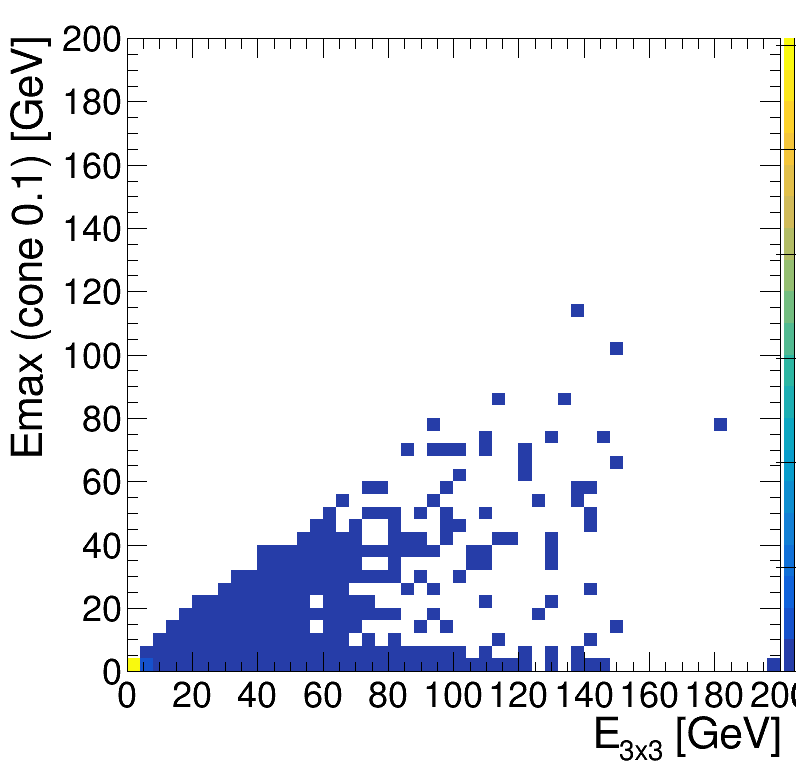

In [315]:
c = rt.TCanvas('c','c', 800, 800)
leg = rt.TLegend(0.18,0.76,0.53,0.94)
leg.SetTextSize(0.022)
leg.SetEntrySeparation(0.01)
gr_1j = {}
gr_2j = {}

i = 0

print('i,j,n,s,m,a')

for k,v in tree.items(): 
    print(k,v)
    
    pho_pz = v['gE3x3_01'].array()
    pho_id = v['gParticleId'].array()
    
    pho_bro_pz = v['gEmax_01'].array()
    pho_bro_id = v['gParticleSiblingId'].array()
  
    pho_mo_id = v['gParticleMotherId'].array()
    
    pho_string = np.logical_and(pho_id==22, pho_mo_id==111)
    pho_bro_string = np.logical_and(pho_bro_id==22, pho_mo_id==111)
    
    pho_pz1 = pho_pz[np.logical_and(pho_string, pho_bro_string)]
    pho_bro_pz1 = pho_bro_pz[np.logical_and(pho_string, pho_bro_string)]
    
    
    
    
#     pho_pz1 = pho_pz[pho_id==22, pho_bro_id==22, pho_mo_id==111]
#     pho_bro_pz1 = pho_pz[pho_id==22, pho_bro_id==22, pho_mo_id==111]
    
#     e = pho_e[:,0]
    pz = pho_pz1.flatten()
    bro_pz = pho_bro_pz1.flatten()
    sample = [pz,bro_pz]
    
#     ht0 = create_TH2D((sample, name='', title=None, binning=[50,-100,100,50,-100,100] )
# #                       #axis_title = ['p_{Z} [GeV]','p_{Z}^{sibling} [GeV]','']
    ht0.SetLineColor(std_color_list[i+1])
    ht0.SetMarkerColor(std_color_list[i+1])
                      
    hz = rt.TH2D(k,k,50,-0,200,50,-0,200)
    hz.GetXaxis().SetTitle('E_{3x3} [GeV]')
    hz.GetYaxis().SetTitle('Emax (cone 0.1) [GeV]')
#     hz[k].SetMarkerColor(std_color_list[i])
        

    for evt,(pz1,pz2) in enumerate(zip(pz,bro_pz)):
        hz.Fill(pz1,pz2)
    
    hz.Draw('colz')
 
    i += 1

# leg.Draw()

# c.SetLogy()
c.Update()
c.Draw()
c.SaveAs(out_dir+'pho_e3x3_emax_2d_01.png')


i,j,n,s,m,a
analyzer-dyll-4FEVT-cluster1000.root <TTree b'ecalTPTree' at 0x7f4e7770c240>


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TROOT::Append>: Replacing existing TH1: analyzer-dyll-4FEVT-cluster1000.root (Potential memory leak).
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190807/pho_e9x9_e5x5_2d_01.png has been created


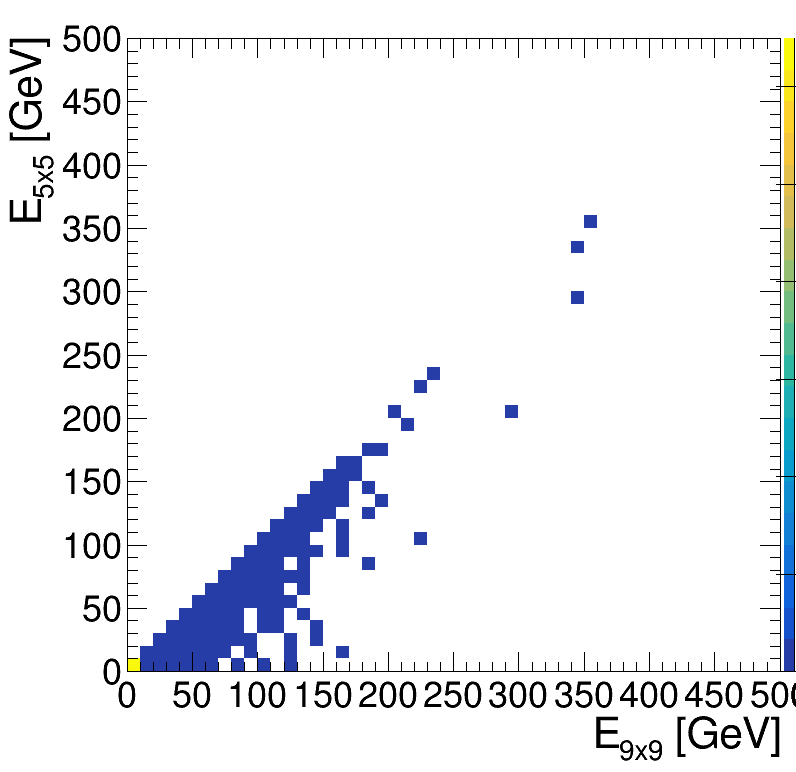

In [316]:
c = rt.TCanvas('c','c', 800, 800)
leg = rt.TLegend(0.18,0.76,0.53,0.94)
leg.SetTextSize(0.022)
leg.SetEntrySeparation(0.01)
gr_1j = {}
gr_2j = {}

i = 0

print('i,j,n,s,m,a')

for k,v in tree.items(): 
    print(k,v)
    
    pho_pz = v['gE9x9_01'].array()
    pho_id = v['gParticleId'].array()
    
    pho_bro_pz = v['gE5x5_01'].array()
    pho_bro_id = v['gParticleSiblingId'].array()
  
    pho_mo_id = v['gParticleMotherId'].array()
    
    pho_string = np.logical_and(pho_id==22, pho_mo_id==111)
    pho_bro_string = np.logical_and(pho_bro_id==22, pho_mo_id==111)
    
    pho_pz1 = pho_pz[np.logical_and(pho_string, pho_bro_string)]
    pho_bro_pz1 = pho_bro_pz[np.logical_and(pho_string, pho_bro_string)]
    
    
    
    
#     pho_pz1 = pho_pz[pho_id==22, pho_bro_id==22, pho_mo_id==111]
#     pho_bro_pz1 = pho_pz[pho_id==22, pho_bro_id==22, pho_mo_id==111]
    
#     e = pho_e[:,0]
    pz = pho_pz1.flatten()
    bro_pz = pho_bro_pz1.flatten()
    sample = [pz,bro_pz]
    
#     ht0 = create_TH2D((sample, name='', title=None, binning=[50,-100,100,50,-100,100] )
# #                       #axis_title = ['p_{Z} [GeV]','p_{Z}^{sibling} [GeV]','']
    ht0.SetLineColor(std_color_list[i+1])
    ht0.SetMarkerColor(std_color_list[i+1])
                      
    hz = rt.TH2D(k,k,50,-0,500,50,-0,500)
    hz.GetXaxis().SetTitle('E_{9x9} [GeV]')
    hz.GetYaxis().SetTitle('E_{5x5} [GeV]')
#     hz[k].SetMarkerColor(std_color_list[i])
        

    for evt,(pz1,pz2) in enumerate(zip(pz,bro_pz)):
        hz.Fill(pz1,pz2)
    
    hz.Draw('colz')
 
    i += 1

# leg.Draw()

# c.SetLogy()
c.Update()
c.Draw()
c.SaveAs(out_dir+'pho_e9x9_e5x5_2d_01.png')


i,j,n,s,m,a
analyzer-dyll-4FEVT-cluster1000.root <TTree b'ecalTPTree' at 0x7f4e7770c240>


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TROOT::Append>: Replacing existing TH1: analyzer-dyll-4FEVT-cluster1000.root (Potential memory leak).
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190807/pho_e9x9_e3x3_2d_01.png has been created


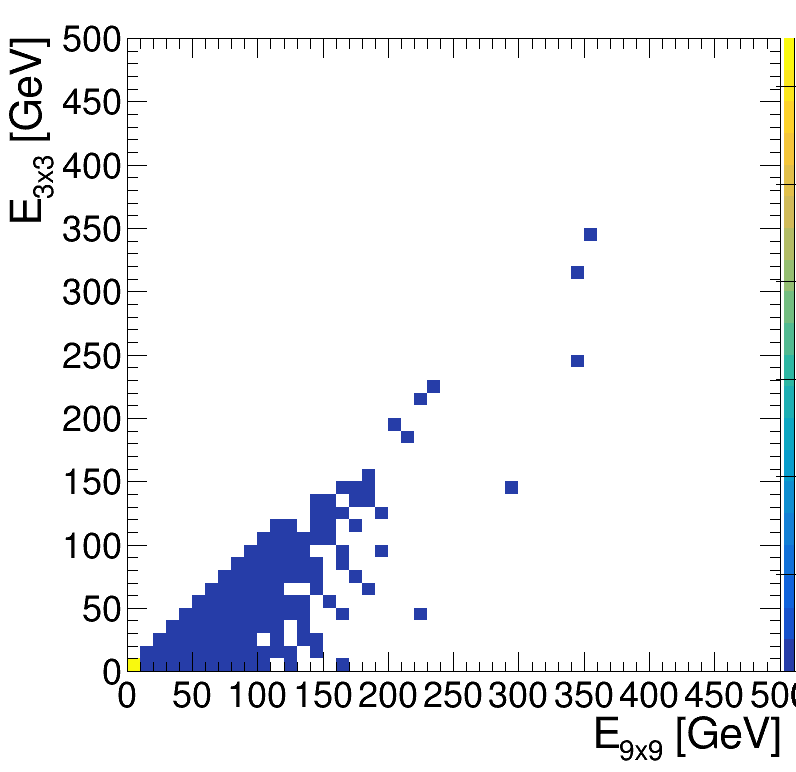

In [317]:
c = rt.TCanvas('c','c', 800, 800)
leg = rt.TLegend(0.18,0.76,0.53,0.94)
leg.SetTextSize(0.022)
leg.SetEntrySeparation(0.01)
gr_1j = {}
gr_2j = {}

i = 0

print('i,j,n,s,m,a')

for k,v in tree.items(): 
    print(k,v)
    
    pho_pz = v['gE9x9_01'].array()
    pho_id = v['gParticleId'].array()
    
    pho_bro_pz = v['gE3x3_01'].array()
    pho_bro_id = v['gParticleSiblingId'].array()
  
    pho_mo_id = v['gParticleMotherId'].array()
    
    pho_string = np.logical_and(pho_id==22, pho_mo_id==111)
    pho_bro_string = np.logical_and(pho_bro_id==22, pho_mo_id==111)
    
    pho_pz1 = pho_pz[np.logical_and(pho_string, pho_bro_string)]
    pho_bro_pz1 = pho_bro_pz[np.logical_and(pho_string, pho_bro_string)]
    
    
    
    
#     pho_pz1 = pho_pz[pho_id==22, pho_bro_id==22, pho_mo_id==111]
#     pho_bro_pz1 = pho_pz[pho_id==22, pho_bro_id==22, pho_mo_id==111]
    
#     e = pho_e[:,0]
    pz = pho_pz1.flatten()
    bro_pz = pho_bro_pz1.flatten()
    sample = [pz,bro_pz]
    
#     ht0 = create_TH2D((sample, name='', title=None, binning=[50,-100,100,50,-100,100] )
# #                       #axis_title = ['p_{Z} [GeV]','p_{Z}^{sibling} [GeV]','']
    ht0.SetLineColor(std_color_list[i+1])
    ht0.SetMarkerColor(std_color_list[i+1])
                      
    hz = rt.TH2D(k,k,50,-0,500,50,-0,500)
    hz.GetXaxis().SetTitle('E_{9x9} [GeV]')
    hz.GetYaxis().SetTitle('E_{3x3} [GeV]')
#     hz[k].SetMarkerColor(std_color_list[i])
        

    for evt,(pz1,pz2) in enumerate(zip(pz,bro_pz)):
        hz.Fill(pz1,pz2)
    
    hz.Draw('colz')
 
    i += 1

# leg.Draw()

# c.SetLogy()
c.Update()
c.Draw()
c.SaveAs(out_dir+'pho_e9x9_e3x3_2d_01.png')


i,j,n,s,m,a
analyzer-dyll-4FEVT-cluster1000.root <TTree b'ecalTPTree' at 0x7f4e7770c240>


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TROOT::Append>: Replacing existing TH1: analyzer-dyll-4FEVT-cluster1000.root (Potential memory leak).
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190807/pho_e5x5_e3x3_2d_01.png has been created


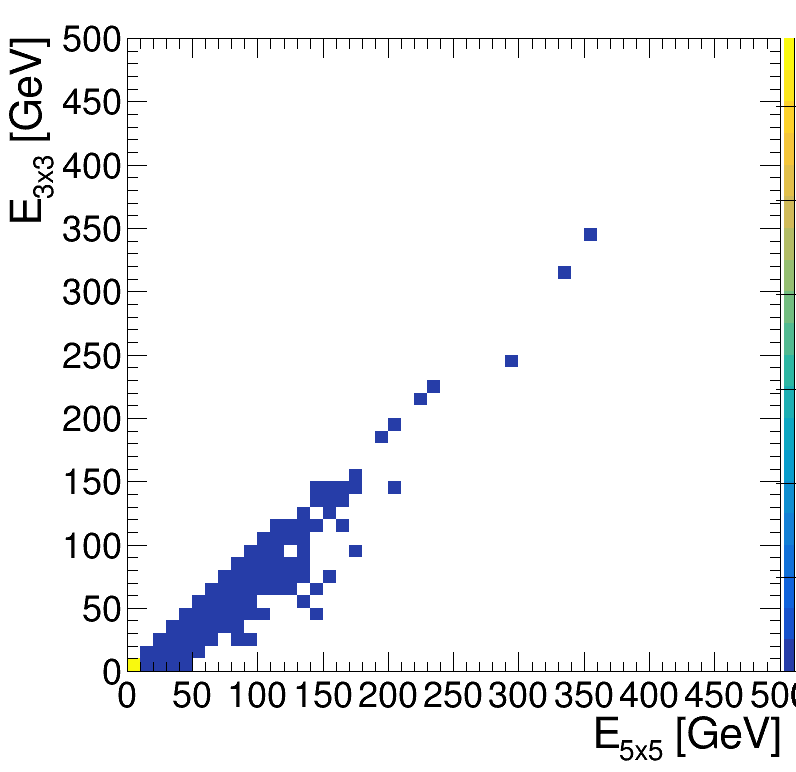

In [318]:
c = rt.TCanvas('c','c', 800, 800)
leg = rt.TLegend(0.18,0.76,0.53,0.94)
leg.SetTextSize(0.022)
leg.SetEntrySeparation(0.01)
gr_1j = {}
gr_2j = {}

i = 0

print('i,j,n,s,m,a')

for k,v in tree.items(): 
    print(k,v)
    
    pho_pz = v['gE5x5_01'].array()
    pho_id = v['gParticleId'].array()
    
    pho_bro_pz = v['gE3x3_01'].array()
    pho_bro_id = v['gParticleSiblingId'].array()
  
    pho_mo_id = v['gParticleMotherId'].array()
    
    pho_string = np.logical_and(pho_id==22, pho_mo_id==111)
    pho_bro_string = np.logical_and(pho_bro_id==22, pho_mo_id==111)
    
    pho_pz1 = pho_pz[np.logical_and(pho_string, pho_bro_string)]
    pho_bro_pz1 = pho_bro_pz[np.logical_and(pho_string, pho_bro_string)]
    
    
    
    
#     pho_pz1 = pho_pz[pho_id==22, pho_bro_id==22, pho_mo_id==111]
#     pho_bro_pz1 = pho_pz[pho_id==22, pho_bro_id==22, pho_mo_id==111]
    
#     e = pho_e[:,0]
    pz = pho_pz1.flatten()
    bro_pz = pho_bro_pz1.flatten()
    sample = [pz,bro_pz]
    
#     ht0 = create_TH2D((sample, name='', title=None, binning=[50,-100,100,50,-100,100] )
# #                       #axis_title = ['p_{Z} [GeV]','p_{Z}^{sibling} [GeV]','']
    ht0.SetLineColor(std_color_list[i+1])
    ht0.SetMarkerColor(std_color_list[i+1])
                      
    hz = rt.TH2D(k,k,50,-0,500,50,-0,500)
    hz.GetXaxis().SetTitle('E_{5x5} [GeV]')
    hz.GetYaxis().SetTitle('E_{3x3} [GeV]')
#     hz[k].SetMarkerColor(std_color_list[i])
        

    for evt,(pz1,pz2) in enumerate(zip(pz,bro_pz)):
        hz.Fill(pz1,pz2)
    
    hz.Draw('colz')
 
    i += 1

# leg.Draw()

# c.SetLogy()
c.Update()
c.Draw()
c.SaveAs(out_dir+'pho_e5x5_e3x3_2d_01.png')


i,j,n,s,m,a
analyzer-dyll-4FEVT-cluster1000.root <TTree b'ecalTPTree' at 0x7f4e7770c240>


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TROOT::Append>: Replacing existing TH1: analyzer-dyll-4FEVT-cluster1000.root (Potential memory leak).
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190807/pho_e5x5_e3x3_2d_01.png has been created


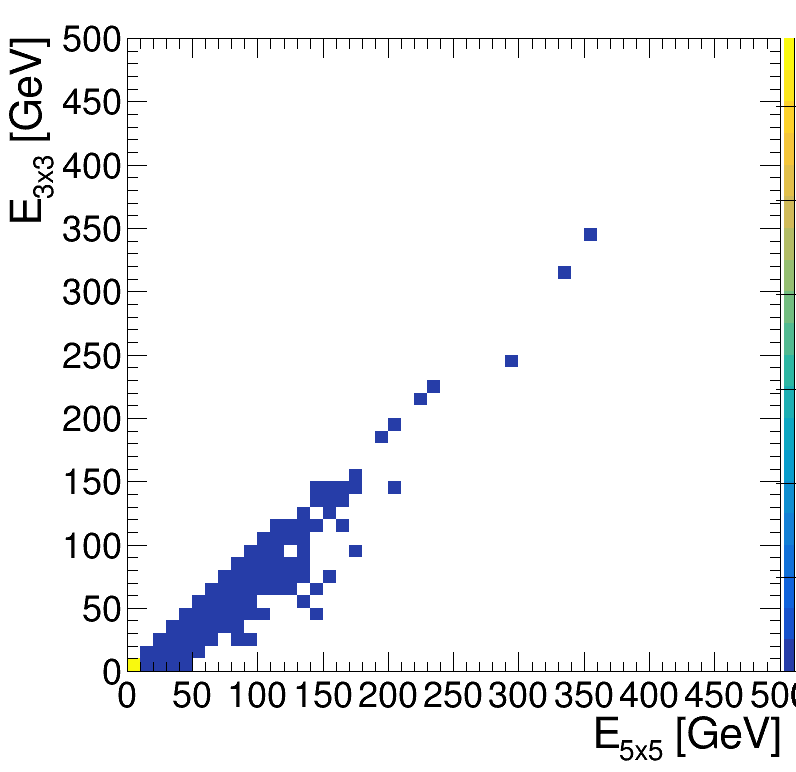

In [319]:
c = rt.TCanvas('c','c', 800, 800)
leg = rt.TLegend(0.18,0.76,0.53,0.94)
leg.SetTextSize(0.022)
leg.SetEntrySeparation(0.01)
gr_1j = {}
gr_2j = {}

i = 0

print('i,j,n,s,m,a')

for k,v in tree.items(): 
    print(k,v)
    
    pho_pz = v['gE5x5_01'].array()
    pho_id = v['gParticleId'].array()
    
    pho_bro_pz = v['gE3x3_01'].array()
    pho_bro_id = v['gParticleSiblingId'].array()
  
    pho_mo_id = v['gParticleMotherId'].array()
    
    pho_string = np.logical_and(pho_id==22, pho_mo_id==111)
    pho_bro_string = np.logical_and(pho_bro_id==22, pho_mo_id==111)
    
    pho_pz1 = pho_pz[np.logical_and(pho_string, pho_bro_string)]
    pho_bro_pz1 = pho_bro_pz[np.logical_and(pho_string, pho_bro_string)]
    
    
    
    
#     pho_pz1 = pho_pz[pho_id==22, pho_bro_id==22, pho_mo_id==111]
#     pho_bro_pz1 = pho_pz[pho_id==22, pho_bro_id==22, pho_mo_id==111]
    
#     e = pho_e[:,0]
    pz = pho_pz1.flatten()
    bro_pz = pho_bro_pz1.flatten()
    sample = [pz,bro_pz]
    
#     ht0 = create_TH2D((sample, name='', title=None, binning=[50,-100,100,50,-100,100] )
# #                       #axis_title = ['p_{Z} [GeV]','p_{Z}^{sibling} [GeV]','']
    ht0.SetLineColor(std_color_list[i+1])
    ht0.SetMarkerColor(std_color_list[i+1])
                      
    hz = rt.TH2D(k,k,50,-0,500,50,-0,500)
    hz.GetXaxis().SetTitle('E_{5x5} [GeV]')
    hz.GetYaxis().SetTitle('E_{3x3} [GeV]')
#     hz[k].SetMarkerColor(std_color_list[i])
        

    for evt,(pz1,pz2) in enumerate(zip(pz,bro_pz)):
        hz.Fill(pz1,pz2)
    
    hz.Draw('colz')
 
    i += 1

# leg.Draw()

# c.SetLogy()
c.Update()
c.Draw()
c.SaveAs(out_dir+'pho_e5x5_e3x3_2d_01.png')


# Comparision of cones

i,j,n,s,m,a
analyzer-dyll-4FEVT-cluster1000.root <TTree b'ecalTPTree' at 0x7f4e7770c240>


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190807/pho_emax_0102.png has been created


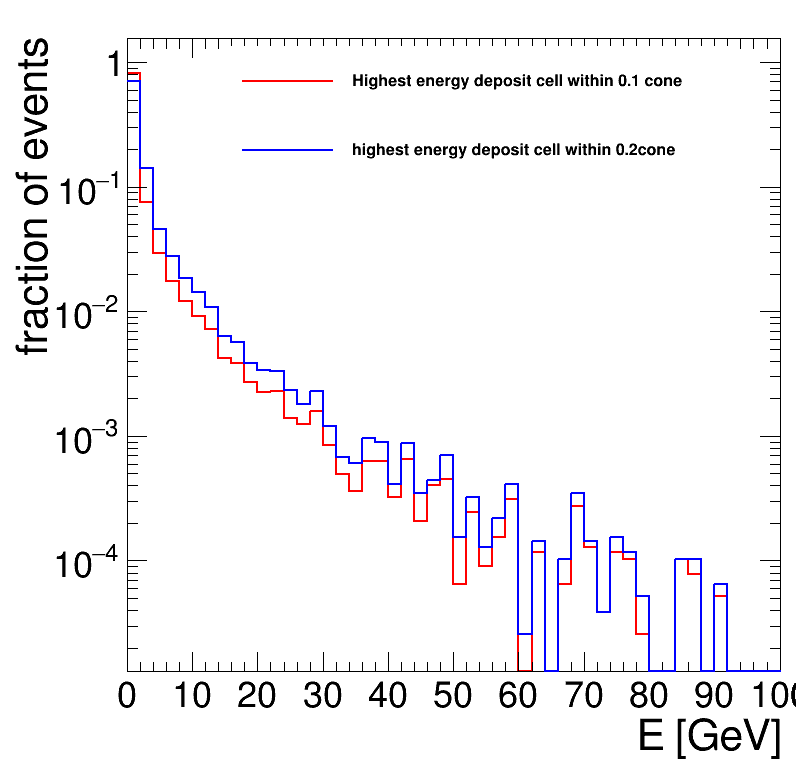

In [294]:
c = rt.TCanvas('c','c', 800, 800)
leg = rt.TLegend(0.28,0.76,0.93,0.94)
leg.SetTextSize(0.022)
leg.SetBorderSize(0)
leg.SetEntrySeparation(0.01)
gr_1j = {}
gr_2j = {}

i = 0

print('i,j,n,s,m,a')

for k,v in tree.items(): 
    print(k,v)
    
    pho_eta1 = v['gEmax_01'].array()
    pho_eta2 = v['gEmax_02'].array()
    pho_id = v['gParticleId'].array()
    pho_mo_id = v['gParticleMotherId'].array()
    
    pho_eta1 = pho_eta1[pho_id==22, pho_mo_id==111]
    pho_eta2 = pho_eta2[pho_id==22, pho_mo_id==111]
    
#     eta = pho_eta[:,0]
    eta1 = pho_eta1.flatten()
    eta2 = pho_eta2.flatten()
    
    ht0 = create_TH1D( eta1, axis_title=['E [GeV]', 'fraction of events'], name="", binning=[50,-0,100])
    ht0.SetLineColor(std_color_list[i+1])
    ht0.SetMarkerColor(std_color_list[i+1])
    
    ht0.DrawNormalized('')
    
    leg.AddEntry(ht0,'Highest energy deposit cell within 0.1 cone')
    
    ht1 = create_TH1D( eta2, axis_title=['E [GeV]', 'fraction of events'], name="", binning=[50,-0,100])
    ht1.SetLineColor(std_color_list[i+2])
    ht1.SetMarkerColor(std_color_list[i+2])
    
    ht1.DrawNormalized('same')
    
    leg.AddEntry(ht1,'highest energy deposit cell within 0.2cone')

 
    i += 1

leg.Draw()

c.SetLogy()
c.Update()
c.Draw()
c.SaveAs(out_dir+'pho_emax_0102.png')


i,j,n,s,m,a
analyzer-dyll-4FEVT-cluster1000.root <TTree b'ecalTPTree' at 0x7f4e7770c240>


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TROOT::Append>: Replacing existing TH1: analyzer-dyll-4FEVT-cluster1000.root (Potential memory leak).
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190807/pho_e_emax_2d_02.png has been created


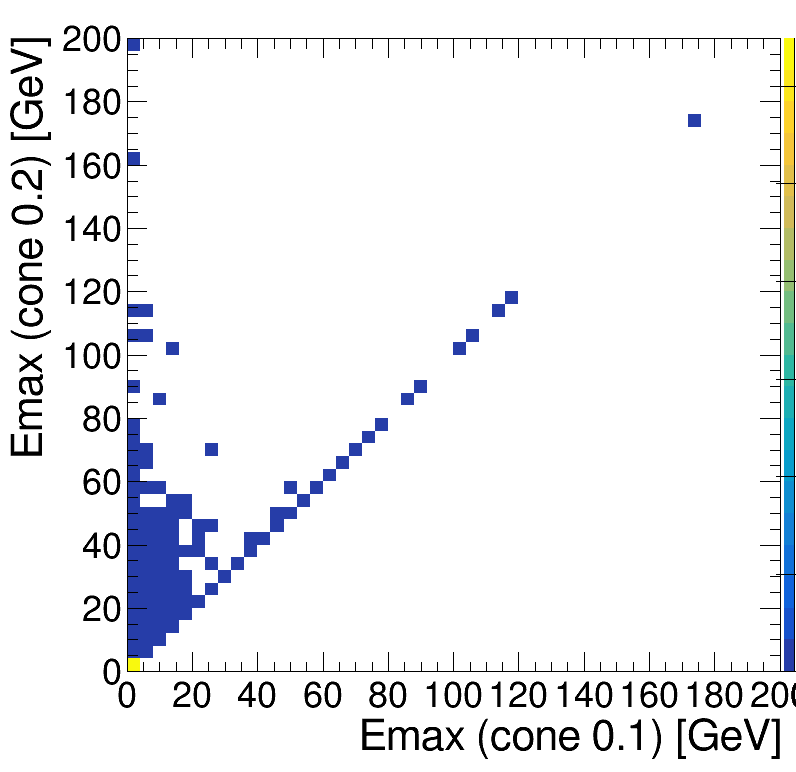

In [301]:
c = rt.TCanvas('c','c', 800, 800)
leg = rt.TLegend(0.18,0.76,0.53,0.94)
leg.SetTextSize(0.022)
leg.SetEntrySeparation(0.01)
gr_1j = {}
gr_2j = {}

i = 0

print('i,j,n,s,m,a')

for k,v in tree.items(): 
    print(k,v)
    
    pho_pz = v['gEmax_01'].array()
    pho_id = v['gParticleId'].array()
    
    pho_bro_pz = v['gEmax_02'].array()
    pho_bro_id = v['gParticleSiblingId'].array()
  
    pho_mo_id = v['gParticleMotherId'].array()
    
    pho_string = np.logical_and(pho_id==22, pho_mo_id==111)
    pho_bro_string = np.logical_and(pho_bro_id==22, pho_mo_id==111)
    
    pho_pz1 = pho_pz[np.logical_and(pho_string, pho_bro_string)]
    pho_bro_pz1 = pho_bro_pz[np.logical_and(pho_string, pho_bro_string)]
    
    
    
    
#     pho_pz1 = pho_pz[pho_id==22, pho_bro_id==22, pho_mo_id==111]
#     pho_bro_pz1 = pho_pz[pho_id==22, pho_bro_id==22, pho_mo_id==111]
    
#     e = pho_e[:,0]
    pz = pho_pz1.flatten()
    bro_pz = pho_bro_pz1.flatten()
    sample = [pz,bro_pz]
    
#     ht0 = create_TH2D((sample, name='', title=None, binning=[50,-100,100,50,-100,100] )
# #                       #axis_title = ['p_{Z} [GeV]','p_{Z}^{sibling} [GeV]','']
    ht0.SetLineColor(std_color_list[i+1])
    ht0.SetMarkerColor(std_color_list[i+1])
                      
    hz = rt.TH2D(k,k,50,-0,200,50,-0,200)
    hz.GetXaxis().SetTitle('Emax (cone 0.1) [GeV]')
    hz.GetYaxis().SetTitle('Emax (cone 0.2) [GeV]')
#     hz[k].SetMarkerColor(std_color_list[i])
        

    for evt,(pz1,pz2) in enumerate(zip(pz,bro_pz)):
        hz.Fill(pz1,pz2)
    
    hz.Draw('colz')
 
    i += 1

# leg.Draw()

# c.SetLogy()
c.Update()
c.Draw()
c.SaveAs(out_dir+'pho_emax_emax_2d_0102.png')


i,j,n,s,m,a
analyzer-dyll-4FEVT-pi0cluster1000.root <TTree b'ecalTPTree' at 0x7f4eae2aaac8>


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190807/pho_0102.png has been created


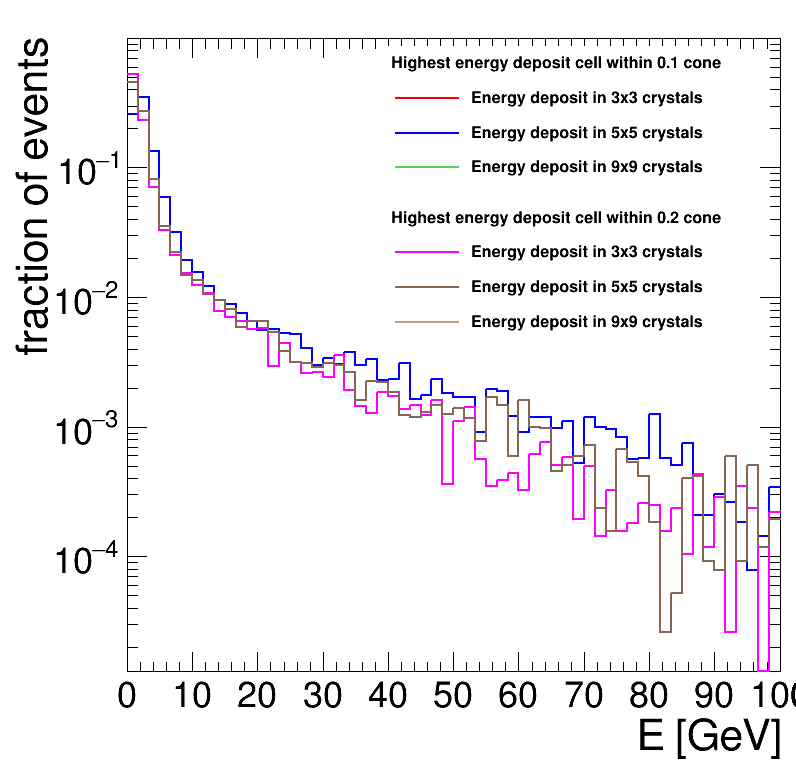

In [550]:
c = rt.TCanvas('c','c', 800, 800)
leg = rt.TLegend(0.48,0.76,0.93,0.94)
leg.SetTextSize(0.022)
leg.SetBorderSize(0)
leg.SetEntrySeparation(0.01)
leg1 = rt.TLegend(0.48,0.56,0.93,0.74)
leg1.SetTextSize(0.022)
leg1.SetBorderSize(0)
leg1.SetEntrySeparation(0.01)
gr_1j = {}
gr_2j = {}

i = 0

print('i,j,n,s,m,a')

for k,v in tree.items(): 
    print(k,v)
    
    pho_eta1 = v['gE3x3_01'].array()
    pho_eta2 = v['gE5x5_01'].array()
    pho_eta3 = v['gE9x9_01'].array()
    
    pho_eta4 = v['gE3x3_02'].array()
    pho_eta5 = v['gE5x5_02'].array()
    pho_eta6 = v['gE9x9_02'].array()
    
    pho_id = v['gParticleId'].array()
    pho_mo_id = v['gParticleMotherId'].array()
    
    pho_eta1 = pho_eta1[pho_id==22, pho_mo_id==111]
    pho_eta2 = pho_eta3[pho_id==22, pho_mo_id==111]
    pho_eta3 = pho_eta3[pho_id==22, pho_mo_id==111]
    
    pho_eta4 = pho_eta4[pho_id==22, pho_mo_id==111]
    pho_eta5 = pho_eta5[pho_id==22, pho_mo_id==111]
    pho_eta6 = pho_eta6[pho_id==22, pho_mo_id==111]
    
#     eta = pho_eta[:,0]
    eta1 = pho_eta1.flatten()
    eta2 = pho_eta2.flatten()
    eta3 = pho_eta3.flatten()
    
    eta4 = pho_eta4.flatten()
    eta5 = pho_eta5.flatten()
    eta6 = pho_eta6.flatten()
    
    ht1 = create_TH1D( eta1, axis_title=['E [GeV]', 'fraction of events'], name="", binning=[60,-0,100])
    ht2 = create_TH1D( eta2, axis_title=['E [GeV]', 'fraction of events'], name="", binning=[60,-0,100])
    ht3 = create_TH1D( eta3, axis_title=['E [GeV]', 'fraction of events'], name="", binning=[60,-0,100])
    
    ht4 = create_TH1D( eta4, axis_title=['E [GeV]', 'fraction of events'], name="", binning=[60,-0,100])
    ht5 = create_TH1D( eta5, axis_title=['E [GeV]', 'fraction of events'], name="", binning=[60,-0,100])
    ht6 = create_TH1D( eta6, axis_title=['E [GeV]', 'fraction of events'], name="", binning=[60,-0,100])
    
    ht1.SetLineColor(std_color_list[i+1])
    ht2.SetLineColor(std_color_list[i+2])
    ht3.SetLineColor(std_color_list[i+3])
    
    ht4.SetLineColor(std_color_list[i+4])
    ht5.SetLineColor(std_color_list[i+5])
    ht6.SetLineColor(std_color_list[i+6])
    
    ht1.SetMarkerColor(std_color_list[i+1])
    ht2.SetMarkerColor(std_color_list[i+2])
    ht3.SetMarkerColor(std_color_list[i+3])
    
    ht4.SetMarkerColor(std_color_list[i+4])
    ht5.SetMarkerColor(std_color_list[i+5])
    ht6.SetMarkerColor(std_color_list[i+6])
    
    ht1.DrawNormalized('same')
    ht2.DrawNormalized('same')
#     ht3.DrawNormalized('same')
    
    ht4.DrawNormalized('same')
    ht5.DrawNormalized('same')
#     ht6.DrawNormalized('same')
    
    leg.SetHeader('Highest energy deposit cell within 0.1 cone')
    leg.AddEntry(ht1,'Energy deposit in 3x3 crystals')
    leg.AddEntry(ht2,'Energy deposit in 5x5 crystals')
    leg.AddEntry(ht3,'Energy deposit in 9x9 crystals')
 
    
    leg1.SetHeader('Highest energy deposit cell within 0.2 cone')
    leg1.AddEntry(ht4,'Energy deposit in 3x3 crystals')
    leg1.AddEntry(ht5,'Energy deposit in 5x5 crystals')
    leg1.AddEntry(ht6,'Energy deposit in 9x9 crystals')
 
    i += 1

leg.Draw()
leg1.Draw()

c.SetLogy()
c.Update()
c.Draw()
c.SaveAs(out_dir+'pho_0102.png')


i,j,n,s,m,a
analyzer-dyll-4FEVT-cluster1000.root <TTree b'ecalTPTree' at 0x7f4e7770c240>


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TROOT::Append>: Replacing existing TH1: analyzer-dyll-4FEVT-cluster1000.root (Potential memory leak).
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190807/pho_e9x9_e_2d_02.png has been created


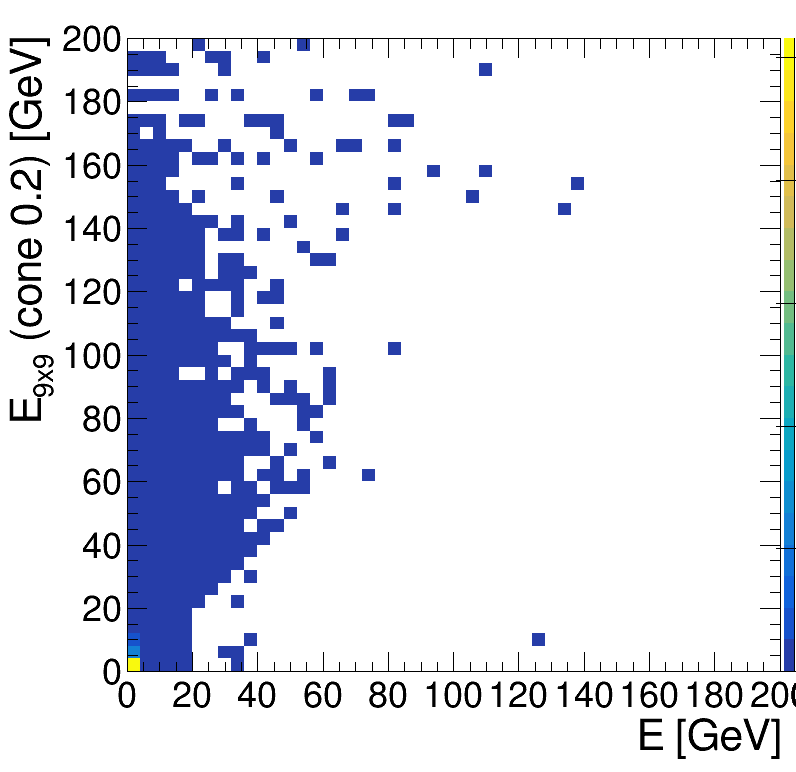

In [337]:
c = rt.TCanvas('c','c', 800, 800)
leg = rt.TLegend(0.18,0.76,0.53,0.94)
leg.SetTextSize(0.022)
leg.SetEntrySeparation(0.01)
gr_1j = {}
gr_2j = {}

i = 0

print('i,j,n,s,m,a')

for k,v in tree.items(): 
    print(k,v)
    
    pho_bro_pz = v['gE9x9_02'].array()
    pho_id = v['gParticleId'].array()
    
    pho_pz = v['gParticleE'].array()
    pho_bro_id = v['gParticleSiblingId'].array()
  
    pho_mo_id = v['gParticleMotherId'].array()
    
    pho_string = np.logical_and(pho_id==22, pho_mo_id==111)
    pho_bro_string = np.logical_and(pho_bro_id==22, pho_mo_id==111)
    
    pho_pz1 = pho_pz[np.logical_and(pho_string, pho_bro_string)]
    pho_bro_pz1 = pho_bro_pz[np.logical_and(pho_string, pho_bro_string)]
    
    
    
    
#     pho_pz1 = pho_pz[pho_id==22, pho_bro_id==22, pho_mo_id==111]
#     pho_bro_pz1 = pho_pz[pho_id==22, pho_bro_id==22, pho_mo_id==111]
    
#     e = pho_e[:,0]
    pz = pho_pz1.flatten()
    bro_pz = pho_bro_pz1.flatten()
    sample = [pz,bro_pz]
    
#     ht0 = create_TH2D((sample, name='', title=None, binning=[50,-100,100,50,-100,100] )
# #                       #axis_title = ['p_{Z} [GeV]','p_{Z}^{sibling} [GeV]','']
    ht0.SetLineColor(std_color_list[i+1])
    ht0.SetMarkerColor(std_color_list[i+1])
                      
    hz = rt.TH2D(k,k,50,-0,200,50,-0,200)
    hz.GetYaxis().SetTitle('E_{9x9} (cone 0.2) [GeV]')
    hz.GetXaxis().SetTitle('E [GeV]')
#     hz[k].SetMarkerColor(std_color_list[i])
        

    for evt,(pz1,pz2) in enumerate(zip(pz,bro_pz)):
        hz.Fill(pz1,pz2)
    
    hz.Draw('colz')
 
    i += 1

# leg.Draw()

# c.SetLogy()
c.Update()
c.Draw()
c.SaveAs(out_dir+'pho_e9x9_e_2d_02.png')


i,j,n,s,m,a
analyzer-dyll-4FEVT-cluster1000.root <TTree b'ecalTPTree' at 0x7f4e7770c240>


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TROOT::Append>: Replacing existing TH1: analyzer-dyll-4FEVT-cluster1000.root (Potential memory leak).
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190807/pho_e5x5_e_2d_02.png has been created


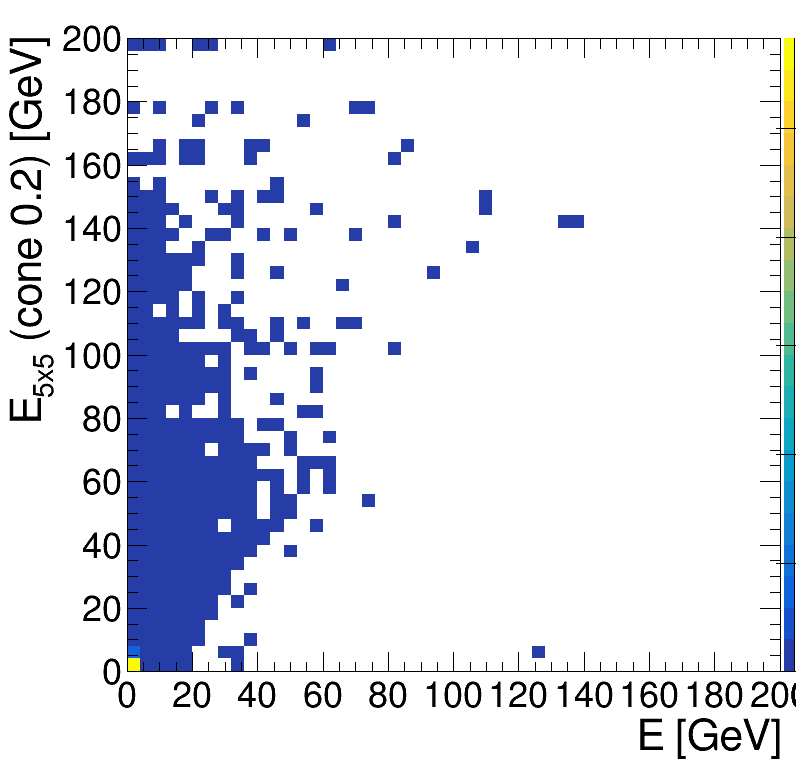

In [338]:
c = rt.TCanvas('c','c', 800, 800)
leg = rt.TLegend(0.18,0.76,0.53,0.94)
leg.SetTextSize(0.022)
leg.SetEntrySeparation(0.01)
gr_1j = {}
gr_2j = {}

i = 0

print('i,j,n,s,m,a')

for k,v in tree.items(): 
    print(k,v)
    
    pho_bro_pz = v['gE5x5_02'].array()
    pho_id = v['gParticleId'].array()
    
    pho_pz = v['gParticleE'].array()
    pho_bro_id = v['gParticleSiblingId'].array()
  
    pho_mo_id = v['gParticleMotherId'].array()
    
    pho_string = np.logical_and(pho_id==22, pho_mo_id==111)
    pho_bro_string = np.logical_and(pho_bro_id==22, pho_mo_id==111)
    
    pho_pz1 = pho_pz[np.logical_and(pho_string, pho_bro_string)]
    pho_bro_pz1 = pho_bro_pz[np.logical_and(pho_string, pho_bro_string)]
    
    
    
    
#     pho_pz1 = pho_pz[pho_id==22, pho_bro_id==22, pho_mo_id==111]
#     pho_bro_pz1 = pho_pz[pho_id==22, pho_bro_id==22, pho_mo_id==111]
    
#     e = pho_e[:,0]
    pz = pho_pz1.flatten()
    bro_pz = pho_bro_pz1.flatten()
    sample = [pz,bro_pz]
    
#     ht0 = create_TH2D((sample, name='', title=None, binning=[50,-100,100,50,-100,100] )
# #                       #axis_title = ['p_{Z} [GeV]','p_{Z}^{sibling} [GeV]','']
    ht0.SetLineColor(std_color_list[i+1])
    ht0.SetMarkerColor(std_color_list[i+1])
                      
    hz = rt.TH2D(k,k,50,-0,200,50,-0,200)
    hz.GetYaxis().SetTitle('E_{5x5} (cone 0.2) [GeV]')
    hz.GetXaxis().SetTitle('E [GeV]')
#     hz[k].SetMarkerColor(std_color_list[i])
        

    for evt,(pz1,pz2) in enumerate(zip(pz,bro_pz)):
        hz.Fill(pz1,pz2)
    
    hz.Draw('colz')
 
    i += 1

# leg.Draw()

# c.SetLogy()
c.Update()
c.Draw()
c.SaveAs(out_dir+'pho_e5x5_e_2d_02.png')


i,j,n,s,m,a
analyzer-dyll-4FEVT-cluster1000.root <TTree b'ecalTPTree' at 0x7f4e7770c240>


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TROOT::Append>: Replacing existing TH1: analyzer-dyll-4FEVT-cluster1000.root (Potential memory leak).
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190807/pho_e3x3_e_2d_02.png has been created


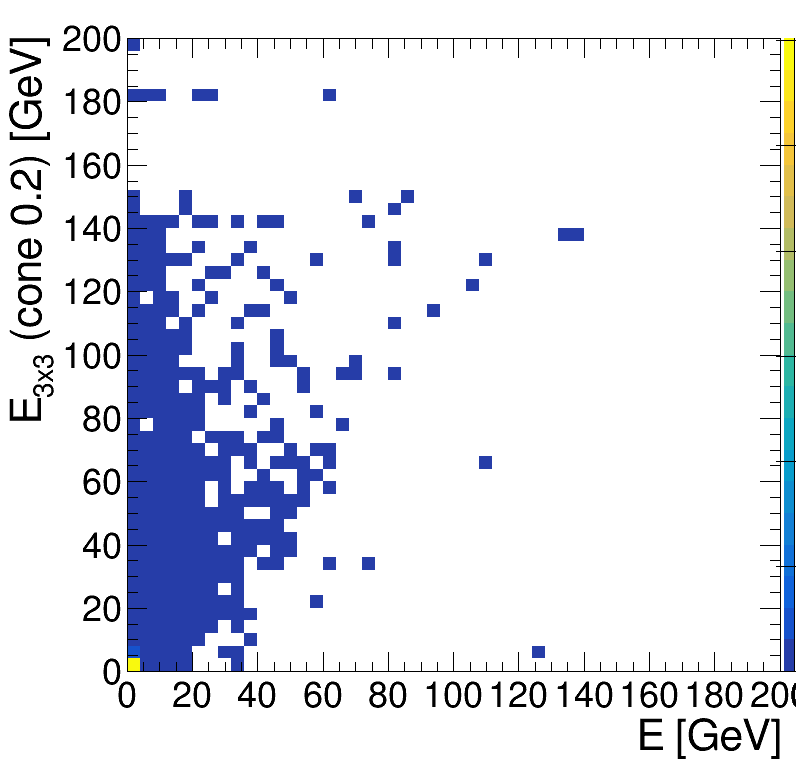

In [339]:
c = rt.TCanvas('c','c', 800, 800)
leg = rt.TLegend(0.18,0.76,0.53,0.94)
leg.SetTextSize(0.022)
leg.SetEntrySeparation(0.01)
gr_1j = {}
gr_2j = {}

i = 0

print('i,j,n,s,m,a')

for k,v in tree.items(): 
    print(k,v)
    
    pho_bro_pz = v['gE3x3_02'].array()
    pho_id = v['gParticleId'].array()
    
    pho_pz = v['gParticleE'].array()
    pho_bro_id = v['gParticleSiblingId'].array()
  
    pho_mo_id = v['gParticleMotherId'].array()
    
    pho_string = np.logical_and(pho_id==22, pho_mo_id==111)
    pho_bro_string = np.logical_and(pho_bro_id==22, pho_mo_id==111)
    
    pho_pz1 = pho_pz[np.logical_and(pho_string, pho_bro_string)]
    pho_bro_pz1 = pho_bro_pz[np.logical_and(pho_string, pho_bro_string)]
    
    
    
    
#     pho_pz1 = pho_pz[pho_id==22, pho_bro_id==22, pho_mo_id==111]
#     pho_bro_pz1 = pho_pz[pho_id==22, pho_bro_id==22, pho_mo_id==111]
    
#     e = pho_e[:,0]
    pz = pho_pz1.flatten()
    bro_pz = pho_bro_pz1.flatten()
    sample = [pz,bro_pz]
    
#     ht0 = create_TH2D((sample, name='', title=None, binning=[50,-100,100,50,-100,100] )
# #                       #axis_title = ['p_{Z} [GeV]','p_{Z}^{sibling} [GeV]','']
    ht0.SetLineColor(std_color_list[i+1])
    ht0.SetMarkerColor(std_color_list[i+1])
                      
    hz = rt.TH2D(k,k,50,-0,200,50,-0,200)
    hz.GetYaxis().SetTitle('E_{3x3} (cone 0.2) [GeV]')
    hz.GetXaxis().SetTitle('E [GeV]')
#     hz[k].SetMarkerColor(std_color_list[i])
        

    for evt,(pz1,pz2) in enumerate(zip(pz,bro_pz)):
        hz.Fill(pz1,pz2)
    
    hz.Draw('colz')
 
    i += 1

# leg.Draw()

# c.SetLogy()
c.Update()
c.Draw()
c.SaveAs(out_dir+'pho_e3x3_e_2d_02.png')


i,j,n,s,m,a
analyzer-dyll-4FEVT-cluster1000.root <TTree b'ecalTPTree' at 0x7f4e7770c240>


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TROOT::Append>: Replacing existing TH1: analyzer-dyll-4FEVT-cluster1000.root (Potential memory leak).
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190807/pho_e9x9_e9x9_2d_0102.png has been created


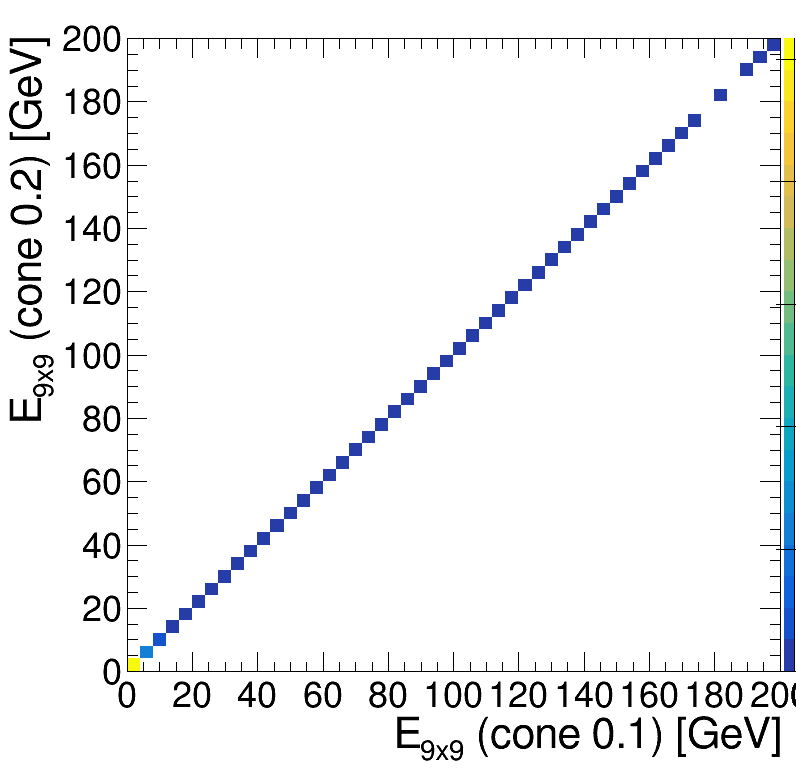

In [327]:
c = rt.TCanvas('c','c', 800, 800)
leg = rt.TLegend(0.18,0.76,0.53,0.94)
leg.SetTextSize(0.022)
leg.SetEntrySeparation(0.01)
gr_1j = {}
gr_2j = {}

i = 0

print('i,j,n,s,m,a')

for k,v in tree.items(): 
    print(k,v)
    
    pho_pz = v['gE9x9_01'].array()
    pho_id = v['gParticleId'].array()
    
    pho_bro_pz = v['gE9x9_02'].array()
    pho_bro_id = v['gParticleSiblingId'].array()
  
    pho_mo_id = v['gParticleMotherId'].array()
    
    pho_string = np.logical_and(pho_id==22, pho_mo_id==111)
    pho_bro_string = np.logical_and(pho_bro_id==22, pho_mo_id==111)
    
    pho_pz1 = pho_pz[np.logical_and(pho_string, pho_bro_string)]
    pho_bro_pz1 = pho_bro_pz[np.logical_and(pho_string, pho_bro_string)]
    
    
    
    
#     pho_pz1 = pho_pz[pho_id==22, pho_bro_id==22, pho_mo_id==111]
#     pho_bro_pz1 = pho_pz[pho_id==22, pho_bro_id==22, pho_mo_id==111]
    
#     e = pho_e[:,0]
    pz = pho_pz1.flatten()
    bro_pz = pho_bro_pz1.flatten()
    sample = [pz,bro_pz]
    
#     ht0 = create_TH2D((sample, name='', title=None, binning=[50,-100,100,50,-100,100] )
# #                       #axis_title = ['p_{Z} [GeV]','p_{Z}^{sibling} [GeV]','']
    ht0.SetLineColor(std_color_list[i+1])
    ht0.SetMarkerColor(std_color_list[i+1])
                      
    hz = rt.TH2D(k,k,50,-0,200,50,-0,200)
    hz.GetXaxis().SetTitle('E_{9x9} (cone 0.1) [GeV]')
    hz.GetYaxis().SetTitle('E_{9x9} (cone 0.2) [GeV]')
#     hz[k].SetMarkerColor(std_color_list[i])
        

    for evt,(pz1,pz2) in enumerate(zip(pz,bro_pz)):
        hz.Fill(pz1,pz2)
    
    hz.Draw('colz')
 
    i += 1

# leg.Draw()

# c.SetLogy()
c.Update()
c.Draw()
c.SaveAs(out_dir+'pho_e9x9_e9x9_2d_0102.png')


i,j,n,s,m,a
analyzer-dyll-4FEVT-cluster1000.root <TTree b'ecalTPTree' at 0x7f4e7770c240>


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TROOT::Append>: Replacing existing TH1: analyzer-dyll-4FEVT-cluster1000.root (Potential memory leak).
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190807/pho_e9x9_e9x9_2d_0102.png has been created


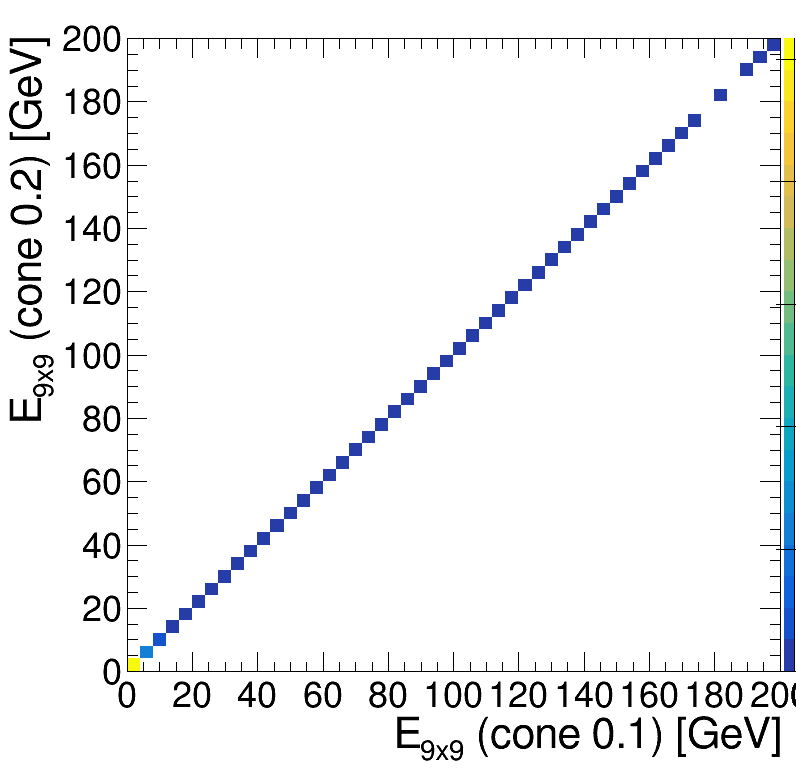

In [327]:
c = rt.TCanvas('c','c', 800, 800)
leg = rt.TLegend(0.18,0.76,0.53,0.94)
leg.SetTextSize(0.022)
leg.SetEntrySeparation(0.01)
gr_1j = {}
gr_2j = {}

i = 0

print('i,j,n,s,m,a')

for k,v in tree.items(): 
    print(k,v)
    
    pho_pz = v['gE9x9_01'].array()
    pho_id = v['gParticleId'].array()
    
    pho_bro_pz = v['gE9x9_02'].array()
    pho_bro_id = v['gParticleSiblingId'].array()
  
    pho_mo_id = v['gParticleMotherId'].array()
    
    pho_string = np.logical_and(pho_id==22, pho_mo_id==111)
    pho_bro_string = np.logical_and(pho_bro_id==22, pho_mo_id==111)
    
    pho_pz1 = pho_pz[np.logical_and(pho_string, pho_bro_string)]
    pho_bro_pz1 = pho_bro_pz[np.logical_and(pho_string, pho_bro_string)]
    
    
    
    
#     pho_pz1 = pho_pz[pho_id==22, pho_bro_id==22, pho_mo_id==111]
#     pho_bro_pz1 = pho_pz[pho_id==22, pho_bro_id==22, pho_mo_id==111]
    
#     e = pho_e[:,0]
    pz = pho_pz1.flatten()
    bro_pz = pho_bro_pz1.flatten()
    sample = [pz,bro_pz]
    
#     ht0 = create_TH2D((sample, name='', title=None, binning=[50,-100,100,50,-100,100] )
# #                       #axis_title = ['p_{Z} [GeV]','p_{Z}^{sibling} [GeV]','']
    ht0.SetLineColor(std_color_list[i+1])
    ht0.SetMarkerColor(std_color_list[i+1])
                      
    hz = rt.TH2D(k,k,50,-0,200,50,-0,200)
    hz.GetXaxis().SetTitle('E_{9x9} (cone 0.1) [GeV]')
    hz.GetYaxis().SetTitle('E_{9x9} (cone 0.2) [GeV]')
#     hz[k].SetMarkerColor(std_color_list[i])
        

    for evt,(pz1,pz2) in enumerate(zip(pz,bro_pz)):
        hz.Fill(pz1,pz2)
    
    hz.Draw('colz')
 
    i += 1

# leg.Draw()

# c.SetLogy()
c.Update()
c.Draw()
c.SaveAs(out_dir+'pho_e9x9_e9x9_2d_0102.png')


i,j,n,s,m,a
analyzer-dyll-4FEVT-cluster1000.root <TTree b'ecalTPTree' at 0x7f4e7770c240>


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TROOT::Append>: Replacing existing TH1: analyzer-dyll-4FEVT-cluster1000.root (Potential memory leak).
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190807/pho_e5x5_e5x5_2d_0102.png has been created


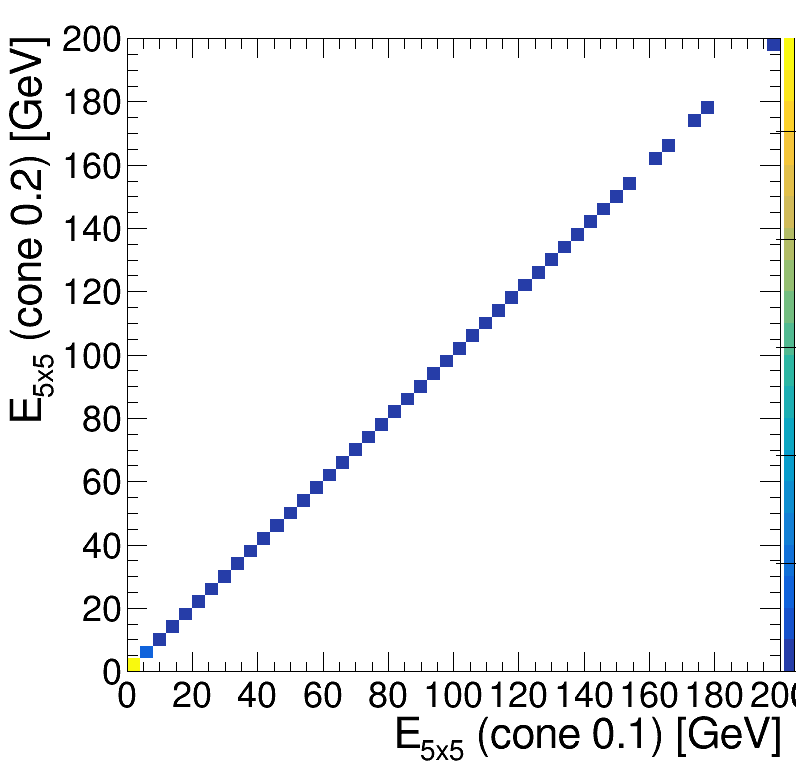

In [328]:
c = rt.TCanvas('c','c', 800, 800)
leg = rt.TLegend(0.18,0.76,0.53,0.94)
leg.SetTextSize(0.022)
leg.SetEntrySeparation(0.01)
gr_1j = {}
gr_2j = {}

i = 0

print('i,j,n,s,m,a')

for k,v in tree.items(): 
    print(k,v)
    
    pho_pz = v['gE5x5_01'].array()
    pho_id = v['gParticleId'].array()
    
    pho_bro_pz = v['gE5x5_02'].array()
    pho_bro_id = v['gParticleSiblingId'].array()
  
    pho_mo_id = v['gParticleMotherId'].array()
    
    pho_string = np.logical_and(pho_id==22, pho_mo_id==111)
    pho_bro_string = np.logical_and(pho_bro_id==22, pho_mo_id==111)
    
    pho_pz1 = pho_pz[np.logical_and(pho_string, pho_bro_string)]
    pho_bro_pz1 = pho_bro_pz[np.logical_and(pho_string, pho_bro_string)]
    
    
    
    
#     pho_pz1 = pho_pz[pho_id==22, pho_bro_id==22, pho_mo_id==111]
#     pho_bro_pz1 = pho_pz[pho_id==22, pho_bro_id==22, pho_mo_id==111]
    
#     e = pho_e[:,0]
    pz = pho_pz1.flatten()
    bro_pz = pho_bro_pz1.flatten()
    sample = [pz,bro_pz]
    
#     ht0 = create_TH2D((sample, name='', title=None, binning=[50,-100,100,50,-100,100] )
# #                       #axis_title = ['p_{Z} [GeV]','p_{Z}^{sibling} [GeV]','']
    ht0.SetLineColor(std_color_list[i+1])
    ht0.SetMarkerColor(std_color_list[i+1])
                      
    hz = rt.TH2D(k,k,50,-0,200,50,-0,200)
    hz.GetXaxis().SetTitle('E_{5x5} (cone 0.1) [GeV]')
    hz.GetYaxis().SetTitle('E_{5x5} (cone 0.2) [GeV]')
#     hz[k].SetMarkerColor(std_color_list[i])
        

    for evt,(pz1,pz2) in enumerate(zip(pz,bro_pz)):
        hz.Fill(pz1,pz2)
    
    hz.Draw('colz')
 
    i += 1

# leg.Draw()

# c.SetLogy()
c.Update()
c.Draw()
c.SaveAs(out_dir+'pho_e5x5_e5x5_2d_0102.png')


i,j,n,s,m,a
analyzer-dyll-4FEVT-cluster1000.root <TTree b'ecalTPTree' at 0x7f4e7770c240>


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190807/pho_emax_0102.png has been created


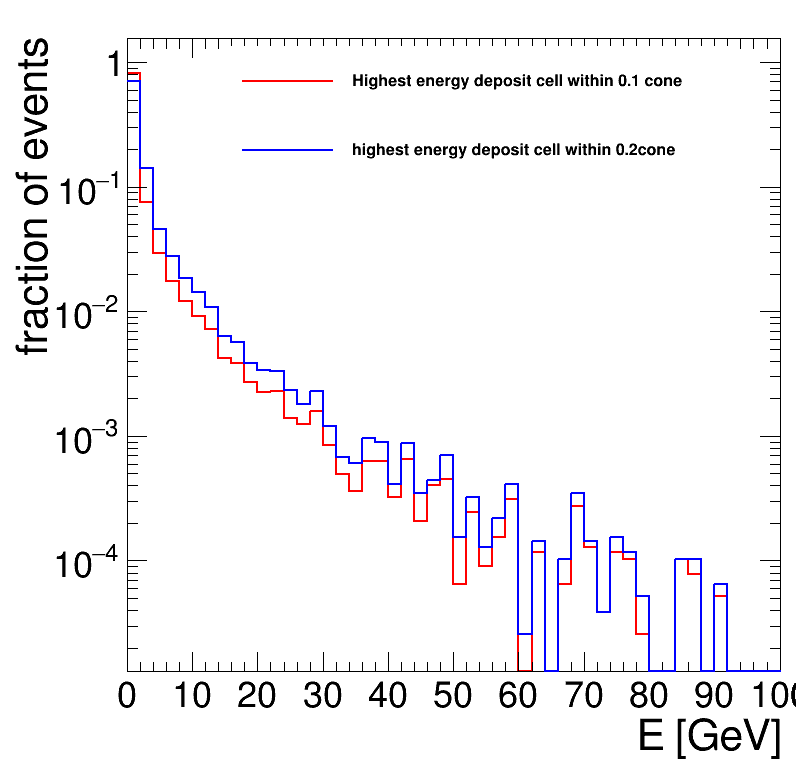

In [294]:
c = rt.TCanvas('c','c', 800, 800)
leg = rt.TLegend(0.28,0.76,0.93,0.94)
leg.SetTextSize(0.022)
leg.SetBorderSize(0)
leg.SetEntrySeparation(0.01)
gr_1j = {}
gr_2j = {}

i = 0

print('i,j,n,s,m,a')

for k,v in tree.items(): 
    print(k,v)
    
    pho_eta1 = v['gE9x9_01'].array()
    pho_eta2 = v['gE9x9_02'].array()
    pho_id = v['gParticleId'].array()
    pho_mo_id = v['gParticleMotherId'].array()
    
    pho_eta1 = pho_eta1[pho_id==22, pho_mo_id==111]
    pho_eta2 = pho_eta2[pho_id==22, pho_mo_id==111]
    
#     eta = pho_eta[:,0]
    eta1 = pho_eta1.flatten()
    eta2 = pho_eta2.flatten()
    
    ht0 = create_TH1D( eta1, axis_title=['E [GeV]', 'fraction of events'], name="", binning=[50,-0,100])
    ht0.SetLineColor(std_color_list[i+1])
    ht0.SetMarkerColor(std_color_list[i+1])
    
    ht0.DrawNormalized('')
    
    leg.AddEntry(ht0,'Highest energy deposit cell within 0.1 cone')
    
    ht1 = create_TH1D( eta2, axis_title=['E [GeV]', 'fraction of events'], name="", binning=[50,-0,100])
    ht1.SetLineColor(std_color_list[i+2])
    ht1.SetMarkerColor(std_color_list[i+2])
    
    ht1.DrawNormalized('same')
    
    leg.AddEntry(ht1,'highest energy deposit cell within 0.2cone')

 
    i += 1

leg.Draw()

c.SetLogy()
c.Update()
c.Draw()
c.SaveAs(out_dir+'pho_emax_0102.png')


i,j,n,s,m,a
analyzer-dyll-4FEVT-cluster1000.root <TTree b'ecalTPTree' at 0x7f4e7770c240>


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TROOT::Append>: Replacing existing TH1: analyzer-dyll-4FEVT-cluster1000.root (Potential memory leak).
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190807/pho_e3x3_e3x3_2d_0102.png has been created


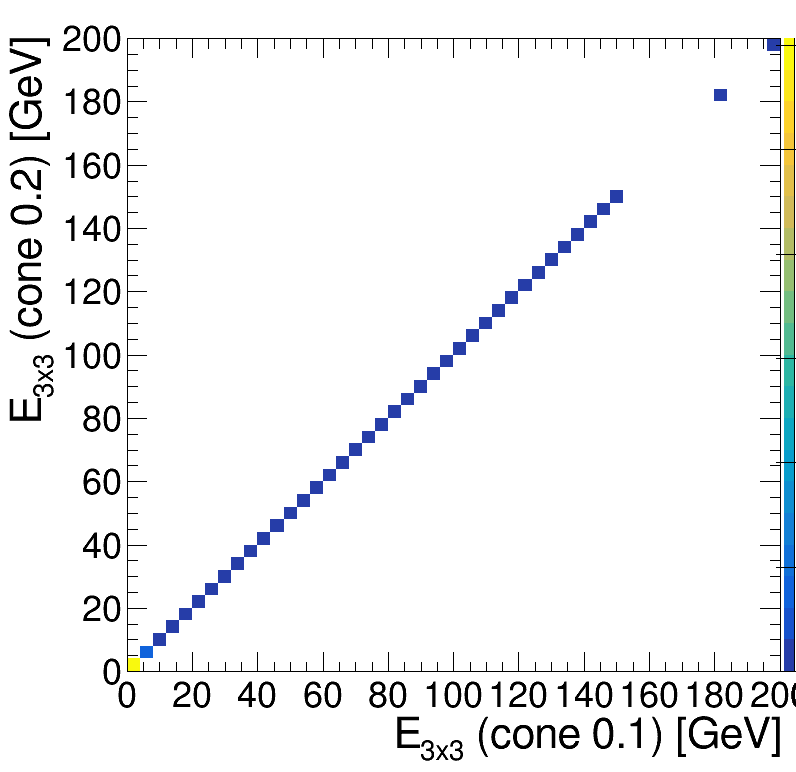

In [329]:
c = rt.TCanvas('c','c', 800, 800)
leg = rt.TLegend(0.18,0.76,0.53,0.94)
leg.SetTextSize(0.022)
leg.SetEntrySeparation(0.01)
gr_1j = {}
gr_2j = {}

i = 0

print('i,j,n,s,m,a')

for k,v in tree.items(): 
    print(k,v)
    
    pho_pz = v['gE3x3_01'].array()
    pho_id = v['gParticleId'].array()
    
    pho_bro_pz = v['gE3x3_02'].array()
    pho_bro_id = v['gParticleSiblingId'].array()
  
    pho_mo_id = v['gParticleMotherId'].array()
    
    pho_string = np.logical_and(pho_id==22, pho_mo_id==111)
    pho_bro_string = np.logical_and(pho_bro_id==22, pho_mo_id==111)
    
    pho_pz1 = pho_pz[np.logical_and(pho_string, pho_bro_string)]
    pho_bro_pz1 = pho_bro_pz[np.logical_and(pho_string, pho_bro_string)]
    
    
    
    
#     pho_pz1 = pho_pz[pho_id==22, pho_bro_id==22, pho_mo_id==111]
#     pho_bro_pz1 = pho_pz[pho_id==22, pho_bro_id==22, pho_mo_id==111]
    
#     e = pho_e[:,0]
    pz = pho_pz1.flatten()
    bro_pz = pho_bro_pz1.flatten()
    sample = [pz,bro_pz]
    
#     ht0 = create_TH2D((sample, name='', title=None, binning=[50,-100,100,50,-100,100] )
# #                       #axis_title = ['p_{Z} [GeV]','p_{Z}^{sibling} [GeV]','']
    ht0.SetLineColor(std_color_list[i+1])
    ht0.SetMarkerColor(std_color_list[i+1])
                      
    hz = rt.TH2D(k,k,50,-0,200,50,-0,200)
    hz.GetXaxis().SetTitle('E_{3x3} (cone 0.1) [GeV]')
    hz.GetYaxis().SetTitle('E_{3x3} (cone 0.2) [GeV]')
#     hz[k].SetMarkerColor(std_color_list[i])
        

    for evt,(pz1,pz2) in enumerate(zip(pz,bro_pz)):
        hz.Fill(pz1,pz2)
    
    hz.Draw('colz')
 
    i += 1

# leg.Draw()

# c.SetLogy()
c.Update()
c.Draw()
c.SaveAs(out_dir+'pho_e3x3_e3x3_2d_0102.png')


# DR cut

i,j,n,s,m,a
analyzer-dyll-4FEVT-pi0cluster1000.root <TTree b'ecalTPTree' at 0x7efd1de58f60>


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
python ERROR: cannot open image file "/nfshome/jmao/cms-llp/plots/20190800/pho_e_e3x3__dr02_2d_01.png" for writing. Please check permissions.
Error in <TASImage::WriteImage>: error writing file /nfshome/jmao/cms-llp/plots/20190800/pho_e_e3x3__dr02_2d_01.png


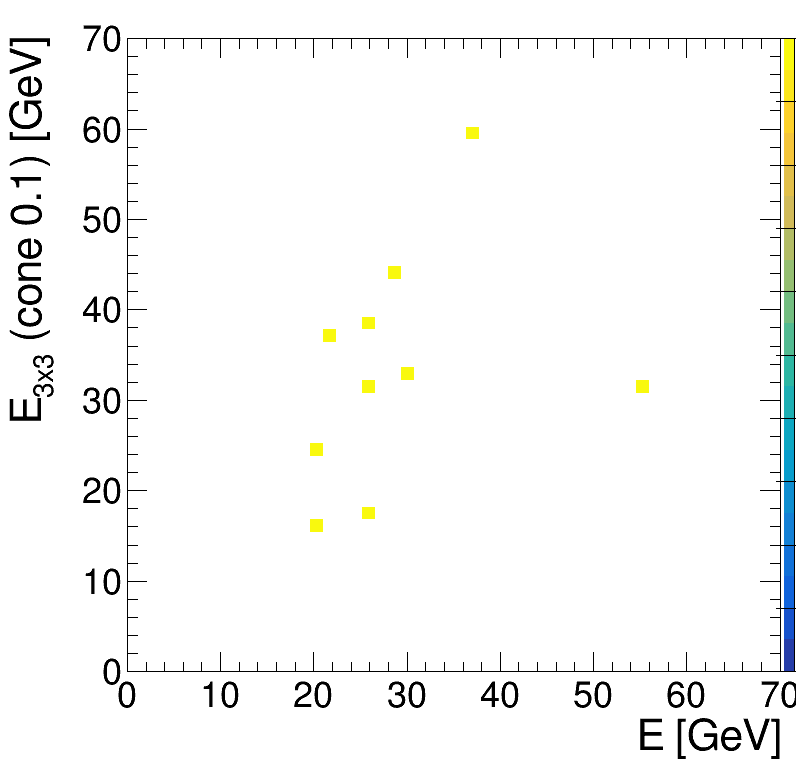

In [10]:
c = rt.TCanvas('c','c', 800, 800)
leg = rt.TLegend(0.18,0.76,0.53,0.94)
leg.SetTextSize(0.022)
leg.SetEntrySeparation(0.01)
gr_1j = {}
gr_2j = {}

i = 0

print('i,j,n,s,m,a')

for k,v in tree.items(): 
    print(k,v)
    
    pho_pz = v['gParticleE'].array()
    
    si_dr = v['gParticleSiblingDR'].array()
    mo_dr = v['gParticleMotherDR'].array()
    
    pho_id = v['gParticleId'].array()
    
    pho_bro_pz = v['gE3x3_01'].array()
    pho_bro_id = v['gParticleSiblingId'].array()
  
    pho_mo_id = v['gParticleMotherId'].array()
    
    pho_string = np.logical_and(pho_id==22, pho_mo_id==111)
    bro_dr_string = np.logical_and(si_dr>0.2, pho_bro_id==22)
    
    pho_bro_string = np.logical_and(pho_bro_id==22, pho_mo_id==111)
    pho_pair_string = np.logical_and(pho_string, pho_bro_string)
    
    pho_pair_string = np.logical_and(pho_string, pho_bro_string)
    pho_pair_dr_string = np.logical_and(pho_pair_string, bro_dr_string)
    
    pho_pz1 = pho_pz[np.logical_and(pho_pair_dr_string, pho_pz>20)]
    pho_bro_pz1 = pho_bro_pz[np.logical_and(pho_pair_dr_string, pho_pz>20)]
    
    
    
    
#     pho_pz1 = pho_pz[pho_id==22, pho_bro_id==22, pho_mo_id==111]
#     pho_bro_pz1 = pho_pz[pho_id==22, pho_bro_id==22, pho_mo_id==111]
    
#     e = pho_e[:,0]
    pz = pho_pz1.flatten()
    bro_pz = pho_bro_pz1.flatten()
    sample = [pz,bro_pz]
    
#     ht0 = create_TH2D((sample, name='', title=None, binning=[50,-100,100,50,-100,100] )
# #                       #axis_title = ['p_{Z} [GeV]','p_{Z}^{sibling} [GeV]','']
    ht0.SetLineColor(std_color_list[i+1])
    ht0.SetMarkerColor(std_color_list[i+1])
                      
    hz = rt.TH2D(k,k,50,-0,70,50,-0,70)
    hz.GetXaxis().SetTitle('E [GeV]')
    hz.GetYaxis().SetTitle('E_{3x3} (cone 0.1) [GeV]')
#     hz[k].SetMarkerColor(std_color_list[i])
        

    for evt,(pz1,pz2) in enumerate(zip(pz,bro_pz)):
        hz.Fill(pz1,pz2)
    
    hz.Draw('colz')
 
    i += 1

# leg.Draw()

# c.SetLogy()
c.Update()
c.Draw()
c.SaveAs(out_dir+'pho_e_e3x3__dr02_2d_01.png')


i,j,n,s,m,a
analyzer-dyll-4FEVT-cluster1000.root <TTree b'ecalTPTree' at 0x7f4e7770c240>


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TROOT::Append>: Replacing existing TH1: analyzer-dyll-4FEVT-cluster1000.root (Potential memory leak).
Info in <TCanvas::Print>: png file /nfshome/jmao/cms-llp/plots/20190807/pho_e_e3x3__dr01_2d_01.png has been created


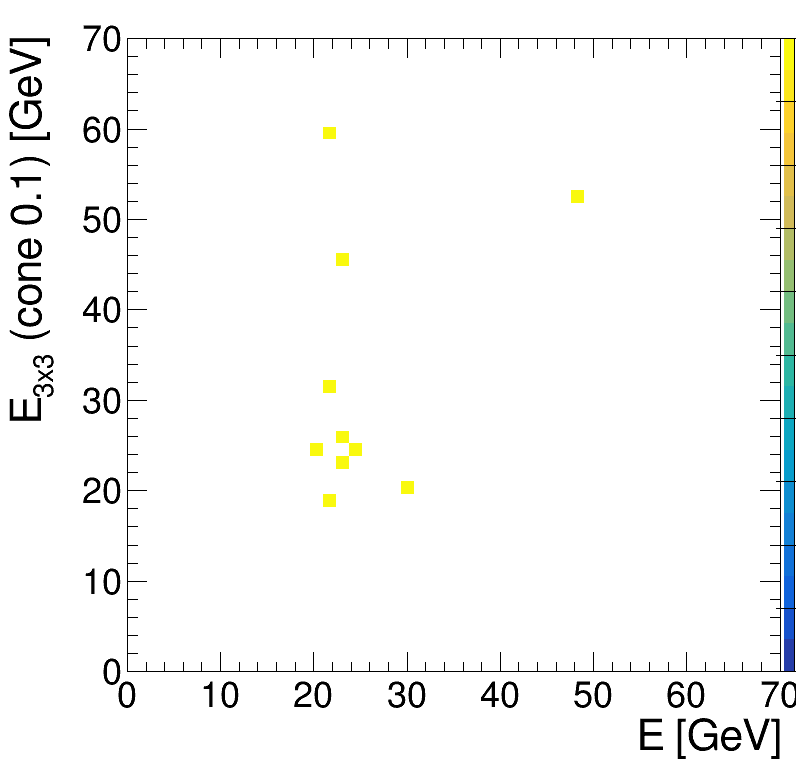

In [350]:
c = rt.TCanvas('c','c', 800, 800)
leg = rt.TLegend(0.18,0.76,0.53,0.94)
leg.SetTextSize(0.022)
leg.SetEntrySeparation(0.01)
gr_1j = {}
gr_2j = {}

i = 0

print('i,j,n,s,m,a')

for k,v in tree.items(): 
    print(k,v)
    
    pho_pz = v['gParticleE'].array()
    
    si_dr = v['gParticleSiblingDR'].array()
    mo_dr = v['gParticleMotherDR'].array()
    
    pho_id = v['gParticleId'].array()
    
    pho_bro_pz = v['gE3x3_01'].array()
    pho_bro_id = v['gParticleSiblingId'].array()
  
    pho_mo_id = v['gParticleMotherId'].array()
    
    pho_string = np.logical_and(pho_id==22, pho_mo_id==111)
    bro_dr_string = np.logical_and(si_dr>0.1, pho_bro_id==22)
    
    pho_bro_string = np.logical_and(pho_bro_id==22, pho_mo_id==111)
    pho_pair_string = np.logical_and(pho_string, pho_bro_string)
    
    pho_pair_string = np.logical_and(pho_string, pho_bro_string)
    pho_pair_dr_string = np.logical_and(pho_pair_string, bro_dr_string)
    
    pho_pz1 = pho_pz[np.logical_and(pho_pair_dr_string, pho_pz>20)]
    pho_bro_pz1 = pho_bro_pz[np.logical_and(pho_pair_dr_string, pho_pz>20)]
    
    
    
    
#     pho_pz1 = pho_pz[pho_id==22, pho_bro_id==22, pho_mo_id==111]
#     pho_bro_pz1 = pho_pz[pho_id==22, pho_bro_id==22, pho_mo_id==111]
    
#     e = pho_e[:,0]
    pz = pho_pz1.flatten()
    bro_pz = pho_bro_pz1.flatten()
    sample = [pz,bro_pz]
    
#     ht0 = create_TH2D((sample, name='', title=None, binning=[50,-100,100,50,-100,100] )
# #                       #axis_title = ['p_{Z} [GeV]','p_{Z}^{sibling} [GeV]','']
    ht0.SetLineColor(std_color_list[i+1])
    ht0.SetMarkerColor(std_color_list[i+1])
                      
    hz = rt.TH2D(k,k,50,-0,70,50,-0,70)
    hz.GetXaxis().SetTitle('E [GeV]')
    hz.GetYaxis().SetTitle('E_{3x3} (cone 0.1) [GeV]')
#     hz[k].SetMarkerColor(std_color_list[i])
        

    for evt,(pz1,pz2) in enumerate(zip(pz,bro_pz)):
        hz.Fill(pz1,pz2)
    
    hz.Draw('colz')
 
    i += 1

# leg.Draw()

# c.SetLogy()
c.Update()
c.Draw()
c.SaveAs(out_dir+'pho_e_e3x3__dr01_2d_01.png')


# Pi0 Cluster

i,j,n,s,m,a
analyzer-dyll-4FEVT-pi0cluster1000.root <TTree b'ecalTPTree' at 0x7efd1de58f60>


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
python ERROR: cannot open image file "/nfshome/jmao/cms-llp/plots/20190800/pi0_emax_0102.png" for writing. Please check permissions.
Error in <TASImage::WriteImage>: error writing file /nfshome/jmao/cms-llp/plots/20190800/pi0_emax_0102.png


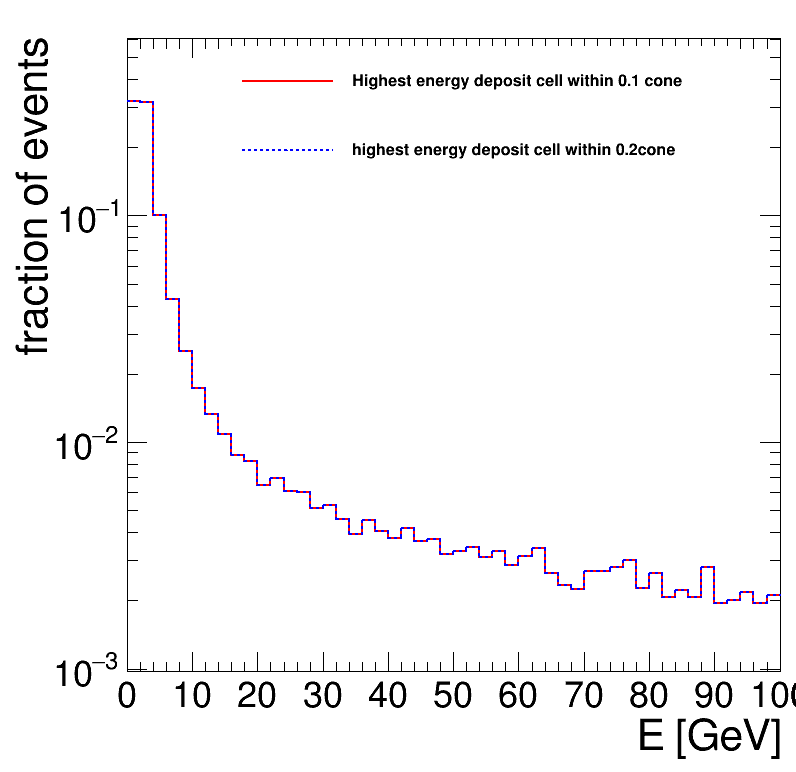

In [11]:
c = rt.TCanvas('c','c', 800, 800)
leg = rt.TLegend(0.28,0.76,0.93,0.94)
leg.SetTextSize(0.022)
leg.SetBorderSize(0)
leg.SetEntrySeparation(0.01)
gr_1j = {}
gr_2j = {}

i = 0

print('i,j,n,s,m,a')

for k,v in tree.items(): 
    print(k,v)
    
    pho_eta1 = v['gE9x9_01'].array()
    pho_eta2 = v['gE9x9_02'].array()
    pho_id = v['gParticleId'].array()
    pho_mo_id = v['gParticleMotherId'].array()
    
    pho_eta1 = pho_eta1[pho_id==111, pho_id==111]
    pho_eta2 = pho_eta2[pho_id==111, pho_id==111]
    
#     eta = pho_eta[:,0]
    eta1 = pho_eta1.flatten()
    eta2 = pho_eta2.flatten()
    
    ht0 = create_TH1D( eta1, axis_title=['E [GeV]', 'fraction of events'], name="", binning=[50,-0,100])
    ht0.SetLineColor(std_color_list[i+1])
    ht0.SetMarkerColor(std_color_list[i+1])
    
    ht0.DrawNormalized('')
    
    leg.AddEntry(ht0,'Highest energy deposit cell within 0.1 cone')
    
    ht1 = create_TH1D( eta2, axis_title=['E [GeV]', 'fraction of events'], name="", binning=[50,-0,100])
    ht1.SetLineStyle(2)
    ht1.SetLineColor(std_color_list[i+2])
    ht1.SetMarkerColor(std_color_list[i+2])
    
    ht1.DrawNormalized('same')
    
    leg.AddEntry(ht1,'highest energy deposit cell within 0.2cone')

 
    i += 1

leg.Draw()

c.SetLogy()
c.Update()
c.Draw()
c.SaveAs(out_dir+'pi0_emax_0102.png')


i,j,n,s,m,a
analyzer-dyll-4FEVT-pi0cluster1000.root <TTree b'ecalTPTree' at 0x7efd1de58f60>


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
python ERROR: cannot open image file "/nfshome/jmao/cms-llp/plots/20190800/pi0_0102.png" for writing. Please check permissions.
Error in <TASImage::WriteImage>: error writing file /nfshome/jmao/cms-llp/plots/20190800/pi0_0102.png


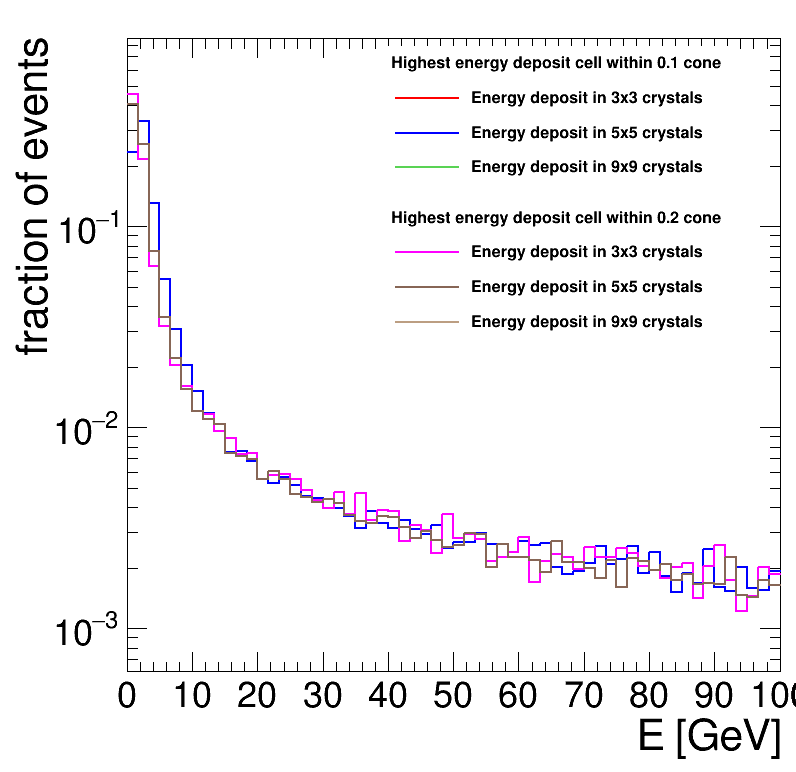

In [12]:
c = rt.TCanvas('c','c', 800, 800)
leg = rt.TLegend(0.48,0.76,0.93,0.94)
leg.SetTextSize(0.022)
leg.SetBorderSize(0)
leg.SetEntrySeparation(0.01)
leg1 = rt.TLegend(0.48,0.56,0.93,0.74)
leg1.SetTextSize(0.022)
leg1.SetBorderSize(0)
leg1.SetEntrySeparation(0.01)
gr_1j = {}
gr_2j = {}

i = 0

print('i,j,n,s,m,a')

for k,v in tree.items(): 
    print(k,v)
    
    pho_eta1 = v['gE3x3_01'].array()
    pho_eta2 = v['gE5x5_01'].array()
    pho_eta3 = v['gE9x9_01'].array()
    
    pho_eta4 = v['gE3x3_02'].array()
    pho_eta5 = v['gE5x5_02'].array()
    pho_eta6 = v['gE9x9_02'].array()
    
    pho_id = v['gParticleId'].array()
    pho_mo_id = v['gParticleMotherId'].array()
    
    pho_eta1 = pho_eta1[pho_id==111, pho_id==111]
    pho_eta2 = pho_eta3[pho_id==111, pho_id==111]
    pho_eta3 = pho_eta3[pho_id==111, pho_id==111]
    
    pho_eta4 = pho_eta4[pho_id==111, pho_id==111]
    pho_eta5 = pho_eta5[pho_id==111, pho_id==111]
    pho_eta6 = pho_eta6[pho_id==111, pho_id==111]
    
#     eta = pho_eta[:,0]
    eta1 = pho_eta1.flatten()
    eta2 = pho_eta2.flatten()
    eta3 = pho_eta3.flatten()
    
    eta4 = pho_eta4.flatten()
    eta5 = pho_eta5.flatten()
    eta6 = pho_eta6.flatten()
    
    ht1 = create_TH1D( eta1, axis_title=['E [GeV]', 'fraction of events'], name="", binning=[60,-0,100])
    ht2 = create_TH1D( eta2, axis_title=['E [GeV]', 'fraction of events'], name="", binning=[60,-0,100])
    ht3 = create_TH1D( eta3, axis_title=['E [GeV]', 'fraction of events'], name="", binning=[60,-0,100])
    
    ht4 = create_TH1D( eta4, axis_title=['E [GeV]', 'fraction of events'], name="", binning=[60,-0,100])
    ht5 = create_TH1D( eta5, axis_title=['E [GeV]', 'fraction of events'], name="", binning=[60,-0,100])
    ht6 = create_TH1D( eta6, axis_title=['E [GeV]', 'fraction of events'], name="", binning=[60,-0,100])
    
    ht1.SetLineColor(std_color_list[i+1])
    ht2.SetLineColor(std_color_list[i+2])
    ht3.SetLineColor(std_color_list[i+3])
    
    ht4.SetLineColor(std_color_list[i+4])
    ht5.SetLineColor(std_color_list[i+5])
    ht6.SetLineColor(std_color_list[i+6])
    
    ht1.SetMarkerColor(std_color_list[i+1])
    ht2.SetMarkerColor(std_color_list[i+2])
    ht3.SetMarkerColor(std_color_list[i+3])
    
    ht4.SetMarkerColor(std_color_list[i+4])
    ht5.SetMarkerColor(std_color_list[i+5])
    ht6.SetMarkerColor(std_color_list[i+6])
    
    ht1.DrawNormalized('same')
    ht2.DrawNormalized('same')
#     ht3.DrawNormalized('same')
    
    ht4.DrawNormalized('same')
    ht5.DrawNormalized('same')
#     ht6.DrawNormalized('same')
    
    leg.SetHeader('Highest energy deposit cell within 0.1 cone')
    leg.AddEntry(ht1,'Energy deposit in 3x3 crystals')
    leg.AddEntry(ht2,'Energy deposit in 5x5 crystals')
    leg.AddEntry(ht3,'Energy deposit in 9x9 crystals')
 
    
    leg1.SetHeader('Highest energy deposit cell within 0.2 cone')
    leg1.AddEntry(ht4,'Energy deposit in 3x3 crystals')
    leg1.AddEntry(ht5,'Energy deposit in 5x5 crystals')
    leg1.AddEntry(ht6,'Energy deposit in 9x9 crystals')
 
    i += 1

leg.Draw()
leg1.Draw()

c.SetLogy()
c.Update()
c.Draw()
c.SaveAs(out_dir+'pi0_0102.png')


i,j,n,s,m,a
analyzer-dyll-4FEVT-pi0cluster1000.root <TTree b'ecalTPTree' at 0x7efd1de58f60>


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
python ERROR: cannot open image file "/nfshome/jmao/cms-llp/plots/20190800/pi0_01.png" for writing. Please check permissions.
Error in <TASImage::WriteImage>: error writing file /nfshome/jmao/cms-llp/plots/20190800/pi0_01.png


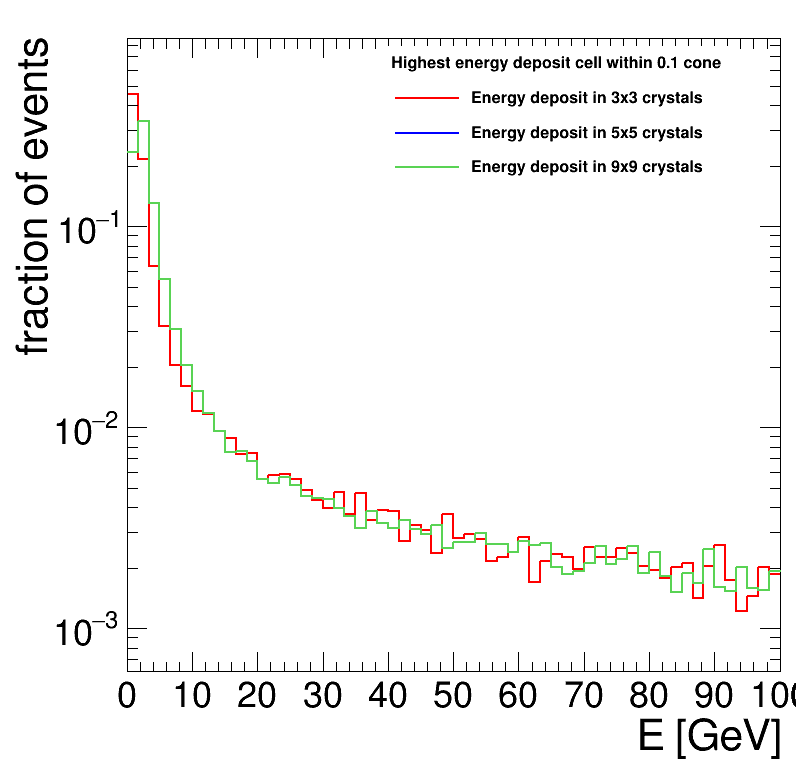

In [13]:
c = rt.TCanvas('c','c', 800, 800)
leg = rt.TLegend(0.48,0.76,0.93,0.94)
leg.SetTextSize(0.022)
leg.SetBorderSize(0)
leg.SetEntrySeparation(0.01)
gr_1j = {}
gr_2j = {}

i = 0

print('i,j,n,s,m,a')

for k,v in tree.items(): 
    print(k,v)
    
    pho_eta1 = v['gE3x3_01'].array()
    pho_eta2 = v['gE5x5_01'].array()
    pho_eta3 = v['gE9x9_01'].array()
    pho_id = v['gParticleId'].array()
    pho_mo_id = v['gParticleMotherId'].array()
    
    pho_eta1 = pho_eta1[pho_id==111, pho_id==111]
    pho_eta2 = pho_eta3[pho_id==111, pho_id==111]
    pho_eta3 = pho_eta3[pho_id==111, pho_id==111]
    
#     eta = pho_eta[:,0]
    eta1 = pho_eta1.flatten()
    eta2 = pho_eta2.flatten()
    eta3 = pho_eta3.flatten()
    
    ht1 = create_TH1D( eta1, axis_title=['E [GeV]', 'fraction of events'], name="", binning=[60,-0,100])
    ht2 = create_TH1D( eta2, axis_title=['E [GeV]', 'fraction of events'], name="", binning=[60,-0,100])
    ht3 = create_TH1D( eta3, axis_title=['E [GeV]', 'fraction of events'], name="", binning=[60,-0,100])
    ht1.SetLineColor(std_color_list[i+1])
    ht2.SetLineColor(std_color_list[i+2])
    ht3.SetLineColor(std_color_list[i+3])
    ht1.SetMarkerColor(std_color_list[i+1])
    ht2.SetMarkerColor(std_color_list[i+2])
    ht3.SetMarkerColor(std_color_list[i+3])
    
    ht1.DrawNormalized('same')
    ht2.DrawNormalized('same')
    ht3.DrawNormalized('same')
    
    leg.SetHeader('Highest energy deposit cell within 0.1 cone')
    leg.AddEntry(ht1,'Energy deposit in 3x3 crystals')
    leg.AddEntry(ht2,'Energy deposit in 5x5 crystals')
    leg.AddEntry(ht3,'Energy deposit in 9x9 crystals')
 
    i += 1

leg.Draw()

c.SetLogy()
c.Update()
c.Draw()
c.SaveAs(out_dir+'pi0_01.png')


i,j,n,s,m,a
analyzer-dyll-4FEVT-pi0cluster1000.root <TTree b'ecalTPTree' at 0x7efd1de58f60>


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
python ERROR: cannot open image file "/nfshome/jmao/cms-llp/plots/20190800/pi0_02.png" for writing. Please check permissions.
Error in <TASImage::WriteImage>: error writing file /nfshome/jmao/cms-llp/plots/20190800/pi0_02.png


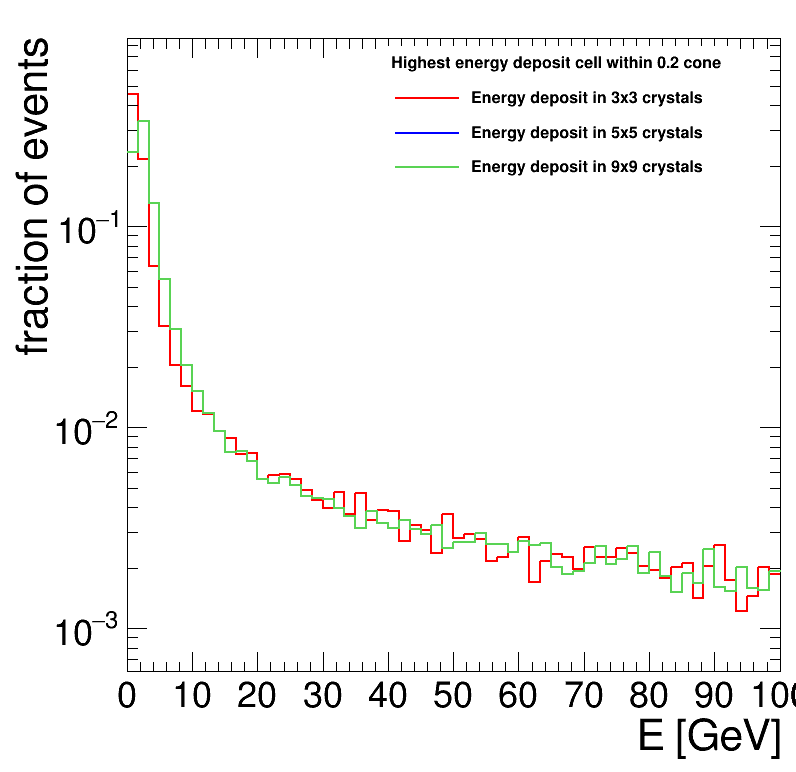

In [14]:
c = rt.TCanvas('c','c', 800, 800)
leg = rt.TLegend(0.48,0.76,0.93,0.94)
leg.SetTextSize(0.022)
leg.SetBorderSize(0)
leg.SetEntrySeparation(0.01)
gr_1j = {}
gr_2j = {}

i = 0

print('i,j,n,s,m,a')

for k,v in tree.items(): 
    print(k,v)
    
    pho_eta1 = v['gE3x3_02'].array()
    pho_eta2 = v['gE5x5_02'].array()
    pho_eta3 = v['gE9x9_02'].array()
    pho_id = v['gParticleId'].array()
    pho_mo_id = v['gParticleMotherId'].array()
    
 
    
    pho_eta1 = pho_eta1[pho_id==111, pho_id==111]
    pho_eta2 = pho_eta3[pho_id==111, pho_id==111]
    pho_eta3 = pho_eta3[pho_id==111, pho_id==111]
    
#     eta = pho_eta[:,0]
    eta1 = pho_eta1.flatten()
    eta2 = pho_eta2.flatten()
    eta3 = pho_eta3.flatten()
    
    ht1 = create_TH1D( eta1, axis_title=['E [GeV]', 'fraction of events'], name="", binning=[60,-0,100])
    ht2 = create_TH1D( eta2, axis_title=['E [GeV]', 'fraction of events'], name="", binning=[60,-0,100])
    ht3 = create_TH1D( eta3, axis_title=['E [GeV]', 'fraction of events'], name="", binning=[60,-0,100])
    ht1.SetLineColor(std_color_list[i+1])
    ht2.SetLineColor(std_color_list[i+2])
    ht3.SetLineColor(std_color_list[i+3])
    ht1.SetMarkerColor(std_color_list[i+1])
    ht2.SetMarkerColor(std_color_list[i+2])
    ht3.SetMarkerColor(std_color_list[i+3])
    
    ht1.DrawNormalized('same')
    ht2.DrawNormalized('same')
    ht3.DrawNormalized('same')
    
    leg.SetHeader('Highest energy deposit cell within 0.2 cone')
    leg.AddEntry(ht1,'Energy deposit in 3x3 crystals')
    leg.AddEntry(ht2,'Energy deposit in 5x5 crystals')
    leg.AddEntry(ht3,'Energy deposit in 9x9 crystals')
 
    i += 1

leg.Draw()

c.SetLogy()
c.Update()
c.Draw()
c.SaveAs(out_dir+'pi0_02.png')


i,j,n,s,m,a
analyzer-dyll-4FEVT-pi0cluster1000.root <TTree b'ecalTPTree' at 0x7efd1de58f60>


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TROOT::Append>: Replacing existing TH1: analyzer-dyll-4FEVT-pi0cluster1000.root (Potential memory leak).
python ERROR: cannot open image file "/nfshome/jmao/cms-llp/plots/20190800/pi0_e_e3x3__dr01_2d_02.png" for writing. Please check permissions.
Error in <TASImage::WriteImage>: error writing file /nfshome/jmao/cms-llp/plots/20190800/pi0_e_e3x3__dr01_2d_02.png


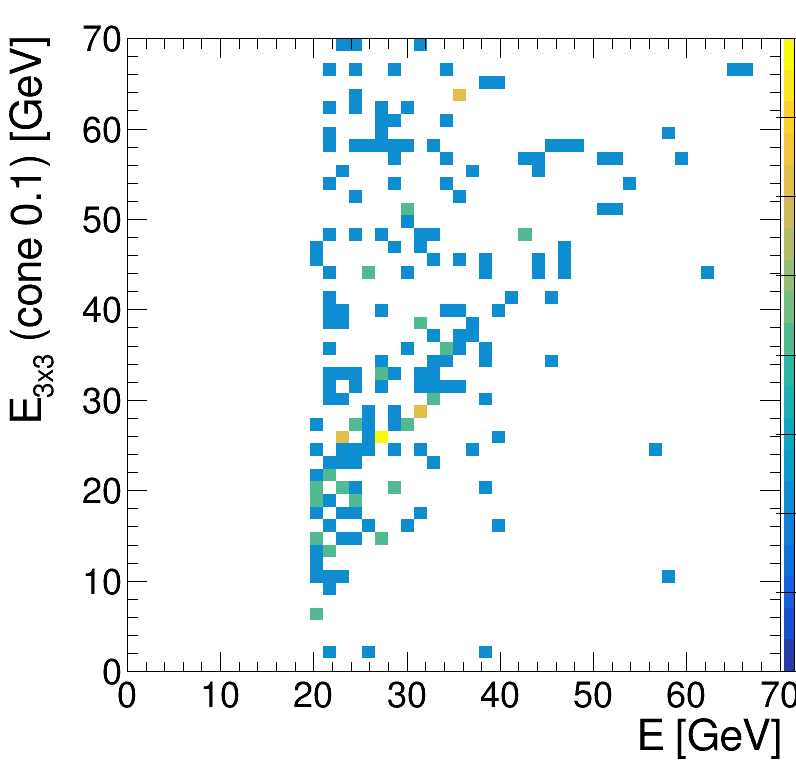

In [15]:
c = rt.TCanvas('c','c', 800, 800)
leg = rt.TLegend(0.18,0.76,0.53,0.94)
leg.SetTextSize(0.022)
leg.SetEntrySeparation(0.01)
gr_1j = {}
gr_2j = {}

i = 0

print('i,j,n,s,m,a')

for k,v in tree.items(): 
    print(k,v)
    
    pho_pz = v['gParticleE'].array()
    
    si_dr = v['gParticleSiblingDR'].array()
    mo_dr = v['gParticleMotherDR'].array()
    
    pho_id = v['gParticleId'].array()
    
    pho_bro_pz = v['gE3x3_01'].array()
    pho_bro_id = v['gParticleSiblingId'].array()
  
    pho_mo_id = v['gParticleMotherId'].array()
    
    pho_string = np.logical_and(pho_id==111, pho_id==111)
    bro_dr_string = np.logical_and(si_dr>0.2, pho_bro_id==111)
    
    pho_bro_string = np.logical_and(pho_bro_id==111, pho_id==111)
    pho_pair_string = np.logical_and(pho_string, pho_bro_string)
    
    pho_pair_string = np.logical_and(pho_string, pho_bro_string)
    pho_pair_dr_string = np.logical_and(pho_pair_string, bro_dr_string)
    
    pho_pz1 = pho_pz[np.logical_and(pho_pair_dr_string, pho_pz>20)]
    pho_bro_pz1 = pho_bro_pz[np.logical_and(pho_pair_dr_string, pho_pz>20)]
    
    
    
    
#     pho_pz1 = pho_pz[pho_id==22, pho_bro_id==22, pho_mo_id==111]
#     pho_bro_pz1 = pho_pz[pho_id==22, pho_bro_id==22, pho_mo_id==111]
    
#     e = pho_e[:,0]
    pz = pho_pz1.flatten()
    bro_pz = pho_bro_pz1.flatten()
    sample = [pz,bro_pz]
    
#     ht0 = create_TH2D((sample, name='', title=None, binning=[50,-100,100,50,-100,100] )
# #                       #axis_title = ['p_{Z} [GeV]','p_{Z}^{sibling} [GeV]','']
    ht0.SetLineColor(std_color_list[i+1])
    ht0.SetMarkerColor(std_color_list[i+1])
                      
    hz = rt.TH2D(k,k,50,-0,70,50,-0,70)
    hz.GetXaxis().SetTitle('E [GeV]')
    hz.GetYaxis().SetTitle('E_{3x3} (cone 0.1) [GeV]')
#     hz[k].SetMarkerColor(std_color_list[i])
        

    for evt,(pz1,pz2) in enumerate(zip(pz,bro_pz)):
        hz.Fill(pz1,pz2)
    
    hz.Draw('colz')
 
    i += 1

# leg.Draw()

# c.SetLogy()
c.Update()
c.Draw()
c.SaveAs(out_dir+'pi0_e_e3x3__dr01_2d_02.png')


i,j,n,s,m,a
analyzer-dyll-4FEVT-pi0cluster1000.root <TTree b'ecalTPTree' at 0x7efc7f553d68>


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TROOT::Append>: Replacing existing TH1: analyzer-dyll-4FEVT-pi0cluster1000.root (Potential memory leak).
python ERROR: cannot open image file "/nfshome/jmao/cms-llp/plots/20190800/pi0_e_e3x3__dr01_2d_01.png" for writing. Please check permissions.
Error in <TASImage::WriteImage>: error writing file /nfshome/jmao/cms-llp/plots/20190800/pi0_e_e3x3__dr01_2d_01.png


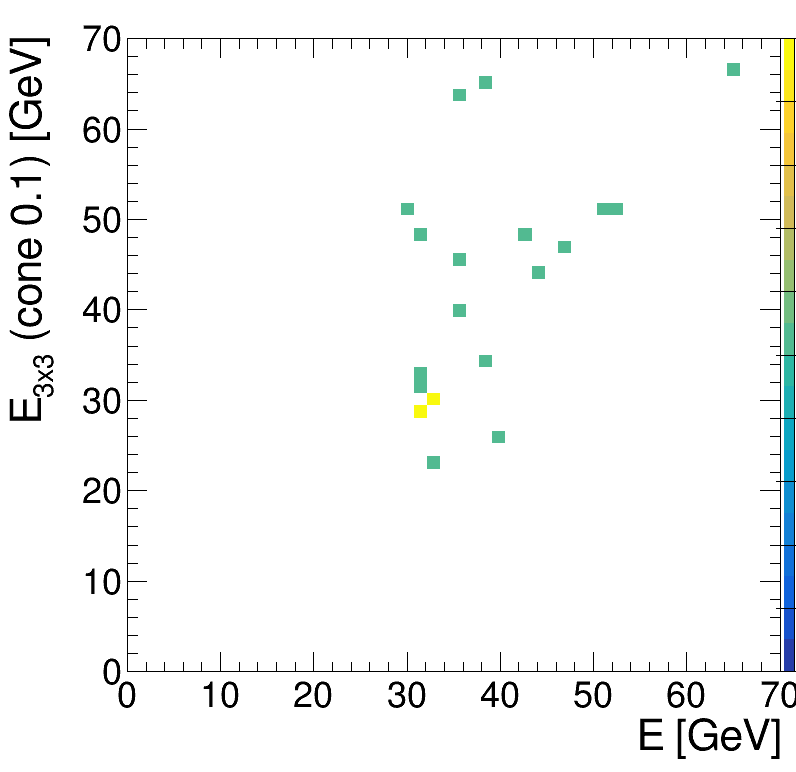

In [24]:
c = rt.TCanvas('c','c', 800, 800)
leg = rt.TLegend(0.18,0.76,0.53,0.94)
leg.SetTextSize(0.022)
leg.SetEntrySeparation(0.01)
gr_1j = {}
gr_2j = {}

i = 0

print('i,j,n,s,m,a')

for k,v in tree.items(): 
    print(k,v)
    
    pho_pz = v['gParticleE'].array()
    
    si_dr = v['gParticleSiblingDR'].array()
    mo_dr = v['gParticleMotherDR'].array()
    
    pho_id = v['gParticleId'].array()
    
    pho_bro_pz = v['gE3x3_01'].array()
    pho_bro_id = v['gParticleSiblingId'].array()
  
    pho_mo_id = v['gParticleMotherId'].array()
    
    pho_string = np.logical_and(pho_id==111, pho_id==111)
    bro_dr_string = np.logical_and(mo_dr>0.2, si_dr>0.2)
    
    pho_bro_string = np.logical_and(pho_bro_id==111, pho_id==111)
    pho_pair_string = np.logical_and(pho_string, pho_bro_string)
    
    pho_pair_string = np.logical_and(pho_string, pho_bro_string)
    pho_pair_dr_string = np.logical_and(pho_pair_string, bro_dr_string)
    
    pho_pz1 = pho_pz[np.logical_and(pho_pair_dr_string, pho_pz>30)]
    pho_bro_pz1 = pho_bro_pz[np.logical_and(pho_pair_dr_string, pho_pz>30)]
    
    
    
    
#     pho_pz1 = pho_pz[pho_id==22, pho_bro_id==22, pho_mo_id==111]
#     pho_bro_pz1 = pho_pz[pho_id==22, pho_bro_id==22, pho_mo_id==111]
    
#     e = pho_e[:,0]
    pz = pho_pz1.flatten()
    bro_pz = pho_bro_pz1.flatten()
    sample = [pz,bro_pz]
    
#     ht0 = create_TH2D((sample, name='', title=None, binning=[50,-100,100,50,-100,100] )
# #                       #axis_title = ['p_{Z} [GeV]','p_{Z}^{sibling} [GeV]','']
    ht0.SetLineColor(std_color_list[i+1])
    ht0.SetMarkerColor(std_color_list[i+1])
                      
    hz = rt.TH2D(k,k,50,-0,70,50,-0,70)
    hz.GetXaxis().SetTitle('E [GeV]')
    hz.GetYaxis().SetTitle('E_{3x3} (cone 0.1) [GeV]')
#     hz[k].SetMarkerColor(std_color_list[i])
        

    for evt,(pz1,pz2) in enumerate(zip(pz,bro_pz)):
        hz.Fill(pz1,pz2)
    
    hz.Draw('colz')
 
    i += 1

# leg.Draw()

# c.SetLogy()
c.Update()
c.Draw()
c.SaveAs(out_dir+'pi0_e_e3x3__dr01_2d_01.png')
